<a href="https://colab.research.google.com/github/seyeonjungGit/P_Project_YOUTUBE_Analysis/blob/main/Youtube_Analysis(Q1_(2)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 설치 & 기본설정

matplotlib 폰트 설치
- 설치 후 런타임 재시작

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 설정 변환을 위해서 matplotlib만 import
import matplotlib as mpl
import warnings

# Windows
mpl.rc("font", family='NanumBarunGothic')

# 폰트변경 후 마이너스 사인 수정
mpl.rc('axes', unicode_minus=False)

# 화질설정
%config InlineBackend.figure_format='retina'

warnings.filterwarnings("ignore")
%matplotlib inline

프로파일링 설치

In [ ]:
# pip install -U pandas-profiling

In [ ]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df_origin = pd.read_csv('/content/drive/MyDrive/preon_nlp/기업과제자료/pretest_data.csv')
df_origin.head(3)

video_id channel_id published_date  category_name duration  \
0    V-0db    CH49ta0     2021-07-01  Entertainment  PT8M20S   
1    V-1XL    CHZVD--     2021-06-24  Entertainment  PT9M17S   
2    V-4fa    CH9w-h_     2021-07-17  Entertainment  PT7M39S   

                                                tags  \
0  SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...   
1                                    치킨불냉면|치킨|불냉면|냉면   
2                                                NaN   

                                         description on_trending_date  \
0  BTS performs their hit songs ‘Dynamite’ and ‘B...       2021-07-03   
1  영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...       2021-06-26   
2  거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...       2021-07-19   

  off_trending_date  on_rank  ...  on_dislikes  off_dislikes  on_comments  \
0        2021-07-04       13  ...          792          1014        10373   
1        2021-06-27       28  ...          121           154         1083   
2        2021-07-22        1  ...          162           233          696   

   off_comments  on_channel_subscribers  off_channel_subscribers  \
0         10720                 1080000                  1080000   
1          1173                  627000                   628000   
2          1006                 5750000                  5750000   

   on_channel_total_views  off_channel_total_views  on_channel_total_videos  \
0               685992413                687485021                     5947   
1                75327083                 75685030                       70   
2              5424167911               5431617741                    34270   

   off_channel_total_videos  
0                      5950  
1                        70  
2                     34341  

[3 rows x 25 columns]

In [ ]:
df_origin.shape

(2644, 25)

In [ ]:
df_origin.duplicated().sum()

0

중복데이터는 없음

In [ ]:
df_origin.isnull().sum()

video_id                      0
channel_id                    0
published_date                0
category_name                 0
duration                      0
tags                        370
description                  40
on_trending_date              0
off_trending_date             0
on_rank                       0
off_rank                      0
on_views                      0
off_views                     0
on_likes                      0
off_likes                     0
on_dislikes                   0
off_dislikes                  0
on_comments                   0
off_comments                  0
on_channel_subscribers        0
off_channel_subscribers       0
on_channel_total_views        0
off_channel_total_views       0
on_channel_total_videos       0
off_channel_total_videos      0
dtype: int64

결측치는 tags와 description에 분포

- tags                        370
- description                  40

In [ ]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   video_id                  2644 non-null   object
 1   channel_id                2644 non-null   object
 2   published_date            2644 non-null   object
 3   category_name             2644 non-null   object
 4   duration                  2644 non-null   object
 5   tags                      2274 non-null   object
 6   description               2604 non-null   object
 7   on_trending_date          2644 non-null   object
 8   off_trending_date         2644 non-null   object
 9   on_rank                   2644 non-null   int64 
 10  off_rank                  2644 non-null   int64 
 11  on_views                  2644 non-null   int64 
 12  off_views                 2644 non-null   int64 
 13  on_likes                  2644 non-null   int64 
 14  off_likes               

2644row와 25columns, object와 int 형이 있음.

## 판다스 프로파일링

In [ ]:
# from pandas_profiling import ProfileReport
# profile=df.profile_report() 
# profile.to_file('./Youtube_report1.html') 

## 전처리(형변환)

In [ ]:
df_origin.columns

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos'],
      dtype='object')

In [ ]:
import copy

# 원본 보존(dataframe은 mutable한 객체이므로 복제를 위해 deepcopy(깊은복사) 이용)
df = copy.deepcopy(df_origin)

In [ ]:
from datetime import date

# 이후 편의를 위해 날짜형 데이터로 형변환
df['published_date'] = pd.to_datetime(df['published_date'])
df['on_trending_date'] = pd.to_datetime(df['on_trending_date'])
df['off_trending_date'] = pd.to_datetime(df['off_trending_date'])

In [ ]:
# 형변환 확인
df.dtypes

video_id                            object
channel_id                          object
published_date              datetime64[ns]
category_name                       object
duration                            object
tags                                object
description                         object
on_trending_date            datetime64[ns]
off_trending_date           datetime64[ns]
on_rank                              int64
off_rank                             int64
on_views                             int64
off_views                            int64
on_likes                             int64
off_likes                            int64
on_dislikes                          int64
off_dislikes                         int64
on_comments                          int64
off_comments                         int64
on_channel_subscribers               int64
off_channel_subscribers              int64
on_channel_total_views               int64
off_channel_total_views              int64
on_channel_

## summary statistics

In [ ]:
# Numeric data에 대한 통계 확인 (datetime형 포함)
df.describe(datetime_is_numeric=True)

published_date               on_trending_date  \
count                           2644                           2644   
mean   2021-05-27 14:13:58.729198336  2021-05-29 15:45:28.593040896   
min              2021-03-25 00:00:00            2021-03-27 00:00:00   
25%              2021-04-27 00:00:00            2021-04-29 00:00:00   
50%              2021-05-28 00:00:00            2021-05-30 00:00:00   
75%              2021-06-27 00:00:00            2021-06-29 00:00:00   
max              2021-07-29 00:00:00            2021-07-31 00:00:00   
std                              NaN                            NaN   

                   off_trending_date      on_rank     off_rank      on_views  \
count                           2644  2644.000000  2644.000000  2.644000e+03   
mean   2021-05-30 23:40:23.600605184    20.234493    35.795386  9.534819e+05   
min              2021-04-01 00:00:00     1.000000     1.000000  0.000000e+00   
25%              2021-04-30 00:00:00     9.000000    28.000000  2.353520e+05   
50%              2021-05-31 00:00:00    19.000000    37.000000  4.279245e+05   
75%              2021-07-01 00:00:00    30.000000    45.000000  8.268800e+05   
max              2021-07-31 00:00:00    50.000000    50.000000  9.727667e+07   
std                              NaN    12.833115    10.376753  3.200375e+06   

          off_views      on_likes     off_likes   on_dislikes   off_dislikes  \
count  2.644000e+03  2.644000e+03  2.644000e+03   2644.000000    2644.000000   
mean   1.432732e+06  5.465813e+04  6.845384e+04    534.279879     860.402421   
min    0.000000e+00  0.000000e+00  0.000000e+00      0.000000       0.000000   
25%    3.068540e+05  4.208500e+03  4.932750e+03     86.000000     108.000000   
50%    5.715080e+05  7.851000e+03  9.507000e+03    159.000000     211.000000   
75%    1.119499e+06  1.688350e+04  2.085950e+04    315.000000     435.000000   
max    2.488763e+08  8.097173e+06  1.575992e+07  37349.000000  133721.000000   
std    6.836354e+06  3.239337e+05  4.983217e+05   2070.643487    4754.238395   

        on_comments  off_comments  on_channel_subscribers  \
count  2.644000e+03  2.644000e+03            2.644000e+03   
mean   9.032085e+03  1.111202e+04            1.742059e+06   
min    0.000000e+00  0.000000e+00            0.000000e+00   
25%    5.110000e+02  5.977500e+02            1.480000e+05   
50%    1.157000e+03  1.311500e+03            4.670000e+05   
75%    2.720000e+03  3.150750e+03            1.272500e+06   
max    4.625133e+06  6.659938e+06            5.890000e+07   
std    1.155321e+05  1.574601e+05            5.546694e+06   

       off_channel_subscribers  on_channel_total_views  \
count             2.644000e+03            2.644000e+03   
mean              1.748095e+06            8.639525e+08   
min               0.000000e+00            5.531600e+04   
25%               1.507500e+05            3.698228e+07   
50%               4.695000e+05            1.215355e+08   
75%               1.282500e+06            4.857386e+08   
max               5.940000e+07            2.170125e+10   
std               5.569829e+06            2.511740e+09   

       off_channel_total_views  on_channel_total_videos  \
count             2.644000e+03              2644.000000   
mean              8.665469e+08              9276.285174   
min               5.531600e+04                 1.000000   
25%               3.780661e+07               118.000000   
50%               1.223838e+08               326.500000   
75%               4.878799e+08              1245.250000   
max               2.170568e+10            545577.000000   
std               2.518026e+09             43156.370481   

       off_channel_total_videos  
count               2644.000000  
mean                9229.746596  
min                    1.000000  
25%                  118.000000  
50%                  327.500000  
75%                 1244.500000  
max               545764.000000  
std                43100.803783

3월월 말부터 7월말까지의 데이터이며,

1위부터 50위까지의 인기동영상 데이터입니다.

In [ ]:
# categorical data에 대한 통계 -> 관측값 개수와 유일값개수, 최빈값, 최빈값의 빈도수.
df.describe(include=[object])  

video_id channel_id  category_name duration  \
count      2644       2644           2644     2644   
unique     2643        940             15     1200   
top       VBSBm    CHQ2O-i  Entertainment   PT8M1S   
freq          2         17            954       17   

                                           tags  \
count                                      2274   
unique                                     1978   
top     파뿌리|예능|게임|GAME|오락|버라이어티|variety|웹예능|플레이   
freq                                         14   

                                              description  
count                                                2604  
unique                                               2492  
top     Connect with BTS: https://ibighit.com/bts http...  
freq                                                   10

# Q1.데이터타입별 시각화

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# 그래프사이즈와 글꼴사이즈
sns.set(rc = {'figure.figsize':(18,13)})
sns.set(font_scale=1.5)

plt.figure(figsize=(10,8))


# 한글깨짐 및 마이너스 오류 수정
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

<Figure size 720x576 with 0 Axes>

In [ ]:
# 카테고리별 유일값 개수세기. 

category_count = df['category_name'].value_counts(ascending=True).reset_index()\
    .rename(columns = {'index':'categoty_name', 'category_name':'count'})
category_count

categoty_name  count
0   Nonprofits & Activism      1
1         Travel & Events     23
2        Autos & Vehicles     31
3    Science & Technology     36
4               Education     65
5          Pets & Animals     65
6        Film & Animation     74
7                  Gaming     80
8           Howto & Style    119
9         News & Politics    162
10                 Comedy    167
11                 Sports    222
12                  Music    234
13         People & Blogs    411
14          Entertainment    954

In [ ]:
category_count = df['category_name'].value_counts().reset_index()\
    .rename(columns = {'index':'categoty_name', 'category_name':'count'})

In [ ]:
category = category_count['categoty_name'].tolist()
category

['Entertainment',
 'People & Blogs',
 'Music',
 'Sports',
 'Comedy',
 'News & Politics',
 'Howto & Style',
 'Gaming',
 'Film & Animation',
 'Education',
 'Pets & Animals',
 'Science & Technology',
 'Autos & Vehicles',
 'Travel & Events',
 'Nonprofits & Activism']

## 2) 월별 카테고리->채널->비디오 개수

그렇다면 위에서 살펴봤던 채널들은 얼마나 열심히 비디오를 제작하고 있을까요? 채널들이 얼마나 많은 비디오를 제작하고 있을지 월별 비디오 증가량을 알아보도록 하겠습니다.

이 데이터는 3월부터 7월까지 제작된 인기비디오에 대해 다루고 있습니다. 따라서 5개월에 대해 개월별로 나누어 카테고리 별로 각 채널의 비디오 보유량에 대해 알아보겠습니다. 

날짜를 나타내는 컬럼은 published_date, on_trending_date, off_trending_date 3가지가 있지만, 기준으로 published_date('영상이 유튜브에 업로드된 날짜') 를 선정하겠습니다. 왜냐하면, 지금부터 알아볼 것은 인기비디오로 채택된 채널들이 월평균 몇개의 비디오를 제작하느냐 이기 때문입니다.

In [ ]:
# 필요한 컬럼만 추출
month_df = df[['channel_id', 'category_name', 'published_date', 'on_channel_total_videos']]

# 비디오 제작 일자에서 제작 '월'만 추출.
month_df['published_month'] = month_df['published_date'].apply(lambda x: x.month)

month_df.head(3)

channel_id  category_name published_date  on_channel_total_videos  \
0    CH49ta0  Entertainment     2021-07-01                     5947   
1    CHZVD--  Entertainment     2021-06-24                       70   
2    CH9w-h_  Entertainment     2021-07-17                    34270   

   published_month  
0                7  
1                6  
2                7

In [ ]:
month_df.shape

(2644, 5)

In [ ]:
# 분석해야 할 총 채널의 개수
month_df['channel_id'].unique().shape[0]

940

데이터셋은 총 2644행으로 구성되어 있고, 분석해야 할 채널의 총 개수는 940개 입니다.

In [ ]:
# 월별로 데이터를 다른 데이터프레임에 담기
month = [0,1,2,3,4,5,6,7,8,9,10,11,12]
for i in range(3,8):  # 3월에서 7월까지의 데이터이므로
    month[i] = month_df[month_df['published_month'] == i]
    print(f'{i}월 인기비디오 개수 : {month[i].shape[0]}')
    for j in range(len(category)):
        print(f"    {category[j]} 카테고리의 인기비디오 개수 : {month[i][month[i].category_name == category[j]].shape[0]}")
    print()

3월 인기비디오 개수 : 74
    Entertainment 카테고리의 인기비디오 개수 : 28
    People & Blogs 카테고리의 인기비디오 개수 : 14
    Music 카테고리의 인기비디오 개수 : 5
    Sports 카테고리의 인기비디오 개수 : 4
    Comedy 카테고리의 인기비디오 개수 : 4
    News & Politics 카테고리의 인기비디오 개수 : 7
    Howto & Style 카테고리의 인기비디오 개수 : 2
    Gaming 카테고리의 인기비디오 개수 : 1
    Film & Animation 카테고리의 인기비디오 개수 : 2
    Education 카테고리의 인기비디오 개수 : 4
    Pets & Animals 카테고리의 인기비디오 개수 : 2
    Science & Technology 카테고리의 인기비디오 개수 : 1
    Autos & Vehicles 카테고리의 인기비디오 개수 : 0
    Travel & Events 카테고리의 인기비디오 개수 : 0
    Nonprofits & Activism 카테고리의 인기비디오 개수 : 0

4월 인기비디오 개수 : 675
    Entertainment 카테고리의 인기비디오 개수 : 256
    People & Blogs 카테고리의 인기비디오 개수 : 96
    Music 카테고리의 인기비디오 개수 : 54
    Sports 카테고리의 인기비디오 개수 : 51
    Comedy 카테고리의 인기비디오 개수 : 63
    News & Politics 카테고리의 인기비디오 개수 : 39
    Howto & Style 카테고리의 인기비디오 개수 : 31
    Gaming 카테고리의 인기비디오 개수 : 13
    Film & Animation 카테고리의 인기비디오 개수 : 17
    Education 카테고리의 인기비디오 개수 : 17
    Pets & Animals 카테고리의 인기비디오 개수 : 8
    Science & Technol

In [ ]:
# 월별로 잘 나누어졌는지 확인(기존 데이터프레임 개수와 비교)
month[3].shape[0]+month[4].shape[0]+month[5].shape[0]+month[6].shape[0]+month[7].shape[0] == df.shape[0]

True

In [ ]:
# 월별 분석데이터량 개수
f"3월: {month[3].shape[0]}, 4월: {month[4].shape[0]}, 5월: {month[5].shape[0]}, 6월: {month[6].shape[0]}, 7월: {month[7].shape[0]}"

'3월: 74, 4월: 675, 5월: 656, 6월: 655, 7월: 584'

3월

In [ ]:
month3 = month[3]
month3

channel_id    category_name published_date  on_channel_total_videos  \
134     CHicKQU        Education     2021-03-30                      574   
138     CHPZ4e8   People & Blogs     2021-03-31                      283   
173     CHqq-ov    Entertainment     2021-03-29                      930   
174     CHaZS_X   People & Blogs     2021-03-30                    17641   
210     CHG9aFJ  News & Politics     2021-03-29                    84305   
...         ...              ...            ...                      ...   
2474    CHnet0I   People & Blogs     2021-03-28                      153   
2487    CHtCiO5            Music     2021-03-31                     1490   
2509    CHYDmx2            Music     2021-03-31                     1846   
2549    CHyuL_X   People & Blogs     2021-03-31                       90   
2594    CHrhH1d    Entertainment     2021-03-31                      425   

      published_month  
134                 3  
138                 3  
173                 3  
174                 3  
210                 3  
...               ...  
2474                3  
2487                3  
2509                3  
2549                3  
2594                3  

[74 rows x 5 columns]

In [ ]:
category_df3= category.copy()

In [ ]:
# category_name별로 각 channei_id의 비디오보유량 구하기
for i in range(len(category)):
    category_df3[i] = month3[month3['category_name'] == category[i]].groupby(month3['channel_id']).mean()['on_channel_total_videos']\
    .reset_index().rename(columns = {'on_channel_total_videos':'channel_videos_mean'}).sort_values('channel_videos_mean')

    # 소수점을 int로 형변환
    category_df3[i]['channel_videos_mean'] = category_df3[i]['channel_videos_mean'].astype(int)

In [ ]:
print('3월 카테고리별 channel_id 개수')
print('------')
for i in range(len(category)):
  print(f"{category[i]} : {category_df3[i].shape[0]}개")

3월 카테고리별 channel_id 개수
------
Entertainment : 24개
People & Blogs : 12개
Music : 5개
Sports : 4개
Comedy : 4개
News & Politics : 6개
Howto & Style : 2개
Gaming : 1개
Film & Animation : 2개
Education : 3개
Pets & Animals : 2개
Science & Technology : 1개
Autos & Vehicles : 0개
Travel & Events : 0개
Nonprofits & Activism : 0개


In [ ]:
print(f'3월: {category[0]}카테고리에서 채널별 비디오 평균보유량')
category_df3[0]

3월: Entertainment카테고리에서 채널별 비디오 평균보유량


channel_id  channel_videos_mean
10    CHIY5oU                    4
9     CHEwOn7                   15
8     CHDb1t5                   40
11    CHJmcPV                   76
18    CHjGoJb                   76
6     CH7Krez                   86
4     CH68buD                  101
22    CHriPmQ                  132
12    CHLVwgJ                  167
0     CH12YJZ                  169
17    CHdUlCa                  387
21    CHrhH1d                  425
1     CH46BbE                  655
20    CHqq-ov                  930
13    CHTnafh                 1121
19    CHlzB2i                 1239
14    CHUnSdg                 1556
7     CH920m3                 2077
23    CHweOkP                14209
15    CHYyLIl                28722
2     CH4LW3s                49305
3     CH5BMQO                50155
16    CHaKod3                53192
5     CH78PMQ                56580

4월

In [ ]:
month4 = month[4]
month4.shape

(675, 5)

In [ ]:
category_df4= category.copy()

In [ ]:
# category_name별로 각 channei_id의 비디오보유량 구하기
for i in range(len(category)):
    category_df4[i] = month4[month4['category_name'] == category[i]].groupby(month4['channel_id']).mean()['on_channel_total_videos']\
    .reset_index().rename(columns = {'on_channel_total_videos':'channel_videos_mean'}).sort_values('channel_videos_mean')

    # 소수점을 int로 형변환
    category_df4[i]['channel_videos_mean'] = category_df4[i]['channel_videos_mean'].astype(int)

In [ ]:
print('4월 카테고리별 channel_id 개수')
print('------')
for i in range(len(category)):
  print(f"{category[i]} : {category_df4[i].shape[0]}개")

4월 카테고리별 channel_id 개수
------
Entertainment : 157개
People & Blogs : 61개
Music : 31개
Sports : 32개
Comedy : 29개
News & Politics : 24개
Howto & Style : 23개
Gaming : 12개
Film & Animation : 13개
Education : 10개
Pets & Animals : 8개
Science & Technology : 9개
Autos & Vehicles : 9개
Travel & Events : 5개
Nonprofits & Activism : 0개


In [ ]:
print(f'4월: {category[0]}카테고리에서 채널별 비디오 평균보유량')
category_df4[0]

4월: Entertainment카테고리에서 채널별 비디오 평균보유량


channel_id  channel_videos_mean
41     CHIY5oU                    5
33     CHEwOn7                   16
77     CHYtjW8                   17
111    CHiP6DC                   21
69     CHXaYpH                   24
..         ...                  ...
35     CHFL1sC                62252
73     CHYZv9v                77787
110    CHiBr0b                83101
44     CHK1sVu                97203
124    CHmjNKt               214734

[157 rows x 2 columns]

5월

In [ ]:
month5 = month[5]
month5.shape

(656, 5)

In [ ]:
category_df5= category.copy()

In [ ]:
# category_name별로 각 channei_id의 비디오보유량 구하기
for i in range(len(category)):
    category_df5[i] = month5[month5['category_name'] == category[i]].groupby(month5['channel_id']).mean()['on_channel_total_videos']\
    .reset_index().rename(columns = {'on_channel_total_videos':'channel_videos_mean'}).sort_values('channel_videos_mean')

    # 소수점을 int로 형변환
    category_df5[i]['channel_videos_mean'] = category_df5[i]['channel_videos_mean'].astype(int)

In [ ]:
print('5월 카테고리별 channel_id 개수')
print('------')
for i in range(len(category)):
  print(f"{category[i]} : {category_df5[i].shape[0]}개")

5월 카테고리별 channel_id 개수
------
Entertainment : 153개
People & Blogs : 58개
Music : 39개
Sports : 25개
Comedy : 28개
News & Politics : 32개
Howto & Style : 17개
Gaming : 11개
Film & Animation : 13개
Education : 11개
Pets & Animals : 6개
Science & Technology : 8개
Autos & Vehicles : 4개
Travel & Events : 5개
Nonprofits & Activism : 1개


In [ ]:
print(f'5월: {category[0]}카테고리에서 채널별 비디오 평균보유량')
category_df5[0]

5월: Entertainment카테고리에서 채널별 비디오 평균보유량


channel_id  channel_videos_mean
55     CHNl-TU                    5
10     CH35HKv                   13
32     CHExw7_                   13
56     CHOtCBu                   15
132    CHs8R3n                   16
..         ...                  ...
84     CHaKod3                53289
34     CHFL1sC                62187
41     CHHlSeJ                66009
117    CHmjNKt               215095
17     CH6erID               340316

[153 rows x 2 columns]

6월

In [ ]:
month6 = month[6]
month6.shape

(655, 5)

In [ ]:
category_df6= category.copy()

In [ ]:
# category_name별로 각 channei_id의 비디오보유량 구하기
for i in range(len(category)):
    category_df6[i] = month6[month6['category_name'] == category[i]].groupby(month6['channel_id']).mean()['on_channel_total_videos']\
    .reset_index().rename(columns = {'on_channel_total_videos':'channel_videos_mean'}).sort_values('channel_videos_mean')

    # 소수점을 int로 형변환
    category_df6[i]['channel_videos_mean'] = category_df6[i]['channel_videos_mean'].astype(int)

In [ ]:
print('5월 카테고리별 channel_id 개수')
print(('------'))
for i in range(len(category)):
  print(f"{category[i]} : {category_df5[i].shape[0]}개")

5월 카테고리별 channel_id 개수
------
Entertainment : 153개
People & Blogs : 58개
Music : 39개
Sports : 25개
Comedy : 28개
News & Politics : 32개
Howto & Style : 17개
Gaming : 11개
Film & Animation : 13개
Education : 11개
Pets & Animals : 6개
Science & Technology : 8개
Autos & Vehicles : 4개
Travel & Events : 5개
Nonprofits & Activism : 1개


In [ ]:
print(f'6월: {category[0]}카테고리에서 채널별 비디오 평균보유량')
category_df6[0]

6월: Entertainment카테고리에서 채널별 비디오 평균보유량


channel_id  channel_videos_mean
31     CHF8W68                    3
29     CHEwOn7                   20
118    CHs8R3n                   20
13     CH73yn5                   24
35     CHIn1p2                   35
..         ...                  ...
65     CHYZv9v                78299
90     CHiBr0b                84379
38     CHK1sVu                98475
103    CHmjNKt               215586
12     CH6erID               340526

[138 rows x 2 columns]

7월

In [ ]:
month7 = month[7]
month7.shape

(584, 5)

In [ ]:
category_df7 = category.copy()

In [ ]:
# category_name별로 각 channei_id의 비디오보유량 구하기
for i in range(len(category)):
    category_df7[i] = month7[month7['category_name'] == category[i]].groupby(month7['channel_id']).mean()['on_channel_total_videos']\
    .reset_index().rename(columns = {'on_channel_total_videos':'channel_videos_mean'}).sort_values('channel_videos_mean')

    # 소수점을 int로 형변환
    category_df7[i]['channel_videos_mean'] = category_df7[i]['channel_videos_mean'].astype(int)

In [ ]:
print('7월 카테고리별 channel_id 개수')
print('------')
for i in range(len(category)):
  print(f"{category[i]} : {category_df7[i].shape[0]}개")

7월 카테고리별 channel_id 개수
------
Entertainment : 129개
People & Blogs : 56개
Music : 34개
Sports : 28개
Comedy : 14개
News & Politics : 19개
Howto & Style : 19개
Gaming : 14개
Film & Animation : 11개
Education : 6개
Pets & Animals : 14개
Science & Technology : 6개
Autos & Vehicles : 7개
Travel & Events : 1개
Nonprofits & Activism : 0개


In [ ]:
print(f'7월: {category[0]}카테고리에서 채널별 비디오 평균보유량')
category_df7[0]

7월: Entertainment카테고리에서 채널별 비디오 평균보유량


channel_id  channel_videos_mean
14     CH4JAFO                    7
56     CHTmrCB                    9
40     CHIY5oU                   17
34     CHF8W68                   21
32     CHEwOn7                   21
..         ...                  ...
35     CHFL1sC                63253
63     CHYZv9v                78638
43     CHK1sVu                98988
102    CHmjNKt               216350
20     CH6erID               340724

[129 rows x 2 columns]

<채널별 비디오개수 월별 증가량 시각화>

월별로 나누어 카테고리별로 채널의 총 비디오 보유량을 알아보았습니다. 

카테고리의 개수는 총 15개이기 때문에, 가장 인기가 많은 Entertainment 카테고리 기준으로 월별 채널별 비디오 보유량을 추출해 보았는데요, 

하지만, 단순히 채널의 비디오보유량을 알아보는 것은 큰 의미가 없습니다. 

왜냐하면 1)의 분석에서 인기비디오로 선정되는 것과 비디오보유량 간에 절대적인 상관관계는 없는 것으로 결론지어졌기 때문입니다.(대략적으로 100개 이상의 비디오 보유량 시에, 인기비디오 선정과 큰 상관 없음) 예를 들어 CH6erID라는 아이디의 소유자가 340724개의 비디오 보유량을 7월에 가졌다 한들, 그것이 인기비디오로 채택되는 이유는 아니라는 의미입니다. 

이번에는 카테고리별로 나누어 각 채널의 월별 비디오 보유량을 시각화해 보겠습니다. 

- 이 분석을 통해 인기비디오로 선정된 채널의 월별 비디오 제작량을 알 수 있게 됩니다. 결과적으로 우리는 인기비디오로 선정되기 위해 1개월을 기준으로 몇 개의 비디오를 제작해야 하는지 알 수 있습니다. 

### 0.Entertainment


In [ ]:
# Entertainment	카테고리만 추출
Entertainment = month_df[month_df['category_name']==category[0]]
Entertainment_df = Entertainment['on_channel_total_videos'].groupby([Entertainment['channel_id'], Entertainment['published_month']]).mean().unstack('published_month')

In [ ]:
Entertainment_df

published_month   3        4        5      6      7
channel_id                                         
CH-BqPA         NaN    377.0      NaN    NaN    NaN
CH-Jblc         NaN      NaN   2755.0    NaN    NaN
CH-VOS6         NaN    123.0      NaN    NaN    NaN
CH-VbFg         NaN  12206.0  12674.0    NaN    NaN
CH-giR4         NaN      NaN   1092.0    NaN    NaN
...              ..      ...      ...    ...    ...
CHy1fru         NaN      NaN    215.0  220.0    NaN
CHybPxZ         NaN      NaN      NaN  728.0  732.0
CHybzQL         NaN      NaN      NaN   54.0    NaN
CHyozK5         NaN     61.0     62.5   64.5   66.0
CHzt24f         NaN      NaN      NaN  100.0    NaN

[312 rows x 5 columns]

In [ ]:
# Entertainment 카테고리에 속한 'channel_id'의 개수
Entertainment['channel_id'].unique().shape

(312,)

Entertainment 카테고리에서 채널별로 월별 비디오 보유량을 봅시다.

In [ ]:
Entertainment_df

published_month   3        4        5      6      7
channel_id                                         
CH-BqPA         NaN    377.0      NaN    NaN    NaN
CH-Jblc         NaN      NaN   2755.0    NaN    NaN
CH-VOS6         NaN    123.0      NaN    NaN    NaN
CH-VbFg         NaN  12206.0  12674.0    NaN    NaN
CH-giR4         NaN      NaN   1092.0    NaN    NaN
...              ..      ...      ...    ...    ...
CHy1fru         NaN      NaN    215.0  220.0    NaN
CHybPxZ         NaN      NaN      NaN  728.0  732.0
CHybzQL         NaN      NaN      NaN   54.0    NaN
CHyozK5         NaN     61.0     62.5   64.5   66.0
CHzt24f         NaN      NaN      NaN  100.0    NaN

[312 rows x 5 columns]

312개의 channel_id를 모두 시각화하기에는 너무 많습니다. 



312개의 channel_id가 매월 인기비디오로 채택된 것은 아닙니다. 알고자 하는 것은 채널의 월별 비디오 제작량이므로, 월별 비디오 보유량의 추이를 볼 수 있어야 합니다. 따라서 총 5개월 중 4개월 이상 꾸준히 Enterainment 인기비디오로 채택된 channel_id만 추출해 보겠습니다. 

In [ ]:
Entertainment_df['sum'] = Entertainment_df.T.sum()

# 통계량 보기
Entertainment_0 = Entertainment_df.fillna(0).astype(int)
Entertainment_0.describe()

# min 55개
# 1분위 : 2241개
# 2분위(50%) : 6726개
# 3분위 : 38276개
# max : 11237230개
# 평균값 : 180201

published_month            3              4              5              6  \
count              312.00000     312.000000     312.000000     312.000000   
mean               837.88141    3825.932692    3678.358974    3959.740385   
std               6158.74125   16663.145859   23762.342302   24777.655984   
min                  0.00000       0.000000       0.000000       0.000000   
25%                  0.00000       0.000000       0.000000       0.000000   
50%                  0.00000      10.500000       0.000000       0.000000   
75%                  0.00000     372.500000     412.250000     285.500000   
max              56580.00000  214734.000000  340316.000000  340526.000000   

published_month              7           sum  
count               312.000000  3.120000e+02  
mean               4079.794872  1.638179e+04  
std               24779.484449  8.241677e+04  
min                   0.000000  5.000000e+00  
25%                   0.000000  2.037500e+02  
50%                   0.000000  6.115000e+02  
75%                 262.500000  3.479500e+03  
max              340724.000000  1.021566e+06

In [ ]:
# 채널별 인기비디오 선정된 개월 수
Entertainment_df.count(axis=1)

channel_id
CH-BqPA    2
CH-Jblc    2
CH-VOS6    2
CH-VbFg    3
CH-giR4    2
          ..
CHy1fru    3
CHybPxZ    3
CHybzQL    2
CHyozK5    5
CHzt24f    2
Length: 312, dtype: int64

In [ ]:
# 3개월 이상 채택된 채널수
li_index = []
for i in range(len(Entertainment_df)):
  if Entertainment_df.iloc[i].isnull().sum() <=2 : 
    li_index.append(Entertainment_df.index[i])
len(li_index)

89

In [ ]:
# 5개월 모두 채택된 채널수
li_index = []
for i in range(len(Entertainment_df)):
  if Entertainment_df.iloc[i].isnull().sum() ==0 : 
    li_index.append(Entertainment_df.index[i])
len(li_index)

3

In [ ]:
# 4개월 이상 채택된 채널수
li_index = []
for i in range(len(Entertainment_df)):
  if Entertainment_df.iloc[i].isnull().sum() <=1 : 
    li_index.append(Entertainment_df.index[i])
len(li_index)

40

3,4,5,6,7월 중 결측값이 4개 이상인 채널을 제외하고 40개의 channel_id만 추출합니다. 

In [ ]:
Entertainment_loc = Entertainment_df.loc[li_index].sort_values('sum')

In [ ]:
Entertainment_loc.describe()
# 1분위 : 810
# 2분위 : 3504
# 3분위 : 17325

published_month             3              4              5              6  \
count                9.000000      38.000000      37.000000      39.000000   
mean             15778.555556   10949.271930    9906.046847   10185.696581   
std              24027.726943   36431.370319   36178.830470   36037.840983   
min                 15.000000      16.500000      18.500000      20.000000   
25%                132.000000      90.000000     103.500000     101.750000   
50%               1121.000000     326.375000     513.000000     364.000000   
75%              28722.000000    2492.750000    1786.000000    1761.750000   
max              56580.000000  214734.333333  215095.000000  215586.000000   

published_month              7            sum  
count                40.000000      40.000000  
mean              10899.131250   43945.262083  
std               35930.878946  144640.962867  
min                  21.500000      91.500000  
25%                 107.500000     405.250000  
50%                 482.750000    1752.208333  
75%                2241.250000    8662.958333  
max              216350.666667  861766.000000

In [ ]:
Entertainment_loc

published_month        3              4              5              6  \
channel_id                                                              
CHEwOn7             15.0      16.500000      18.500000      20.000000   
CHYtjW8              NaN      17.000000      27.000000      51.000000   
CHZf4ZE              NaN      39.500000      43.000000      45.000000   
CHmbGE7              NaN      48.000000      50.000000      56.000000   
CHyozK5              NaN      61.000000      62.500000      64.500000   
CHy-NrX              NaN      68.000000      75.000000      84.000000   
CHQNRHp              NaN      74.500000      78.000000      84.000000   
CHJmcPV             76.0      79.500000            NaN      91.000000   
CHTuthm              NaN      83.000000      89.000000      96.000000   
CH0VR2v              NaN      88.000000      90.000000      94.000000   
CHpjm6R              NaN      96.000000     103.500000     107.500000   
CHhgOgR              NaN     114.500000     116.500000     119.500000   
CHwx6n_              NaN     119.500000     128.500000     134.500000   
CHriPmQ            132.0     133.000000            NaN     134.000000   
CHiBKp3              NaN     156.500000     177.000000     191.333333   
CHPx-7A              NaN     239.000000     250.000000     290.666667   
CHtDcEb              NaN     301.000000     309.000000     321.000000   
CH5bUcn              NaN     294.000000     314.000000     339.000000   
CHKxLXX              NaN     333.500000     339.333333     356.500000   
CHQ2O-i              NaN     319.250000     337.666667     364.000000   
CHx6jsZ              NaN     459.000000     513.000000     546.000000   
CHEIi7z              NaN     482.000000     536.000000     577.000000   
CHiwQRG              NaN     666.750000     826.400000     962.000000   
CHqq-ov            930.0            NaN    1019.000000    1081.000000   
CH0PsUG              NaN     995.500000    1040.500000    1067.666667   
CHbCr1d              NaN    1044.000000    1081.000000    1106.000000   
CHhE5nZ              NaN    1373.000000    1376.500000    1399.000000   
CHTnafh           1121.0            NaN    1459.500000    1724.000000   
CHlzB2i           1239.0    1251.333333    1266.333333    1288.000000   
CHk6bX-              NaN    1765.000000    1786.000000    1799.500000   
CHwNVDl              NaN    2735.333333    2992.000000    3625.500000   
CHnx4Fi              NaN    3246.000000    3323.000000    3344.000000   
CHF3UEV              NaN    5789.000000    5957.000000    6289.000000   
CHWYzc_              NaN    9023.000000   10067.333333   10992.000000   
CHsRIHt              NaN   13156.000000   13332.666667   13925.000000   
CH1cWTE              NaN   17051.333333   17439.000000   17433.000000   
CHYyLIl          28722.0   29396.000000   31516.000000            NaN   
CH78PMQ          56580.0   57022.500000            NaN   58105.000000   
CHaKod3          53192.0   53201.000000   53289.000000   53349.000000   
CHmjNKt              NaN  214734.333333  215095.000000  215586.000000   

published_month              7            sum  
channel_id                                     
CHEwOn7              21.500000      91.500000  
CHYtjW8              66.000000     161.000000  
CHZf4ZE              49.000000     176.500000  
CHmbGE7              57.000000     211.000000  
CHyozK5              66.000000     254.000000  
CHy-NrX              86.000000     313.000000  
CHQNRHp              89.000000     325.500000  
CHJmcPV              94.000000     340.500000  
CHTuthm              98.500000     366.500000  
CH0VR2v              96.500000     368.500000  
CHpjm6R             110.500000     417.500000  
CHhgOgR             122.500000     473.000000  
CHwx6n_             136.500000     519.000000  
CHriPmQ             135.500000     534.500000  
CHiBKp3             198.000000     722.833333  
CHPx-7A             301.000000    1080.666667  
CHtDcEb             337.333333    1268.333333  
CH5bUcn             3

심한 아웃라이어인 'CHmjNKt'는 제외합니다.

In [ ]:
Entertainment_loc = Entertainment_loc[:-1]

In [ ]:
Entertainment_loc.shape

(39, 6)

In [ ]:
Entertainment_loc.index.values

array(['CHEwOn7', 'CHYtjW8', 'CHZf4ZE', 'CHmbGE7', 'CHyozK5', 'CHy-NrX',
       'CHQNRHp', 'CHJmcPV', 'CHTuthm', 'CH0VR2v', 'CHpjm6R', 'CHhgOgR',
       'CHwx6n_', 'CHriPmQ', 'CHiBKp3', 'CHPx-7A', 'CHtDcEb', 'CH5bUcn',
       'CHKxLXX', 'CHQ2O-i', 'CHx6jsZ', 'CHEIi7z', 'CHiwQRG', 'CHqq-ov',
       'CH0PsUG', 'CHbCr1d', 'CHhE5nZ', 'CHTnafh', 'CHlzB2i', 'CHk6bX-',
       'CHwNVDl', 'CHnx4Fi', 'CHF3UEV', 'CHWYzc_', 'CHsRIHt', 'CH1cWTE',
       'CHYyLIl', 'CH78PMQ', 'CHaKod3'], dtype=object)

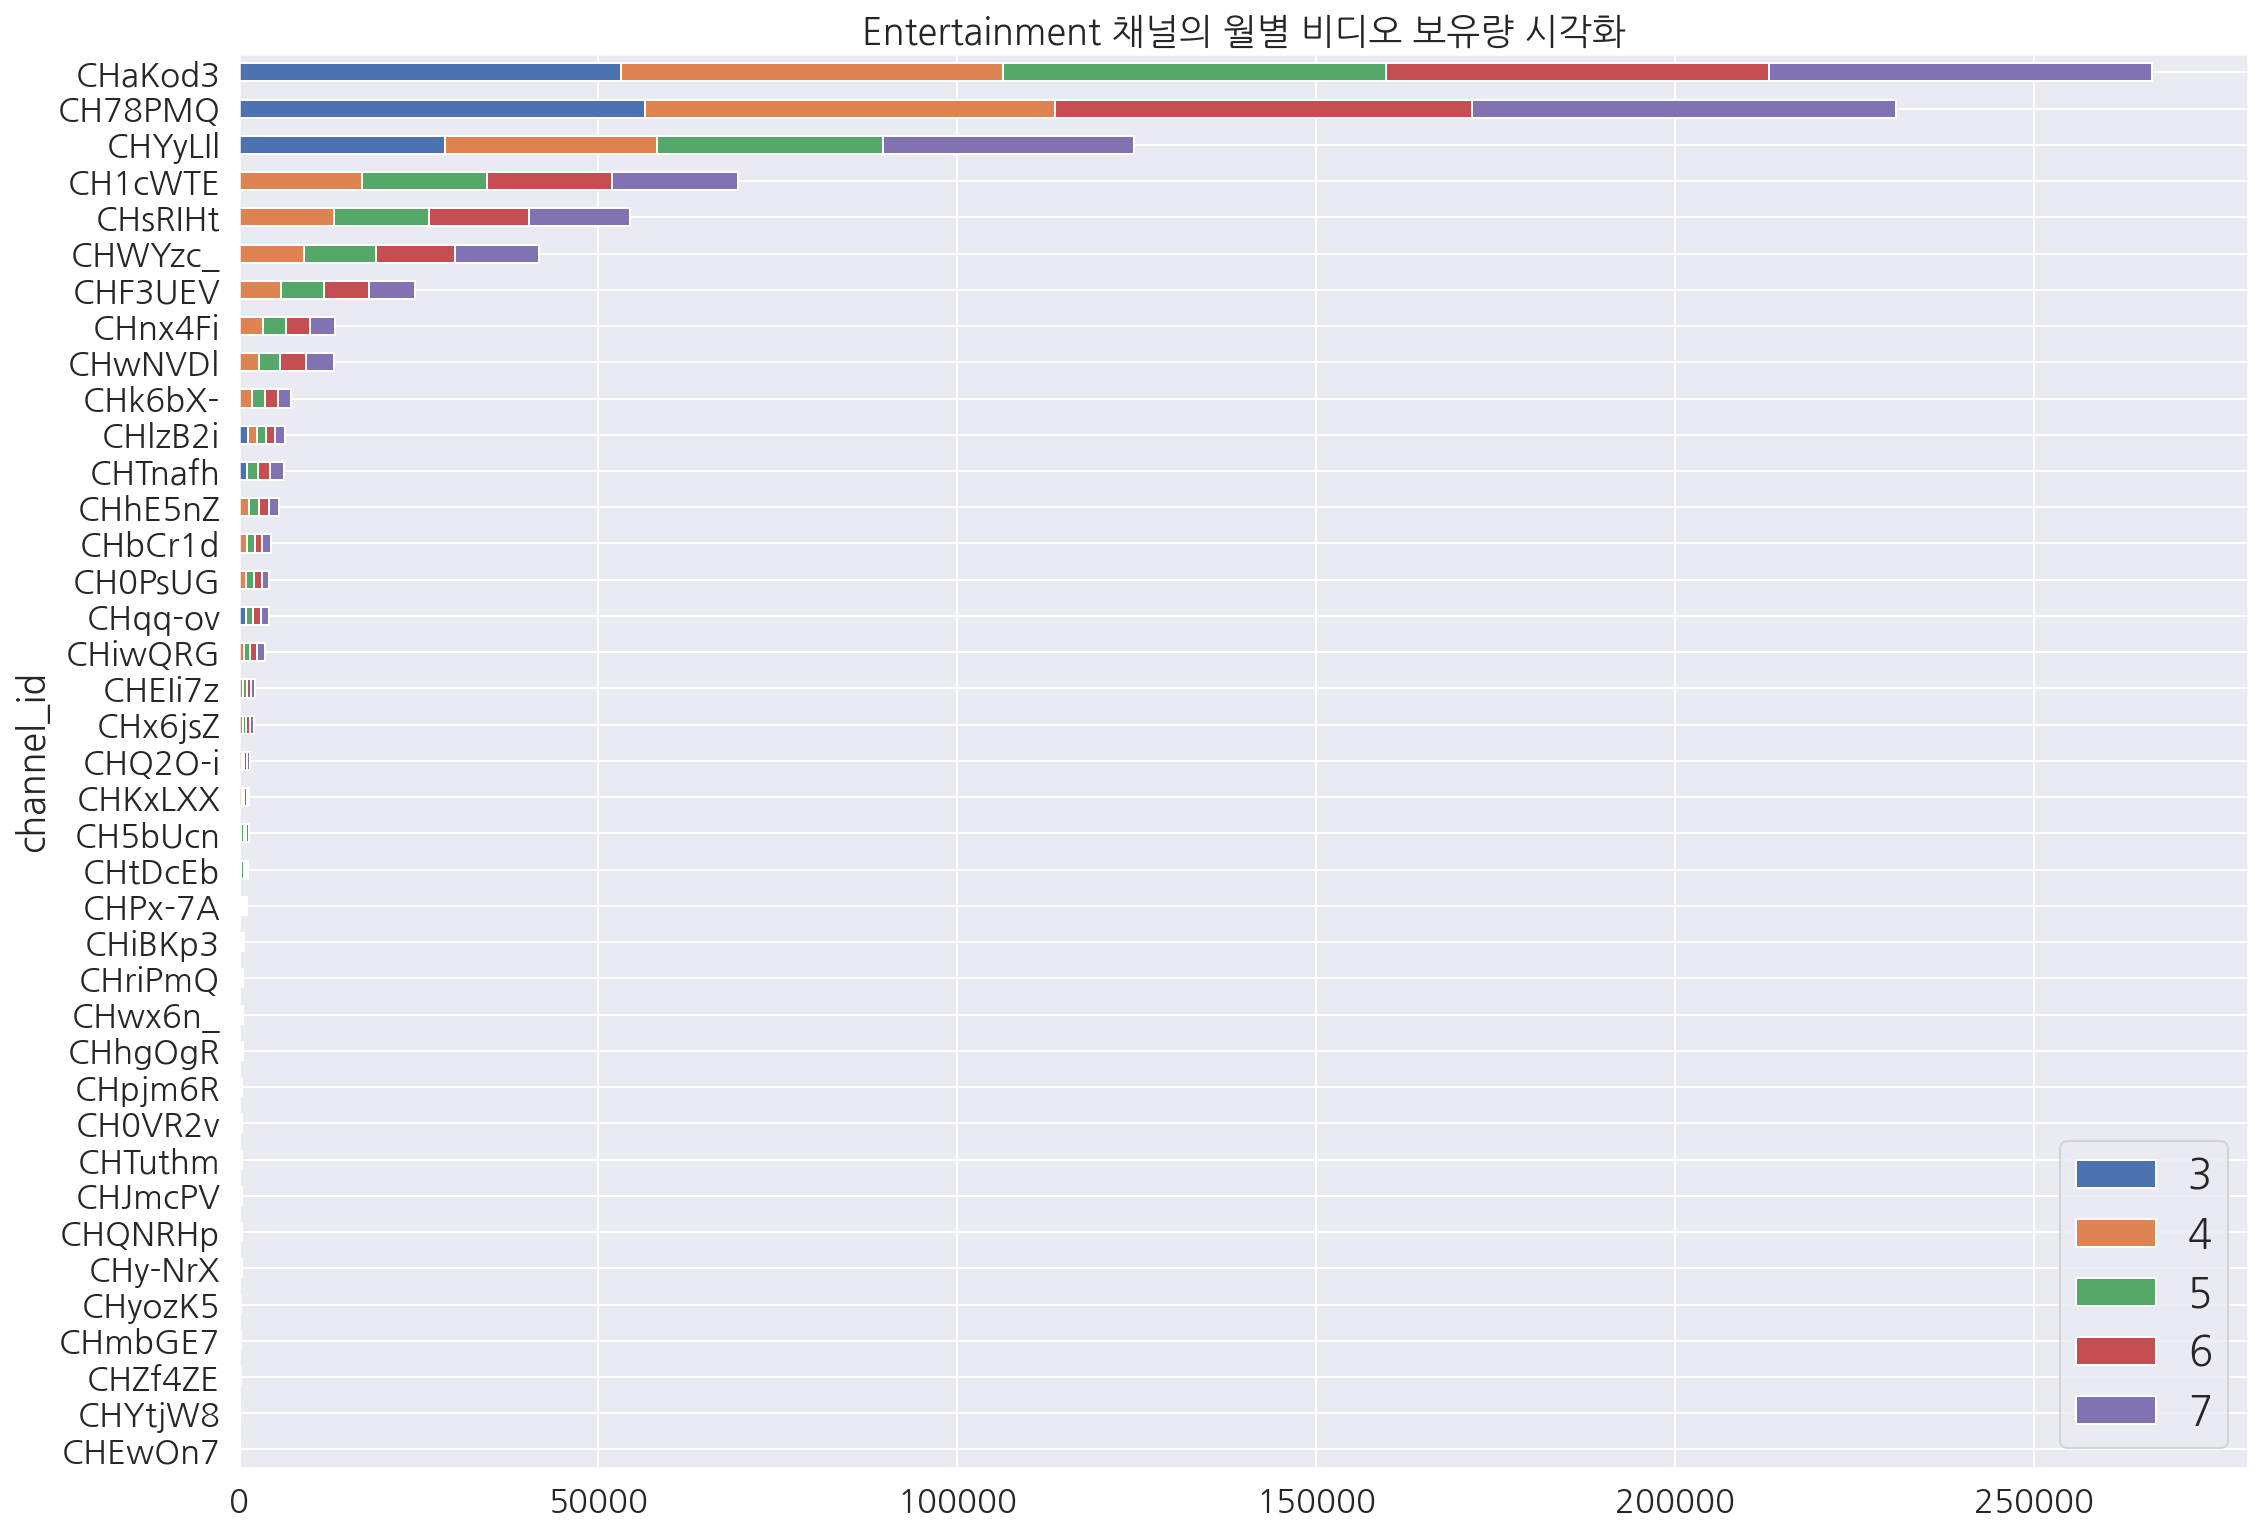

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot data in stack manner of bar type
ax = Entertainment_loc[[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[0]} 채널의 월별 비디오 보유량 시각화")
ax.legend(loc='lower right', prop={'size': 20})

plt.show();

범위가 너무 커서 채널들의 수치가 한눈에 보이지 않습니다. 

비디오 개수가 많은 순으로 잘라서 차례대로 보겠습니다. 

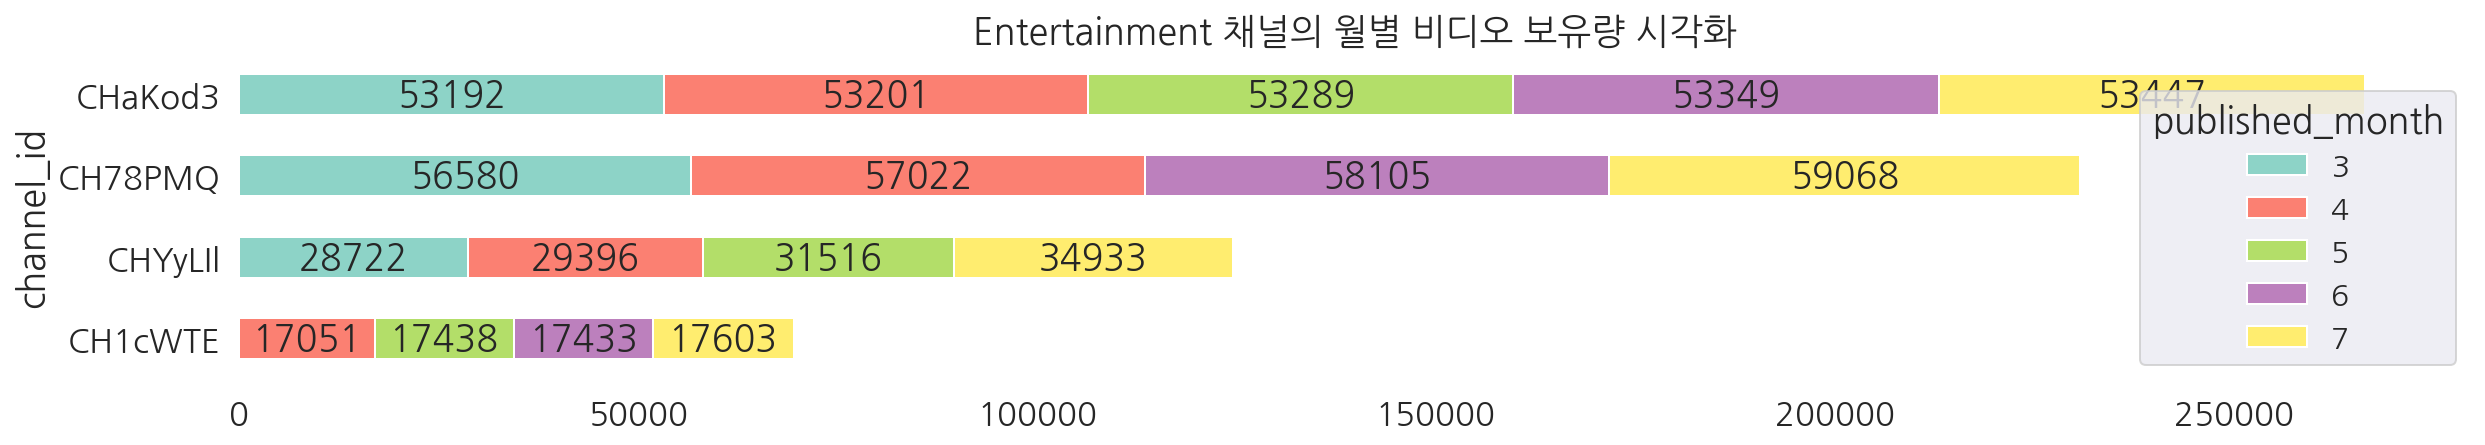

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot data in stack manner of bar type
ax = Entertainment_loc.iloc[35:][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[0]} 채널의 월별 비디오 보유량 시각화", figsize =(20,3), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

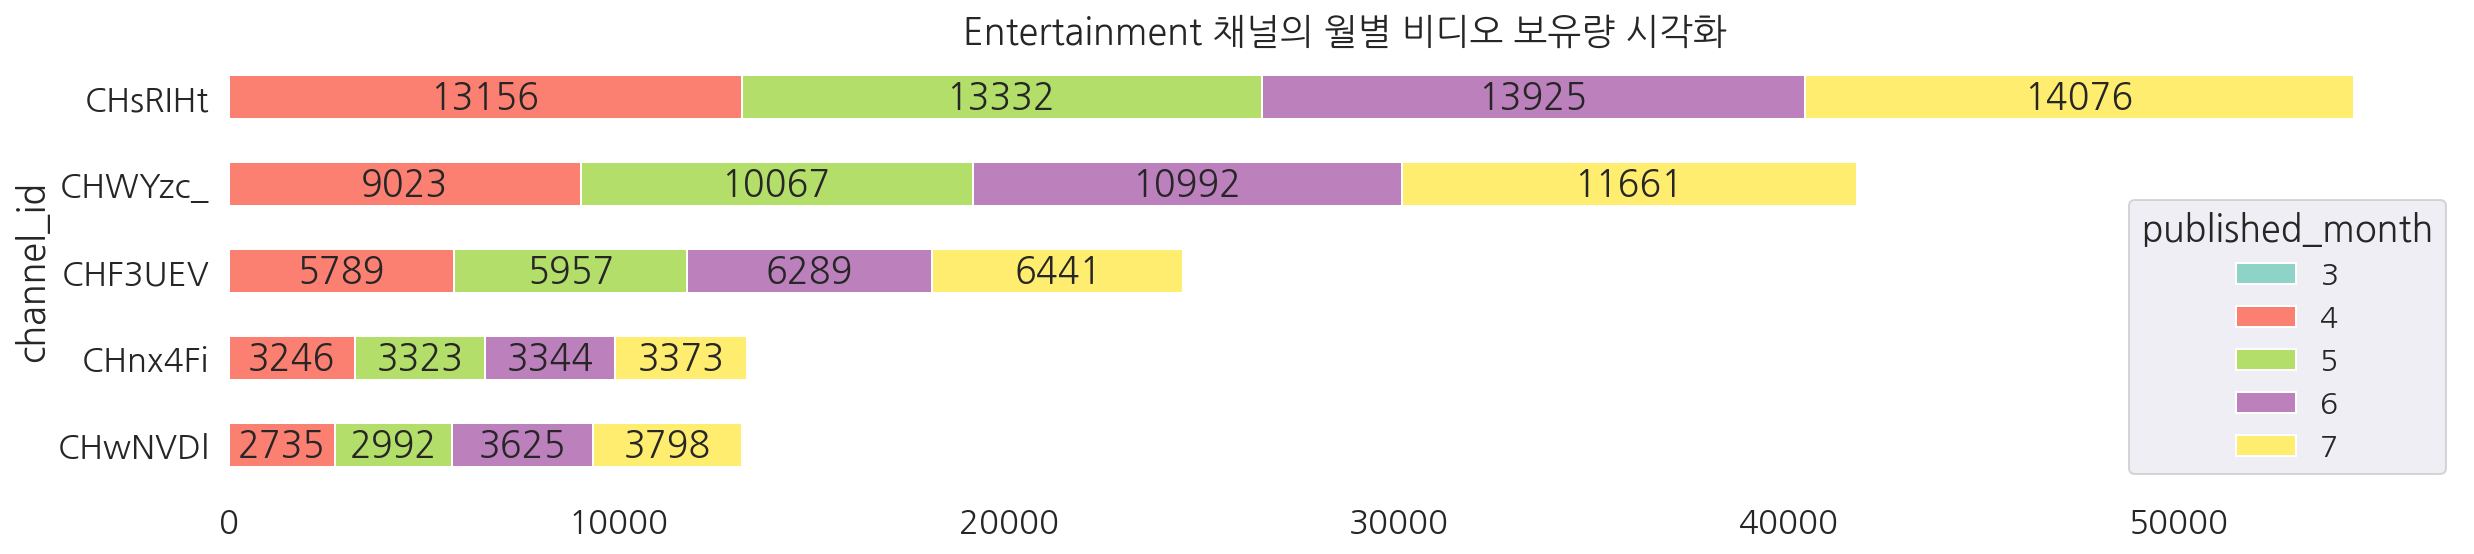

In [ ]:
# plot data in stack manner of bar type
ax = Entertainment_loc.iloc[30:35][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[0]} 채널의 월별 비디오 보유량 시각화", figsize =(20,4), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

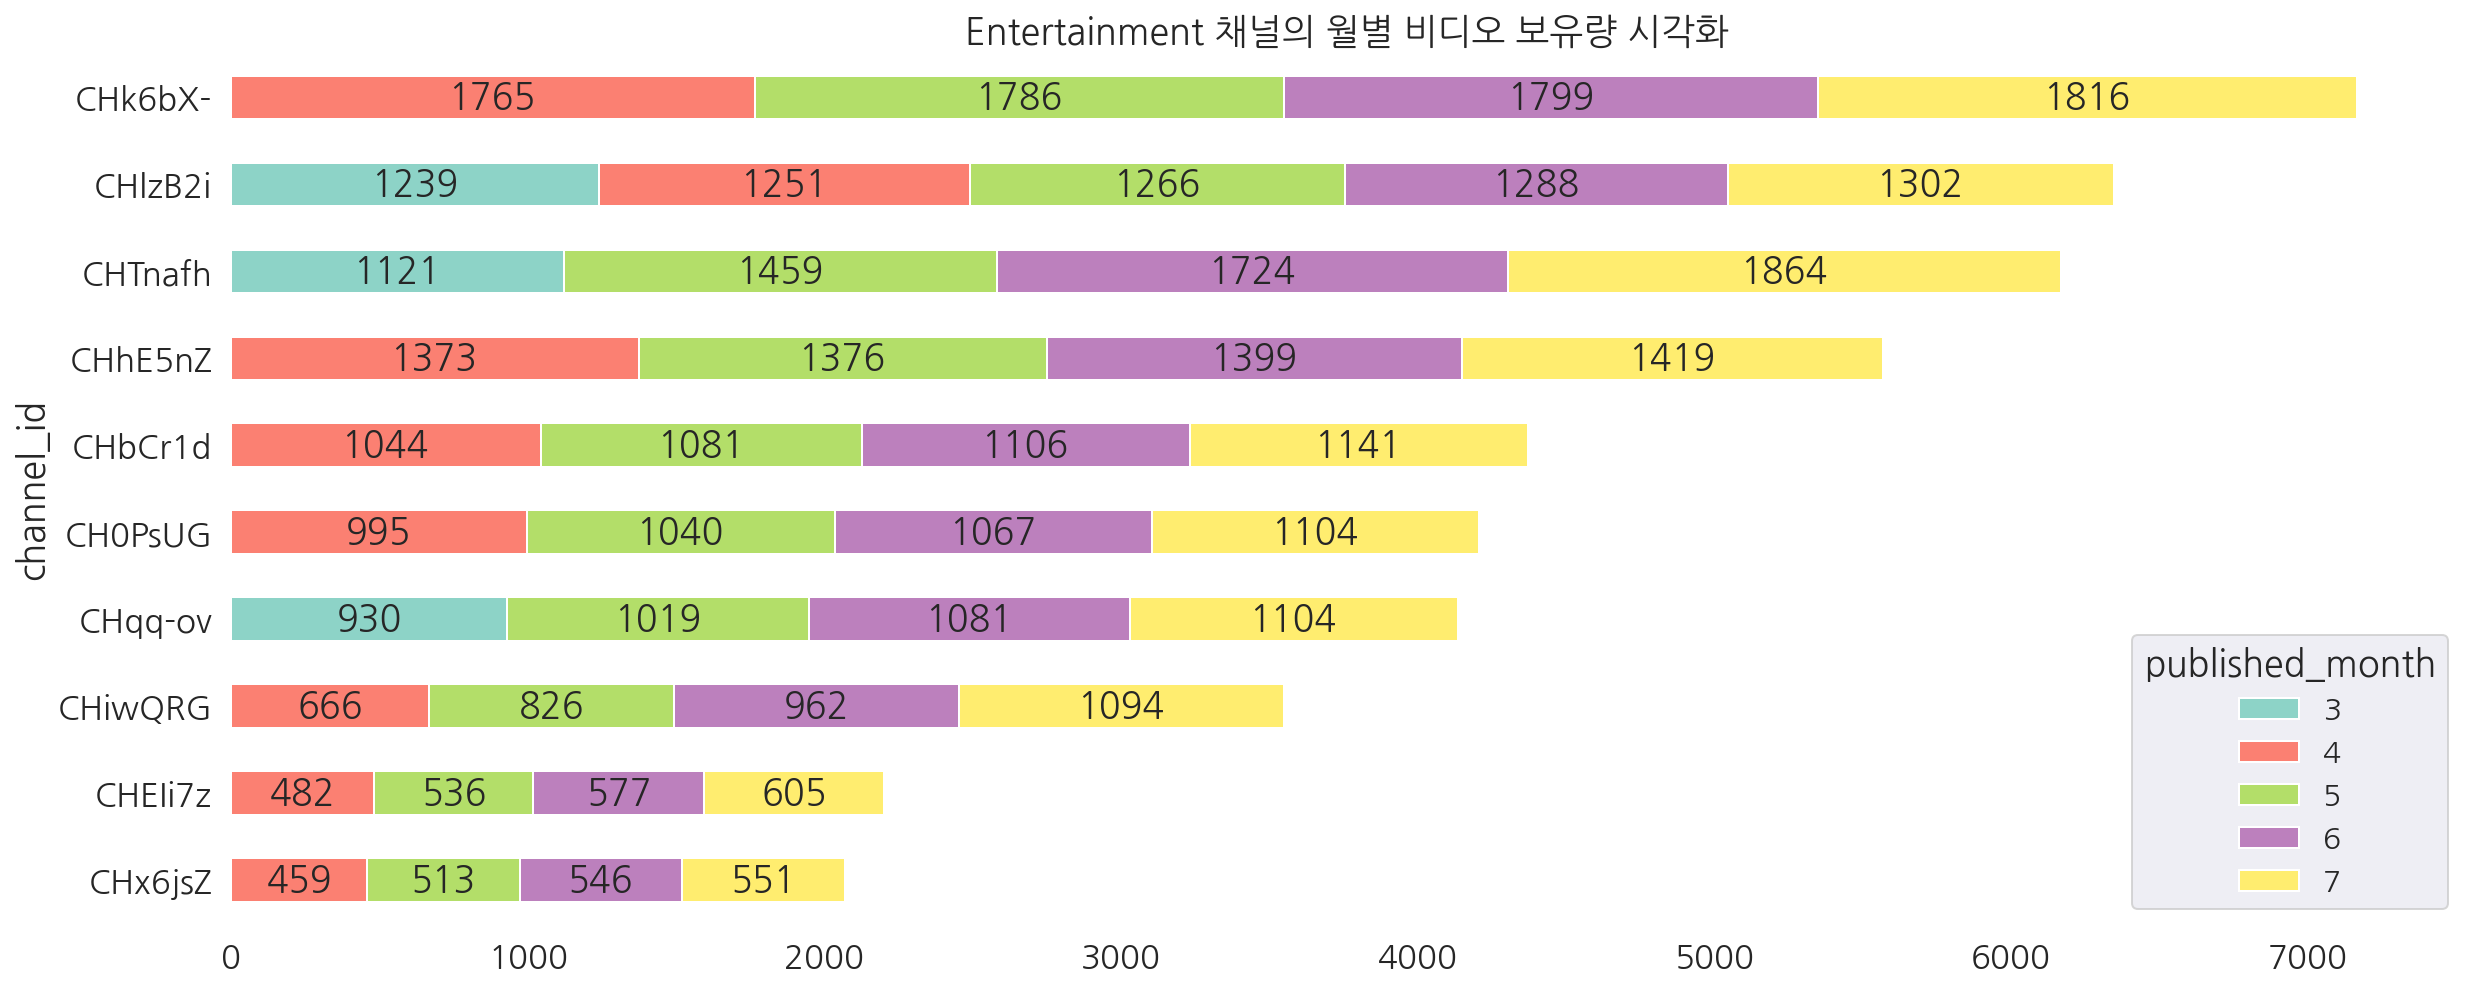

In [ ]:
# plot data in stack manner of bar type

ax = Entertainment_loc.iloc[20:30][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[0]} 채널의 월별 비디오 보유량 시각화", figsize =(20,8), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

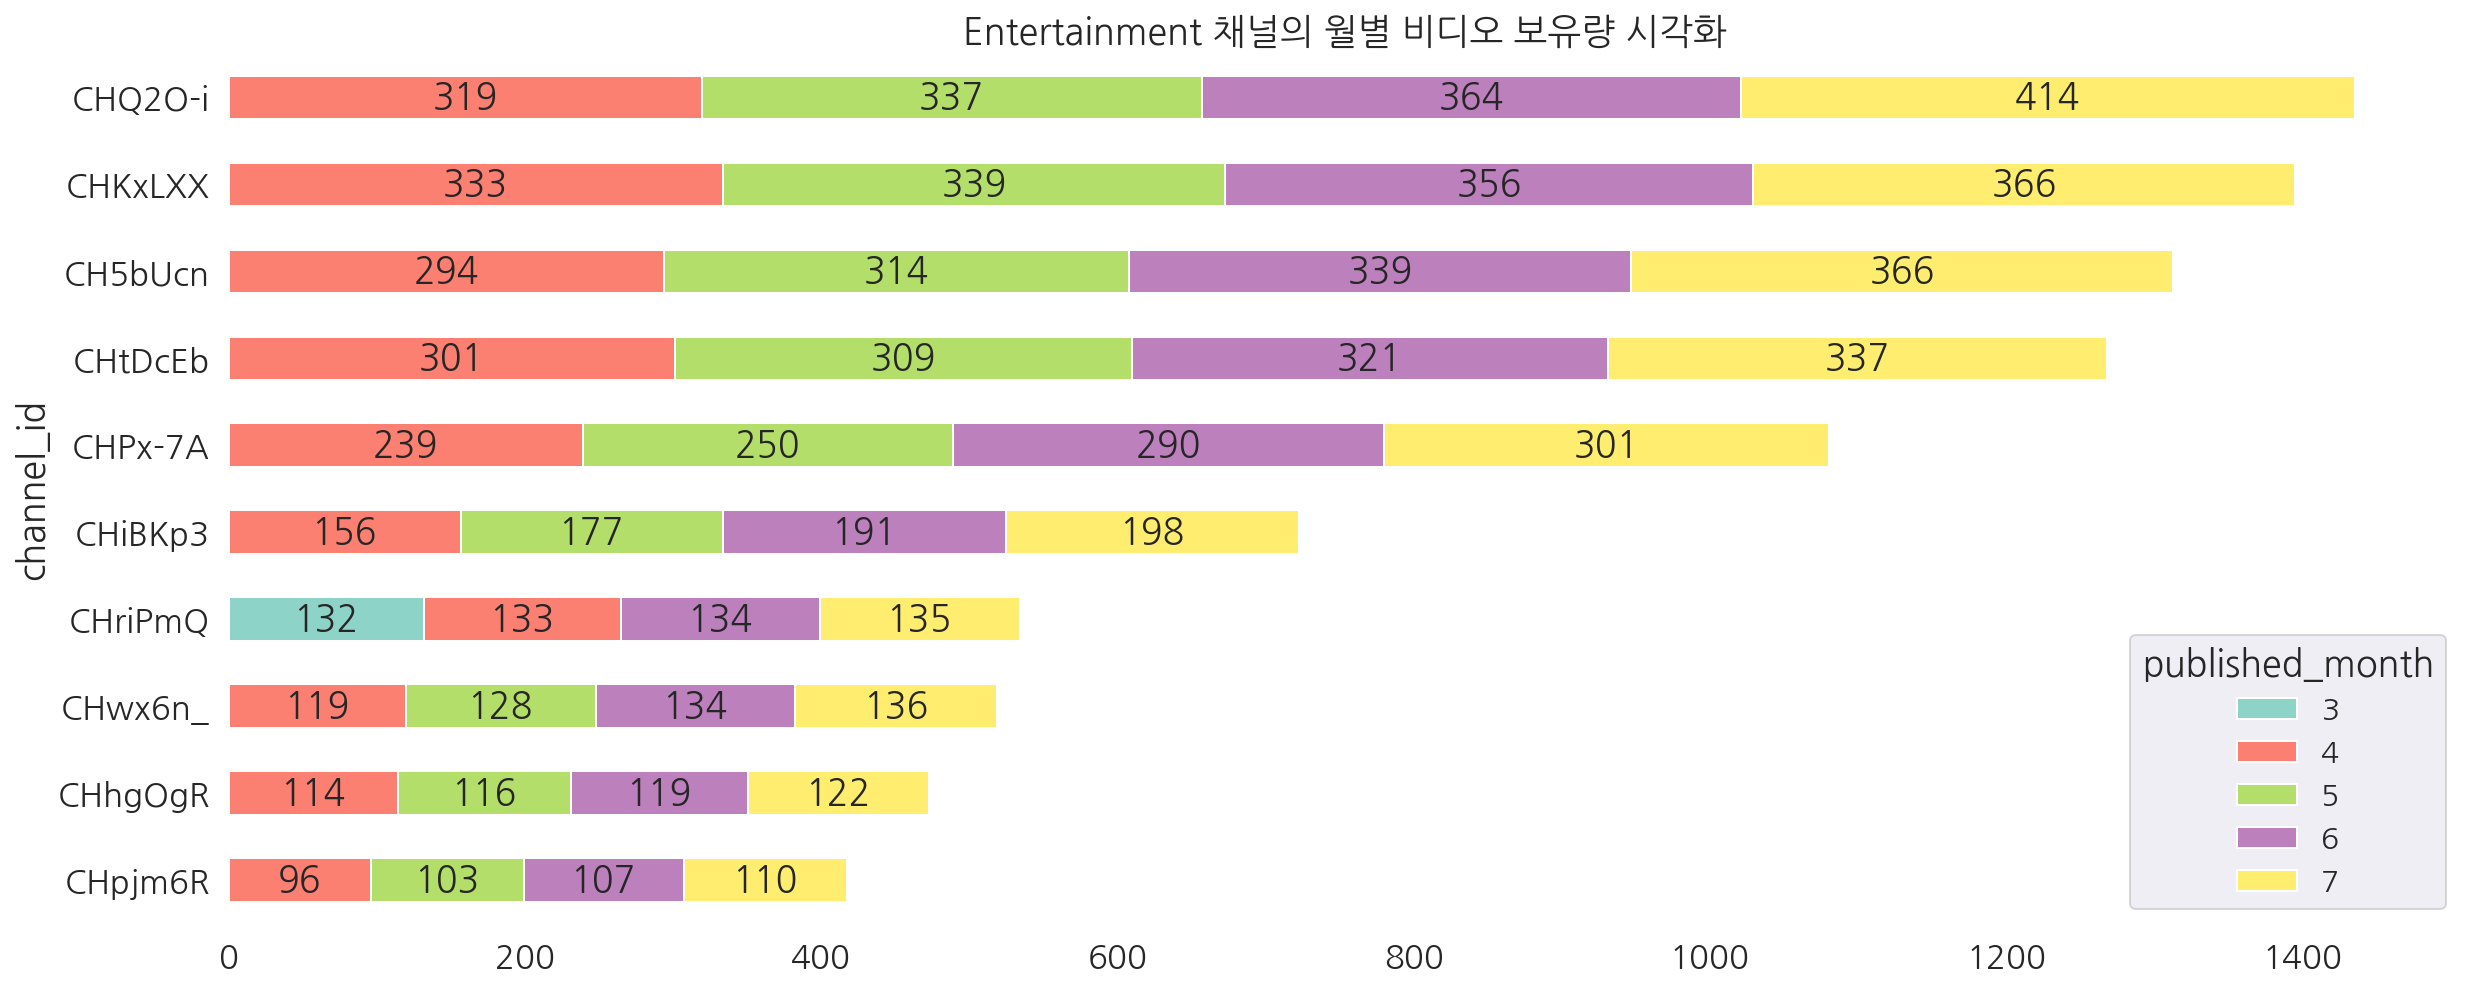

In [ ]:
# plot data in stack manner of bar type
ax = Entertainment_loc.iloc[10:20][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[0]} 채널의 월별 비디오 보유량 시각화", figsize =(20,8), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

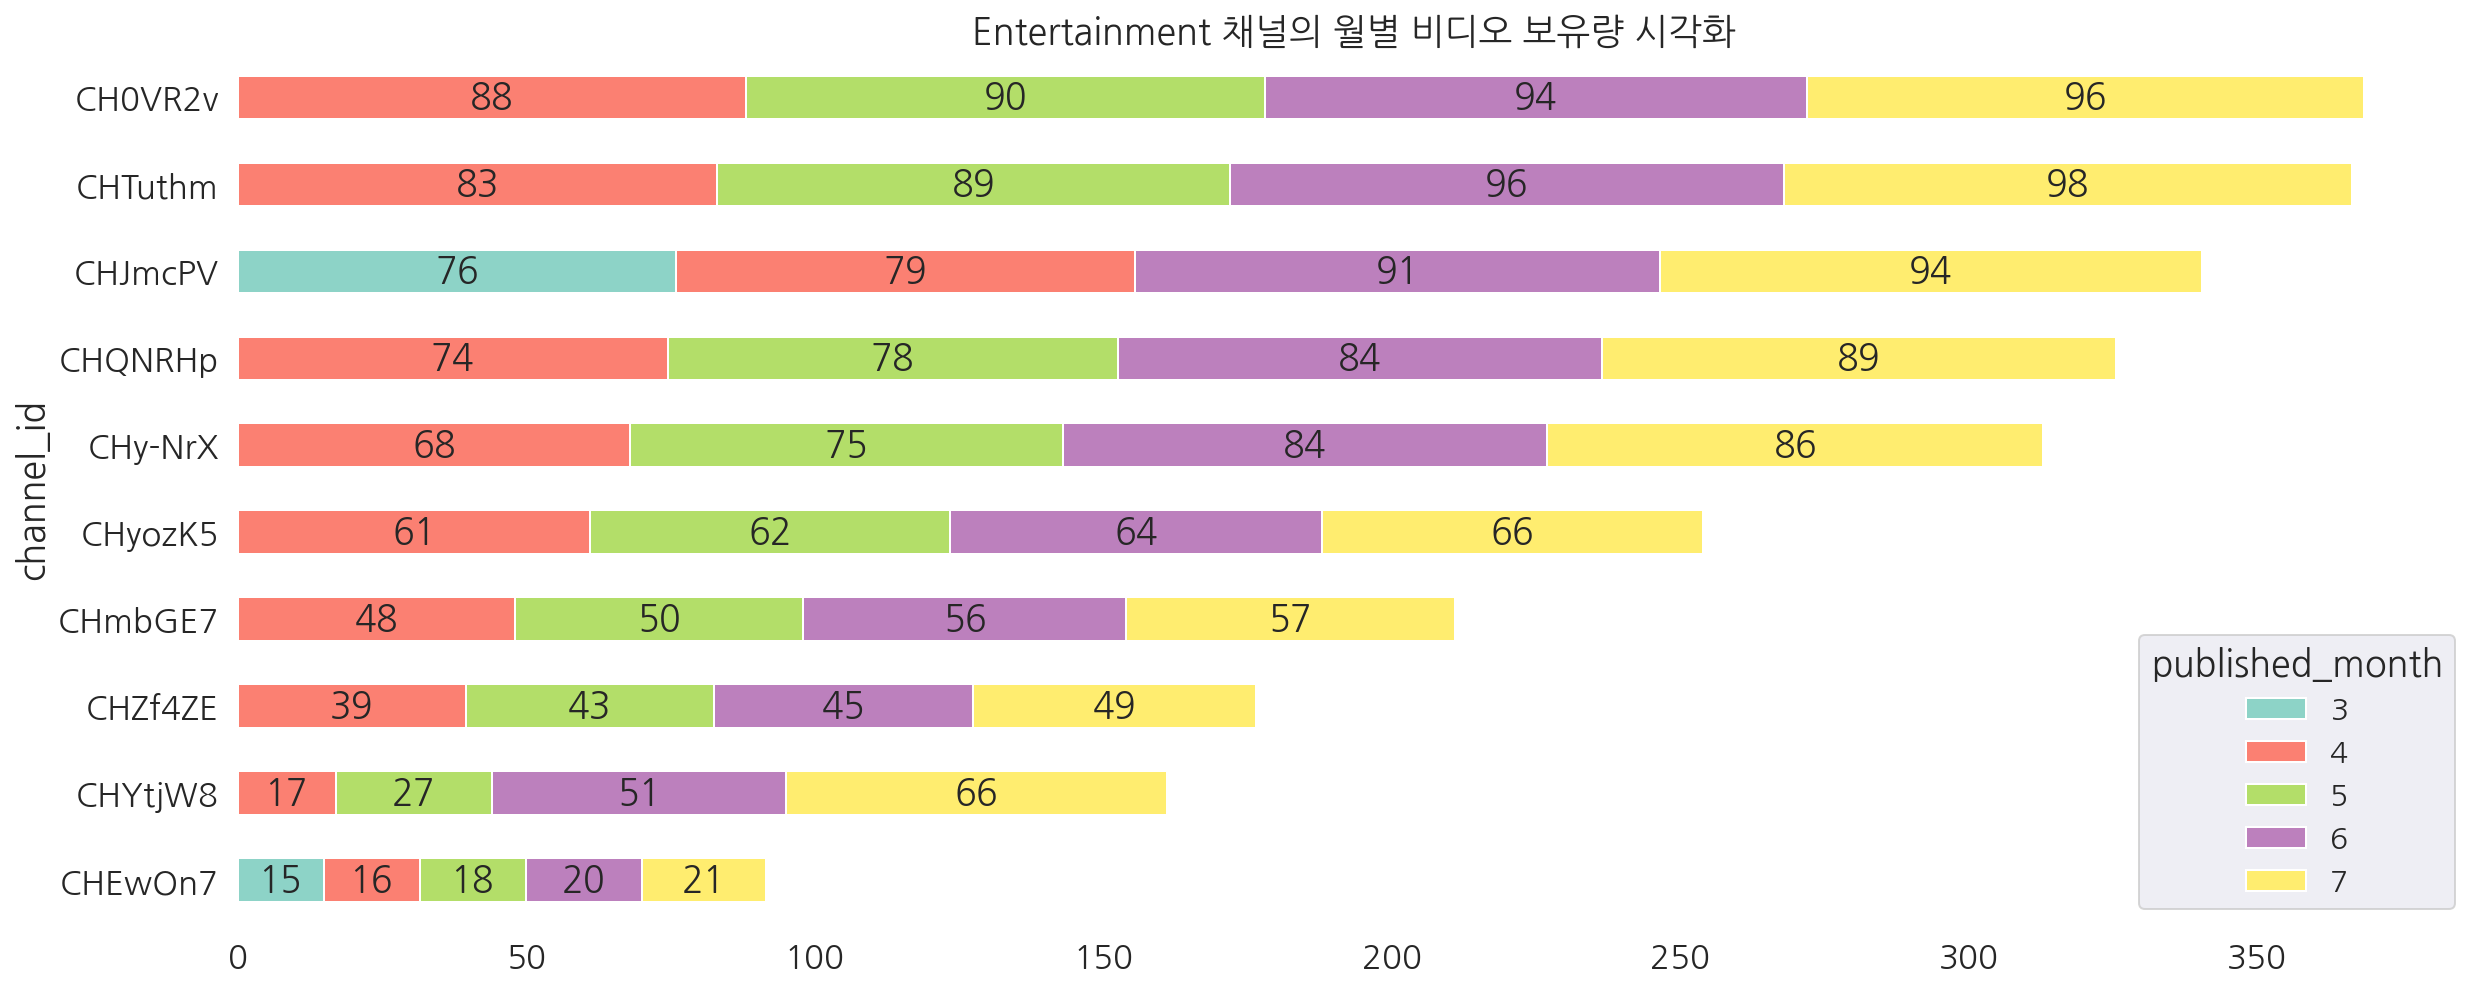

In [ ]:

ax = Entertainment_loc.iloc[:10][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[0]} 채널의 월별 비디오 보유량 시각화", figsize =(20,8), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

### 1.People & Blogs

In [ ]:
category[1]

'People & Blogs'

In [ ]:
# People & Blogs	카테고리만 추출
People = month_df[month_df['category_name']==category[1]]
People_df = People['on_channel_total_videos'].groupby([People['channel_id'], People['published_month']]).mean().unstack('published_month')

In [ ]:
# People & Blogs 카테고리에 속한 'channel_id'의 개수
People['channel_id'].unique().shape

(166,)

 People & Blogs 카테고리에서 채널별로 월별 비디오 보유량을 봅시다.

In [ ]:
People_df

published_month      3       4       5      6       7
channel_id                                           
CH-Bsa2            NaN  2303.0  2344.0    NaN     NaN
CH-KafR            NaN     NaN    21.0    NaN     NaN
CH-YRx5            NaN     NaN    33.0    NaN     NaN
CH-swYD            NaN     NaN     8.0    NaN     NaN
CH0PsUG            NaN     NaN     NaN    NaN  1098.0
...                ...     ...     ...    ...     ...
CHyje3j            NaN     NaN     NaN  250.0     NaN
CHyn-K7          292.0     NaN     NaN    NaN     NaN
CHyuL_X           90.0     NaN     NaN    NaN     NaN
CHzRDCw            NaN   406.0   423.5  447.0     NaN
CHzhyI5            NaN     NaN    42.0    NaN     NaN

[166 rows x 5 columns]

166개의 channel_id를 모두 시각화하기에는 너무 많습니다. 



In [ ]:
People_df['sum'] = People_df.T.sum()

In [ ]:
# 5개월 모두 채택된 채널수
li_index = []
for i in range(len(People_df)):
  if People_df.iloc[i].isnull().sum() ==0 : 
    li_index.append(People_df.index[i])
len(li_index)

1

In [ ]:
# 4개월 이상 채택된 채널수
li_index = []
for i in range(len(People_df)):
  if People_df.iloc[i].isnull().sum() <=1 : 
    li_index.append(People_df.index[i])
len(li_index)

11

In [ ]:
# 3개월 이상 채택된 채널수
li_index = []
for i in range(len(People_df)):
  if People_df.iloc[i].isnull().sum() <=2 : 
    li_index.append(People_df.index[i])
len(li_index)

28

3,4,5,6,7월 중 결측값이 3개 이상인 채널을 제외하고 5개월 중 3개월 이상 꾸준히 선정된 채널 28개의 channel_id만 추출합니다. 

In [ ]:
People_loc = People_df.loc[li_index].sort_values('sum')

In [ ]:
People_loc.describe()

published_month             3             4             5           6  \
count                3.000000     25.000000     24.000000   23.000000   
mean              6048.666667   1023.570000   1063.796131  144.862319   
std              10039.301486   3668.558699   3774.345351  126.203416   
min                222.000000      1.500000      4.333333    9.666667   
25%                252.500000     31.000000     36.750000   42.500000   
50%                283.000000     99.000000    100.000000  103.500000   
75%               8962.000000    254.000000    238.750000  219.583333   
max              17641.000000  18137.000000  18290.000000  447.000000   

published_month            7           sum  
count              21.000000     28.000000  
mean              330.182540   2840.429422  
std               948.744688  10336.363510  
min                13.500000     29.000000  
25%                56.000000    114.875000  
50%               107.000000    299.500000  
75%               164.000000    813.500000  
max              4448.000000  54068.000000

In [ ]:
People_loc

published_month        3         4             5           6            7  \
channel_id                                                                  
CHkkWd0              NaN      1.50      4.333333    9.666667    13.500000   
CHOOKj-              NaN     15.00     19.000000   20.000000          NaN   
CHpH3rU              NaN     10.50     12.000000   14.000000    18.500000   
CHUyr50              NaN     16.00     17.000000   18.000000    19.000000   
CHfqVrM              NaN     28.00     33.000000         NaN    33.000000   
CHhK2Dh              NaN     17.00           NaN   41.000000    43.000000   
CHrh6bu              NaN     31.00     38.000000   44.000000          NaN   
CHsP57H              NaN       NaN     24.500000   35.000000    56.000000   
CHqNN-b              NaN       NaN     39.000000   62.000000    90.000000   
CHXXlcP              NaN     71.00     73.000000         NaN    76.000000   
CHKFvox              NaN     79.00           NaN   88.000000    89.500000   
CH31-nU              NaN     78.00           NaN  100.500000   107.000000   
CHRzS1N              NaN       NaN     74.750000  102.000000   110.000000   
CHrRn4V              NaN     94.00     95.000000         NaN   105.000000   
CHHR4kW              NaN     99.00    102.000000  104.000000          NaN   
CHoQy2w              NaN     94.50     98.000000  103.500000   109.000000   
CHZ1wYQ              NaN    103.00    109.000000  127.000000   132.500000   
CHYnfy2              NaN    125.50    131.000000  140.000000   144.000000   
CHtkRVa              NaN    155.50    158.000000  161.000000   164.000000   
CHfpaSr              NaN    180.50    183.500000  206.333333   216.333333   
CHYt4St              NaN    254.00    265.000000  274.000000          NaN   
CHPZ4e8            283.0    291.00           NaN  301.000000          NaN   
CHtfriF            222.0    225.00    230.000000  232.833333   238.500000   
CHA6KBB              NaN    275.00    293.000000  306.000000   322.000000   
CHzRDCw              NaN    406.00    423.500000  447.000000          NaN   
CHIG4gr              NaN    383.75    389.857143  395.000000   399.000000   
CHbFzvz              NaN   4418.50   4428.666667         NaN  4448.000000   
CHaZS_X          17641.0  18137.00  18290.000000         NaN          NaN   

published_month           sum  
channel_id                     
CHkkWd0             29.000000  
CHOOKj-             54.000000  
CHpH3rU             55.000000  
CHUyr50             70.000000  
CHfqVrM             94.000000  
CHhK2Dh            101.000000  
CHrh6bu            113.000000  
CHsP57H            115.500000  
CHqNN-b            191.000000  
CHXXlcP            220.000000  
CHKFvox            256.500000  
CH31-nU            285.500000  
CHRzS1N            286.750000  
CHrRn4V            294.000000  
CHHR4kW            305.000000  
CHoQy2w            405.000000  
CHZ1wYQ            471.500000  
CHYnfy2            540.500000  
CHtkRVa            638.500000  
CHfpaSr            786.666667  
CHYt4St            793.000000  
CHPZ4e8            875.000000  
CHtfriF           1148.333333  
CHA6KBB           1196.000000  
CHzRDCw           1276.500000  
CHIG4gr           1567.607143  
CHbFzvz          13295.166667  
CHaZS_X          54068.000000

People_loc에서 아웃라이어인 'CHbFzvz', 'CHaZS_X'를 제외합니다.

In [ ]:
# 아웃라이어 제외
People_loc = People_loc[:-2]

In [ ]:
People_loc.shape

(26, 6)

In [ ]:
People_loc.index.values

array(['CHkkWd0', 'CHOOKj-', 'CHpH3rU', 'CHUyr50', 'CHfqVrM', 'CHhK2Dh',
       'CHrh6bu', 'CHsP57H', 'CHqNN-b', 'CHXXlcP', 'CHKFvox', 'CH31-nU',
       'CHRzS1N', 'CHrRn4V', 'CHHR4kW', 'CHoQy2w', 'CHZ1wYQ', 'CHYnfy2',
       'CHtkRVa', 'CHfpaSr', 'CHYt4St', 'CHPZ4e8', 'CHtfriF', 'CHA6KBB',
       'CHzRDCw', 'CHIG4gr'], dtype=object)

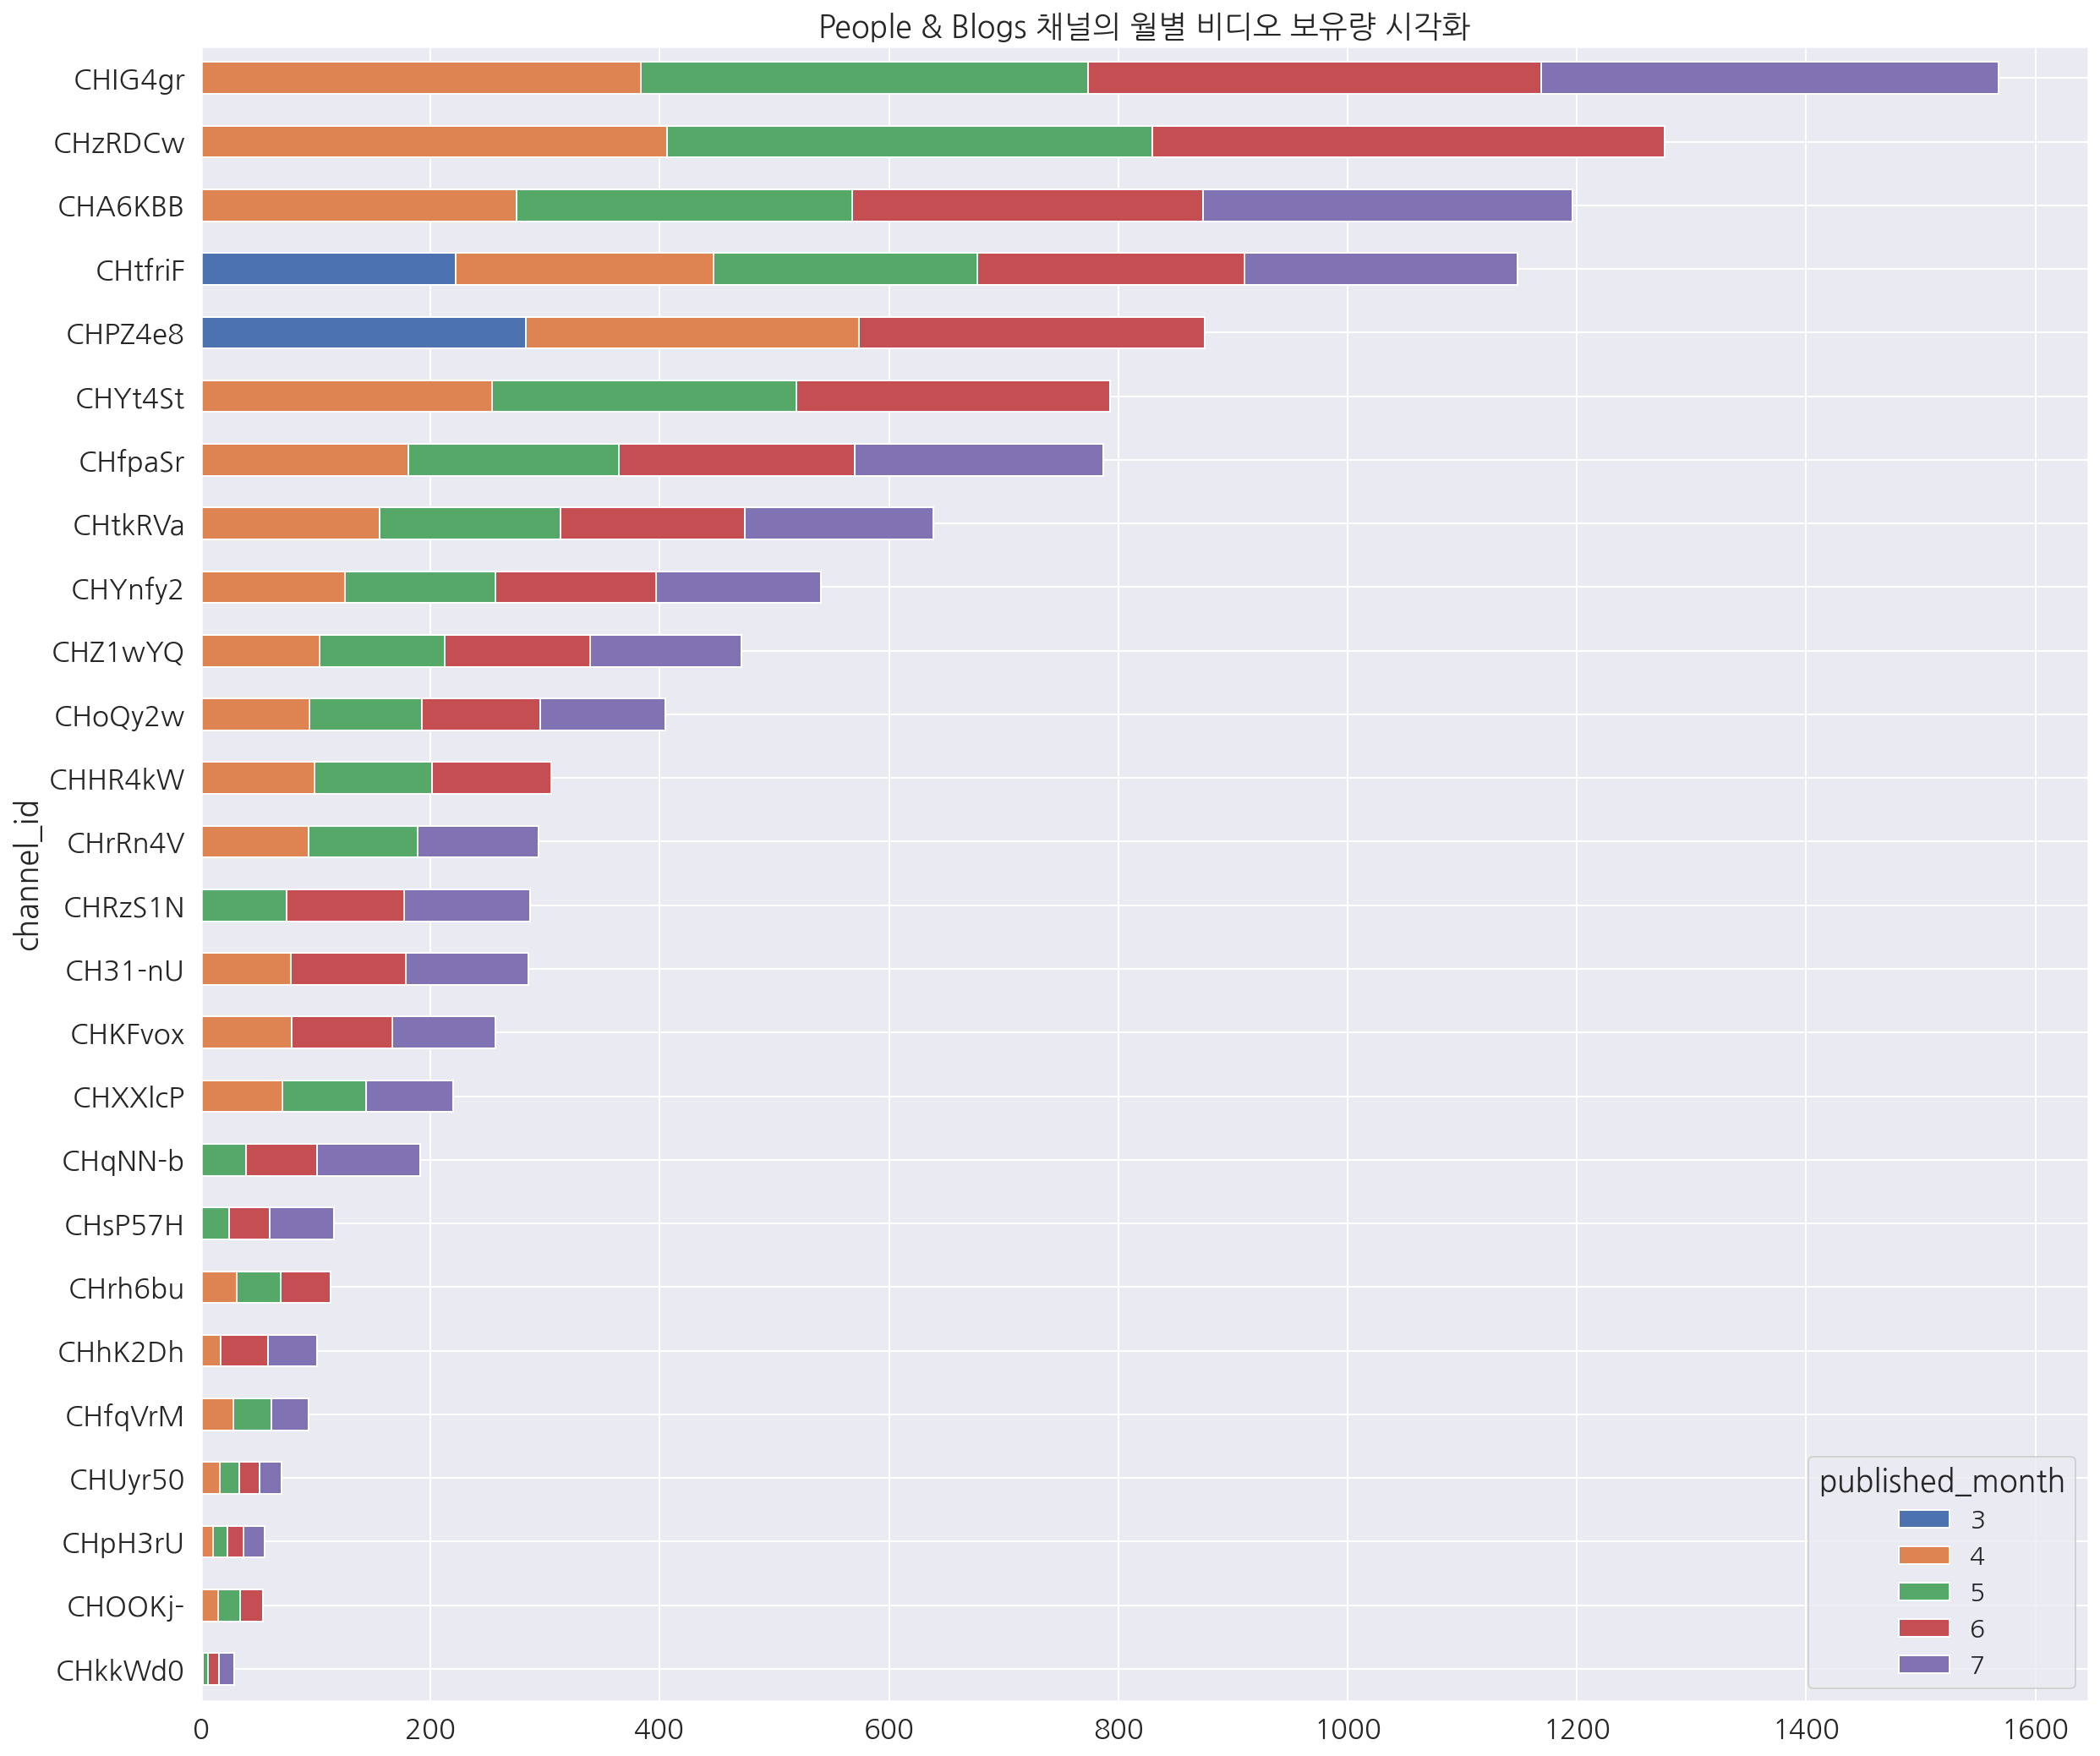

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot data in stack manner of bar type
ax = People_loc[[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[1]} 채널의 월별 비디오 보유량 시각화", figsize =(20,18))
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

plt.show();

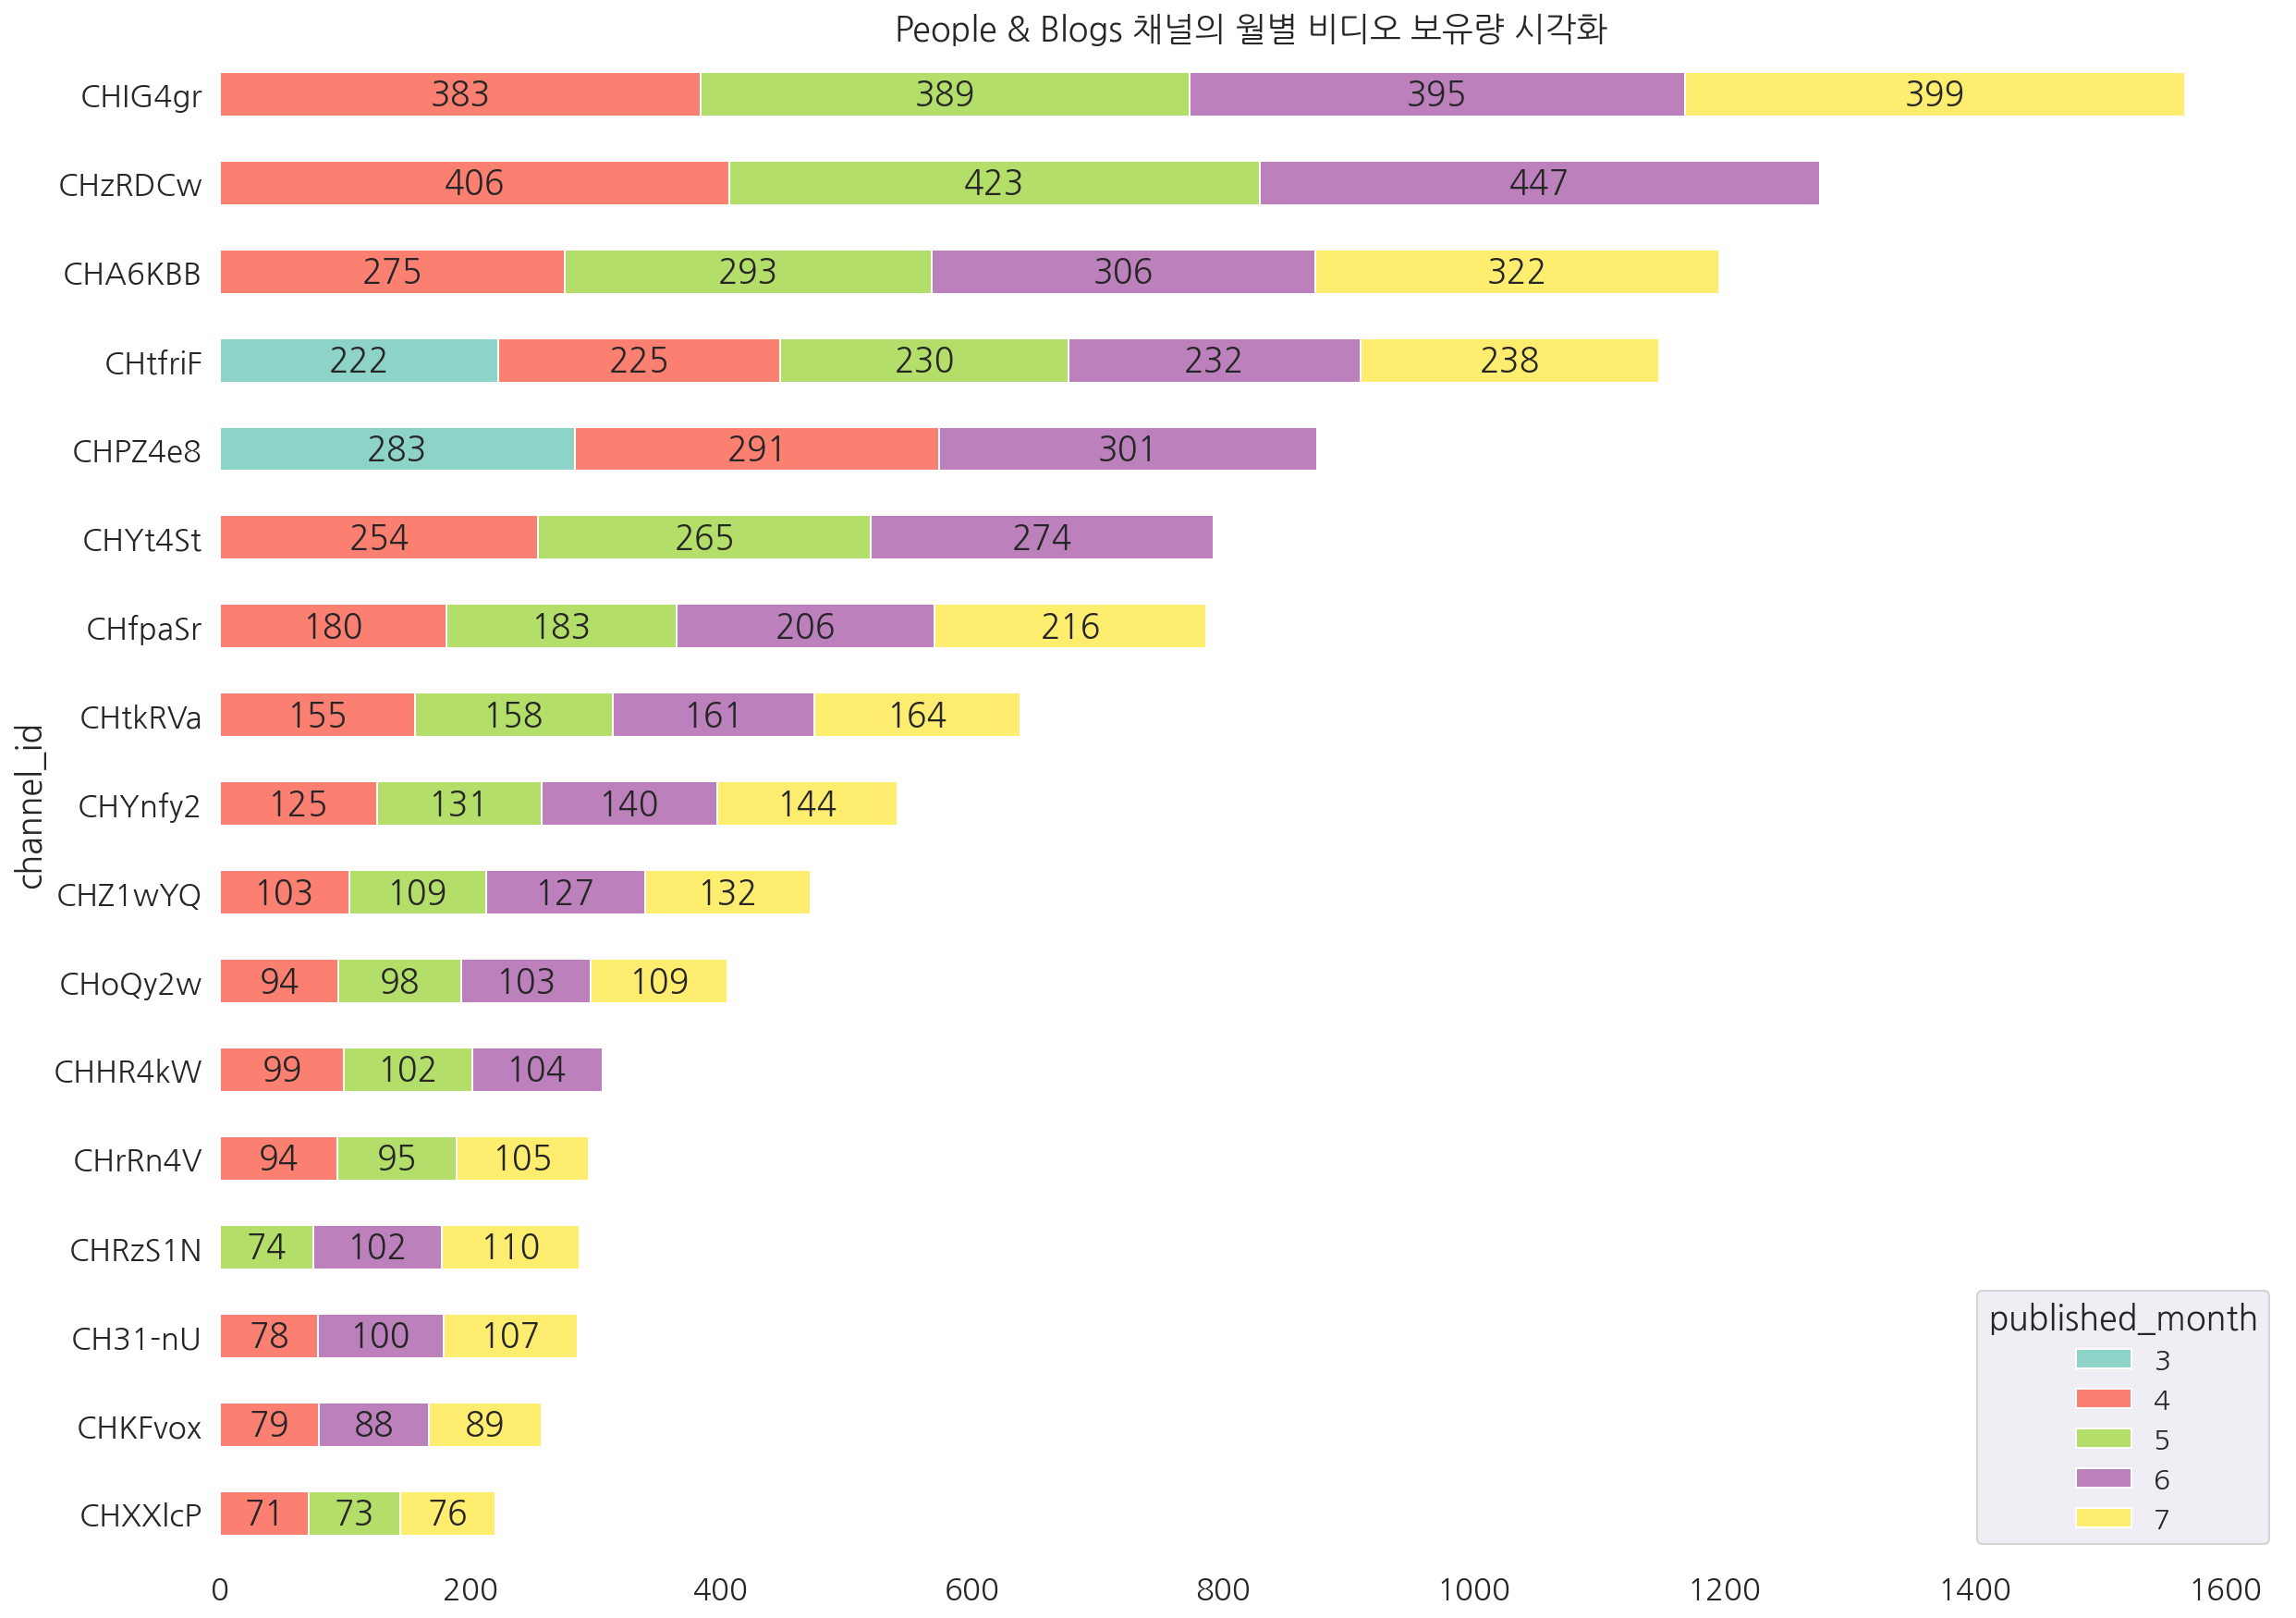

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot data in stack manner of bar type
ax = People_loc.iloc[9:][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[1]} 채널의 월별 비디오 보유량 시각화", figsize =(20,15), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

적은 비디오수를 보유한 마지막 6개 채널에 대해서 다시 그려보겠습니다.

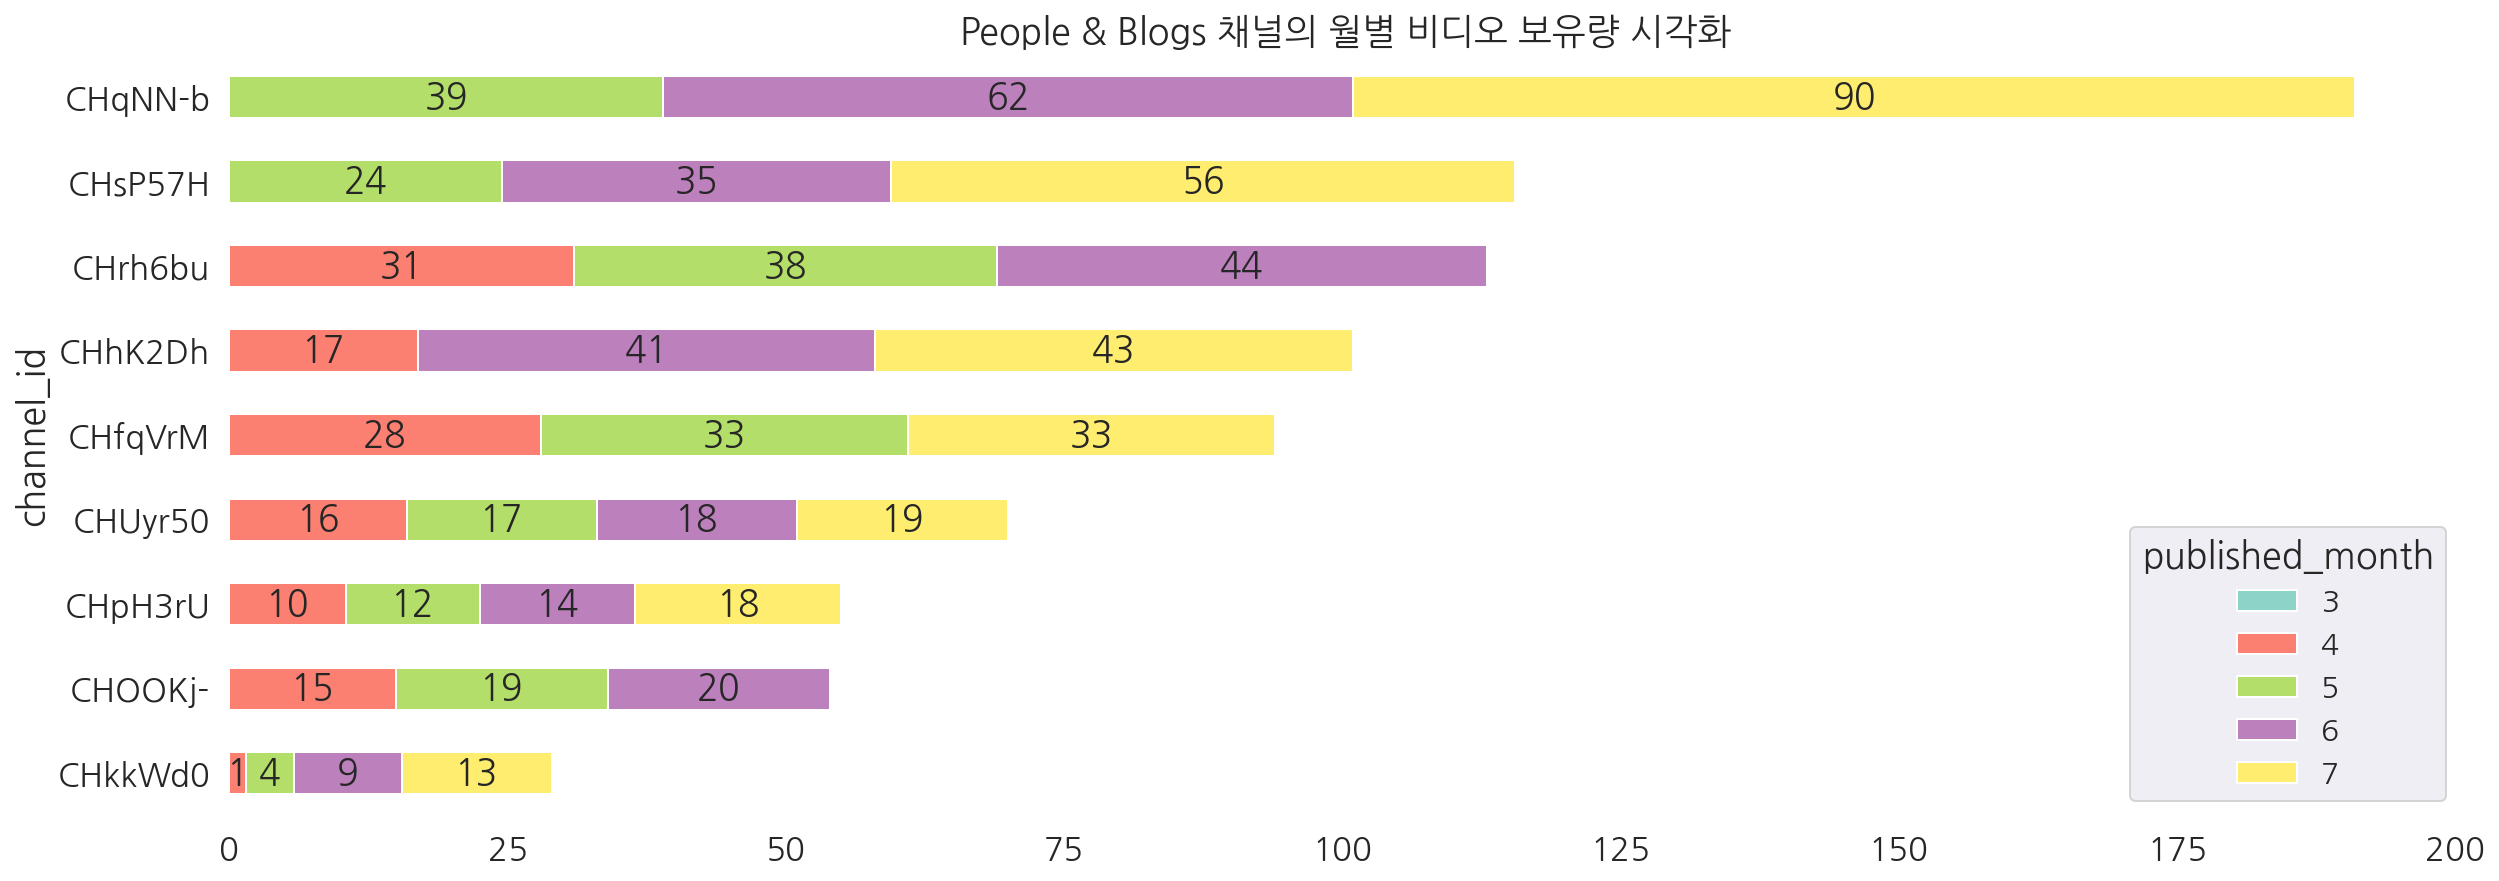

In [ ]:

# plot data in stack manner of bar type
ax = People_loc.iloc[:9][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[1]} 채널의 월별 비디오 보유량 시각화", figsize =(20,7), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

### 2.Music

In [ ]:
category[2]

'Music'

In [ ]:
# Music	카테고리만 추출
Music = month_df[month_df['category_name']==category[2]]
Music_df = Music['on_channel_total_videos'].groupby([Music['channel_id'], Music['published_month']]).mean().unstack('published_month')

In [ ]:
# Music카테고리에 속한 'channel_id'의 개수
Music['channel_id'].unique().shape

(98,)

Music 카테고리에서 채널별로 월별 비디오 보유량을 봅시다.

In [ ]:
Music_df

published_month   3      4       5      6       7
channel_id                                       
CH-FQUI         NaN    NaN     NaN    NaN  4406.0
CH-IG_h         NaN    NaN     NaN    NaN   111.0
CH-jHB5         NaN    NaN  1211.0    NaN     NaN
CH-qYkz         NaN    NaN   259.5    NaN     NaN
CH0D7tP         NaN    NaN     NaN    NaN    30.0
...              ..    ...     ...    ...     ...
CHxOZuU         NaN    NaN     NaN    NaN  1144.0
CHyPwRg         NaN  112.0   123.0    NaN     NaN
CHzCedB         NaN  169.5   175.0  185.5   196.0
CHzgxx_         NaN    NaN     NaN  568.0     NaN
CHzxXBQ         NaN    NaN     NaN    NaN    57.0

[98 rows x 5 columns]

98개의 channel_id를 모두 시각화하기에는 너무 많습니다. 



In [ ]:
Music_df['sum'] = Music_df.T.sum()

In [ ]:
# 5개월 모두 채택된 채널수
li_index = []
for i in range(len(Music_df)):
  if Music_df.iloc[i].isnull().sum() ==0 : 
    li_index.append(Music_df.index[i])
len(li_index)

1

In [ ]:
# 4개월 이상 채택된 채널수
li_index = []
for i in range(len(Music_df)):
  if Music_df.iloc[i].isnull().sum() <=1 : 
    li_index.append(Music_df.index[i])
len(li_index)

4

In [ ]:
# 3개월 이상 채택된 채널수
li_index = []
for i in range(len(Music_df)):
  if Music_df.iloc[i].isnull().sum() <=2 : 
    li_index.append(Music_df.index[i])
len(li_index)

14

In [ ]:
# 2개월 이상 채택된 채널수
li_index = []
for i in range(len(Music_df)):
  if Music_df.iloc[i].isnull().sum() <=3 : 
    li_index.append(Music_df.index[i])
len(li_index)

29

3,4,5,6,7월 중 결측값이 4개 이상인 채널을 제외하고 5개월 중 2개월 이상 선정된 채널 29개의 channel_id만 추출합니다. 

In [ ]:
Music_loc = Music_df.loc[li_index].sort_values('sum')

In [ ]:
Music_loc

published_month       3             4        5             6         7  \
channel_id                                                               
CH2KmG_             NaN     35.000000     36.0           NaN       NaN   
CH9GtSL             NaN           NaN     47.5     59.000000     60.00   
CHuKdaT             NaN           NaN     80.0     95.000000       NaN   
CHRQ7Rw            91.0     95.500000      NaN           NaN       NaN   
CHyPwRg             NaN    112.000000    123.0           NaN       NaN   
CHk9Gmd             NaN           NaN    122.0           NaN    133.00   
CH6nxfR             NaN           NaN    178.5    180.000000       NaN   
CHk2E0d             NaN           NaN      NaN    177.000000    182.00   
CHwgtOR             NaN    185.000000      NaN    204.000000    212.00   
CHzCedB             NaN    169.500000    175.0    185.500000    196.00   
CH66yQ1             NaN           NaN    384.0           NaN    392.00   
CH9vrvN             NaN           NaN    362.0           NaN    457.00   
CHkJ1rb             NaN    453.500000    458.0           NaN       NaN   
CHuhAUM             NaN    553.000000      NaN    582.000000       NaN   
CHfkXDY             NaN    791.600000      NaN    833.666667       NaN   
CH3WZlO             NaN           NaN    568.5    569.500000    571.00   
CHabon8             NaN    820.333333      NaN    947.333333       NaN   
CH3IZKs             NaN    546.000000    603.2           NaN    631.00   
CHviI9l             NaN    806.000000    828.0    856.000000    880.00   
CHYDmx2          1846.0           NaN      NaN   1894.000000       NaN   
CHaO6TY             NaN   1257.000000   1263.0   1275.750000       NaN   
CHLkAep             NaN   1467.400000   1488.5           NaN   1547.75   
CHEbRSm             NaN   1152.000000      NaN   1625.000000   1843.25   
CHtCiO5          1490.0           NaN   1501.0   1507.500000   1518.00   
CH_pwIX             NaN   7380.000000      NaN   7695.000000       NaN   
CHEf_Bc          3670.0   3679.000000   3694.0   3705.000000   3718.00   
CHoRXPc             NaN   6888.000000   6975.0   7163.000000       NaN   
CHeLPm9             NaN  27499.000000  27826.5  28252.333333       NaN   
CHe52oe             NaN           NaN  39967.0  40269.000000  40507.00   

published_month            sum  
channel_id                      
CH2KmG_              71.000000  
CH9GtSL             166.500000  
CHuKdaT             175.000000  
CHRQ7Rw             186.500000  
CHyPwRg             235.000000  
CHk9Gmd             255.000000  
CH6nxfR             358.500000  
CHk2E0d             359.000000  
CHwgtOR             601.000000  
CHzCedB             726.000000  
CH66yQ1             776.000000  
CH9vrvN             819.000000  
CHkJ1rb             911.500000  
CHuhAUM            1135.000000  
CHfkXDY            1625.266667  
CH3WZlO            1709.000000  
CHabon8            1767.666667  
CH3IZKs            1780.200000  
CHviI9l            3370.000000  
CHYDmx2            3740.000000  
CHaO6TY            3795.750000  
CHLkAep            4503.650000  
CHEbRSm            4620.250000  
CHtCiO5            6016.500000  
CH_pwIX           15075.000000  
CHEf_Bc           18466.000000  
CHoRXPc           21026.000000  
CHeLPm9           83577.833333  
CHe52oe          120743.000000

Music_loc에서 아웃라이어인 'CHeLPm9', 'CHe52oe'를 제외합니다.

In [ ]:
# 아웃라이어 제외
Music_loc = Music_loc[:-2]

In [ ]:
Music_loc.shape

(27, 6)

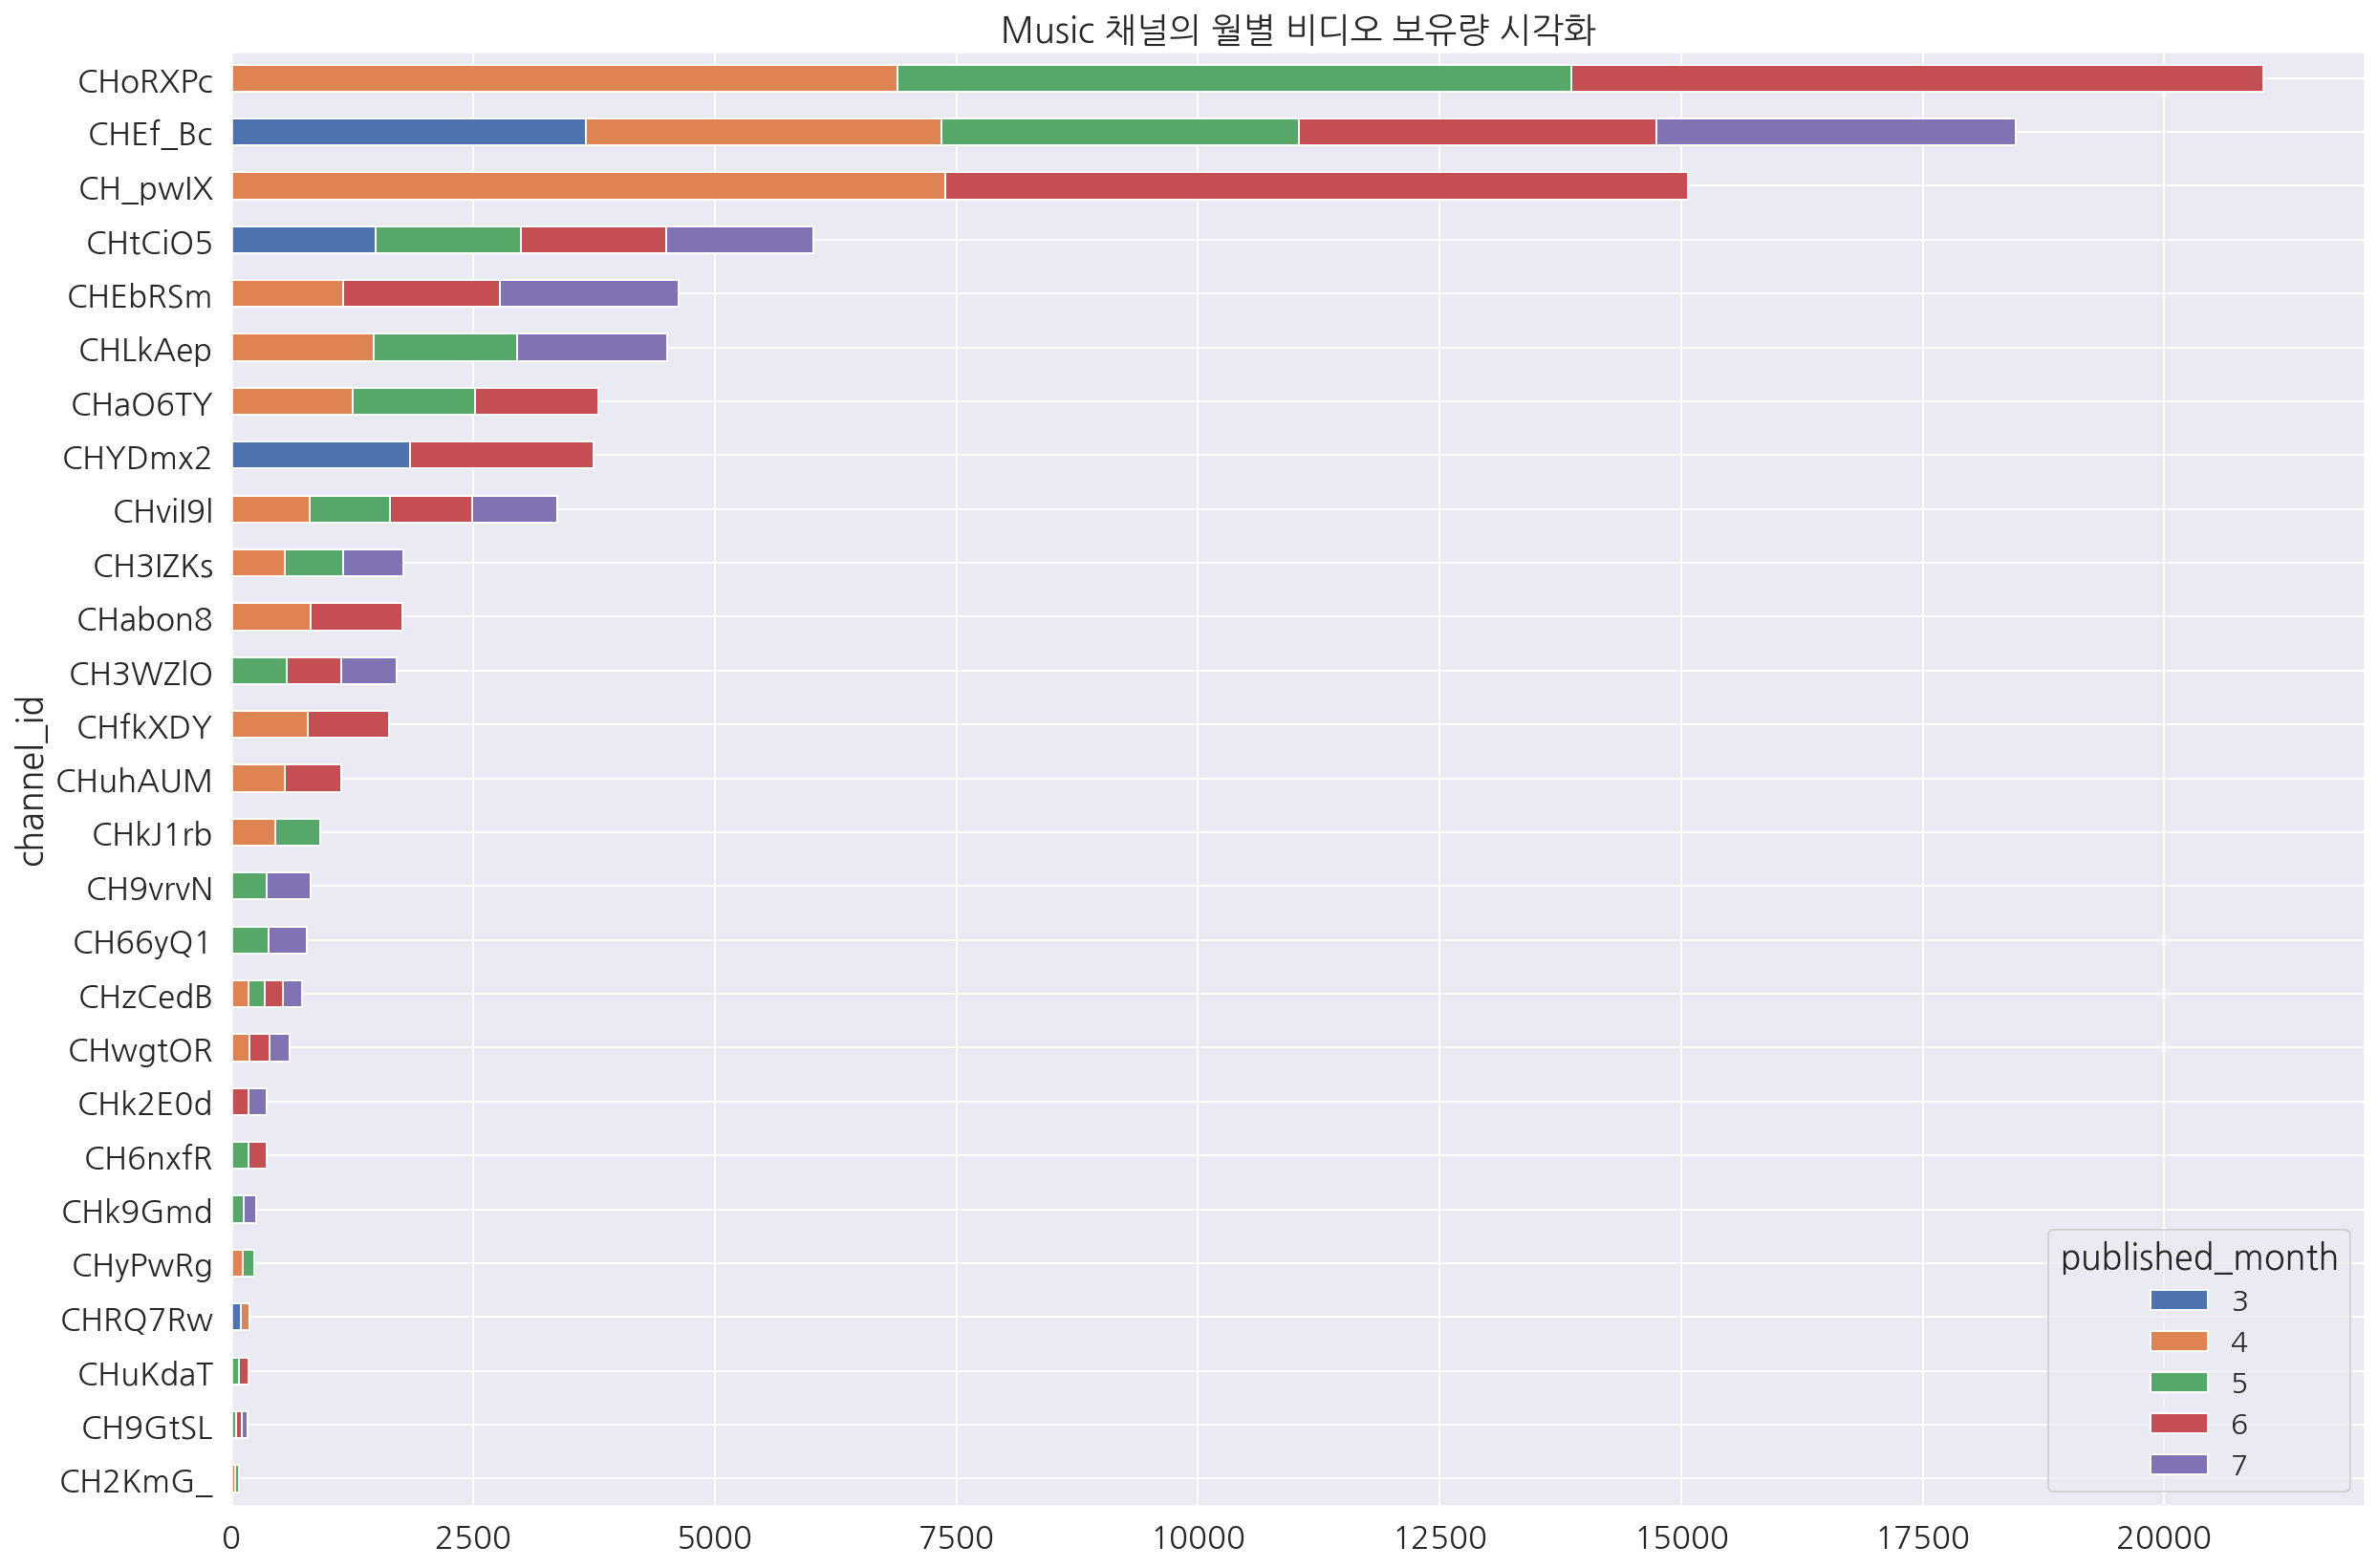

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot data in stack manner of bar type
ax = Music_loc[[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[2]} 채널의 월별 비디오 보유량 시각화", figsize =(20,14))
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

plt.show();

비디오 보유량 순으로 잘라서 보겠습니다.

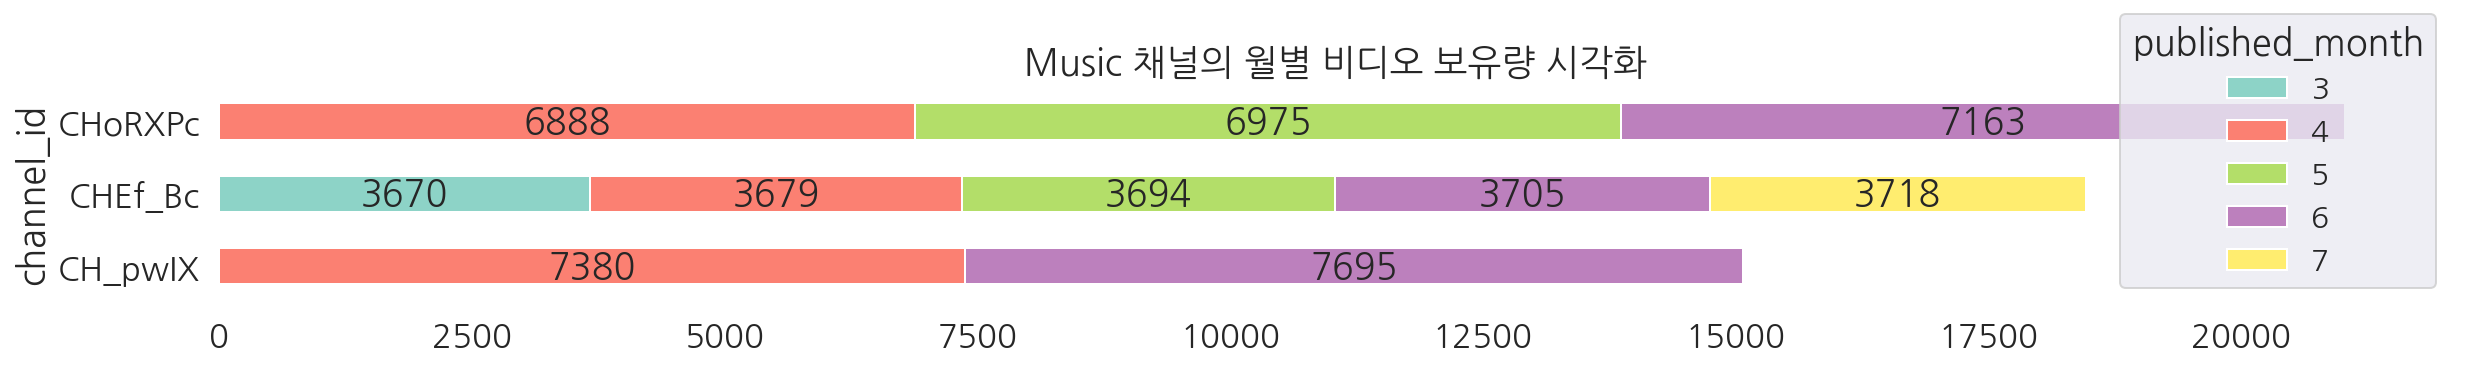

In [ ]:
# plot data in stack manner of bar type
ax = Music_loc[(Music_loc['sum']>7500)][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[2]} 채널의 월별 비디오 보유량 시각화", figsize =(20,2), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

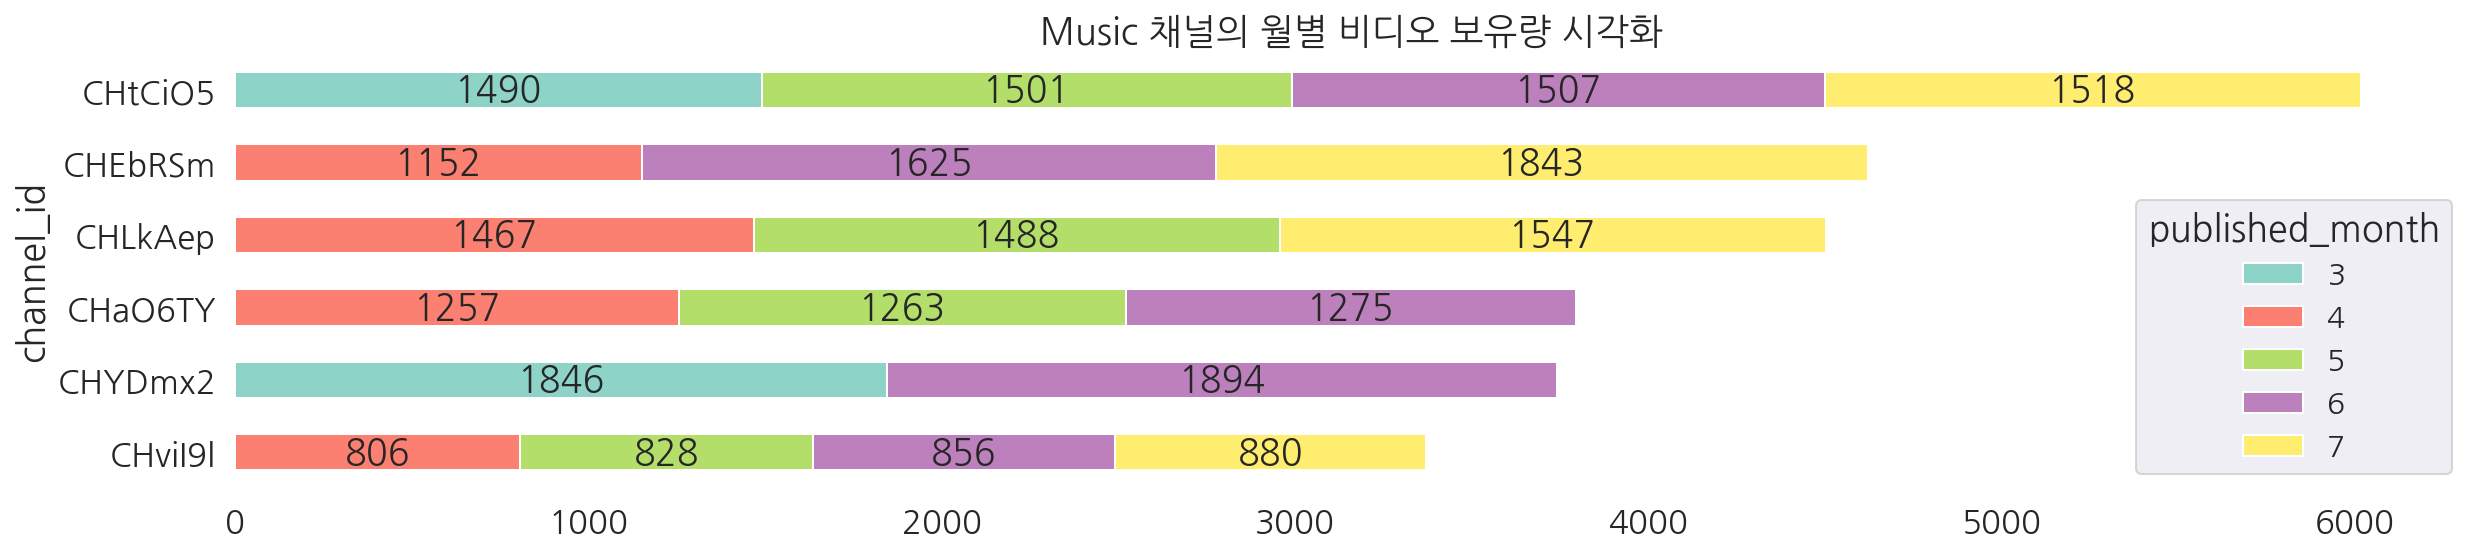

In [ ]:
# plot data in stack manner of bar type
ax = Music_loc[(Music_loc['sum']>=2500)&(Music_loc['sum']<7500)][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[2]} 채널의 월별 비디오 보유량 시각화", figsize =(20,4), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

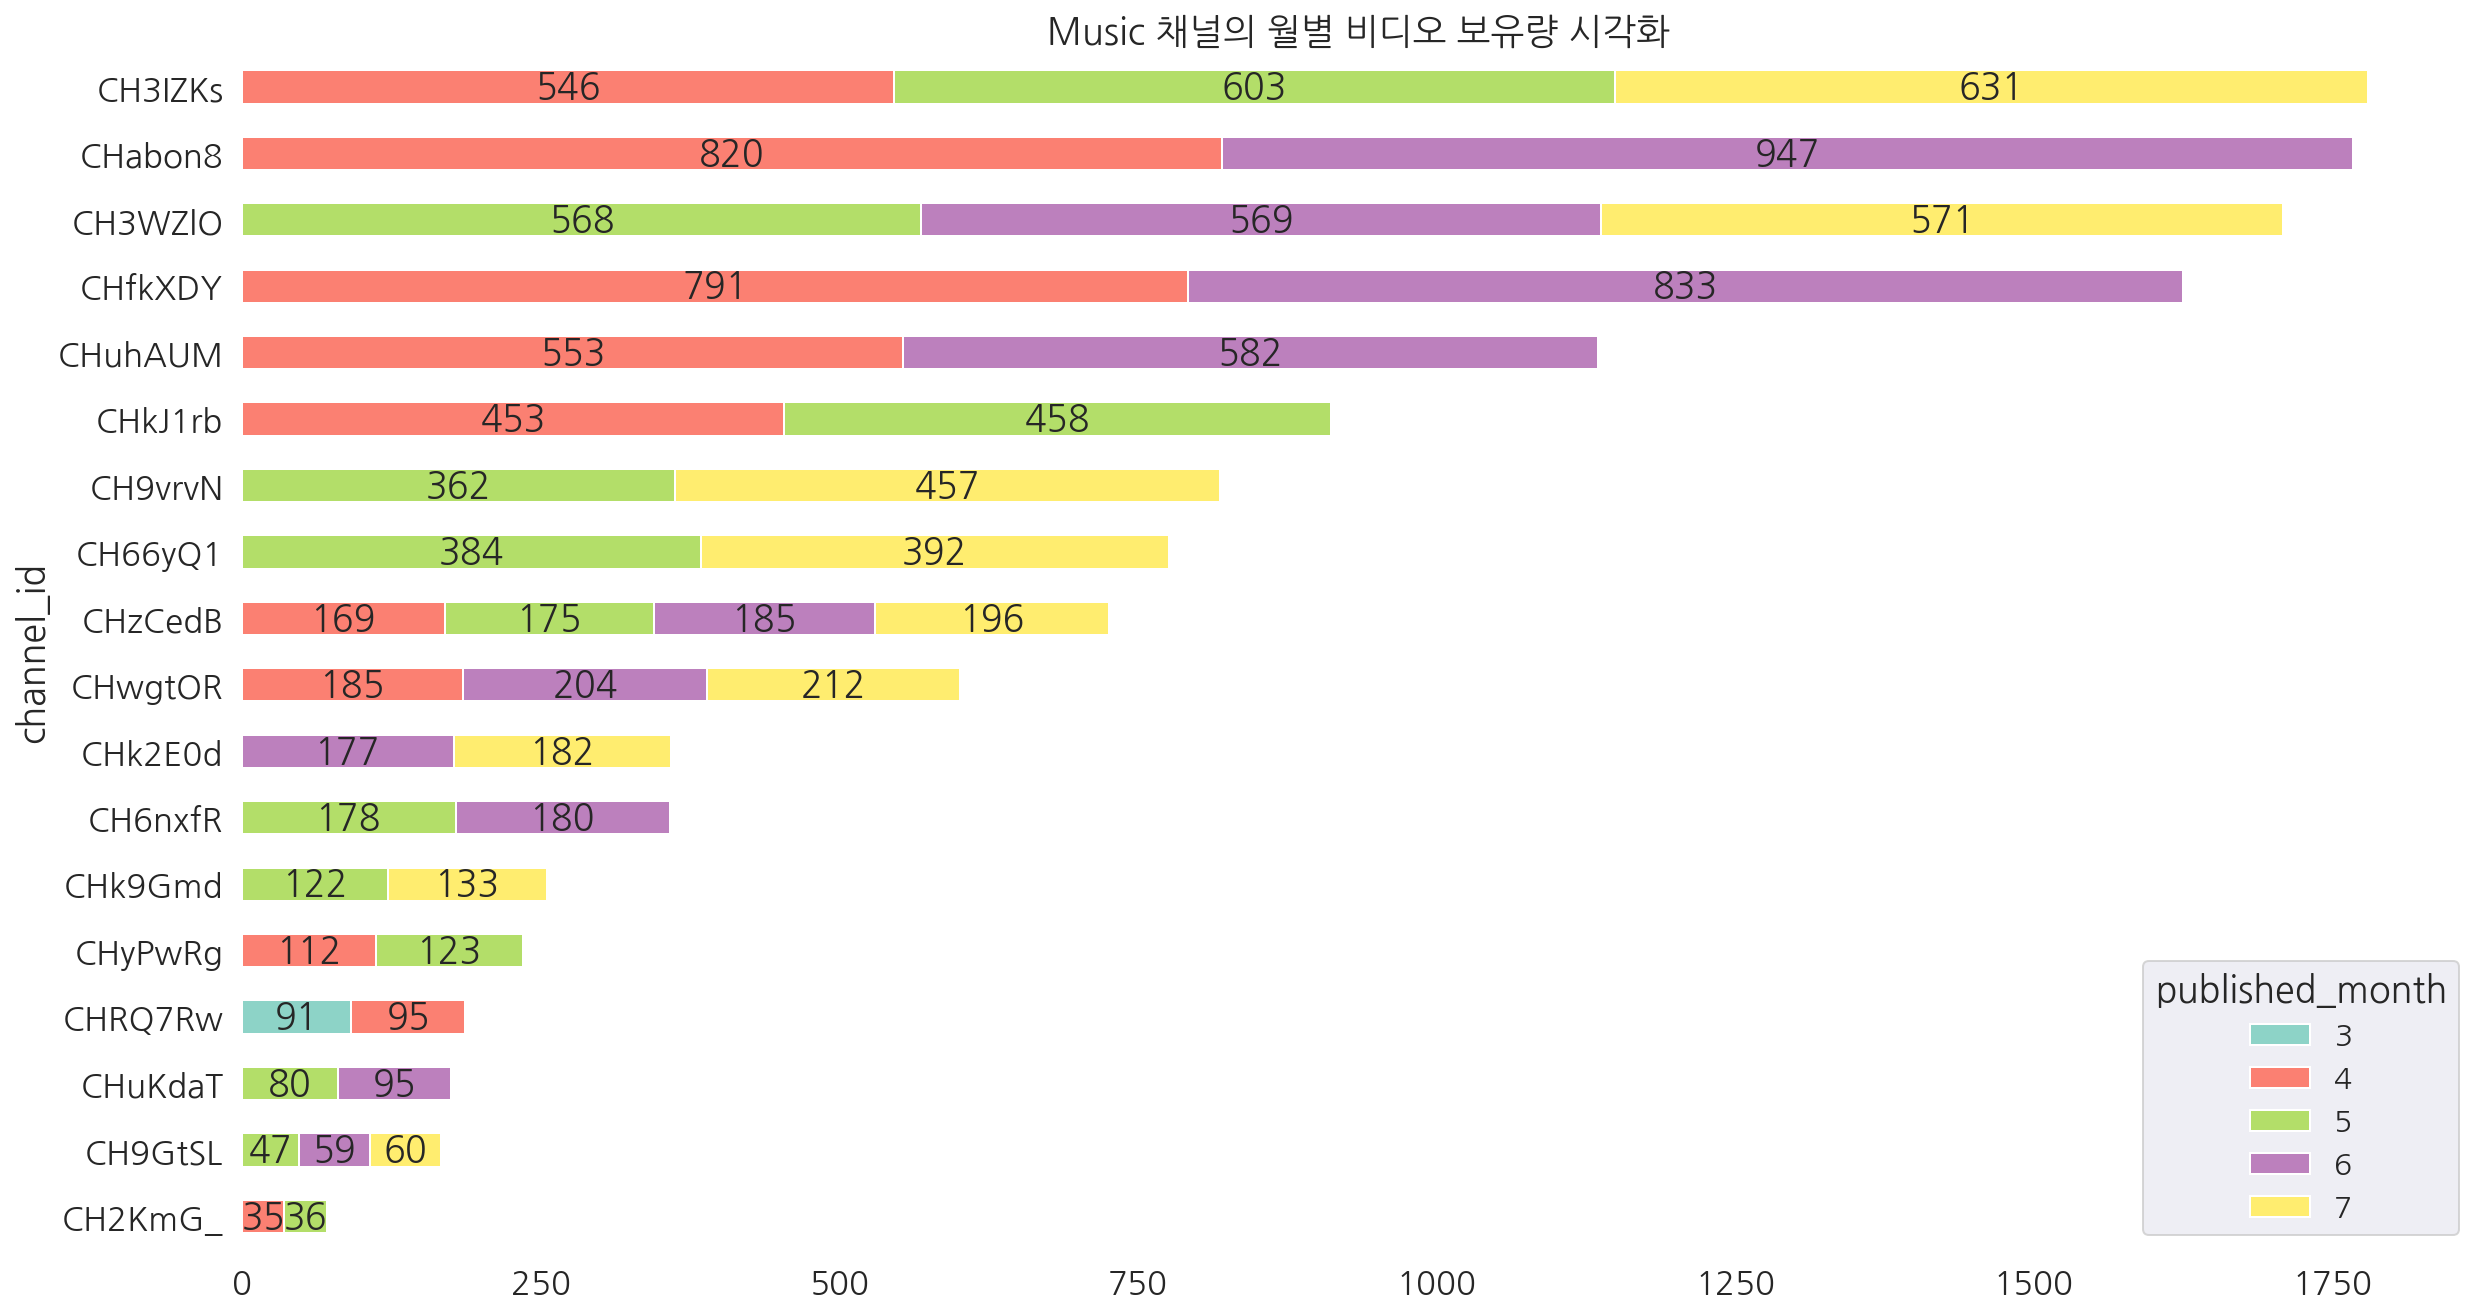

In [ ]:
# plot data in stack manner of bar type
ax = Music_loc[Music_loc['sum']<2500][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[2]} 채널의 월별 비디오 보유량 시각화", figsize =(20,11), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

### 3.Sports

In [ ]:
category[3]

'Sports'

In [ ]:
# Sports	카테고리만 추출
Sports = month_df[month_df['category_name']==category[3]]
Sports_df = Sports['on_channel_total_videos'].groupby([Sports['channel_id'], Sports['published_month']]).mean().unstack('published_month')

In [ ]:
# Sports카테고리에 속한 'channel_id'의 개수
Sports['channel_id'].unique().shape

(66,)

Sports 카테고리에서 채널별로 월별 비디오 보유량을 봅시다.

In [ ]:
Sports_df

published_month      3        4        5             6        7
channel_id                                                     
CH218FQ            NaN      NaN      NaN      2.333333      9.0
CH2qVOO          337.0    354.0    408.0    412.000000      NaN
CH3GEDF            NaN    169.0      NaN           NaN      NaN
CH4_uws            NaN    108.0      NaN           NaN      NaN
CH4yq3F            NaN      NaN      NaN    296.000000      NaN
...                ...      ...      ...           ...      ...
CHtctOX            NaN      NaN      NaN    196.500000      NaN
CHtm_Qo            NaN  40544.6  39377.5  39672.000000  39840.5
CHtybqq            NaN      NaN      NaN    123.666667      NaN
CHunsfa            NaN     11.0     20.2     60.000000     69.0
CHvMwK5            NaN      NaN      NaN    106.500000      NaN

[66 rows x 5 columns]

66개의 channel_id를 모두 시각화하기에는 너무 많습니다. 



In [ ]:
Sports_df['sum'] = Sports_df.T.sum()

In [ ]:
# 2개월 이상 채택된 채널수
li_index = []
for i in range(len(Sports_df)):
  if Sports_df.iloc[i].isnull().sum() <=3 : 
    li_index.append(Sports_df.index[i])
len(li_index)

30

In [ ]:
# 3개월 이상 채택된 채널수
li_index = []
for i in range(len(Sports_df)):
  if Sports_df.iloc[i].isnull().sum() <=2 : 
    li_index.append(Sports_df.index[i])
len(li_index)

16

3,4,5,6,7월 중 결측값이 4개 이상인 채널을 제외하고 5개월 중 2개월 이상 선정된 채널 30개의 channel_id만 추출합니다. 

In [ ]:
Sports_loc = Sports_df.loc[li_index].sort_values('sum')

In [ ]:
Sports_loc

published_month      3              4         5              6         7  \
channel_id                                                                 
CHhg51l            NaN       4.500000       NaN      14.500000      18.0   
CHgp0KT            NaN       3.500000       5.0      14.000000      17.0   
CHunsfa            NaN      11.000000      20.2      60.000000      69.0   
CHc7o0O            NaN      81.500000       NaN      97.000000      98.0   
CHhb4gt            NaN     123.666667     138.0            NaN     141.0   
CHUQVGX            NaN     190.000000     218.0     225.500000     271.0   
CHdhukF            NaN            NaN     282.0     307.333333     334.0   
CHkFGfv            NaN     266.000000     270.5     316.000000     323.5   
CH2qVOO          337.0     354.000000     408.0     412.000000       NaN   
CHQ4eZw            NaN     638.000000       NaN     667.000000     684.0   
CHdTDdy            NaN     666.000000     679.5     692.666667       NaN   
CHZeHMS            NaN    2025.000000    2081.0    2142.000000       NaN   
CHqsKWT            NaN    2306.000000    2417.0    2542.500000    2738.0   
CHnXNuk            NaN    5630.000000    5772.0    6249.000000    6494.5   
CHtm_Qo            NaN   40544.600000   39377.5   39672.000000   39840.5   
CHoLrcj            NaN  280031.000000  280770.0  281313.000000  281748.0   

published_month           sum  
channel_id                     
CHhg51l          3.700000e+01  
CHgp0KT          3.950000e+01  
CHunsfa          1.602000e+02  
CHc7o0O          2.765000e+02  
CHhb4gt          4.026667e+02  
CHUQVGX          9.045000e+02  
CHdhukF          9.233333e+02  
CHkFGfv          1.176000e+03  
CH2qVOO          1.511000e+03  
CHQ4eZw          1.989000e+03  
CHdTDdy          2.038167e+03  
CHZeHMS          6.248000e+03  
CHqsKWT          1.000350e+04  
CHnXNuk          2.414550e+04  
CHtm_Qo          1.594346e+05  
CHoLrcj          1.123862e+06

Sports_loc에서 아웃라이어인 'CHtm_Qo', 'CHoLrcj'를 제외합니다.

In [ ]:
Sports_loc = Sports_loc.iloc[:-2]

In [ ]:
Sports_loc.shape

(14, 6)

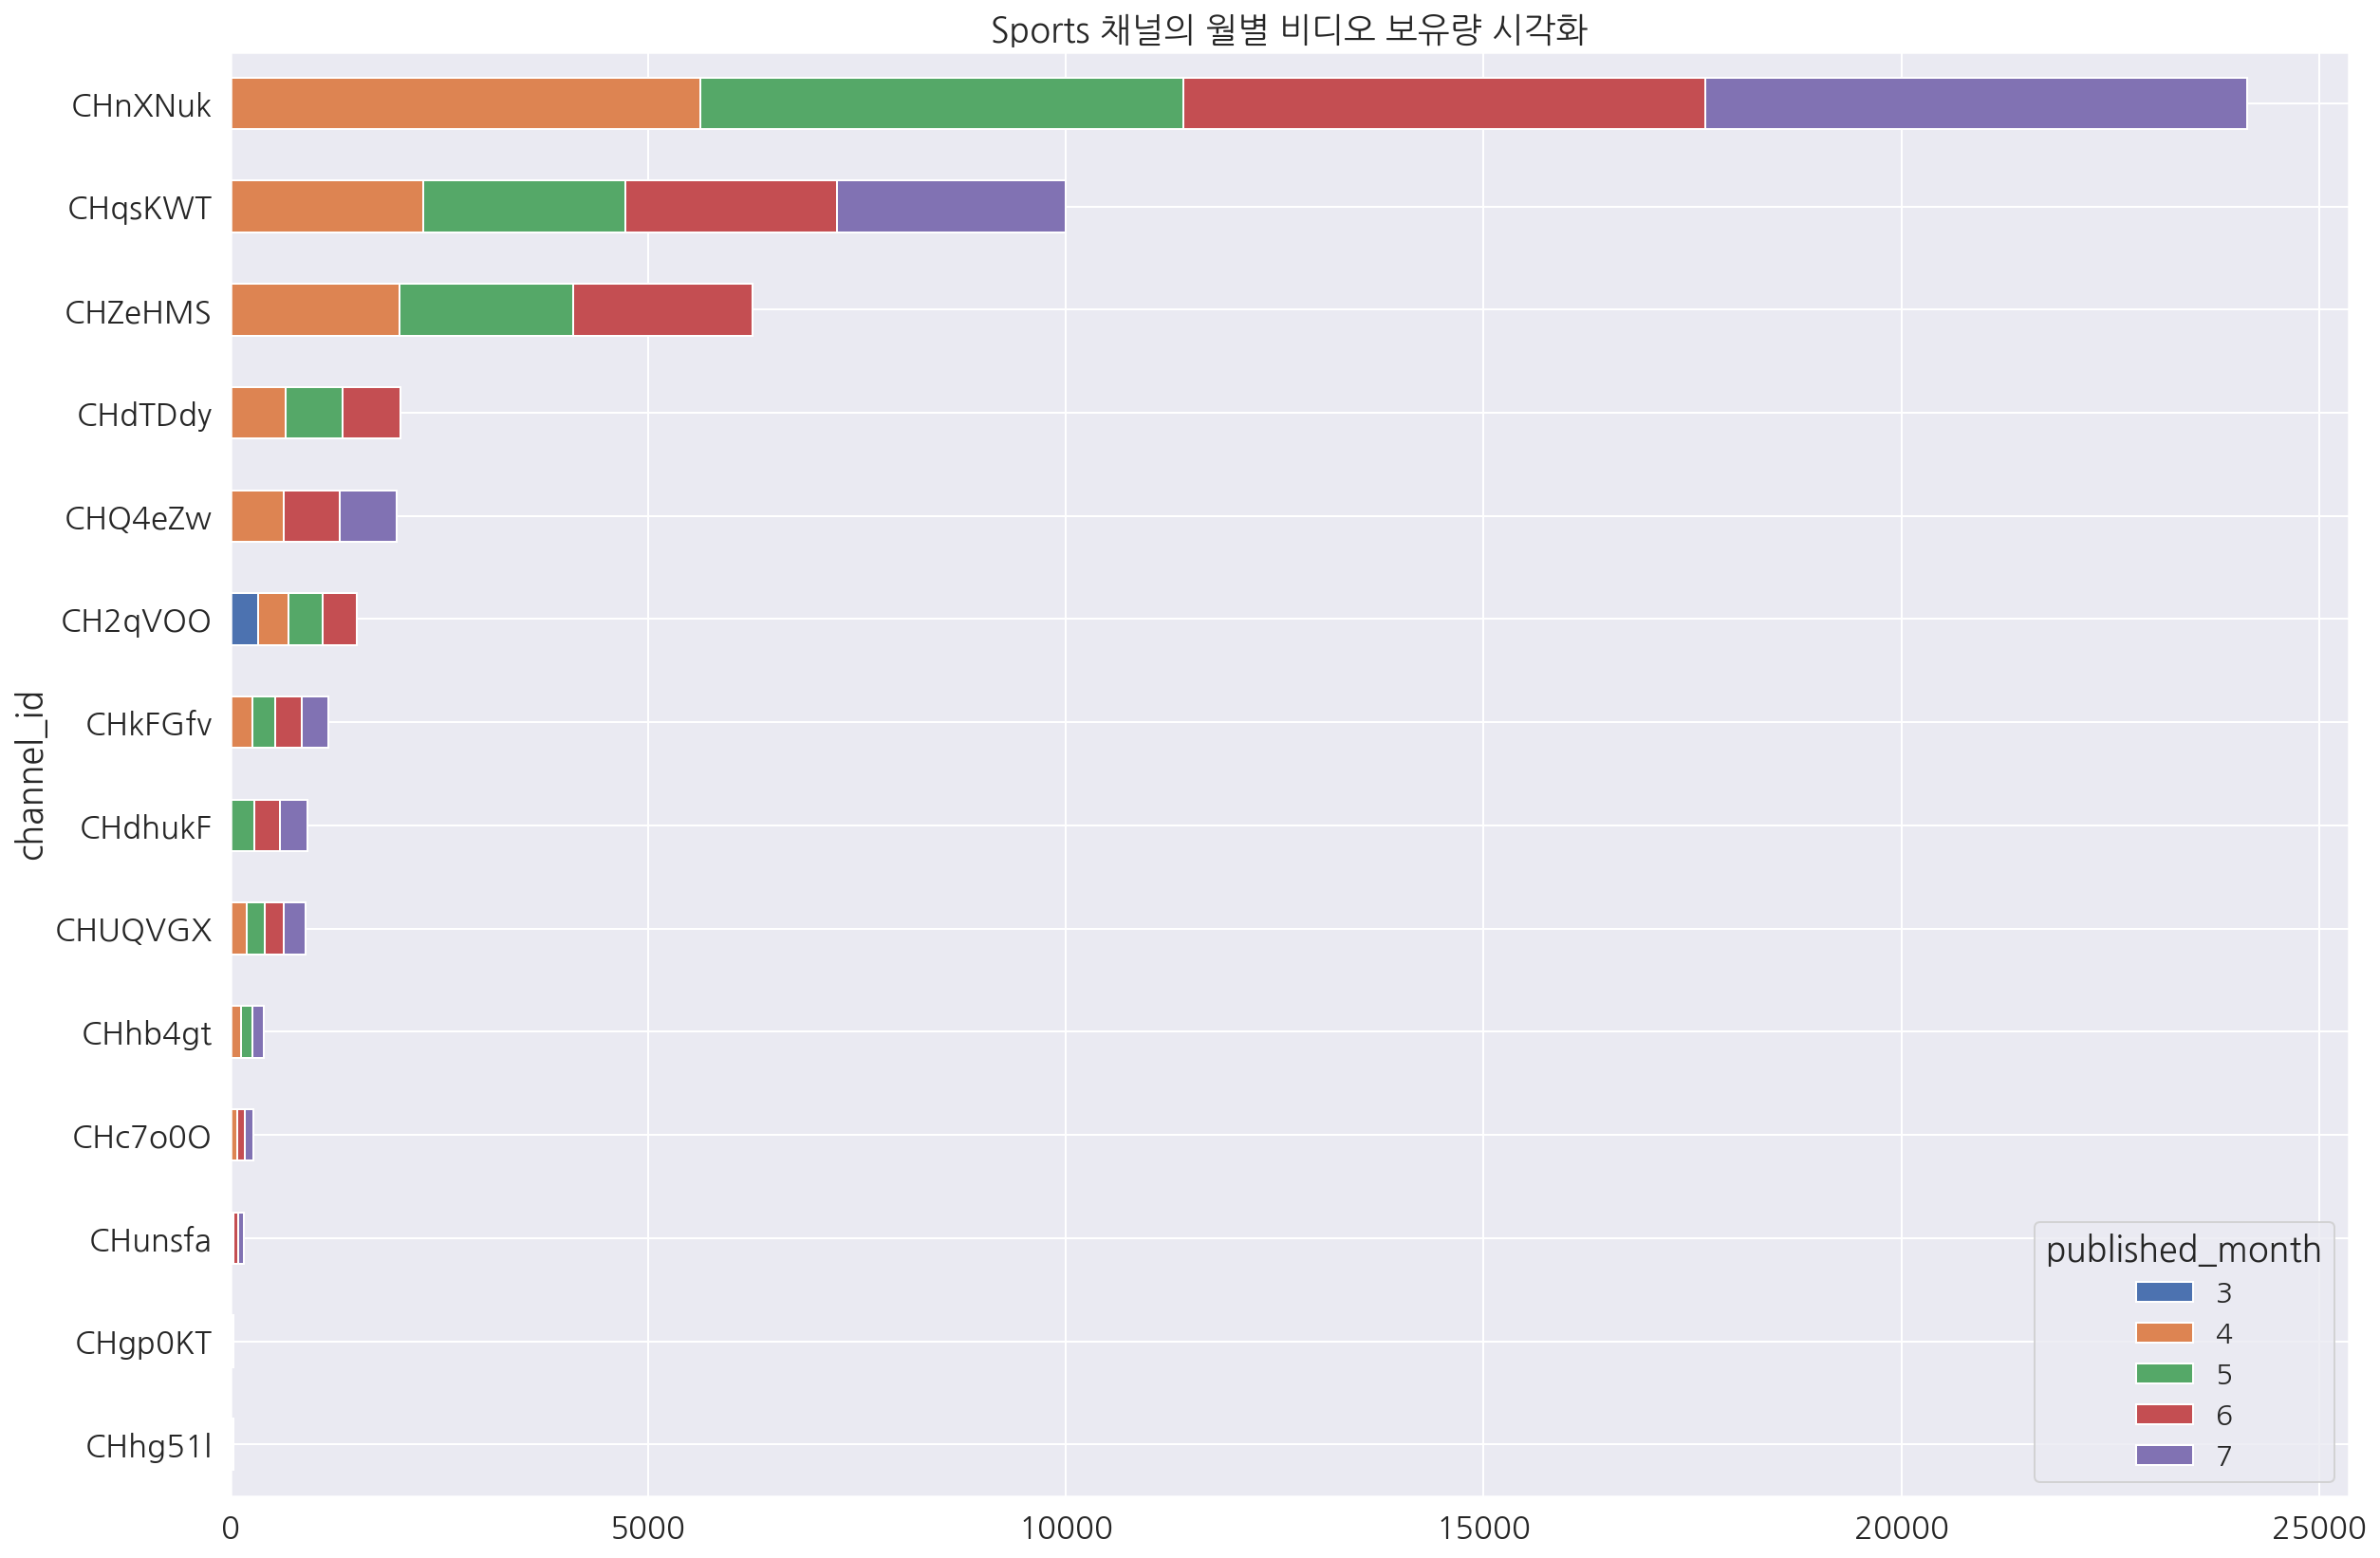

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot data in stack manner of bar type
ax = Sports_loc[[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[3]} 채널의 월별 비디오 보유량 시각화", figsize =(20,14))
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

plt.show();

비디오 보유량 순으로 잘라서 보겠습니다.

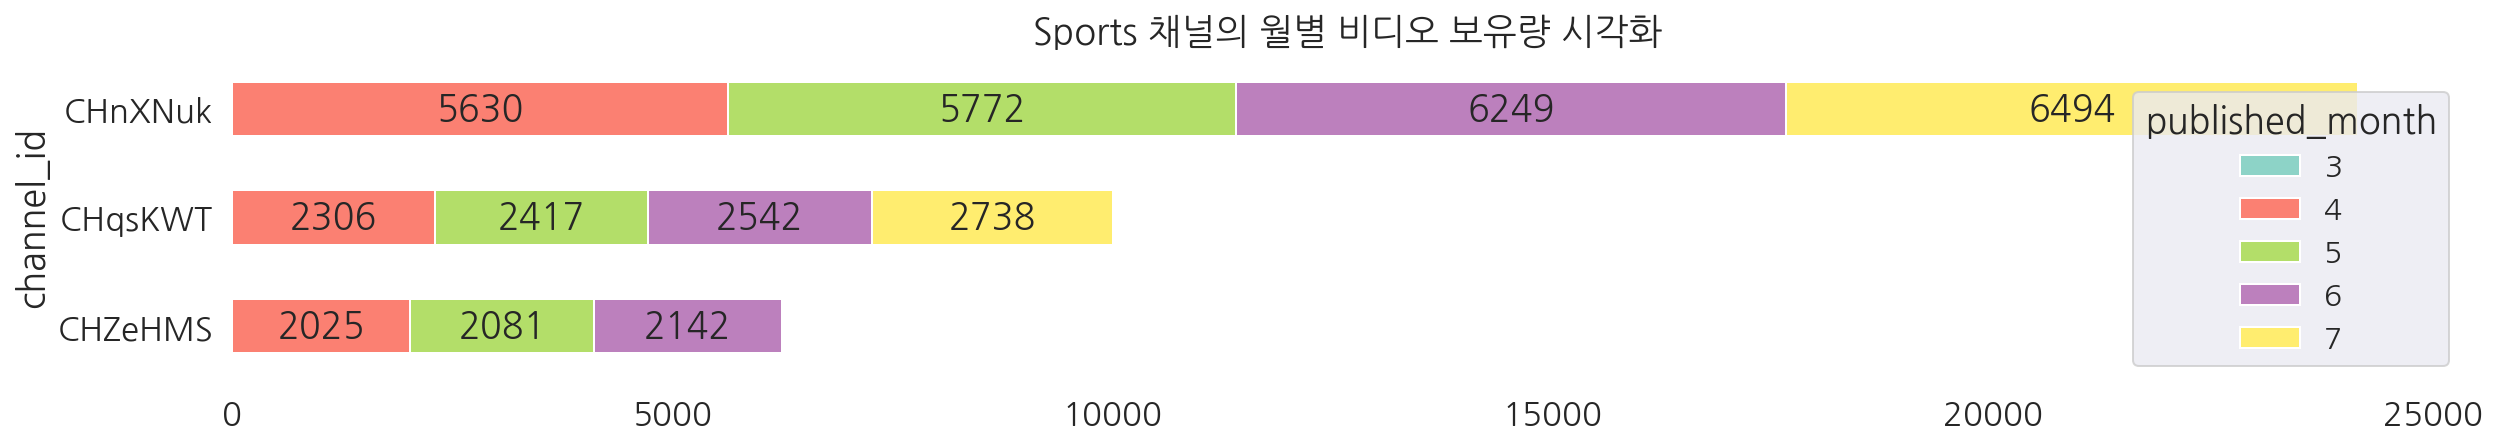

In [ ]:
# plot data in stack manner of bar type
ax = Sports_loc[(Sports_loc['sum']>5000)][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[3]} 채널의 월별 비디오 보유량 시각화", figsize =(20,3), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

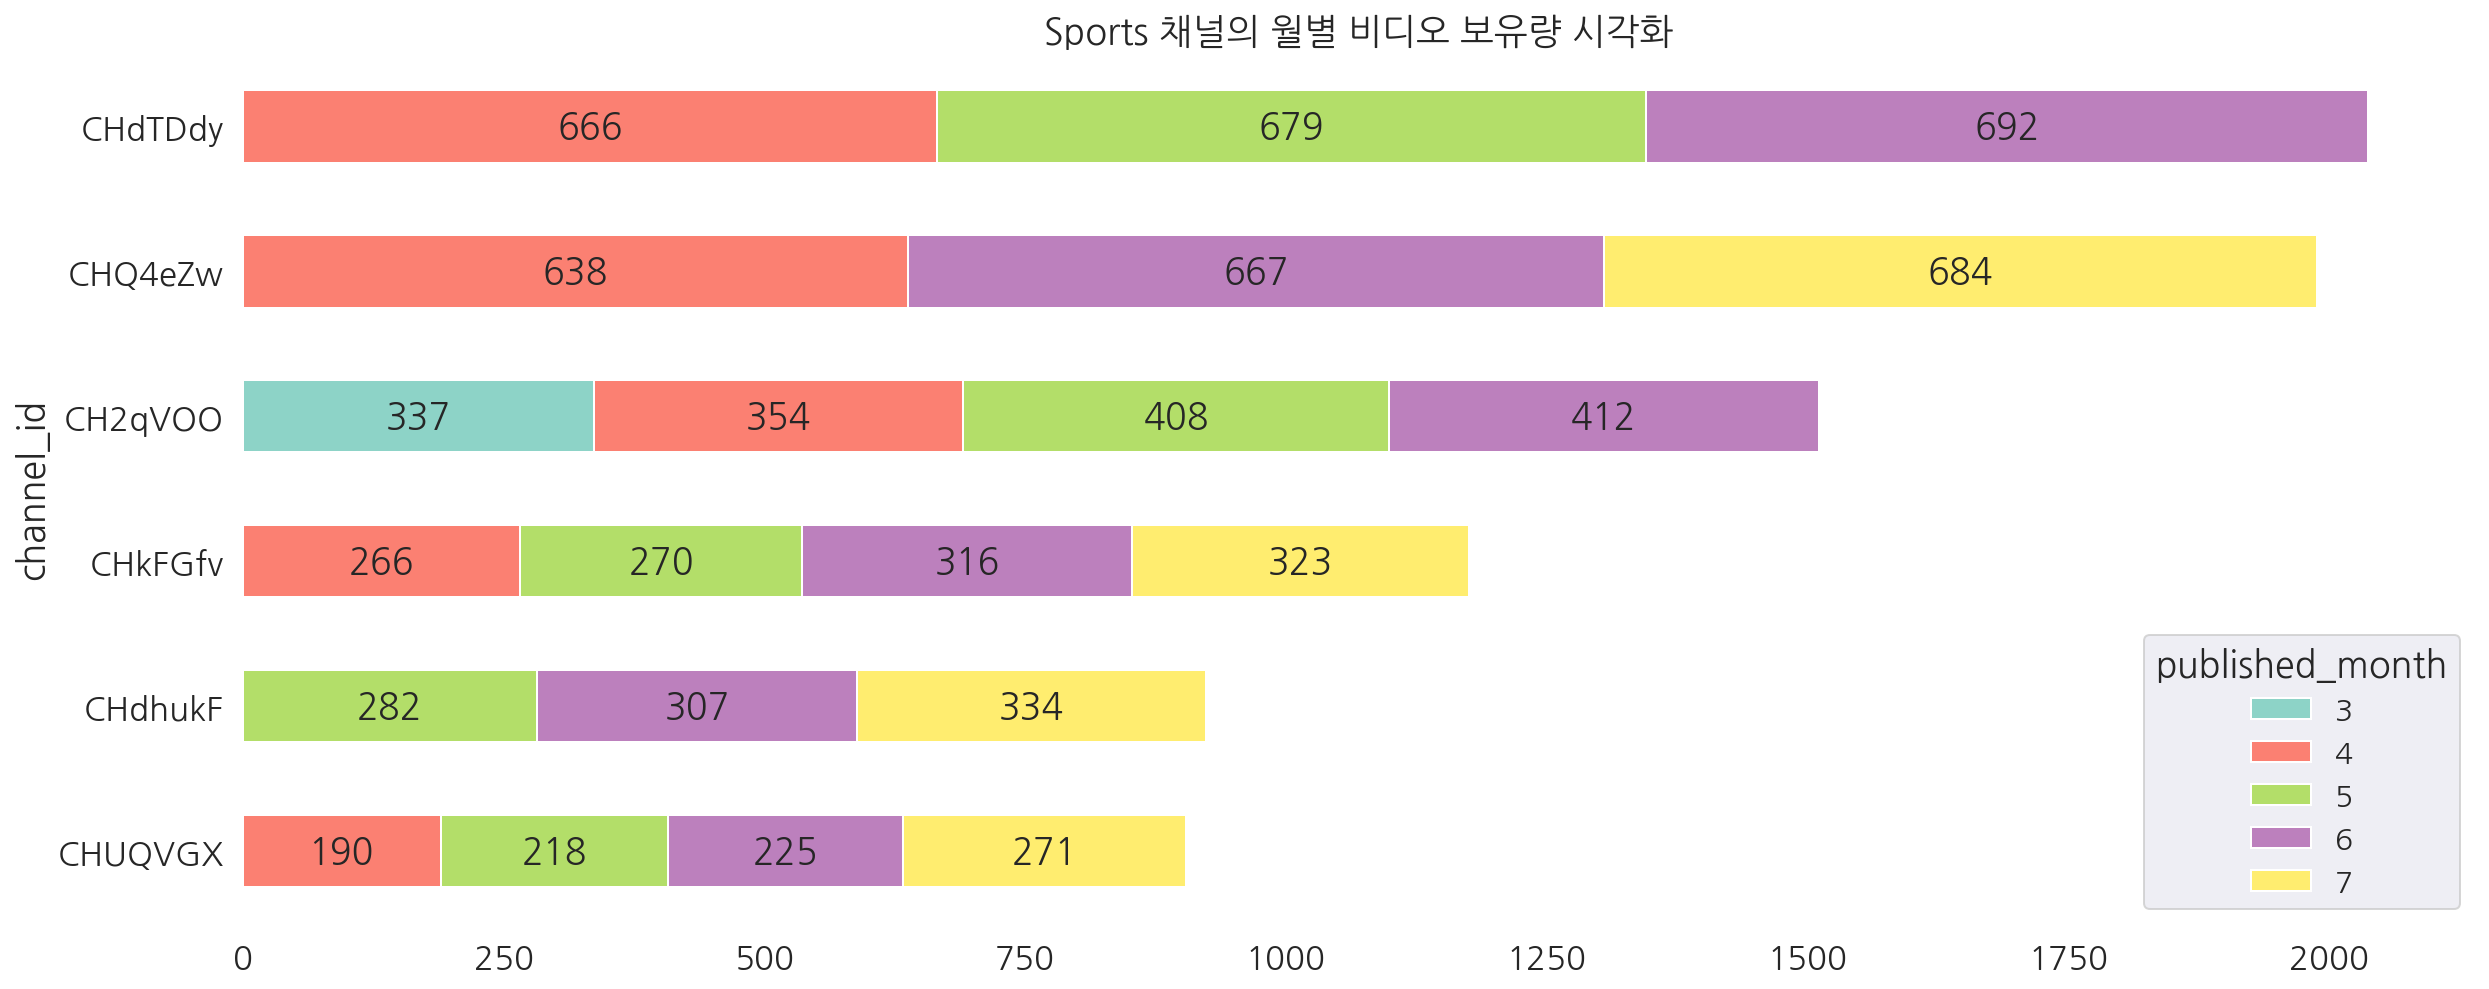

In [ ]:
# plot data in stack manner of bar type
ax = Sports_loc[(Sports_loc['sum']<=5000)&(Sports_loc['sum']>500)][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[3]} 채널의 월별 비디오 보유량 시각화", figsize =(20,8), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

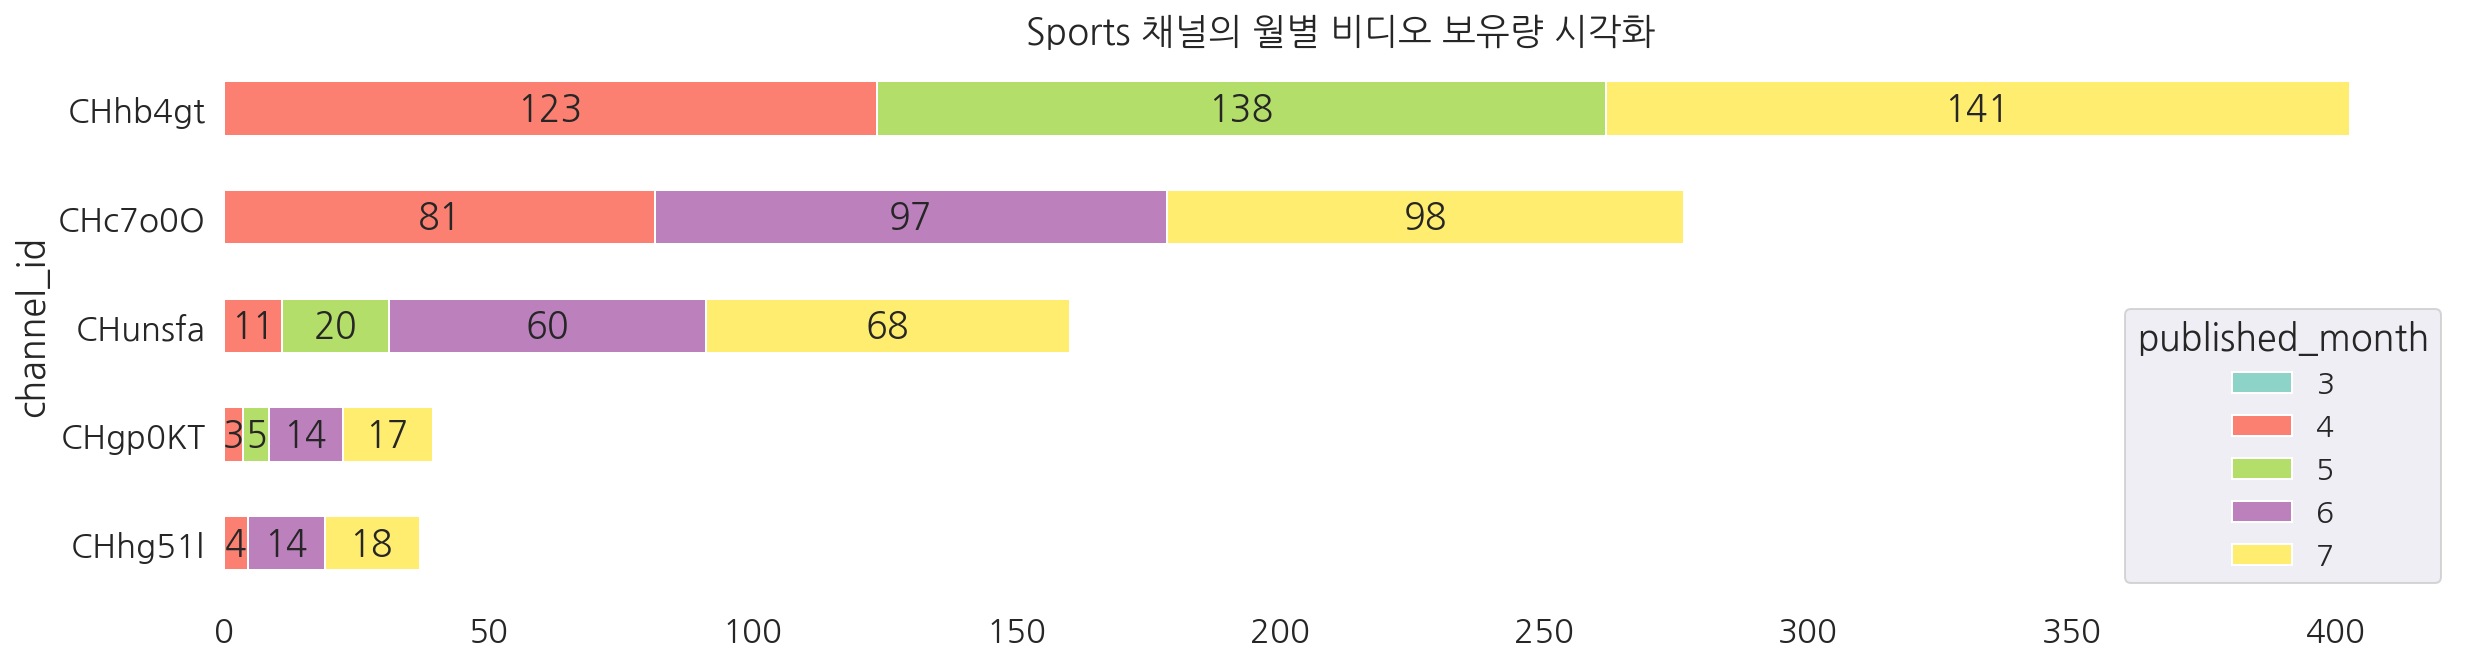

In [ ]:
# plot data in stack manner of bar type
ax = Sports_loc[(Sports_loc['sum']<=500)][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[3]} 채널의 월별 비디오 보유량 시각화", figsize =(20,5), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

### 4.Comedy

In [ ]:
category[4]

'Comedy'

In [ ]:
# Comedy	카테고리만 추출
Comedy = month_df[month_df['category_name']==category[4]]
Comedy_df = Comedy['on_channel_total_videos'].groupby([Comedy['channel_id'], Comedy['published_month']]).mean().unstack('published_month')

In [ ]:
# Comedy카테고리에 속한 'channel_id'의 개수
Comedy['channel_id'].unique().shape

(50,)

Comedy 카테고리에서 채널별로 월별 비디오 보유량을 봅시다.

In [ ]:
Comedy_df

published_month      3            4            5           6            7
channel_id                                                               
CH0SoPw            NaN    59.000000          NaN         NaN          NaN
CH20WKI            NaN     4.750000          NaN         NaN          NaN
CH2o_y8            NaN   248.000000          NaN         NaN          NaN
CH69uMh            NaN          NaN  7659.000000         NaN          NaN
CH6KwCU            NaN          NaN   192.000000  201.000000          NaN
CH8-Th8            NaN          NaN          NaN         NaN  6878.000000
CH9ZLv1            NaN   402.000000          NaN  419.666667          NaN
CH9nFMA            NaN   715.000000   740.000000  745.000000   762.000000
CHCjJV_            NaN          NaN          NaN  672.000000          NaN
CHD2YO_            NaN          NaN   337.000000         NaN          NaN
CHDCAyS            NaN          NaN          NaN         NaN   234.000000
CHEUL40          281.0   285.000000   297.500000         NaN          NaN
CHGX5sP            NaN   277.666667   299.000000  330.500000   339.000000
CHIuFnJ            NaN   240.500000          NaN         NaN          NaN
CHJpGg1            NaN   176.000000          NaN         NaN          NaN
CHK3p1w            NaN    54.000000    55.000000         NaN          NaN
CHMVC92            NaN          NaN          NaN         NaN  2497.000000
CHN8CPz            NaN          NaN          NaN  412.500000   420.000000
CHPwGQu            NaN    32.500000          NaN         NaN          NaN
CHQmu3U            NaN          NaN   164.000000         NaN          NaN
CHR-qpX            NaN    47.500000    68.000000   70.500000          NaN
CHRykAt            NaN   347.000000   355.000000  367.000000          NaN
CHSc2Dc            NaN    56.333333    71.000000         NaN    95.000000
CHV3i3l          310.0          NaN   332.000000         NaN          NaN
CHVsBCf            NaN   192.000000          NaN  208.000000          NaN
CHYACix            NaN          NaN          NaN  559.000000          NaN
CHZ0dIs            NaN    33.500000    35.500000   37.000000    39.750000
CH_gaUd            NaN          NaN   177.000000         NaN          NaN
CHbGXAe            NaN          NaN   232.000000         NaN          NaN
CHd-Sfb            NaN          NaN  2275.000000         NaN          NaN
CHe9f9M            NaN   135.000000   137.000000         NaN          NaN
CHfU6o0            NaN          NaN   501.000000         NaN          NaN
CHg-p3l            NaN   418.333333   421.000000  424.500000   427.500000
CHg8U-Z            NaN    87.000000          NaN         NaN          NaN
CHgBLs7          138.0   141.000000   155.000000         NaN          NaN
CHghP93            NaN   288.000000          NaN  299.000000          NaN
CHhbE5O            NaN   340.500000   349.500000  354.000000   360.000000
CHhvXm5            NaN          NaN          NaN         NaN    14.333333
CHivkx6            NaN   289.000000          NaN         NaN          NaN
CHmCNgL            NaN          NaN  1624.000000         NaN          NaN
CHmHMsJ            NaN  1534.000000          NaN         NaN          NaN
CHmzMtX            NaN   623.833333   636.666667  648.000000   669.000000
CHoe_Vp            NaN          NaN   368.000000         NaN          NaN
CHqsPmf            NaN    91.333333    95.500000         NaN          NaN
CHr9-Mp            NaN          NaN          NaN  380.000000          NaN
CHsJ6Ru            NaN   800.000000   830.000000         NaN          NaN
CHt_UFh            NaN   317.666667   329.000000         NaN   348.000000
CHyCL5k          436.0   437.000000   449.000000  453.000000   460.333333
CHyh4ZG            NaN          NaN          NaN  118.000000          NaN
CHzjiRW            NaN          NaN          NaN  624.000000          NaN

50개의 channel_id를 모두 시각화하기에는 너무 많습니다. 



In [ ]:
Comedy_df['sum'] = Comedy_df.T.sum()

In [ ]:
# 2개월 이상 채택된 채널수
li_index = []
for i in range(len(Comedy_df)):
  if Comedy_df.iloc[i].isnull().sum() <=3 : 
    li_index.append(Comedy_df.index[i])
len(li_index)

23

3,4,5,6,7월 중 결측값이 4개 이상인 채널을 제외하고 5개월 중 2개월 이상 선정된 채널 23개의 channel_id만 추출합니다. 

In [ ]:
Comedy_loc = Comedy_df.loc[li_index].sort_values('sum')

In [ ]:
Comedy_loc

published_month      3           4           5           6           7  \
channel_id                                                               
CHK3p1w            NaN   54.000000   55.000000         NaN         NaN   
CHZ0dIs            NaN   33.500000   35.500000   37.000000   39.750000   
CHR-qpX            NaN   47.500000   68.000000   70.500000         NaN   
CHqsPmf            NaN   91.333333   95.500000         NaN         NaN   
CHSc2Dc            NaN   56.333333   71.000000         NaN   95.000000   
CHe9f9M            NaN  135.000000  137.000000         NaN         NaN   
CH6KwCU            NaN         NaN  192.000000  201.000000         NaN   
CHVsBCf            NaN  192.000000         NaN  208.000000         NaN   
CHgBLs7          138.0  141.000000  155.000000         NaN         NaN   
CHghP93            NaN  288.000000         NaN  299.000000         NaN   
CHV3i3l          310.0         NaN  332.000000         NaN         NaN   
CH9ZLv1            NaN  402.000000         NaN  419.666667         NaN   
CHN8CPz            NaN         NaN         NaN  412.500000  420.000000   
CHEUL40          281.0  285.000000  297.500000         NaN         NaN   
CHt_UFh            NaN  317.666667  329.000000         NaN  348.000000   
CHRykAt            NaN  347.000000  355.000000  367.000000         NaN   
CHGX5sP            NaN  277.666667  299.000000  330.500000  339.000000   
CHhbE5O            NaN  340.500000  349.500000  354.000000  360.000000   
CHsJ6Ru            NaN  800.000000  830.000000         NaN         NaN   
CHg-p3l            NaN  418.333333  421.000000  424.500000  427.500000   
CHyCL5k          436.0  437.000000  449.000000  453.000000  460.333333   
CHmzMtX            NaN  623.833333  636.666667  648.000000  669.000000   
CH9nFMA            NaN  715.000000  740.000000  745.000000  762.000000   

published_month          sum  
channel_id                    
CHK3p1w           109.000000  
CHZ0dIs           145.750000  
CHR-qpX           186.000000  
CHqsPmf           186.833333  
CHSc2Dc           222.333333  
CHe9f9M           272.000000  
CH6KwCU           393.000000  
CHVsBCf           400.000000  
CHgBLs7           434.000000  
CHghP93           587.000000  
CHV3i3l           642.000000  
CH9ZLv1           821.666667  
CHN8CPz           832.500000  
CHEUL40           863.500000  
CHt_UFh           994.666667  
CHRykAt          1069.000000  
CHGX5sP          1246.166667  
CHhbE5O          1404.000000  
CHsJ6Ru          1630.000000  
CHg-p3l          1691.333333  
CHyCL5k          2235.333333  
CHmzMtX          2577.500000  
CH9nFMA          2962.000000

특별한 아웃라이어는 보이지 않으므로 이대로 진행합니다.

In [ ]:
Comedy_loc.shape

(23, 6)

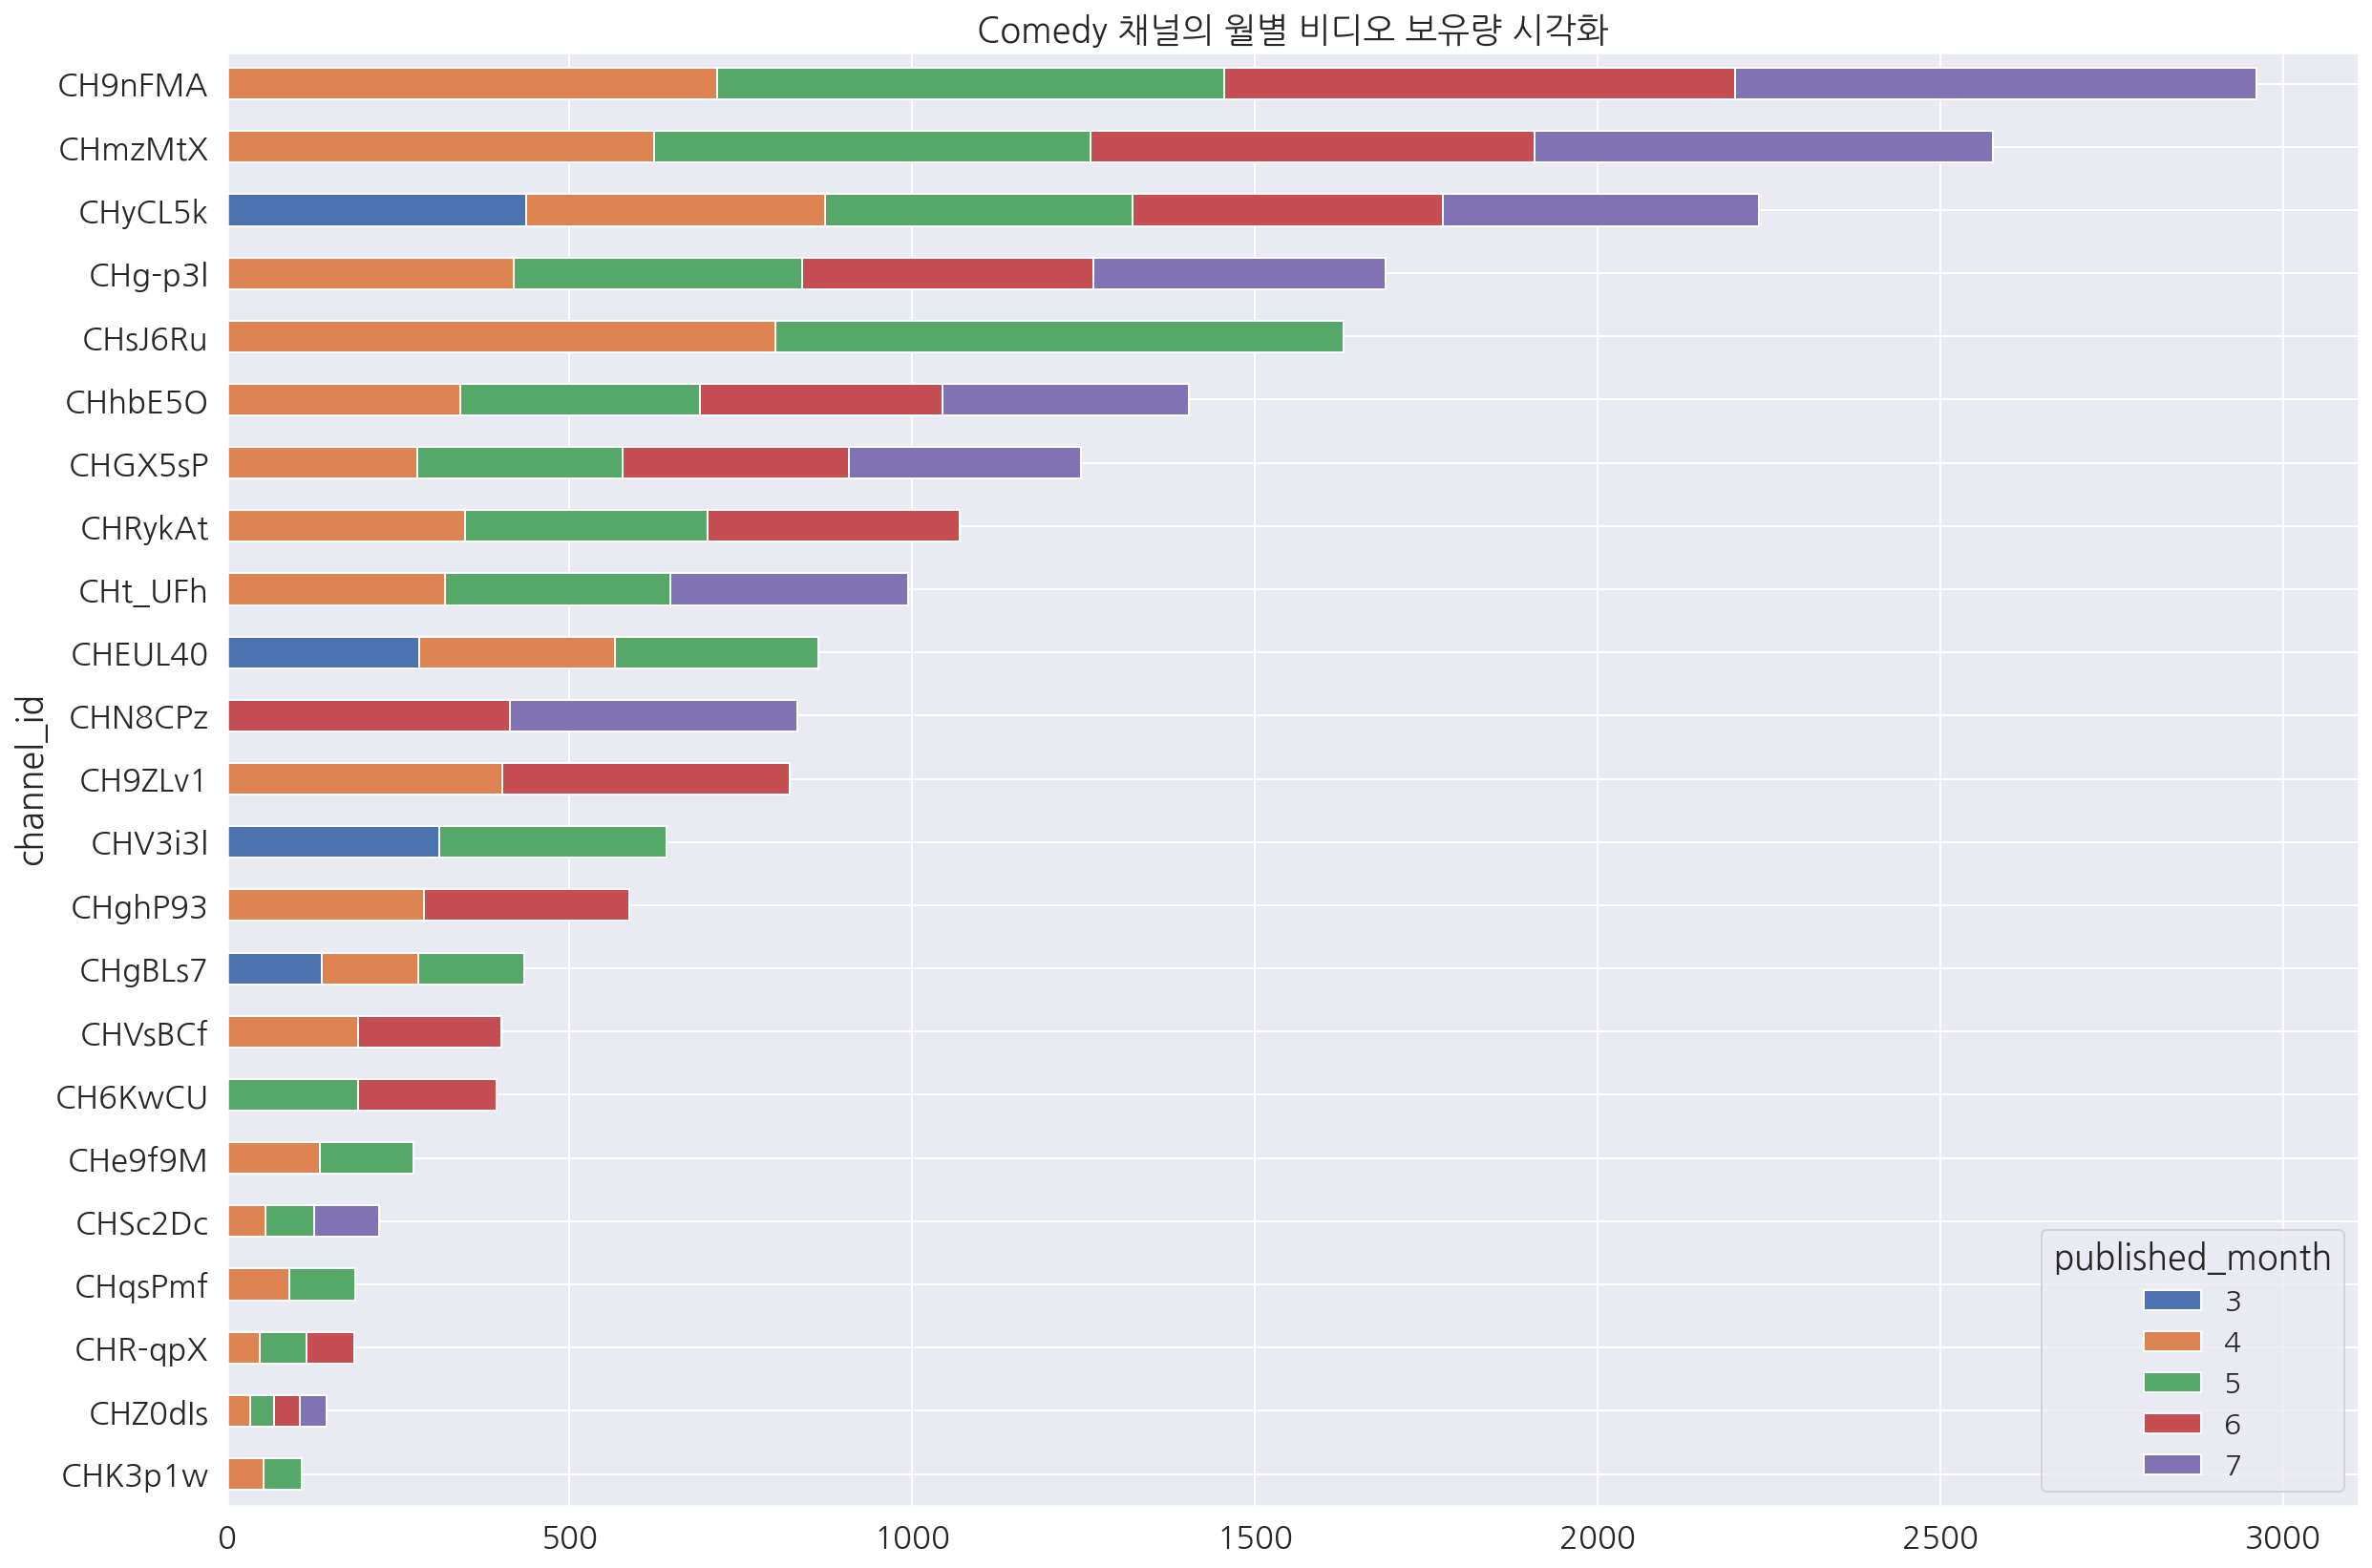

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot data in stack manner of bar type
ax = Comedy_loc[[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[4]} 채널의 월별 비디오 보유량 시각화", figsize =(20,14))
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

plt.show();

비디오 보유량 순으로 잘라서 보겠습니다.

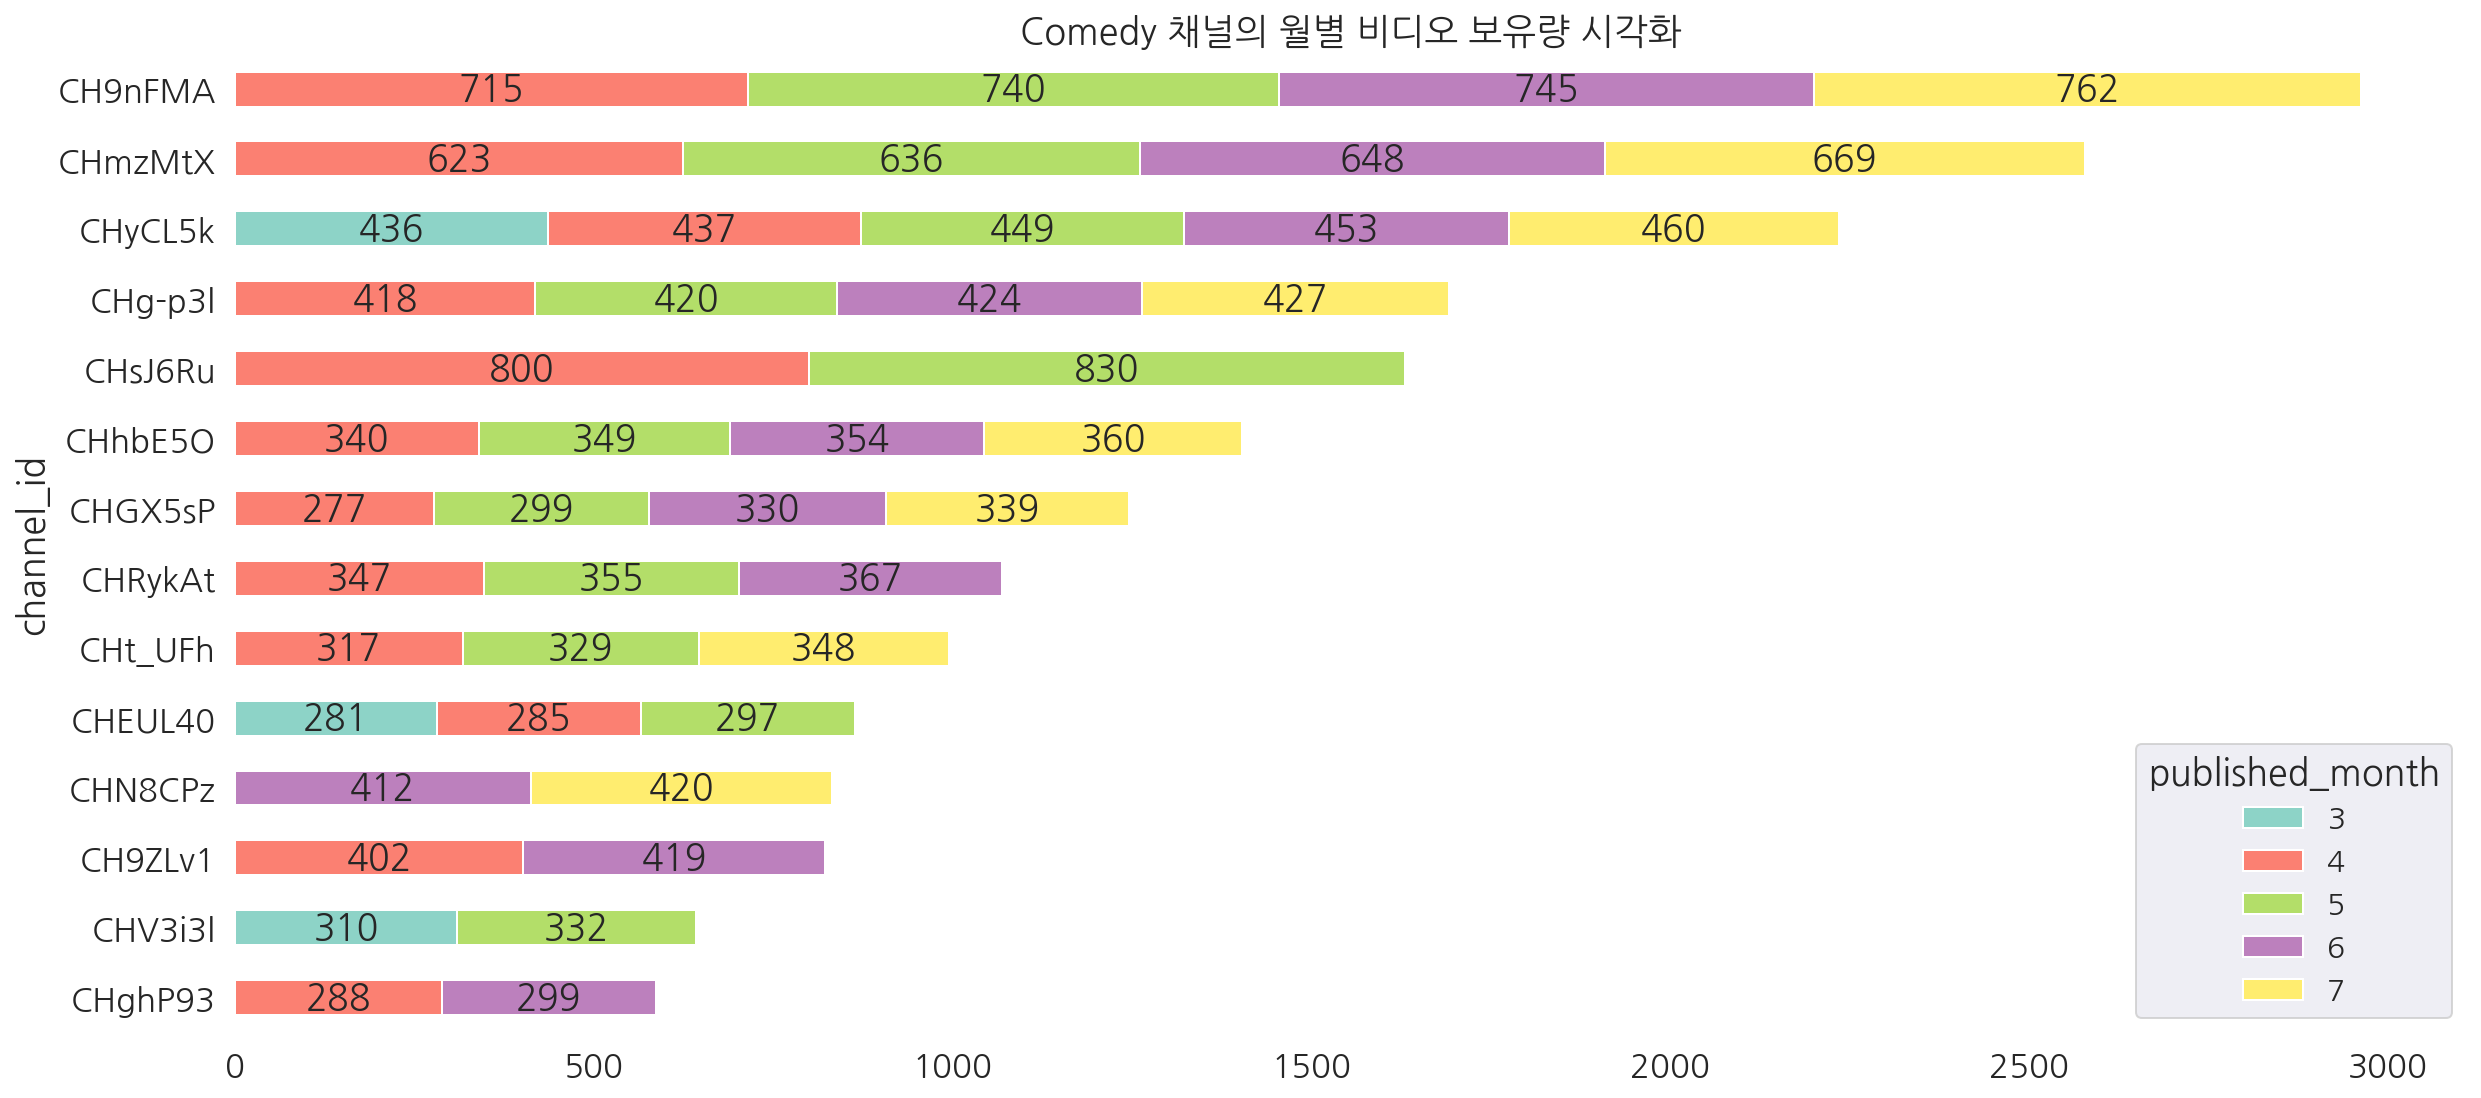

In [ ]:
# plot data in stack manner of bar type
ax = Comedy_loc[(Comedy_loc['sum']>500)][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[4]} 채널의 월별 비디오 보유량 시각화", figsize =(20,9), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

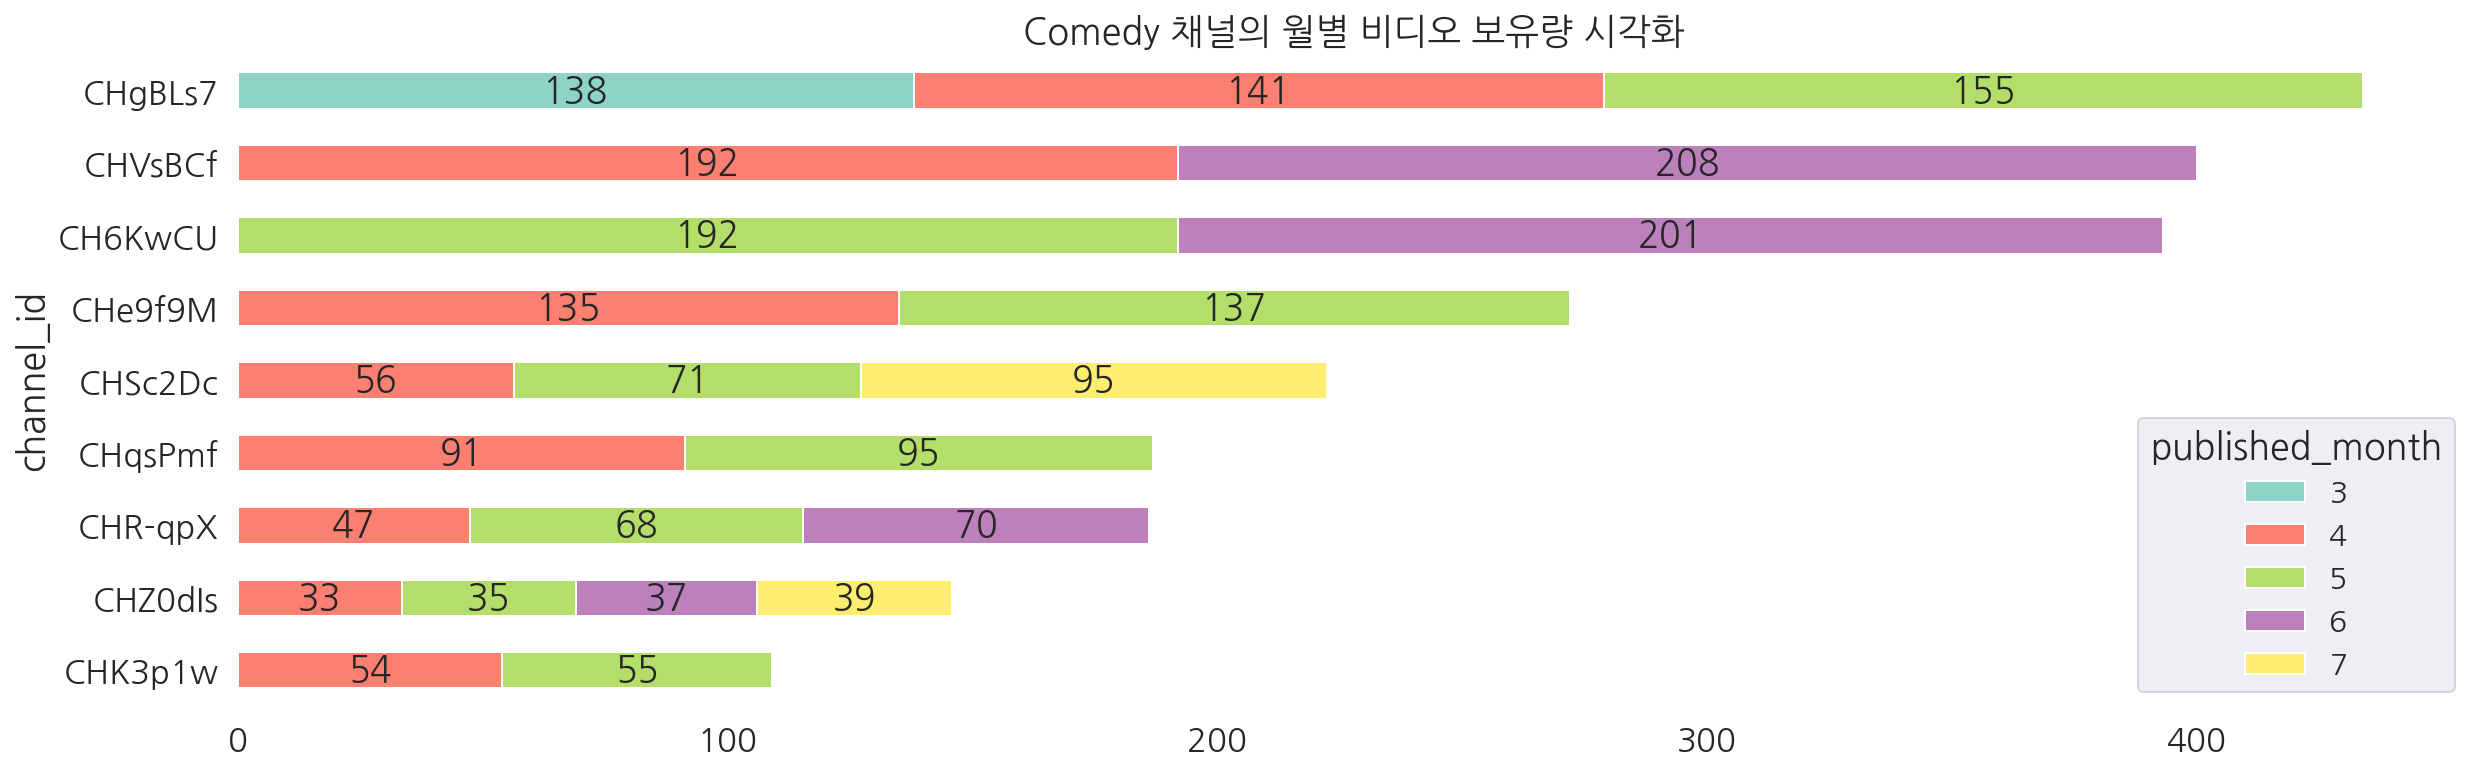

In [ ]:
# plot data in stack manner of bar type
ax = Comedy_loc[(Comedy_loc['sum']<=500)][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[4]} 채널의 월별 비디오 보유량 시각화", figsize =(20,6), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

### 5.News & Politics

In [ ]:
category[5]

'News & Politics'

In [ ]:
# News & Politics	카테고리만 추출
News = month_df[month_df['category_name']==category[5]]
News_df = News['on_channel_total_videos'].groupby([News['channel_id'], News['published_month']]).mean().unstack('published_month')

In [ ]:
# News & Politics 카테고리에 속한 'channel_id'의 개수
News['channel_id'].unique().shape

(56,)

56개의 channel_id를 모두 시각화하기에는 너무 많습니다. 



In [ ]:
News_df['sum'] = News_df.T.sum()

In [ ]:
# 2개월 이상 채택된 채널수
li_index = []
for i in range(len(News_df)):
  if News_df.iloc[i].isnull().sum() <=3 : 
    li_index.append(News_df.index[i])
len(li_index)

27

3,4,5,6,7월 중 결측값이 4개 이상인 채널을 제외하고 5개월 중 2개월 이상 선정된 채널 27개의 channel_id만 추출합니다. 

In [ ]:
News_loc = News_df.loc[li_index].sort_values('sum')

In [ ]:
News_loc

published_month         3              4              5         6  \
channel_id                                                          
CHIDOGT               NaN     249.333333     278.000000       NaN   
CHAySce               NaN     198.500000     226.666667     261.0   
CHy-6oZ               NaN            NaN            NaN     361.0   
CHMGn0N               NaN            NaN            NaN     521.0   
CHzz58-               NaN            NaN            NaN     738.0   
CH0imOR               NaN     837.000000            NaN       NaN   
CH_U34U             425.0     442.000000            NaN     476.5   
CHawCv9               NaN    1078.000000    1085.000000       NaN   
CH-0C8y               NaN     658.500000     666.000000     712.0   
CH1aS5C               NaN    1807.000000            NaN    1903.0   
CHQabOR               NaN            NaN    2403.000000    2416.0   
CHizGMt               NaN    3620.000000    3688.500000       NaN   
CHH3mJ-            4961.0            NaN    5138.666667       NaN   
CHYRrUD               NaN    3417.000000    3435.000000       NaN   
CHMEbRp               NaN    4835.750000            NaN    4927.0   
CH8d0Zg               NaN            NaN    7466.500000       NaN   
CHnfwIK               NaN            NaN    7759.000000    8192.0   
CHHBvfB               NaN    7985.000000    8011.250000       NaN   
CHj3_t5           24700.0   25010.000000   25339.000000       NaN   
CHfq4V1               NaN   57653.000000   57955.333333       NaN   
CHG9aFJ           84305.0            NaN   87083.000000   89426.0   
CHkinYT          101180.0            NaN            NaN  106294.5   
CHsU-I-               NaN  107785.500000  109862.000000       NaN   
CHF4Wxd               NaN  105963.500000  108337.000000  110076.5   
CHcQTRi               NaN  164528.000000  166889.000000  171310.0   
CHTHCOP               NaN            NaN  346975.000000  351721.0   
CHhlgI3               NaN  531866.500000  537493.500000  545282.5   

published_month              7           sum  
channel_id                                    
CHIDOGT                    NaN  5.273333e+02  
CHAySce                    NaN  6.861667e+02  
CHy-6oZ             369.000000  7.300000e+02  
CHMGn0N             641.000000  1.162000e+03  
CHzz58-             812.000000  1.550000e+03  
CH0imOR             947.500000  1.784500e+03  
CH_U34U             495.000000  1.838500e+03  
CHawCv9                    NaN  2.163000e+03  
CH-0C8y             745.000000  2.781500e+03  
CH1aS5C                    NaN  3.710000e+03  
CHQabOR            2461.000000  7.280000e+03  
CHizGMt                    NaN  7.308500e+03  
CHH3mJ-                    NaN  1.009967e+04  
CHYRrUD            3594.000000  1.044600e+04  
CHMEbRp            4984.500000  1.474725e+04  
CH8d0Zg            7746.000000  1.521250e+04  
CHnfwIK                    NaN  1.595100e+04  
CHHBvfB            8287.000000  2.428325e+04  
CHj3_t5           26525.500000  1.015745e+05  
CHfq4V1                    NaN  1.156083e+05  
CHG9aFJ                    NaN  2.608140e+05  
CHkinYT          109813.000000  3.172875e+05  
CHsU-I-          114305.333333  3.319528e+05  
CHF4Wxd          113053.000000  4.374300e+05  
CHcQTRi                    NaN  5.027270e+05  
CHTHCOP          359002.000000  1.057698e+06  
CHhlgI3                    NaN  1.614642e+06

특별한 아웃라이어는 보이지 않으므로 이대로 진행합니다.

In [ ]:
News_loc.shape

(27, 6)

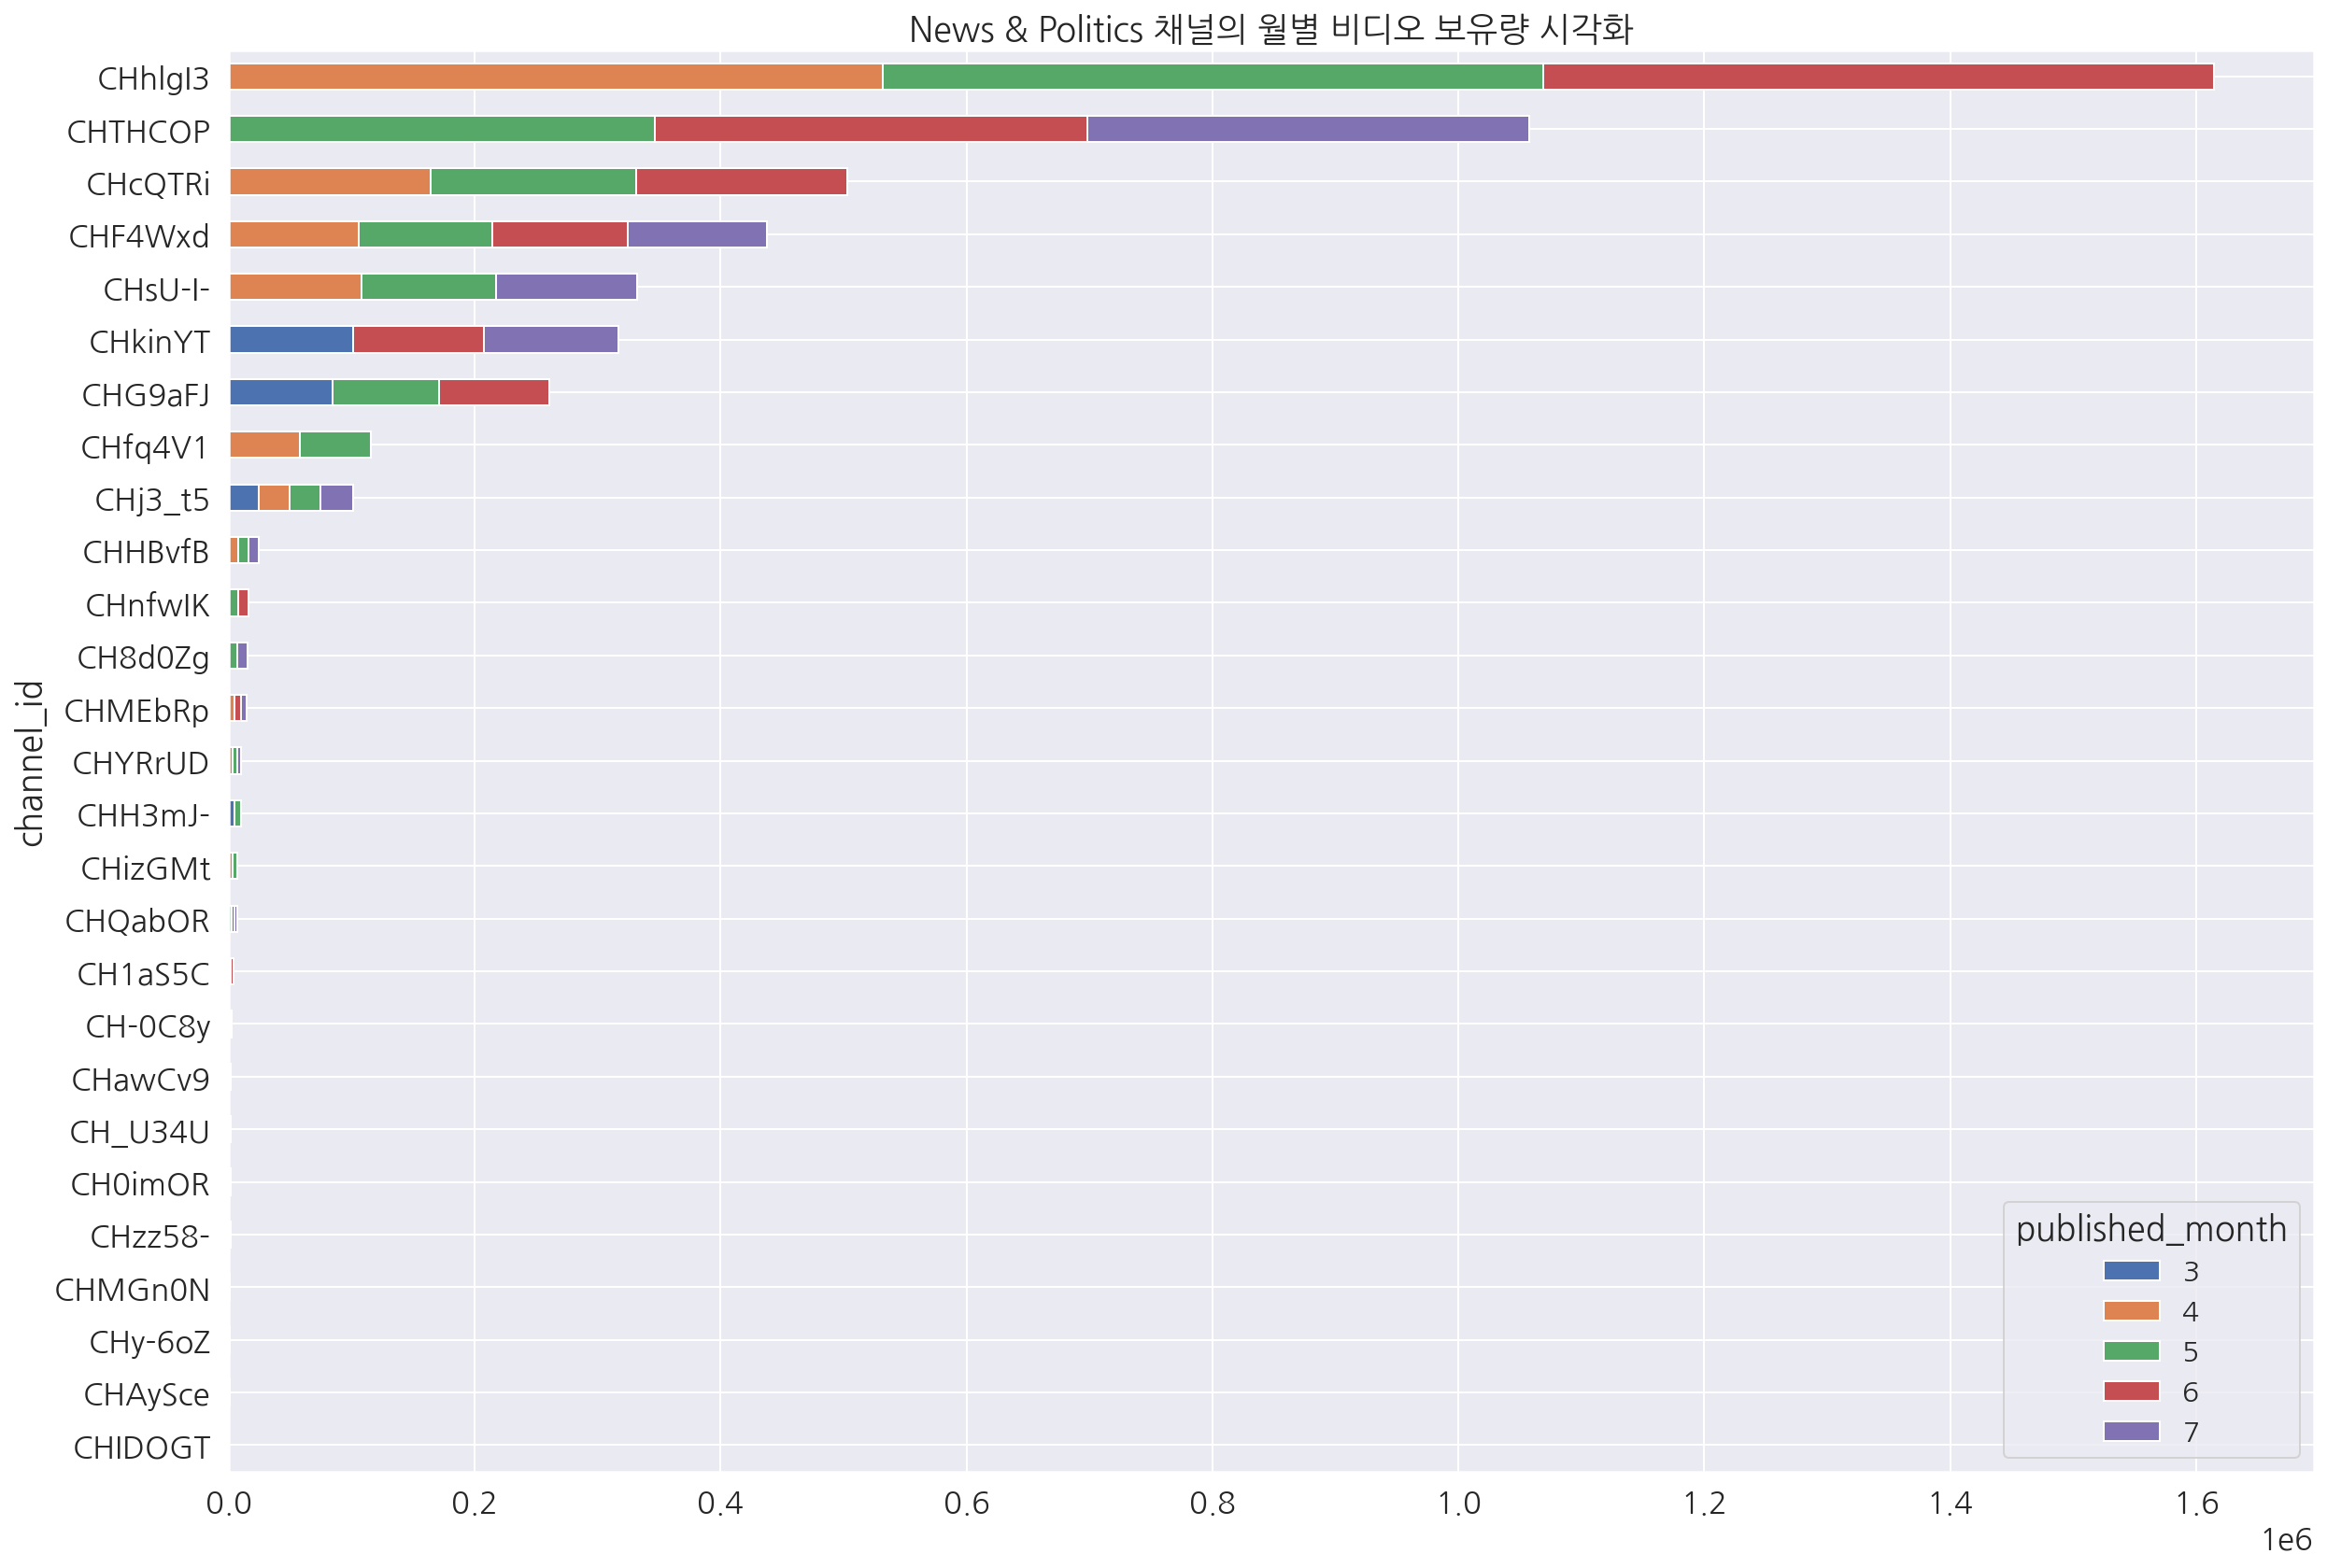

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot data in stack manner of bar type
ax = News_loc[[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[5]} 채널의 월별 비디오 보유량 시각화", figsize =(20,14))
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

plt.show();

비디오 보유량 순으로 잘라서 보겠습니다.

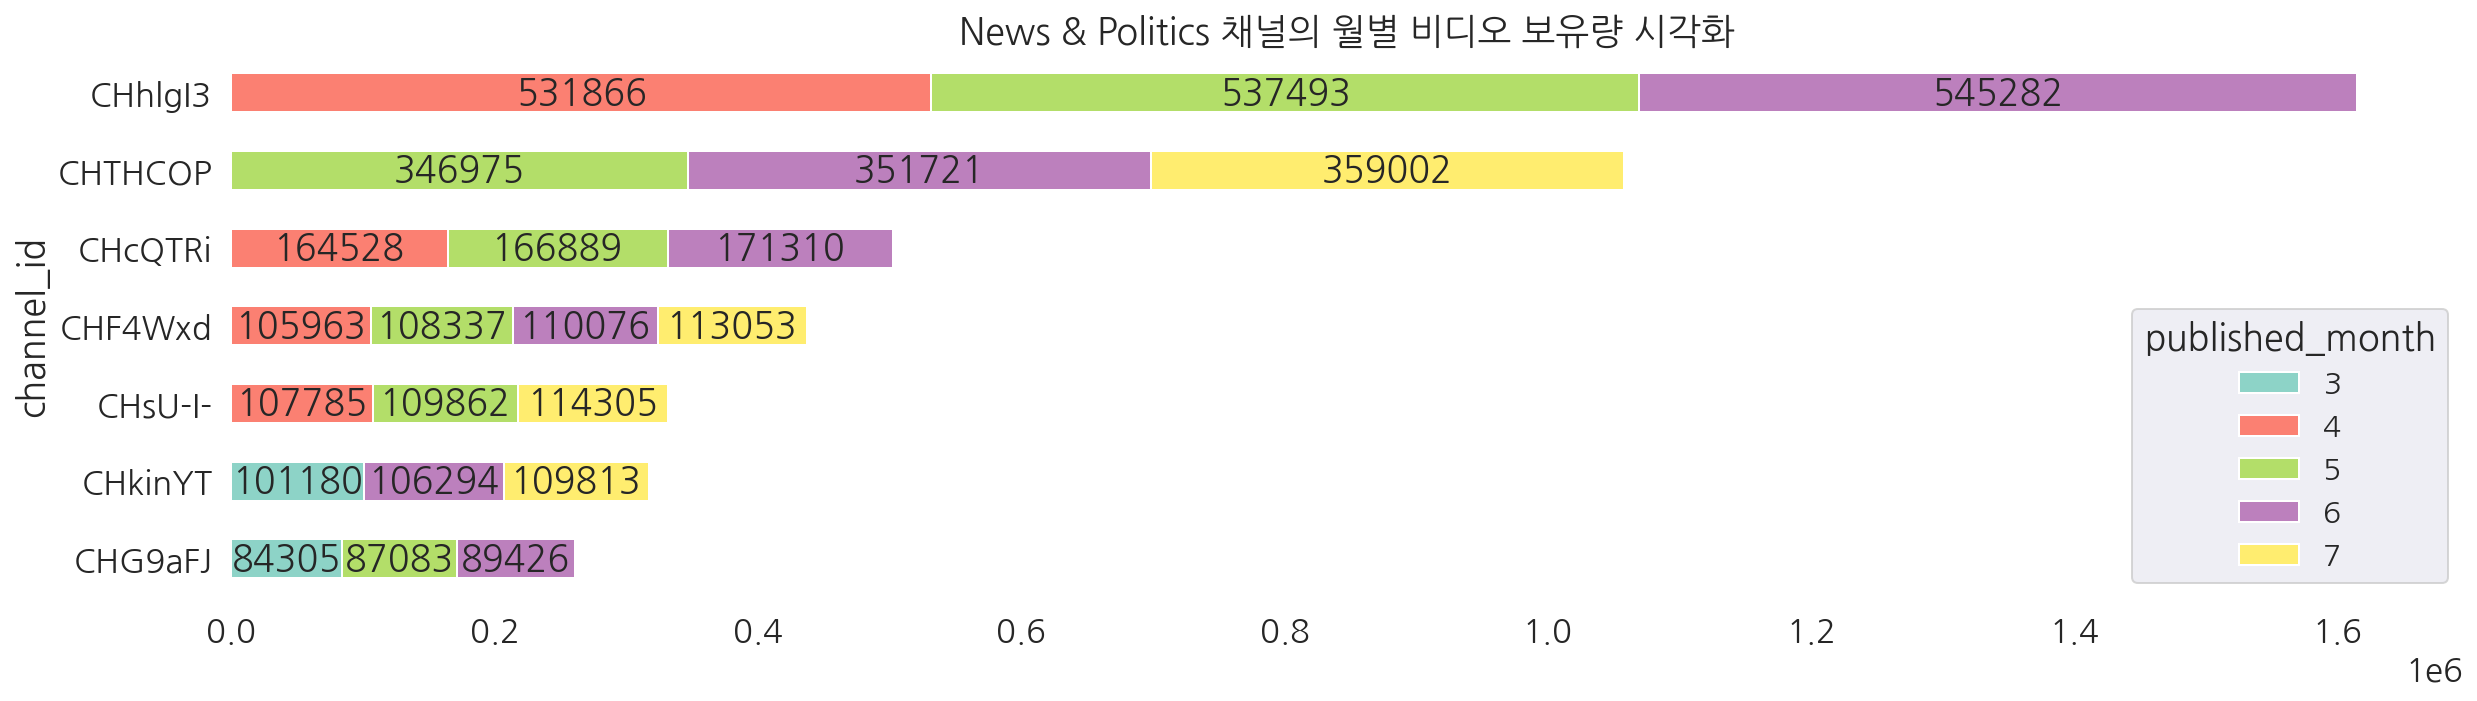

In [ ]:
# plot data in stack manner of bar type
ax = News_loc[(News_loc['sum']>0.25*1e6)][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[5]} 채널의 월별 비디오 보유량 시각화", figsize =(20,5), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

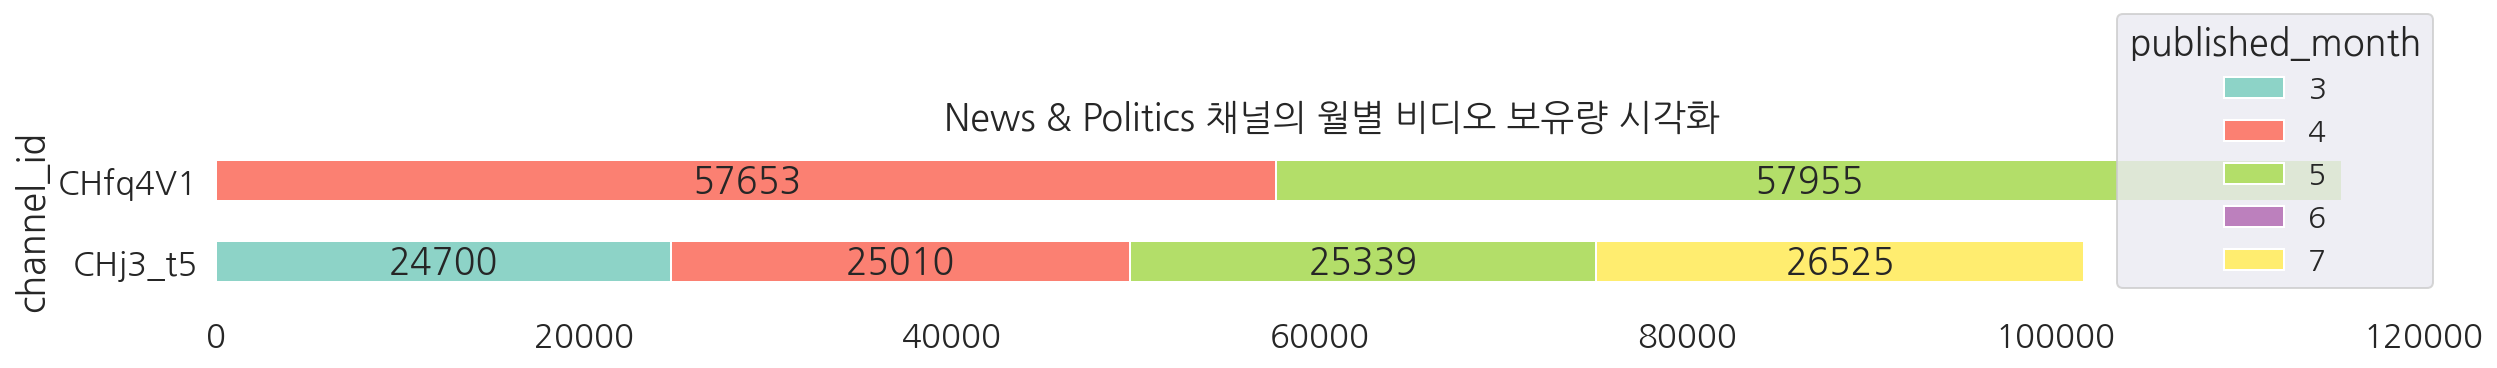

In [ ]:
# plot data in stack manner of bar type
ax = News_loc[(News_loc['sum']<=0.25*1e6)&(News_loc['sum']>25000)][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[5]} 채널의 월별 비디오 보유량 시각화", figsize =(20,1.5), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

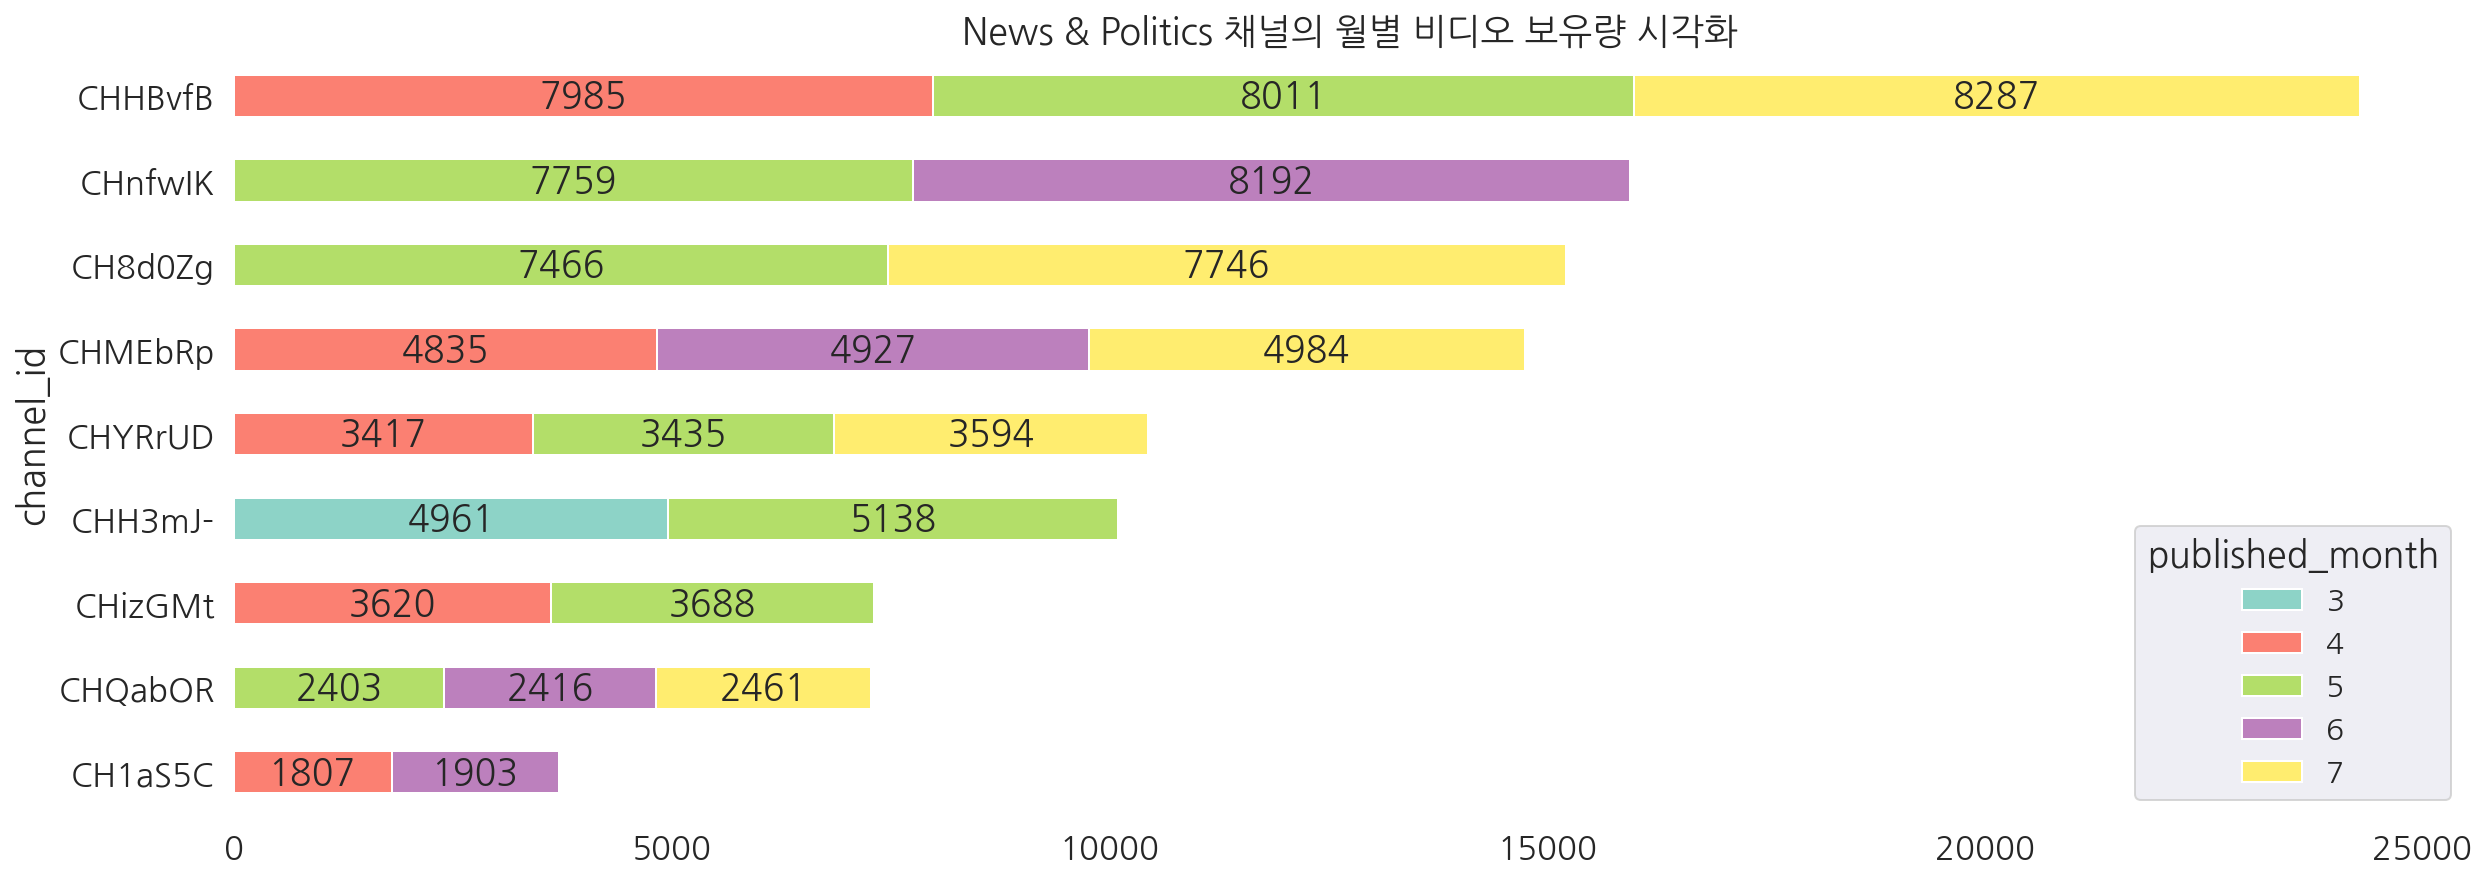

In [ ]:
# plot data in stack manner of bar type
ax = News_loc[(News_loc['sum']<=25000)&(News_loc['sum']>3000)][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[5]} 채널의 월별 비디오 보유량 시각화", figsize =(20,7), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

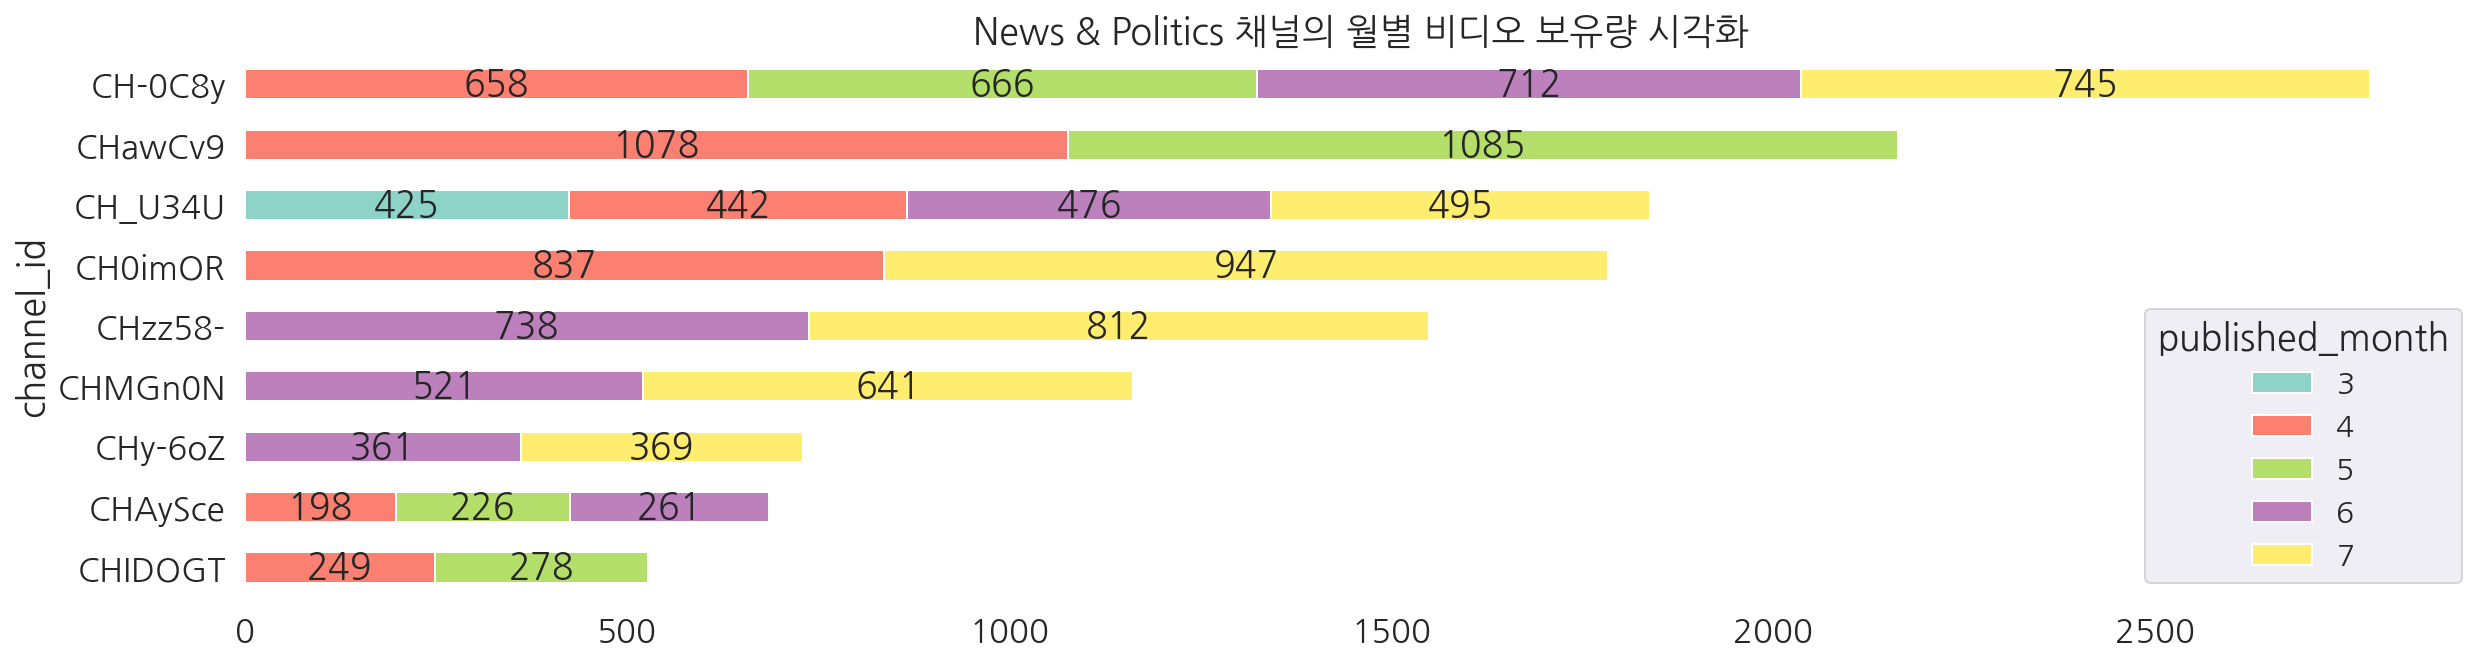

In [ ]:
# plot data in stack manner of bar type
ax = News_loc[(News_loc['sum']<=3000)][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[5]} 채널의 월별 비디오 보유량 시각화", figsize =(20,5), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

### 6.Howto & Style

In [ ]:
category[6]

'Howto & Style'

In [ ]:
# Howto & Style	카테고리만 추출
Howto = month_df[month_df['category_name']==category[6]]
Howto_df = Howto['on_channel_total_videos'].groupby([Howto['channel_id'], Howto['published_month']]).mean().unstack('published_month')

In [ ]:
# Howto & Style 카테고리에 속한 'channel_id'의 개수
Howto['channel_id'].unique().shape

(44,)

Howto & Style 카테고리에서 채널별로 월별 비디오 보유량을 봅시다.

In [ ]:
Howto_df

published_month      3            4           5            6            7
channel_id                                                               
CH1EEpE            NaN          NaN         NaN          NaN   242.000000
CH1UebY            NaN   494.000000         NaN          NaN          NaN
CH1g9Ja            NaN   157.000000         NaN          NaN   200.000000
CH2DHU9            NaN          NaN         NaN   904.000000          NaN
CH2gasv            NaN   792.000000         NaN   864.333333          NaN
CH2xkO7            NaN          NaN   93.000000   104.000000          NaN
CH5q0PI            NaN          NaN         NaN          NaN   269.000000
CH5xK2X            NaN   675.000000         NaN          NaN          NaN
CH6LBdA            NaN          NaN   82.000000          NaN          NaN
CH8wHwv            NaN          NaN         NaN   238.000000   239.500000
CHBTytr            NaN    80.500000  115.333333          NaN   169.000000
CHCG6BE            NaN  2057.000000         NaN          NaN          NaN
CHIZ5rC            NaN   270.666667         NaN   290.500000   292.000000
CHKm-cu            NaN   477.000000  491.000000   508.000000          NaN
CHKrhyP            NaN          NaN  669.500000   606.000000   546.333333
CHL01un            NaN          NaN         NaN          NaN   291.000000
CHLduRr            NaN   161.000000         NaN          NaN          NaN
CHVXx89            NaN   327.000000  345.500000   363.000000   390.500000
CHWRb5Q            NaN          NaN         NaN          NaN   183.000000
CHWdmhZ            NaN          NaN         NaN    76.000000          NaN
CHWrh9h          375.0   390.000000  399.000000   417.000000          NaN
CHXGh59            NaN          NaN         NaN   170.000000          NaN
CHZCvbW            NaN   615.000000  620.000000   630.000000          NaN
CHayVh6            NaN   493.000000         NaN          NaN          NaN
CHcTWmz            NaN   540.000000         NaN          NaN          NaN
CHd4Fmc          131.0   134.000000         NaN   137.500000   139.500000
CHiNS0K            NaN          NaN         NaN    58.500000    60.000000
CHj8zZ1            NaN   229.500000  241.000000   250.000000          NaN
CHkxvX8            NaN          NaN         NaN          NaN  1430.000000
CHn64fS            NaN    20.000000   62.500000          NaN   129.500000
CHnCyCL            NaN   424.000000         NaN          NaN          NaN
CHnZ8qy            NaN          NaN   46.000000          NaN          NaN
CHnekLi            NaN   475.000000         NaN          NaN          NaN
CHp94pz            NaN   262.500000  276.000000          NaN   294.000000
CHpg89Y            NaN          NaN  132.500000          NaN          NaN
CHrpB5P            NaN          NaN  471.000000          NaN   510.000000
CHrxSR4            NaN          NaN         NaN          NaN   632.000000
CHuFGPh            NaN          NaN  678.000000   690.000000          NaN
CHvil4O            NaN   967.000000         NaN  1131.000000          NaN
CHxjZ0G            NaN          NaN         NaN    14.000000          NaN
CHy2WX3            NaN   468.000000  483.500000   500.000000          NaN
CHyn7ao            NaN   113.000000         NaN          NaN   130.500000
CHz72_x            NaN          NaN         NaN   106.000000          NaN
CHzIOIS            NaN          NaN  685.666667   713.000000   743.000000

In [ ]:
Howto_df['sum'] = Howto_df.T.sum()

In [ ]:
# 2개월 이상 채택된 채널수
li_index = []
for i in range(len(Howto_df)):
  if Howto_df.iloc[i].isnull().sum() <=3 : 
    li_index.append(Howto_df.index[i])
len(li_index)

22

3,4,5,6,7월 중 결측값이 4개 이상인 채널을 제외하고 5개월 중 2개월 이상 선정된 채널 22개의 channel_id만 추출합니다. 

In [ ]:
Howto_loc = Howto_df.loc[li_index].sort_values('sum')

In [ ]:
Howto_loc

published_month      3           4           5            6           7  \
channel_id                                                                
CHiNS0K            NaN         NaN         NaN    58.500000   60.000000   
CH2xkO7            NaN         NaN   93.000000   104.000000         NaN   
CHn64fS            NaN   20.000000   62.500000          NaN  129.500000   
CHyn7ao            NaN  113.000000         NaN          NaN  130.500000   
CH1g9Ja            NaN  157.000000         NaN          NaN  200.000000   
CHBTytr            NaN   80.500000  115.333333          NaN  169.000000   
CH8wHwv            NaN         NaN         NaN   238.000000  239.500000   
CHd4Fmc          131.0  134.000000         NaN   137.500000  139.500000   
CHj8zZ1            NaN  229.500000  241.000000   250.000000         NaN   
CHp94pz            NaN  262.500000  276.000000          NaN  294.000000   
CHIZ5rC            NaN  270.666667         NaN   290.500000  292.000000   
CHrpB5P            NaN         NaN  471.000000          NaN  510.000000   
CHuFGPh            NaN         NaN  678.000000   690.000000         NaN   
CHVXx89            NaN  327.000000  345.500000   363.000000  390.500000   
CHy2WX3            NaN  468.000000  483.500000   500.000000         NaN   
CHKm-cu            NaN  477.000000  491.000000   508.000000         NaN   
CHWrh9h          375.0  390.000000  399.000000   417.000000         NaN   
CH2gasv            NaN  792.000000         NaN   864.333333         NaN   
CHKrhyP            NaN         NaN  669.500000   606.000000  546.333333   
CHZCvbW            NaN  615.000000  620.000000   630.000000         NaN   
CHvil4O            NaN  967.000000         NaN  1131.000000         NaN   
CHzIOIS            NaN         NaN  685.666667   713.000000  743.000000   

published_month          sum  
channel_id                    
CHiNS0K           118.500000  
CH2xkO7           197.000000  
CHn64fS           212.000000  
CHyn7ao           243.500000  
CH1g9Ja           357.000000  
CHBTytr           364.833333  
CH8wHwv           477.500000  
CHd4Fmc           542.000000  
CHj8zZ1           720.500000  
CHp94pz           832.500000  
CHIZ5rC           853.166667  
CHrpB5P           981.000000  
CHuFGPh          1368.000000  
CHVXx89          1426.000000  
CHy2WX3          1451.500000  
CHKm-cu          1476.000000  
CHWrh9h          1581.000000  
CH2gasv          1656.333333  
CHKrhyP          1821.833333  
CHZCvbW          1865.000000  
CHvil4O          2098.000000  
CHzIOIS          2141.666667

특별한 아웃라이어는 보이지 않으므로 이대로 진행합니다.

In [ ]:
Howto_loc.shape

(22, 6)

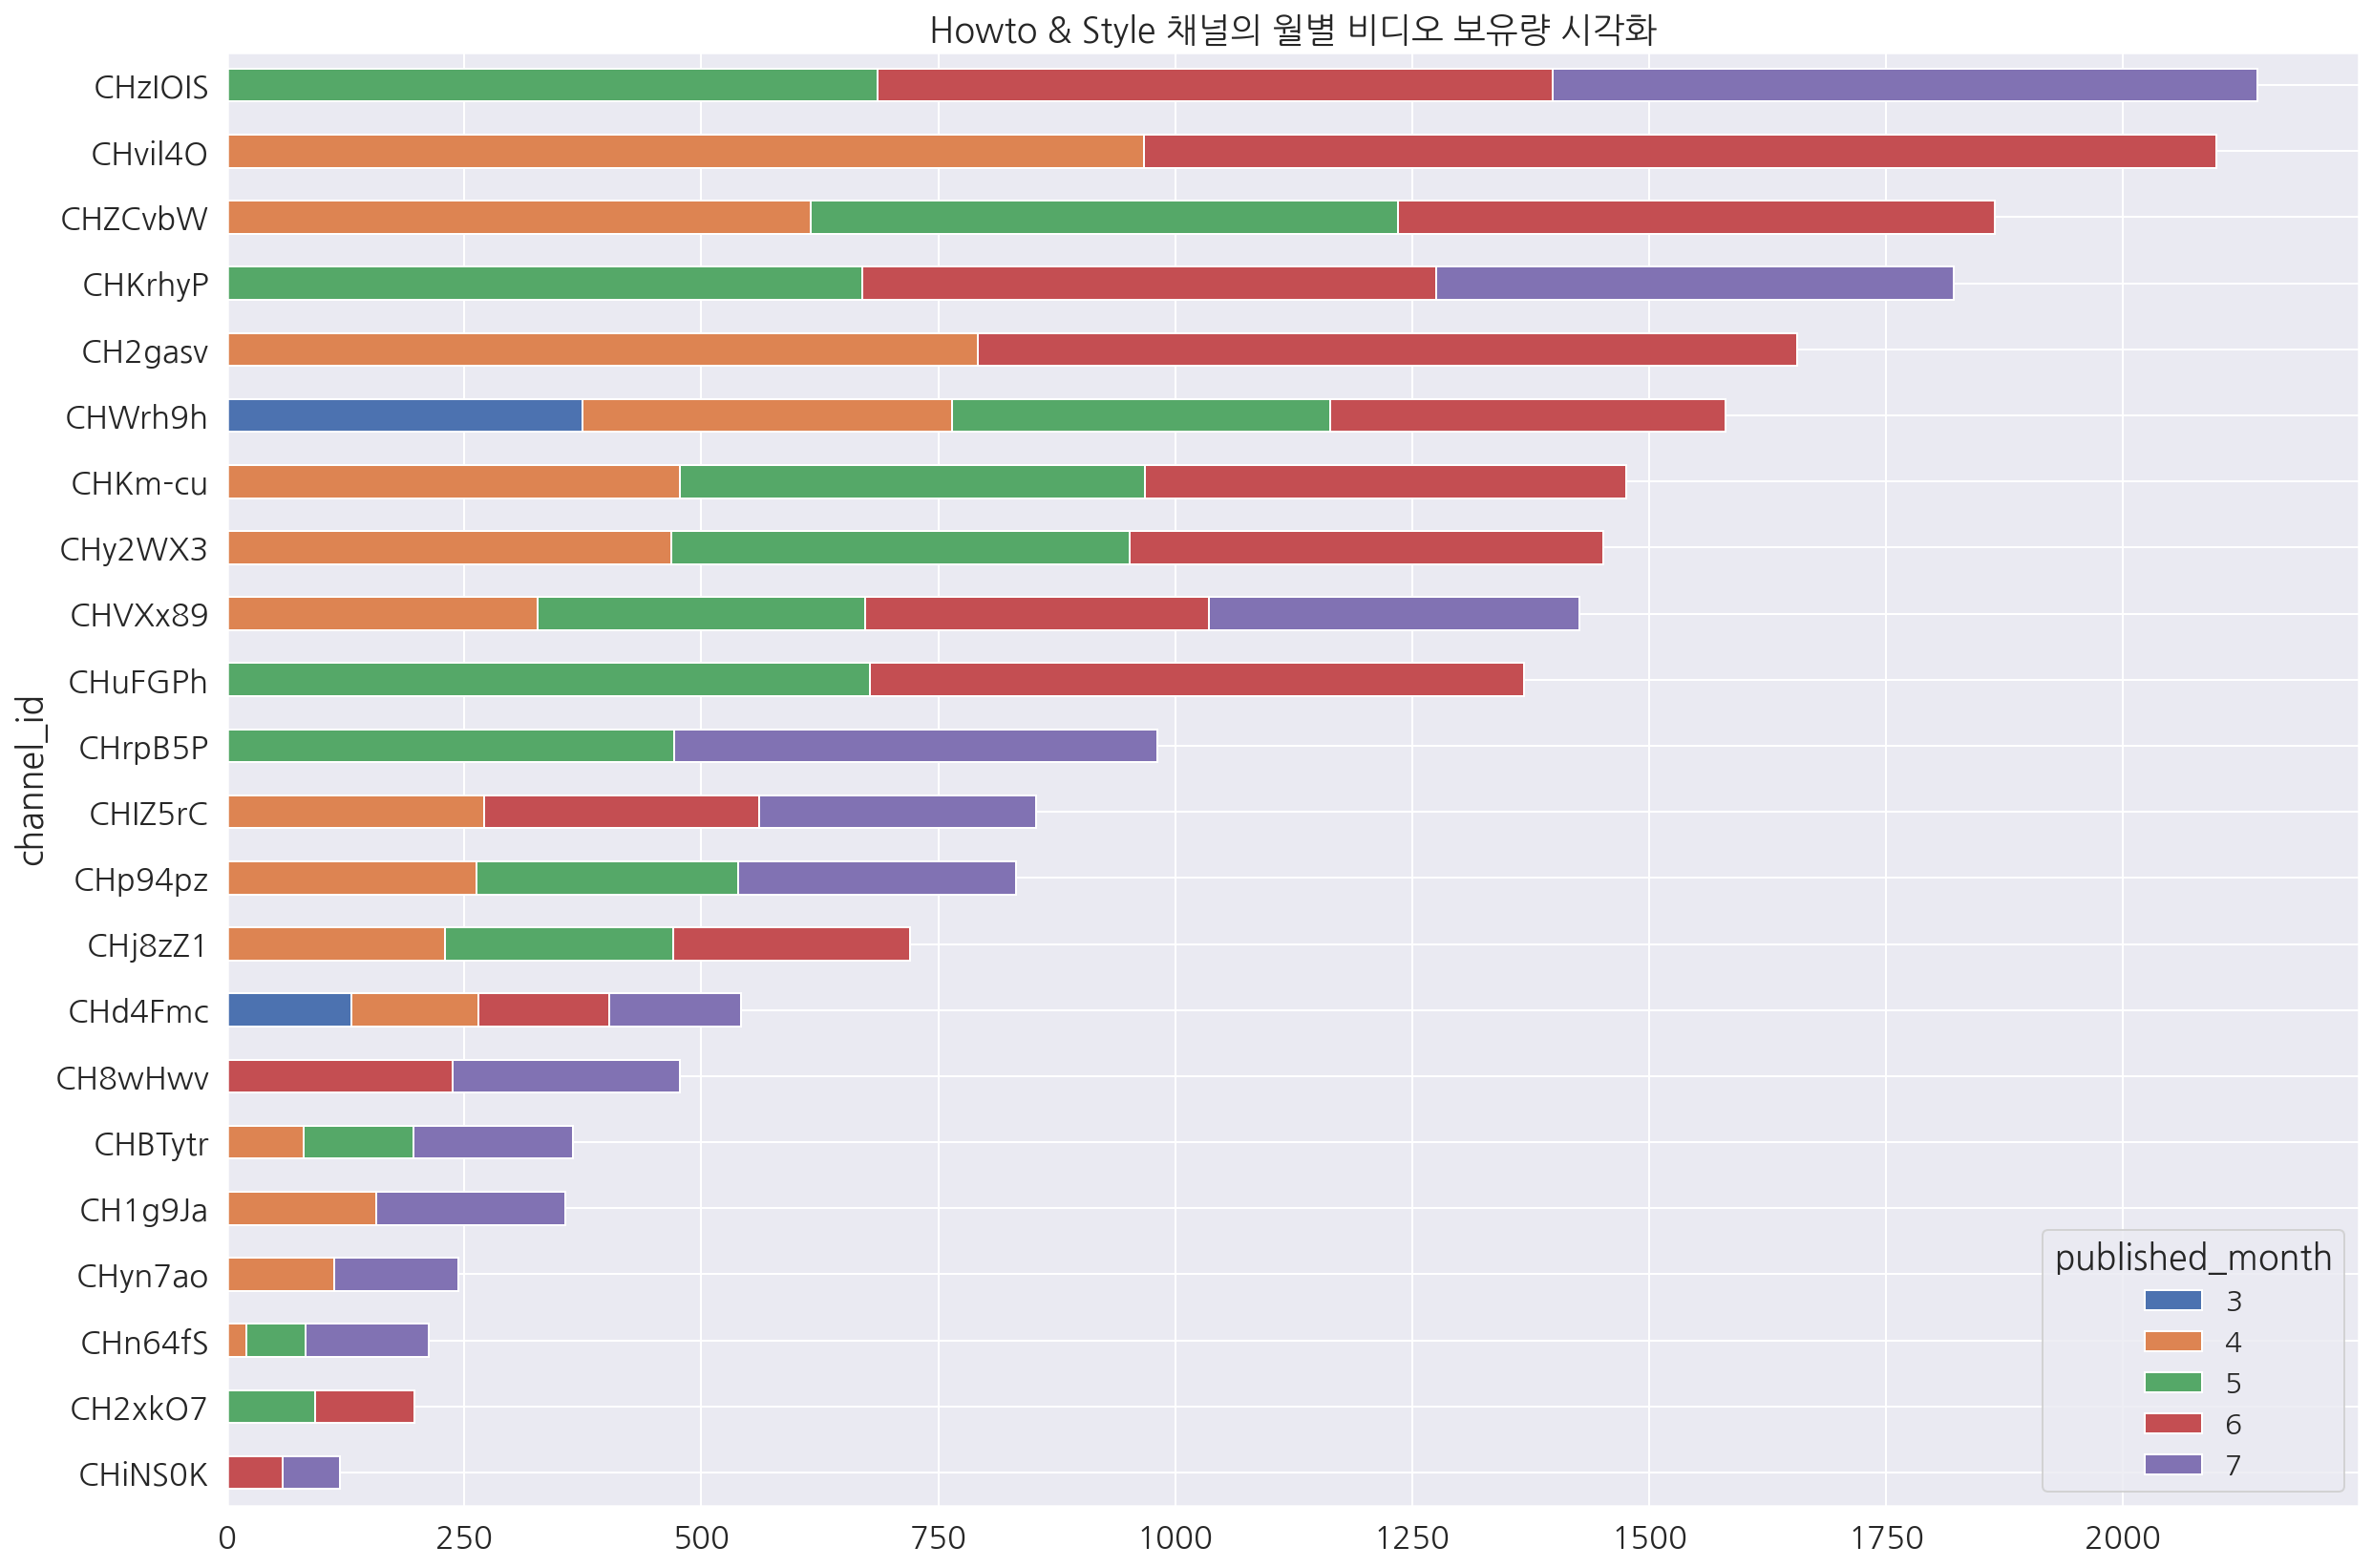

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot data in stack manner of bar type
ax = Howto_loc[[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[6]} 채널의 월별 비디오 보유량 시각화", figsize =(20,14))
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

plt.show();

비디오 보유량 순으로 잘라서 보겠습니다.

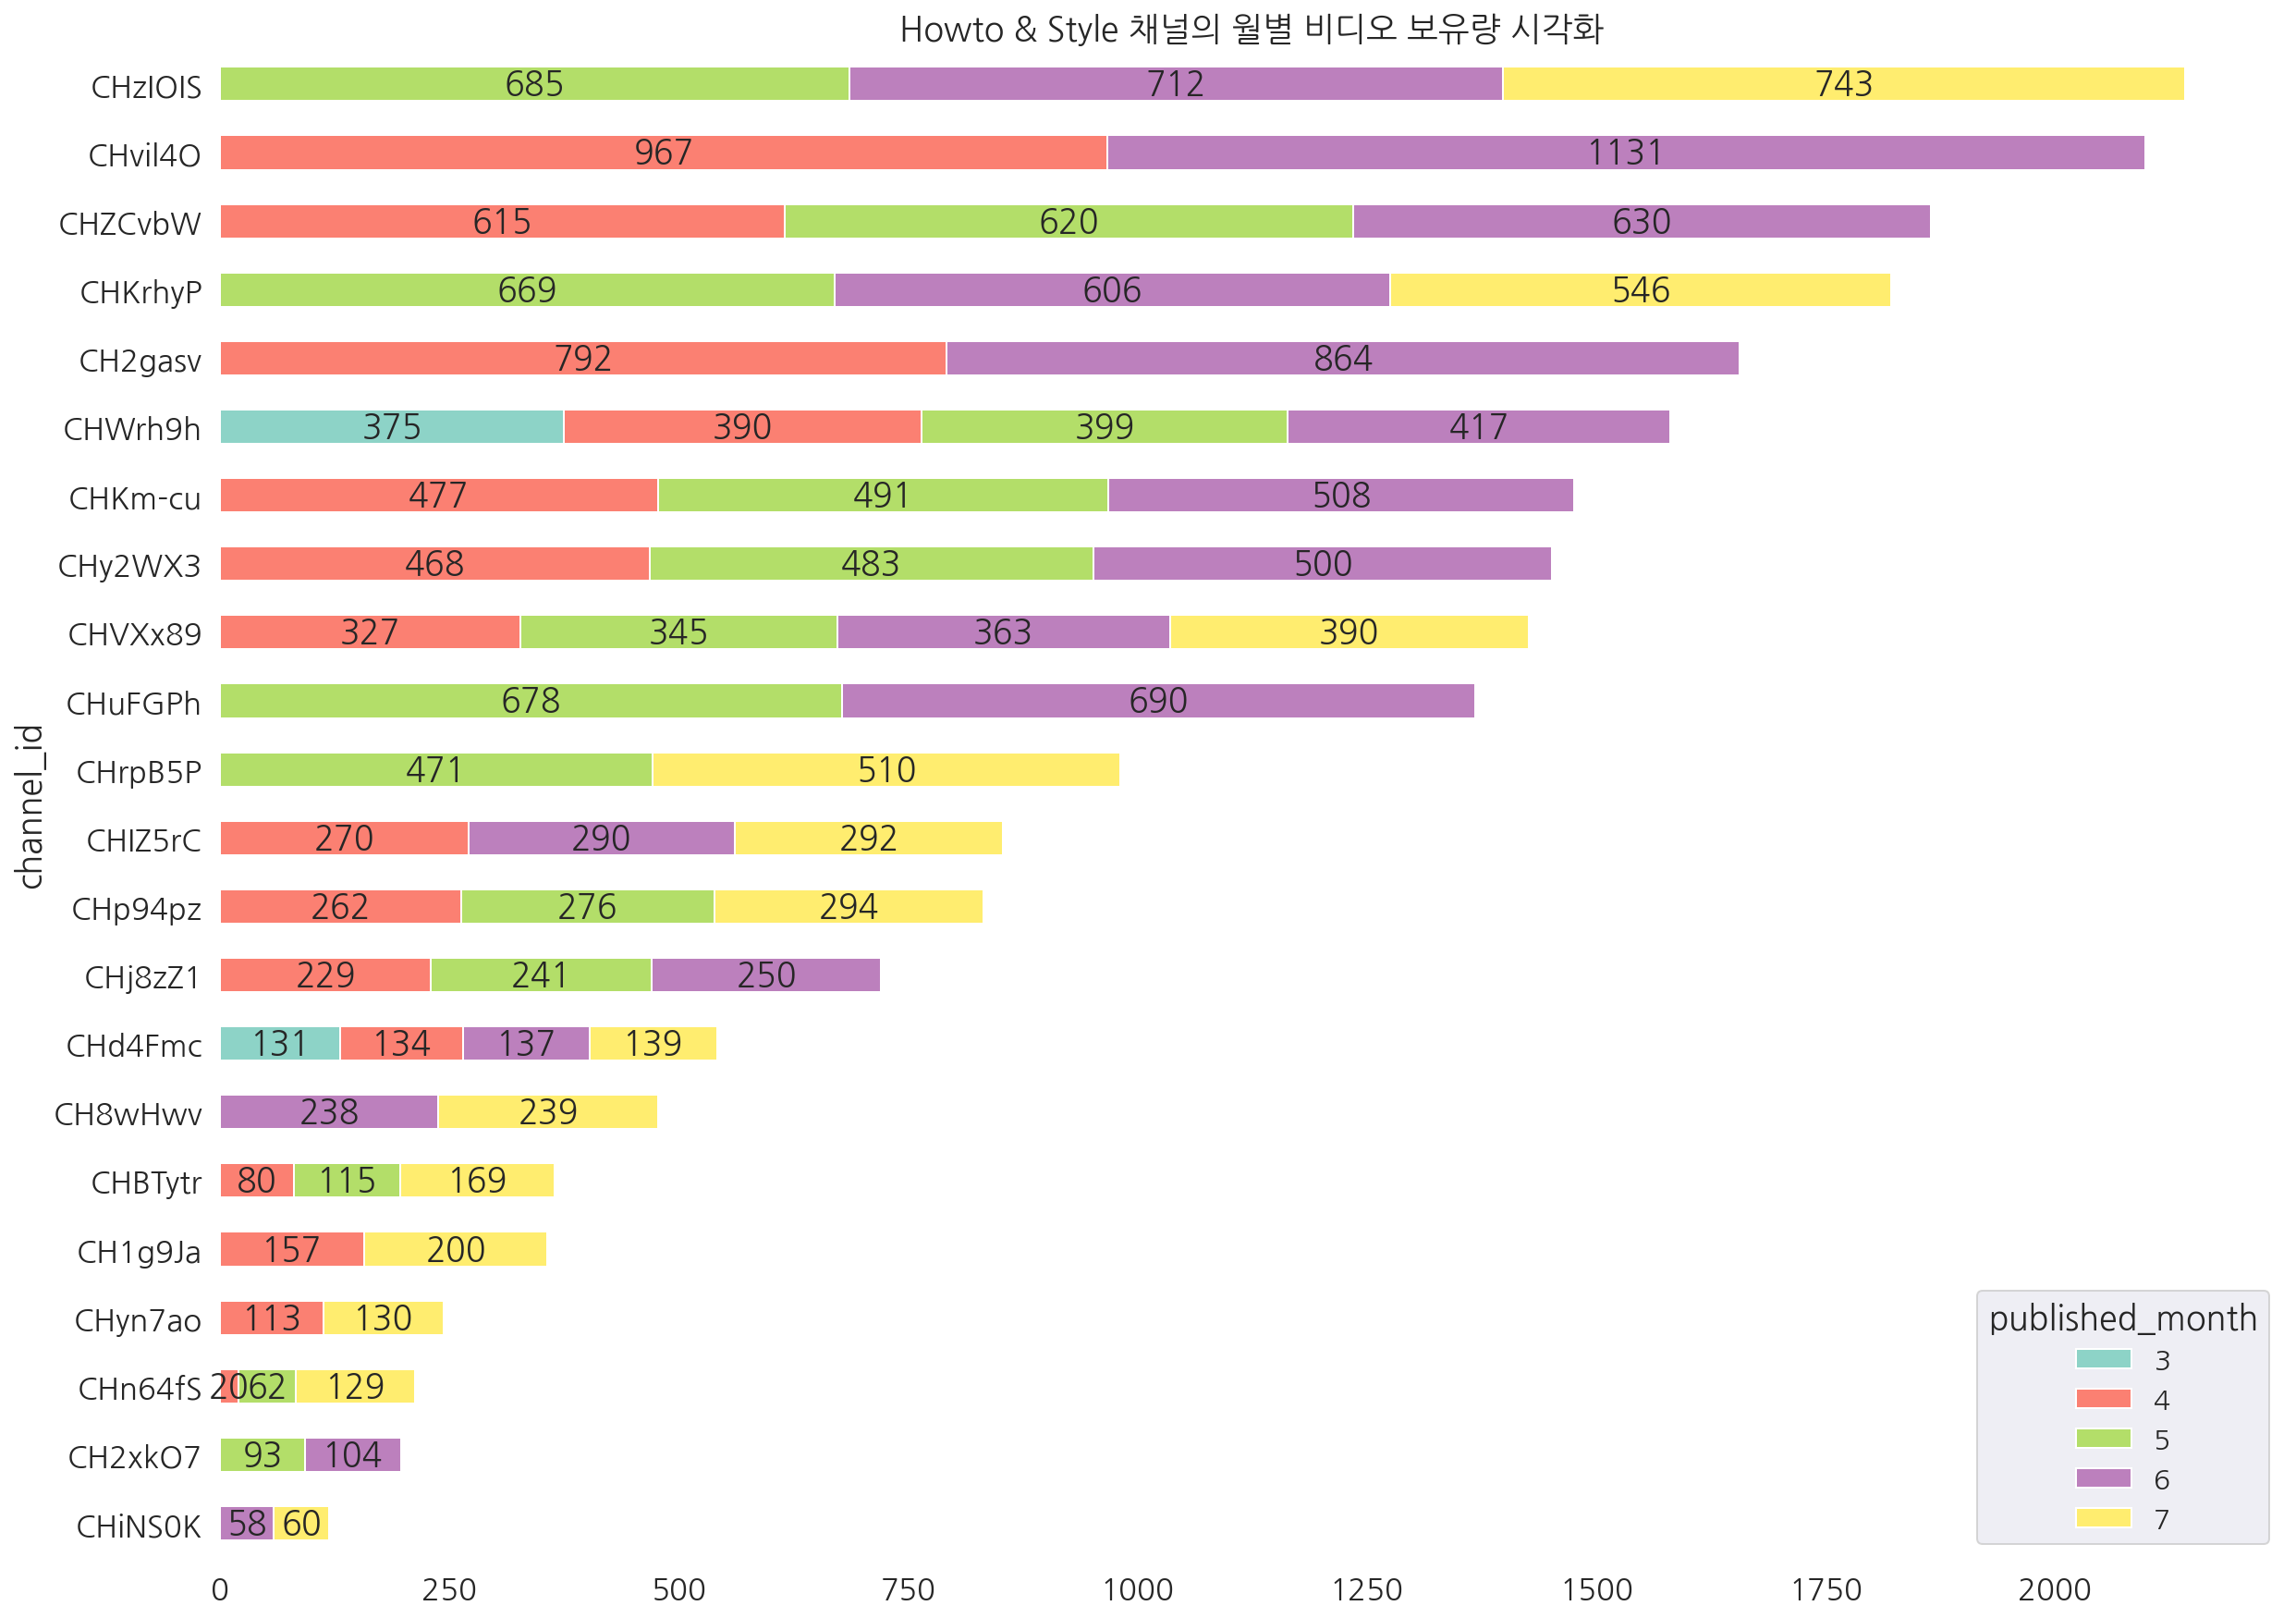

In [ ]:
# plot data in stack manner of bar type
ax = Howto_loc[[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[6]} 채널의 월별 비디오 보유량 시각화", figsize =(20,15), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

### 7.Gaming

In [ ]:
category[7]

'Gaming'

In [ ]:
# Gaming	카테고리만 추출
Gaming = month_df[month_df['category_name']==category[7]]
Gaming_df = Gaming['on_channel_total_videos'].groupby([Gaming['channel_id'], Gaming['published_month']]).mean().unstack('published_month')

In [ ]:
# Gaming 카테고리에 속한 'channel_id'의 개수
Gaming['channel_id'].unique().shape

(47,)

Gaming 카테고리에서 채널별로 월별 비디오 보유량을 봅시다.

In [ ]:
Gaming_df

published_month       3       4            5            6            7
channel_id                                                            
CH2NFRq             NaN     NaN  1714.000000          NaN          NaN
CH31ypO             NaN     NaN          NaN          NaN   425.000000
CH48NSS             NaN     NaN   839.000000          NaN          NaN
CH8C0Yd             NaN     NaN          NaN   236.000000          NaN
CH8CIM3             NaN   673.0   684.666667          NaN   723.333333
CH9-LID             NaN     NaN          NaN    81.000000          NaN
CH9_093             NaN     NaN          NaN   686.000000   724.500000
CH9aEa6             NaN     NaN          NaN    55.000000          NaN
CHAOTbN             NaN     NaN          NaN    50.000000          NaN
CHBA9Xa             NaN   613.0          NaN   659.000000          NaN
CHBUNoF             NaN     NaN          NaN    38.500000    40.000000
CHBrb8H             NaN     NaN          NaN          NaN    64.000000
CHDBAVz             NaN   738.0          NaN          NaN   818.000000
CHDyc0_             NaN     NaN          NaN   505.000000          NaN
CHGIY_O             NaN     NaN          NaN  5009.000000          NaN
CHHxKSi             NaN     NaN  1355.000000          NaN          NaN
CHK3p1w             NaN     NaN          NaN    64.000000          NaN
CHMPM0h             NaN     NaN          NaN    92.000000          NaN
CHNzcxC             NaN     NaN   711.000000          NaN          NaN
CHOKQpm             NaN     NaN          NaN    74.000000          NaN
CHSOeJW             NaN     NaN          NaN  1984.000000          NaN
CHU_hKD             NaN     NaN          NaN   530.500000          NaN
CHY9pEH             NaN     NaN          NaN          NaN   183.000000
CHcum1r             NaN     NaN          NaN   122.000000          NaN
CHdrBnB             NaN    69.0    73.500000    80.500000    90.000000
CHeHFCf             NaN   181.0          NaN          NaN          NaN
CHefUNE             NaN     NaN          NaN   538.666667          NaN
CHeudxd             NaN     NaN  3548.000000          NaN          NaN
CHfycsf             NaN     NaN          NaN   539.000000          NaN
CHg7rkx             NaN     NaN          NaN          NaN  2773.000000
CHj-6sZ             NaN     NaN          NaN   267.000000          NaN
CHlJspS             NaN   208.0          NaN          NaN          NaN
CHmCNgL             NaN     NaN  1611.500000          NaN          NaN
CHmMxEF             NaN     NaN          NaN   909.000000          NaN
CHms8Ge             NaN     NaN          NaN   571.000000          NaN
CHnss3B             NaN     NaN          NaN    11.000000          NaN
CHom6Yh             NaN     NaN  1093.000000          NaN  1162.000000
CHooLkG          1267.0  1291.0          NaN          NaN  1336.000000
CHoyaxd             NaN     NaN          NaN          NaN   788.000000
CHpDtPd             NaN     NaN    22.000000          NaN          NaN
CHpYaDy             NaN  1809.0          NaN          NaN          NaN
CHta_NR             NaN     NaN          NaN          NaN  1768.000000
CHuOUU4             NaN   180.0          NaN          NaN          NaN
CHw1Dsw             NaN  3183.0          NaN  3407.500000          NaN
CHxM_h0             NaN   323.0   354.500000          NaN          NaN
CHyTB7U             NaN   411.0          NaN          NaN          NaN
CHzgNzU             NaN     NaN          NaN    19.000000    13.500000

In [ ]:
Gaming_df.shape

(47, 5)

In [ ]:
Gaming_df['sum'] = Gaming_df.T.sum()

In [ ]:
# 2개월 이상 채택된 채널수
li_index = []
for i in range(len(Gaming_df)):
  if Gaming_df.iloc[i].isnull().sum() <=3 : 
    li_index.append(Gaming_df.index[i])
len(li_index)

11

2개월 이상 꾸준히 인기비디오로 채택된 채널수가 너무 적어서, 47개 그대로 시각화를 진행합니다. 

In [ ]:
Gaming_df = Gaming_df.sort_values('sum')

In [ ]:
Gaming_df

published_month       3       4            5            6            7  \
channel_id                                                               
CHnss3B             NaN     NaN          NaN    11.000000          NaN   
CHpDtPd             NaN     NaN    22.000000          NaN          NaN   
CHzgNzU             NaN     NaN          NaN    19.000000    13.500000   
CHAOTbN             NaN     NaN          NaN    50.000000          NaN   
CH9aEa6             NaN     NaN          NaN    55.000000          NaN   
CHK3p1w             NaN     NaN          NaN    64.000000          NaN   
CHBrb8H             NaN     NaN          NaN          NaN    64.000000   
CHOKQpm             NaN     NaN          NaN    74.000000          NaN   
CHBUNoF             NaN     NaN          NaN    38.500000    40.000000   
CH9-LID             NaN     NaN          NaN    81.000000          NaN   
CHMPM0h             NaN     NaN          NaN    92.000000          NaN   
CHcum1r             NaN     NaN          NaN   122.000000          NaN   
CHuOUU4             NaN   180.0          NaN          NaN          NaN   
CHeHFCf             NaN   181.0          NaN          NaN          NaN   
CHY9pEH             NaN     NaN          NaN          NaN   183.000000   
CHlJspS             NaN   208.0          NaN          NaN          NaN   
CH8C0Yd             NaN     NaN          NaN   236.000000          NaN   
CHj-6sZ             NaN     NaN          NaN   267.000000          NaN   
CHdrBnB             NaN    69.0    73.500000    80.500000    90.000000   
CHyTB7U             NaN   411.0          NaN          NaN          NaN   
CH31ypO             NaN     NaN          NaN          NaN   425.000000   
CHDyc0_             NaN     NaN          NaN   505.000000          NaN   
CHU_hKD             NaN     NaN          NaN   530.500000          NaN   
CHefUNE             NaN     NaN          NaN   538.666667          NaN   
CHfycsf             NaN     NaN          NaN   539.000000          NaN   
CHms8Ge             NaN     NaN          NaN   571.000000          NaN   
CHxM_h0             NaN   323.0   354.500000          NaN          NaN   
CHNzcxC             NaN     NaN   711.000000          NaN          NaN   
CHoyaxd             NaN     NaN          NaN          NaN   788.000000   
CH48NSS             NaN     NaN   839.000000          NaN          NaN   
CHmMxEF             NaN     NaN          NaN   909.000000          NaN   
CHBA9Xa             NaN   613.0          NaN   659.000000          NaN   
CHHxKSi             NaN     NaN  1355.000000          NaN          NaN   
CH9_093             NaN     NaN          NaN   686.000000   724.500000   
CHDBAVz             NaN   738.0          NaN          NaN   818.000000   
CHmCNgL             NaN     NaN  1611.500000          NaN          NaN   
CH2NFRq             NaN     NaN  1714.000000          NaN          NaN   
CHta_NR             NaN     NaN          NaN          NaN  1768.000000   
CHpYaDy             NaN  1809.0          NaN          NaN          NaN   
CHSOeJW             NaN     NaN          NaN  1984.000000          NaN   
CH8CIM3             NaN   673.0   684.666667          NaN   723.333333   
CHom6Yh             NaN     NaN  1093.000000          NaN  1162.000000   
CHg7rkx             NaN     NaN          NaN          NaN  2773.000000   
CHeudxd             NaN     NaN  3548.000000          NaN          NaN   
CHooLkG          1267.0  1291.0          NaN          NaN  1336.000000   
CHGIY_O             NaN     NaN          NaN  5009.000000          NaN   
CHw1Dsw             NaN  3183.0          NaN  3407.500000          NaN   

published_month          sum  
channel_id                    
CHnss3B            11.000000  
CHpDtPd            22.000000  
CHzgNzU            32.500000  
CHAOTbN            50.000000  
CH9aEa6            55.000000  
CHK3p1w            64.000000  
CHBrb8H            64.000000  
CHOKQpm            74.000000  
CHBUNoF            78.500000  
CH9-LID            81.000000  
C

특별한 아웃라이어는 보이지 않으므로 이대로 진행합니다.

In [ ]:
Gaming_df.shape

(47, 6)

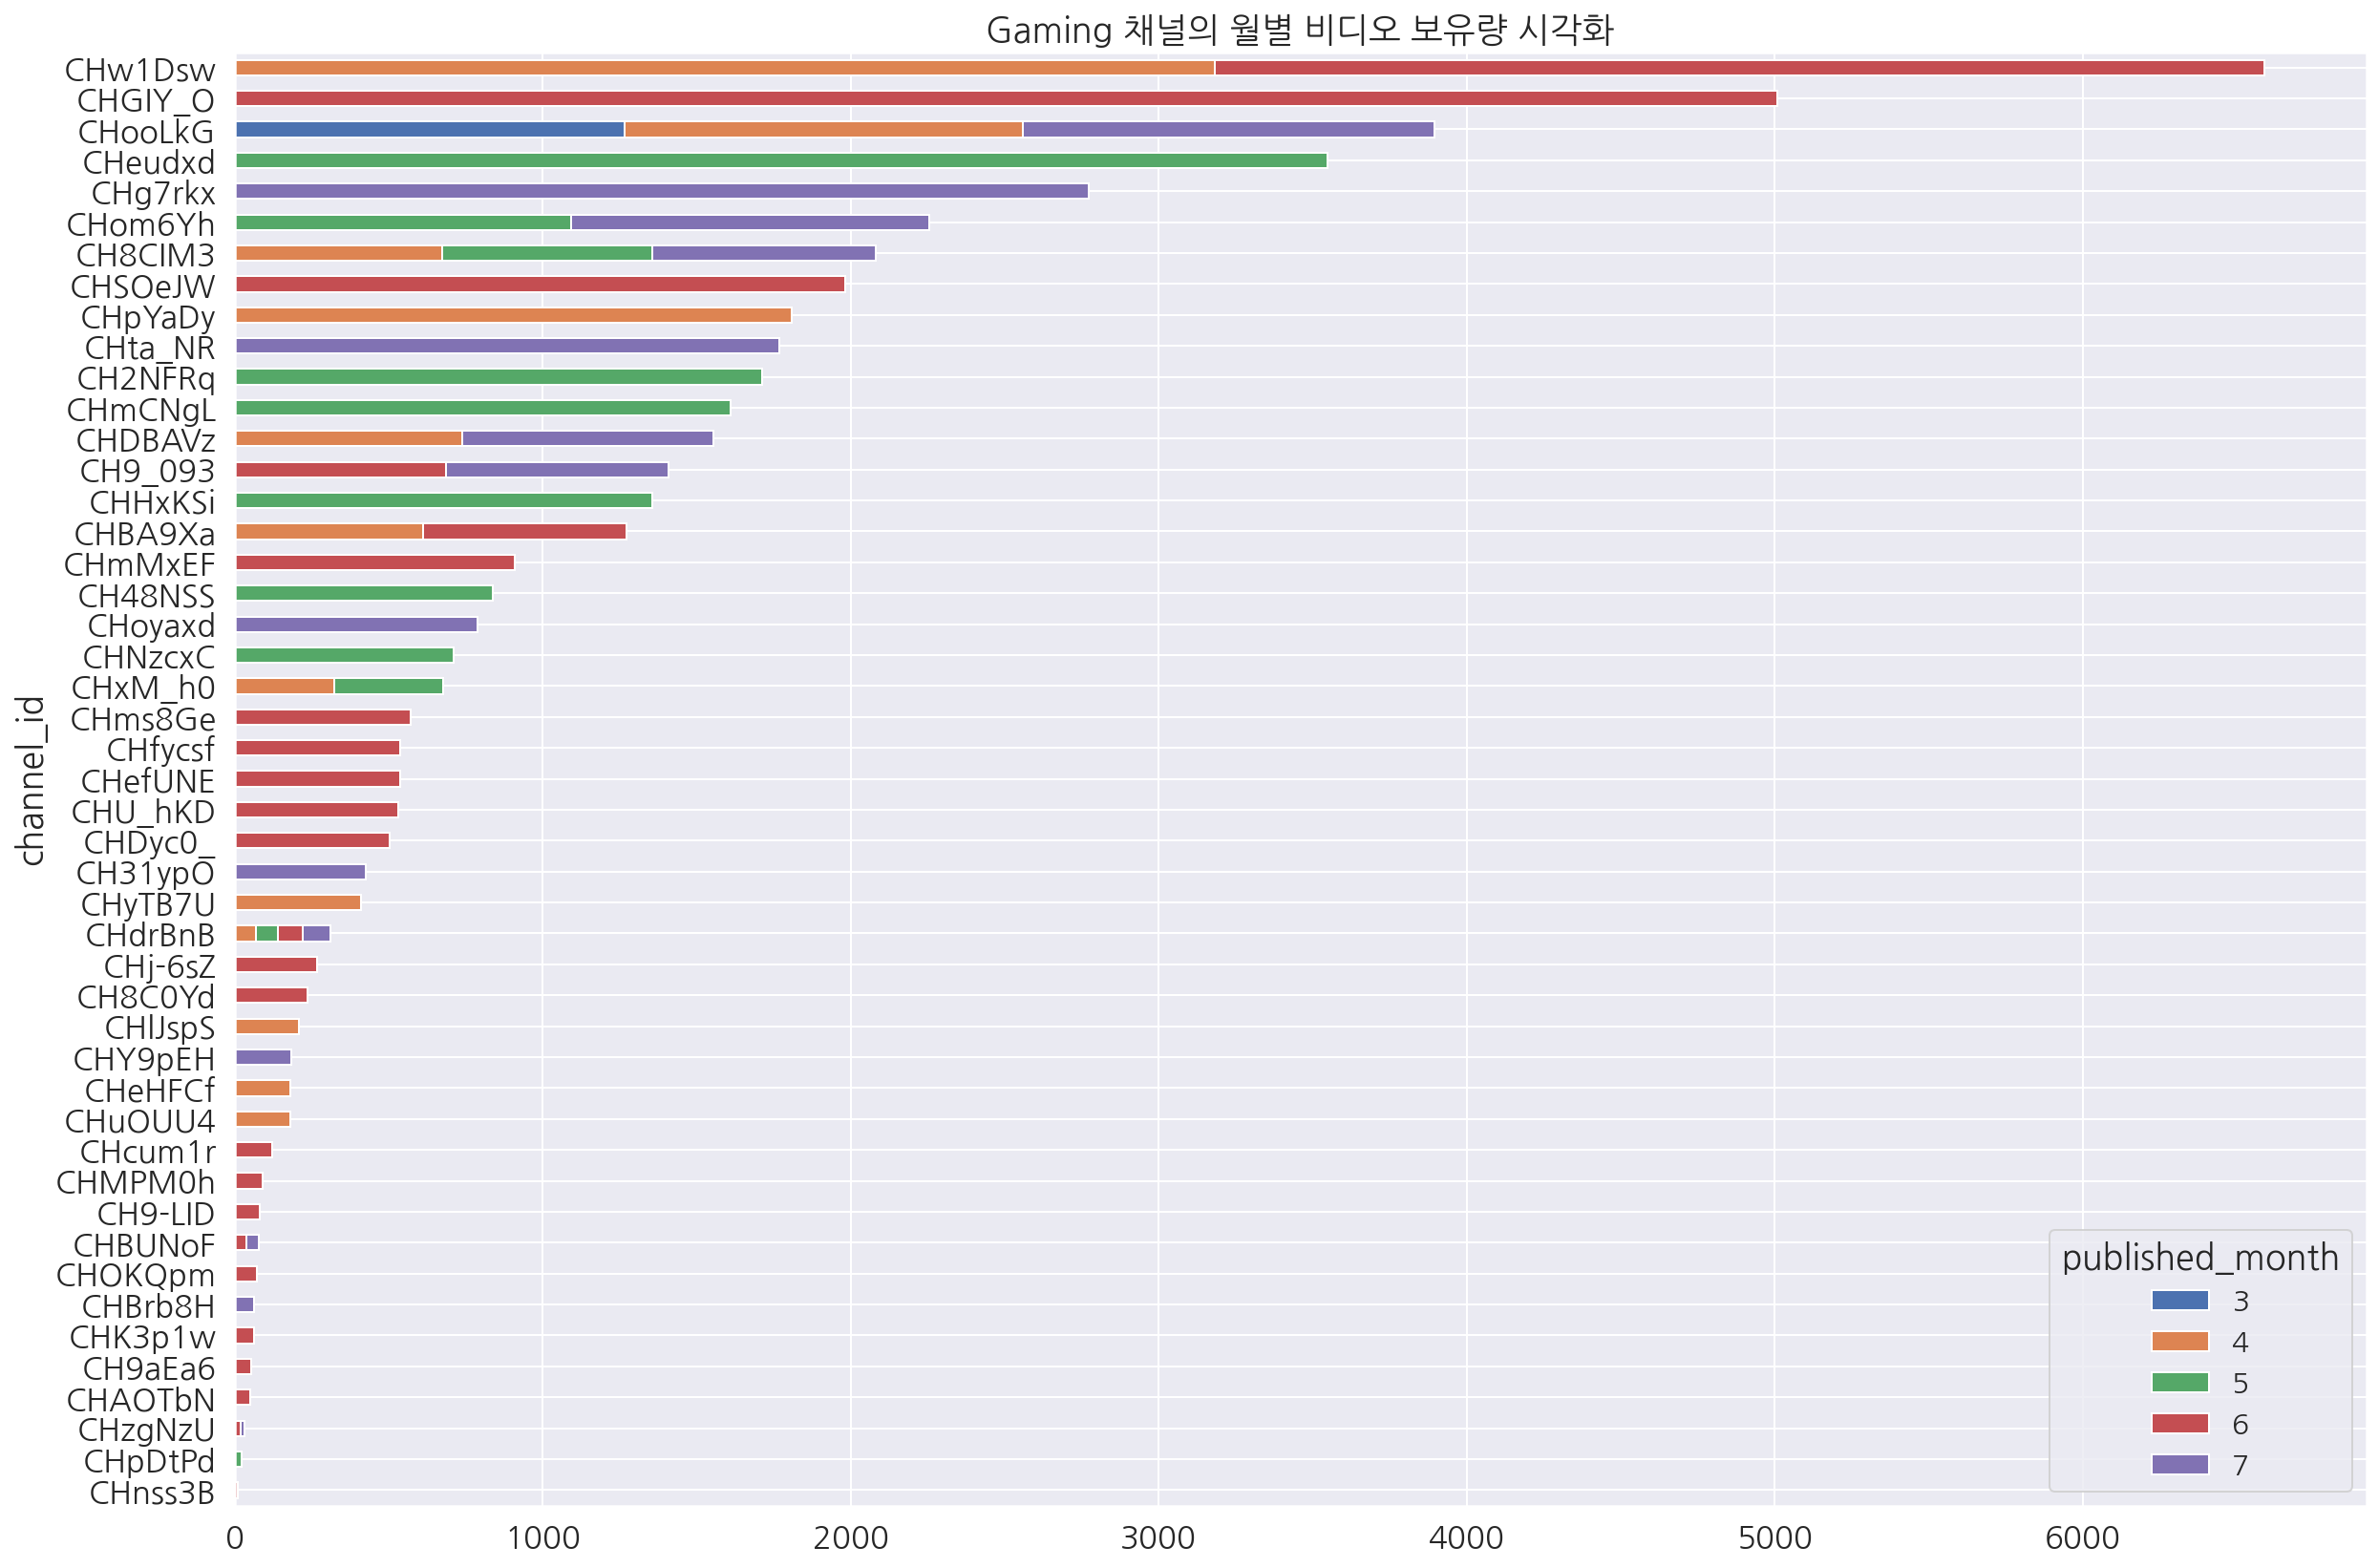

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot data in stack manner of bar type
ax = Gaming_df[[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[7]} 채널의 월별 비디오 보유량 시각화", figsize =(20,14))
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

plt.show();

비디오 보유량 순으로 잘라서 보겠습니다.

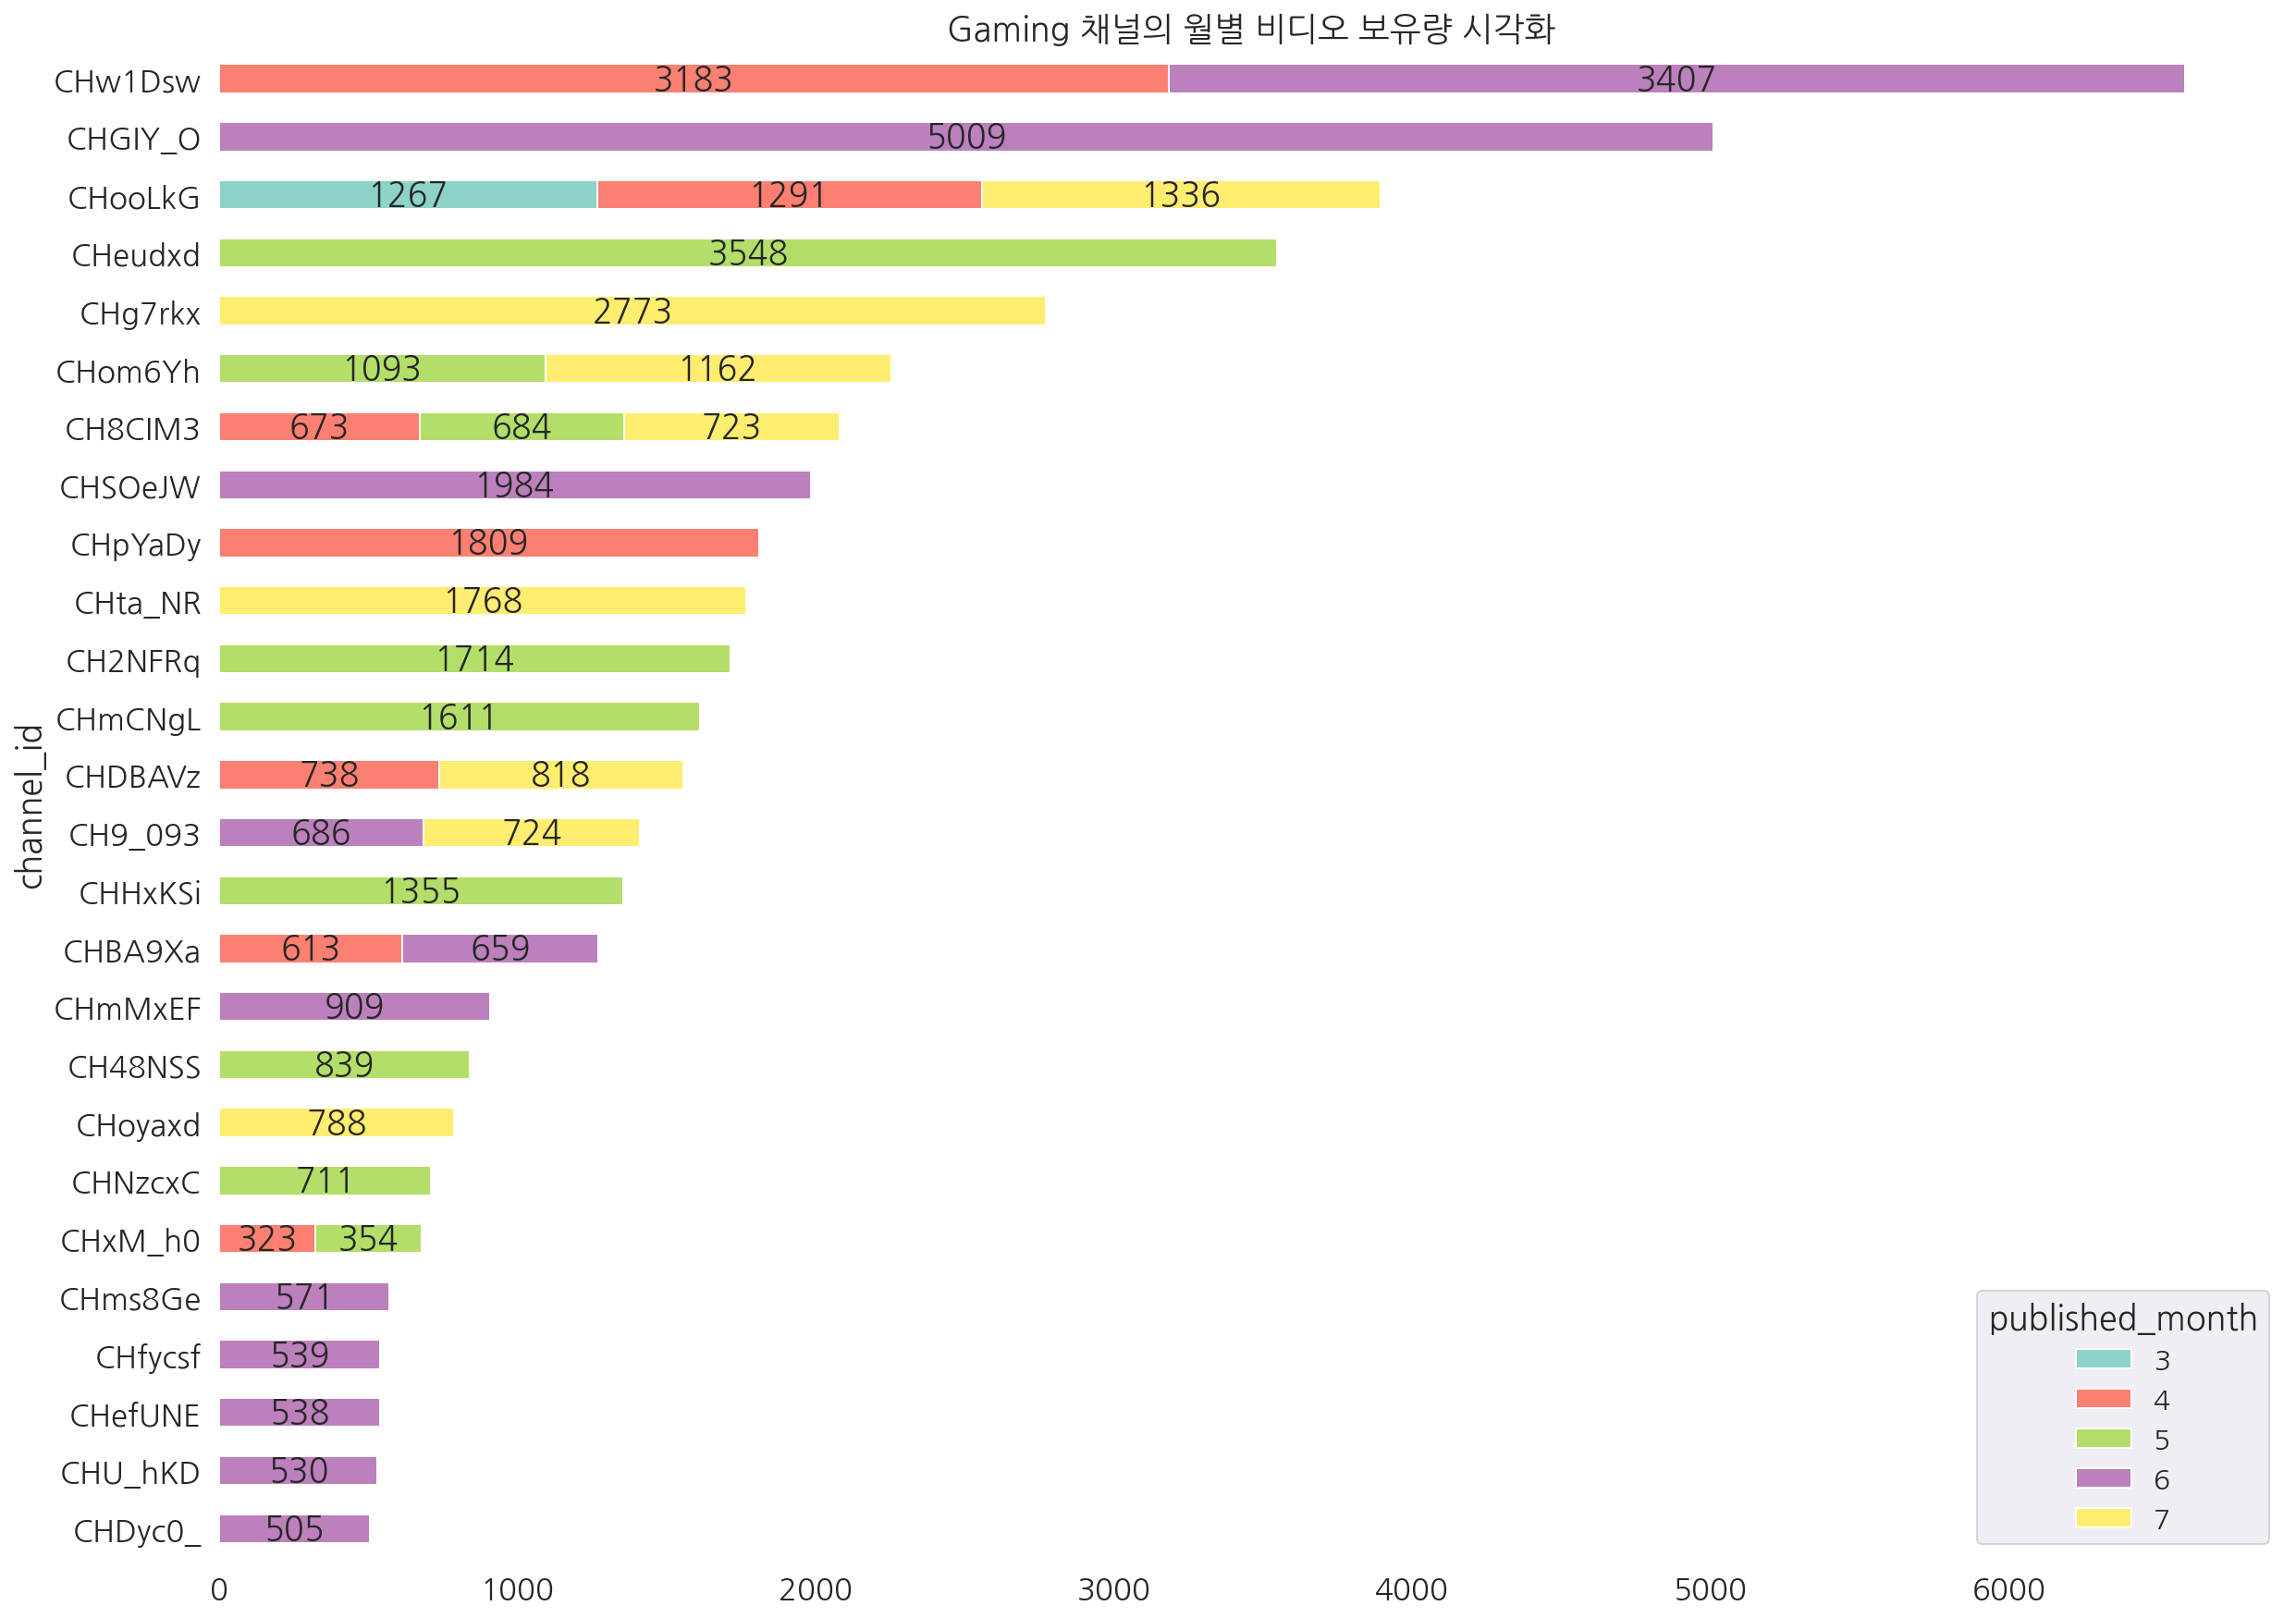

In [ ]:
# plot data in stack manner of bar type
ax = Gaming_df[Gaming_df['sum']>=500][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[7]} 채널의 월별 비디오 보유량 시각화", figsize =(20,15), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

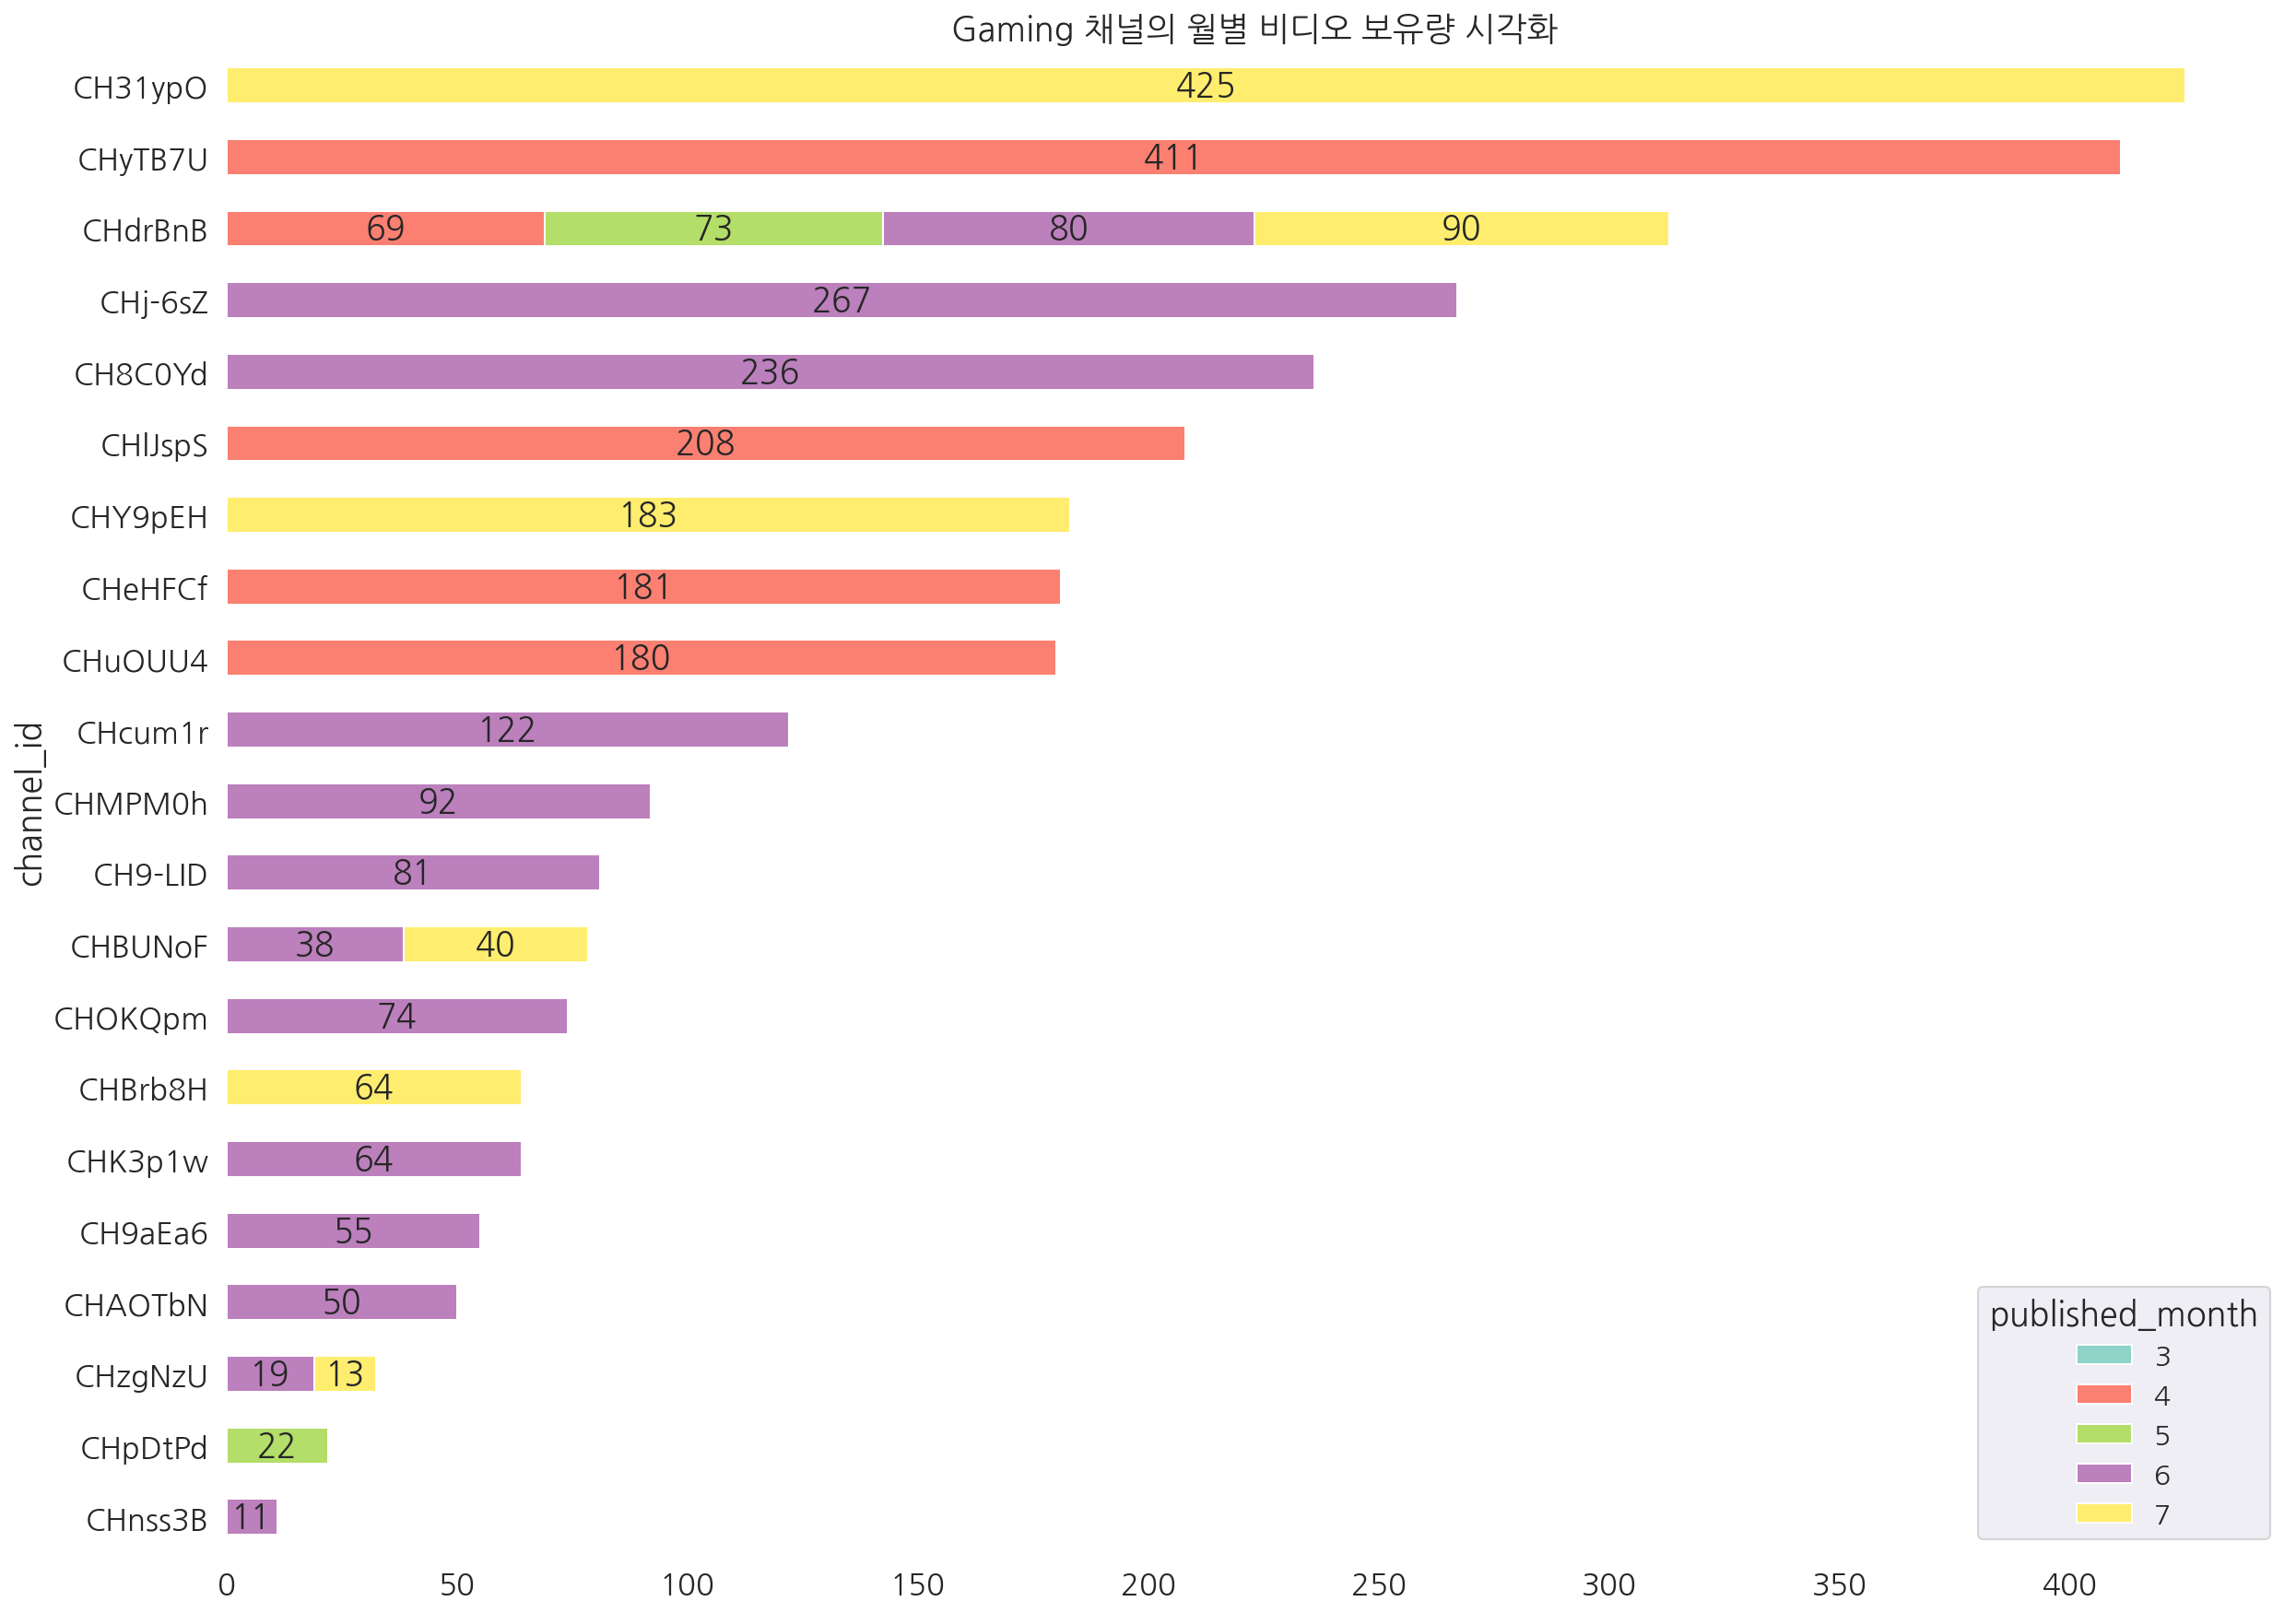

In [ ]:
# plot data in stack manner of bar type
ax = Gaming_df[Gaming_df['sum']<500][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[7]} 채널의 월별 비디오 보유량 시각화", figsize =(20,15), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

### 8.Film & Animation

In [ ]:
category[8]

'Film & Animation'

In [ ]:
# Film & Animation	카테고리만 추출
Film = month_df[month_df['category_name']==category[8]]
Film_df = Film['on_channel_total_videos'].groupby([Film['channel_id'], Film['published_month']]).mean().unstack('published_month')

In [ ]:
# Film & Animation 카테고리에 속한 'channel_id'의 개수
Film['channel_id'].unique().shape

(27,)

Film & Animation 카테고리에서 채널별로 월별 비디오 보유량을 봅시다.

In [ ]:
Film_df

published_month      3            4            5           6      7
channel_id                                                         
CH3zQwS            NaN          NaN          NaN         NaN   96.0
CH6q6s6          244.0   268.000000          NaN         NaN  372.0
CH6u3fo            NaN   131.500000   136.000000  143.000000  145.5
CHCcE8B            NaN          NaN   213.000000         NaN    NaN
CHFnuC4            NaN          NaN          NaN         NaN  225.0
CHH3mJ-            NaN  5079.000000          NaN         NaN    NaN
CHHj3qb            NaN          NaN  1759.666667         NaN    NaN
CHK9PdJ            NaN   147.000000   160.000000         NaN    NaN
CHRI5Ze            NaN          NaN   203.000000         NaN    NaN
CHRuSxV          272.0   276.000000   283.000000  289.333333  294.0
CHSB5FO            NaN          NaN   286.000000  293.000000    NaN
CHUK4Yj            NaN   103.000000          NaN  121.333333  126.0
CHW0gUN            NaN   600.000000          NaN         NaN    NaN
CHY2wHB            NaN          NaN   703.000000         NaN    NaN
CHaT8jY            NaN          NaN          NaN         NaN   91.5
CHdq61m            NaN    80.000000          NaN         NaN    NaN
CHgmmc5            NaN          NaN          NaN  441.000000    NaN
CHi-XI2            NaN    61.000000    65.000000         NaN   74.0
CHlN3o2            NaN          NaN    90.000000         NaN    NaN
CHs0P4G            NaN          NaN          NaN         NaN  475.0
CHszFjh            NaN   248.666667   265.333333  300.000000  327.6
CHuKKkB            NaN          NaN          NaN         NaN   50.0
CHuRZ7_            NaN          NaN          NaN   33.000000    NaN
CHxDsmO            NaN   100.000000          NaN         NaN    NaN
CHxlv4a            NaN          NaN   476.000000         NaN    NaN
CHym553            NaN   642.000000          NaN         NaN    NaN
CHz2Kbg            NaN   136.000000   149.000000  166.000000    NaN

In [ ]:
Film_df.shape

(27, 5)

In [ ]:
Film_df['sum'] = Film_df.T.sum()

시각화할 채널수가 27밖에 되지 않아서 그대로 진행합니다.

In [ ]:
Film_df = Film_df.sort_values('sum')

In [ ]:
Film_df

published_month      3            4            5           6      7  \
channel_id                                                            
CHuRZ7_            NaN          NaN          NaN   33.000000    NaN   
CHuKKkB            NaN          NaN          NaN         NaN   50.0   
CHdq61m            NaN    80.000000          NaN         NaN    NaN   
CHlN3o2            NaN          NaN    90.000000         NaN    NaN   
CHaT8jY            NaN          NaN          NaN         NaN   91.5   
CH3zQwS            NaN          NaN          NaN         NaN   96.0   
CHxDsmO            NaN   100.000000          NaN         NaN    NaN   
CHi-XI2            NaN    61.000000    65.000000         NaN   74.0   
CHRI5Ze            NaN          NaN   203.000000         NaN    NaN   
CHCcE8B            NaN          NaN   213.000000         NaN    NaN   
CHFnuC4            NaN          NaN          NaN         NaN  225.0   
CHK9PdJ            NaN   147.000000   160.000000         NaN    NaN   
CHUK4Yj            NaN   103.000000          NaN  121.333333  126.0   
CHgmmc5            NaN          NaN          NaN  441.000000    NaN   
CHz2Kbg            NaN   136.000000   149.000000  166.000000    NaN   
CHs0P4G            NaN          NaN          NaN         NaN  475.0   
CHxlv4a            NaN          NaN   476.000000         NaN    NaN   
CH6u3fo            NaN   131.500000   136.000000  143.000000  145.5   
CHSB5FO            NaN          NaN   286.000000  293.000000    NaN   
CHW0gUN            NaN   600.000000          NaN         NaN    NaN   
CHym553            NaN   642.000000          NaN         NaN    NaN   
CHY2wHB            NaN          NaN   703.000000         NaN    NaN   
CH6q6s6          244.0   268.000000          NaN         NaN  372.0   
CHszFjh            NaN   248.666667   265.333333  300.000000  327.6   
CHRuSxV          272.0   276.000000   283.000000  289.333333  294.0   
CHHj3qb            NaN          NaN  1759.666667         NaN    NaN   
CHH3mJ-            NaN  5079.000000          NaN         NaN    NaN   

published_month          sum  
channel_id                    
CHuRZ7_            33.000000  
CHuKKkB            50.000000  
CHdq61m            80.000000  
CHlN3o2            90.000000  
CHaT8jY            91.500000  
CH3zQwS            96.000000  
CHxDsmO           100.000000  
CHi-XI2           200.000000  
CHRI5Ze           203.000000  
CHCcE8B           213.000000  
CHFnuC4           225.000000  
CHK9PdJ           307.000000  
CHUK4Yj           350.333333  
CHgmmc5           441.000000  
CHz2Kbg           451.000000  
CHs0P4G           475.000000  
CHxlv4a           476.000000  
CH6u3fo           556.000000  
CHSB5FO           579.000000  
CHW0gUN           600.000000  
CHym553           642.000000  
CHY2wHB           703.000000  
CH6q6s6           884.000000  
CHszFjh          1141.600000  
CHRuSxV          1414.333333  
CHHj3qb          1759.666667  
CHH3mJ-          5079.000000

아웃라이어인 'CHH3mJ-'는 제외합니다. 

In [ ]:
Film_df_loc = Film_df.iloc[:-1]

In [ ]:
Film_df_loc.shape

(26, 6)

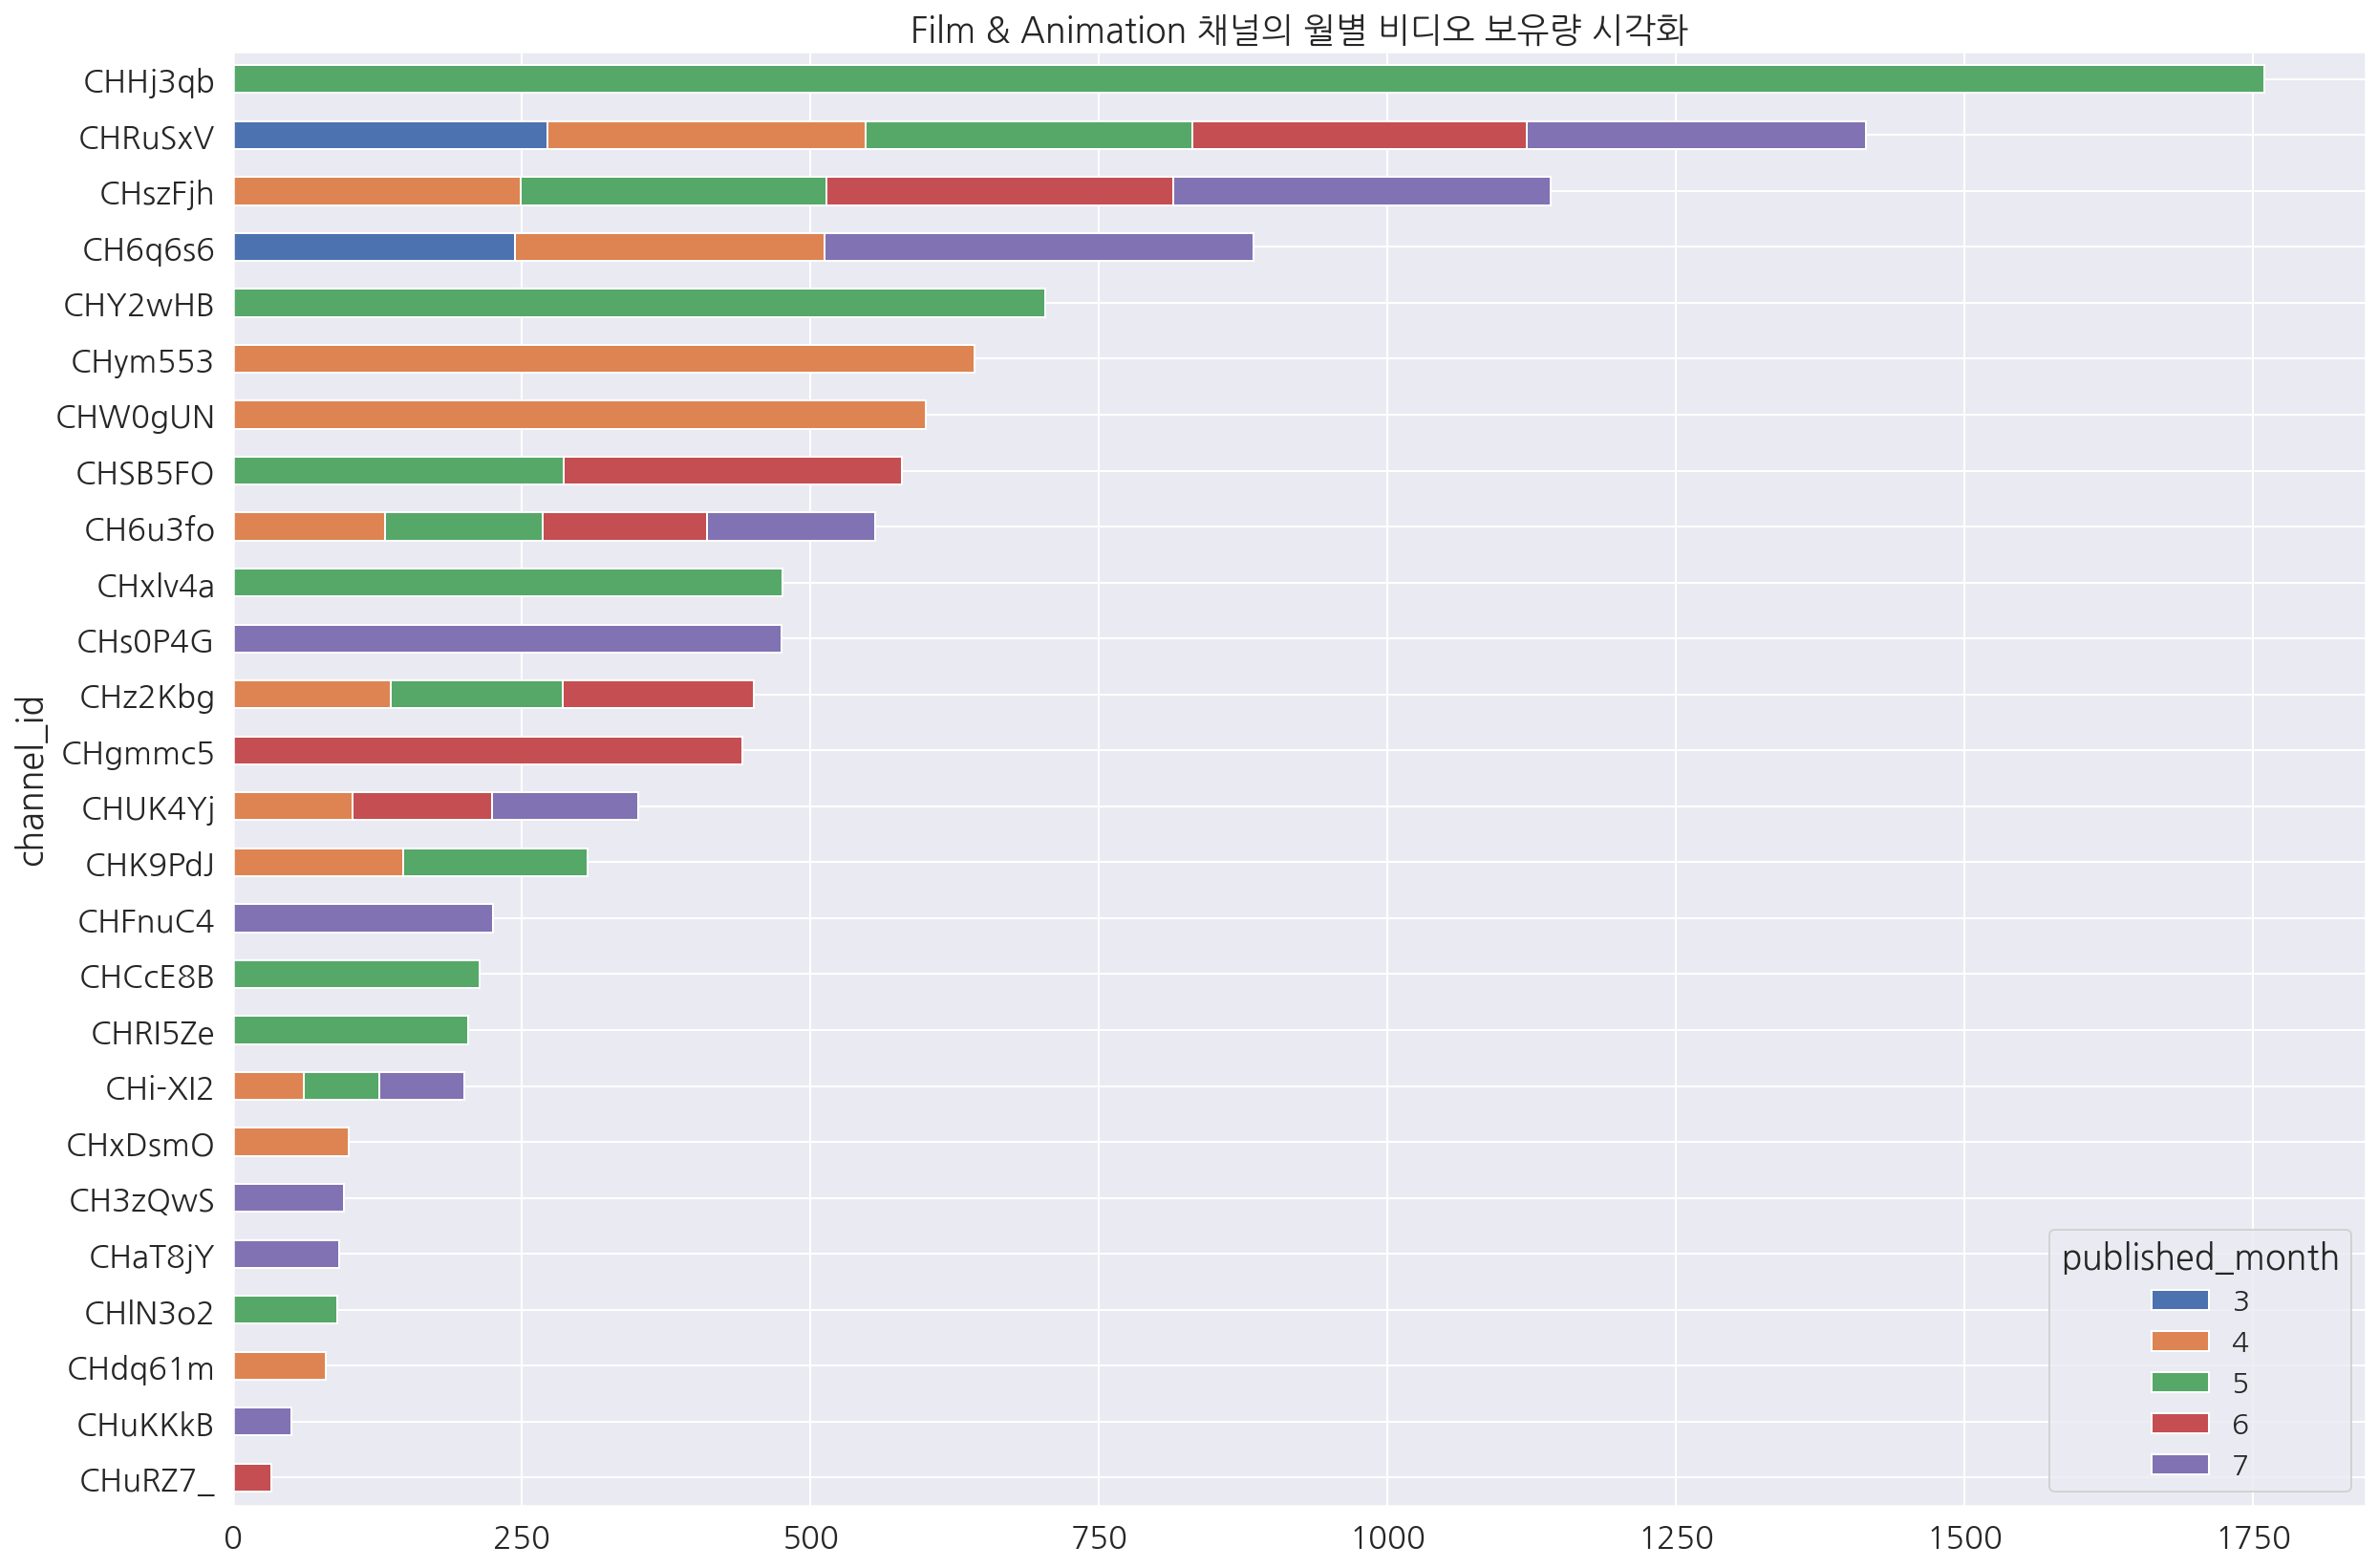

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot data in stack manner of bar type
ax = Film_df_loc[[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[8]} 채널의 월별 비디오 보유량 시각화", figsize =(20,14))
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

plt.show();

비디오 보유량 순으로 보겠습니다.

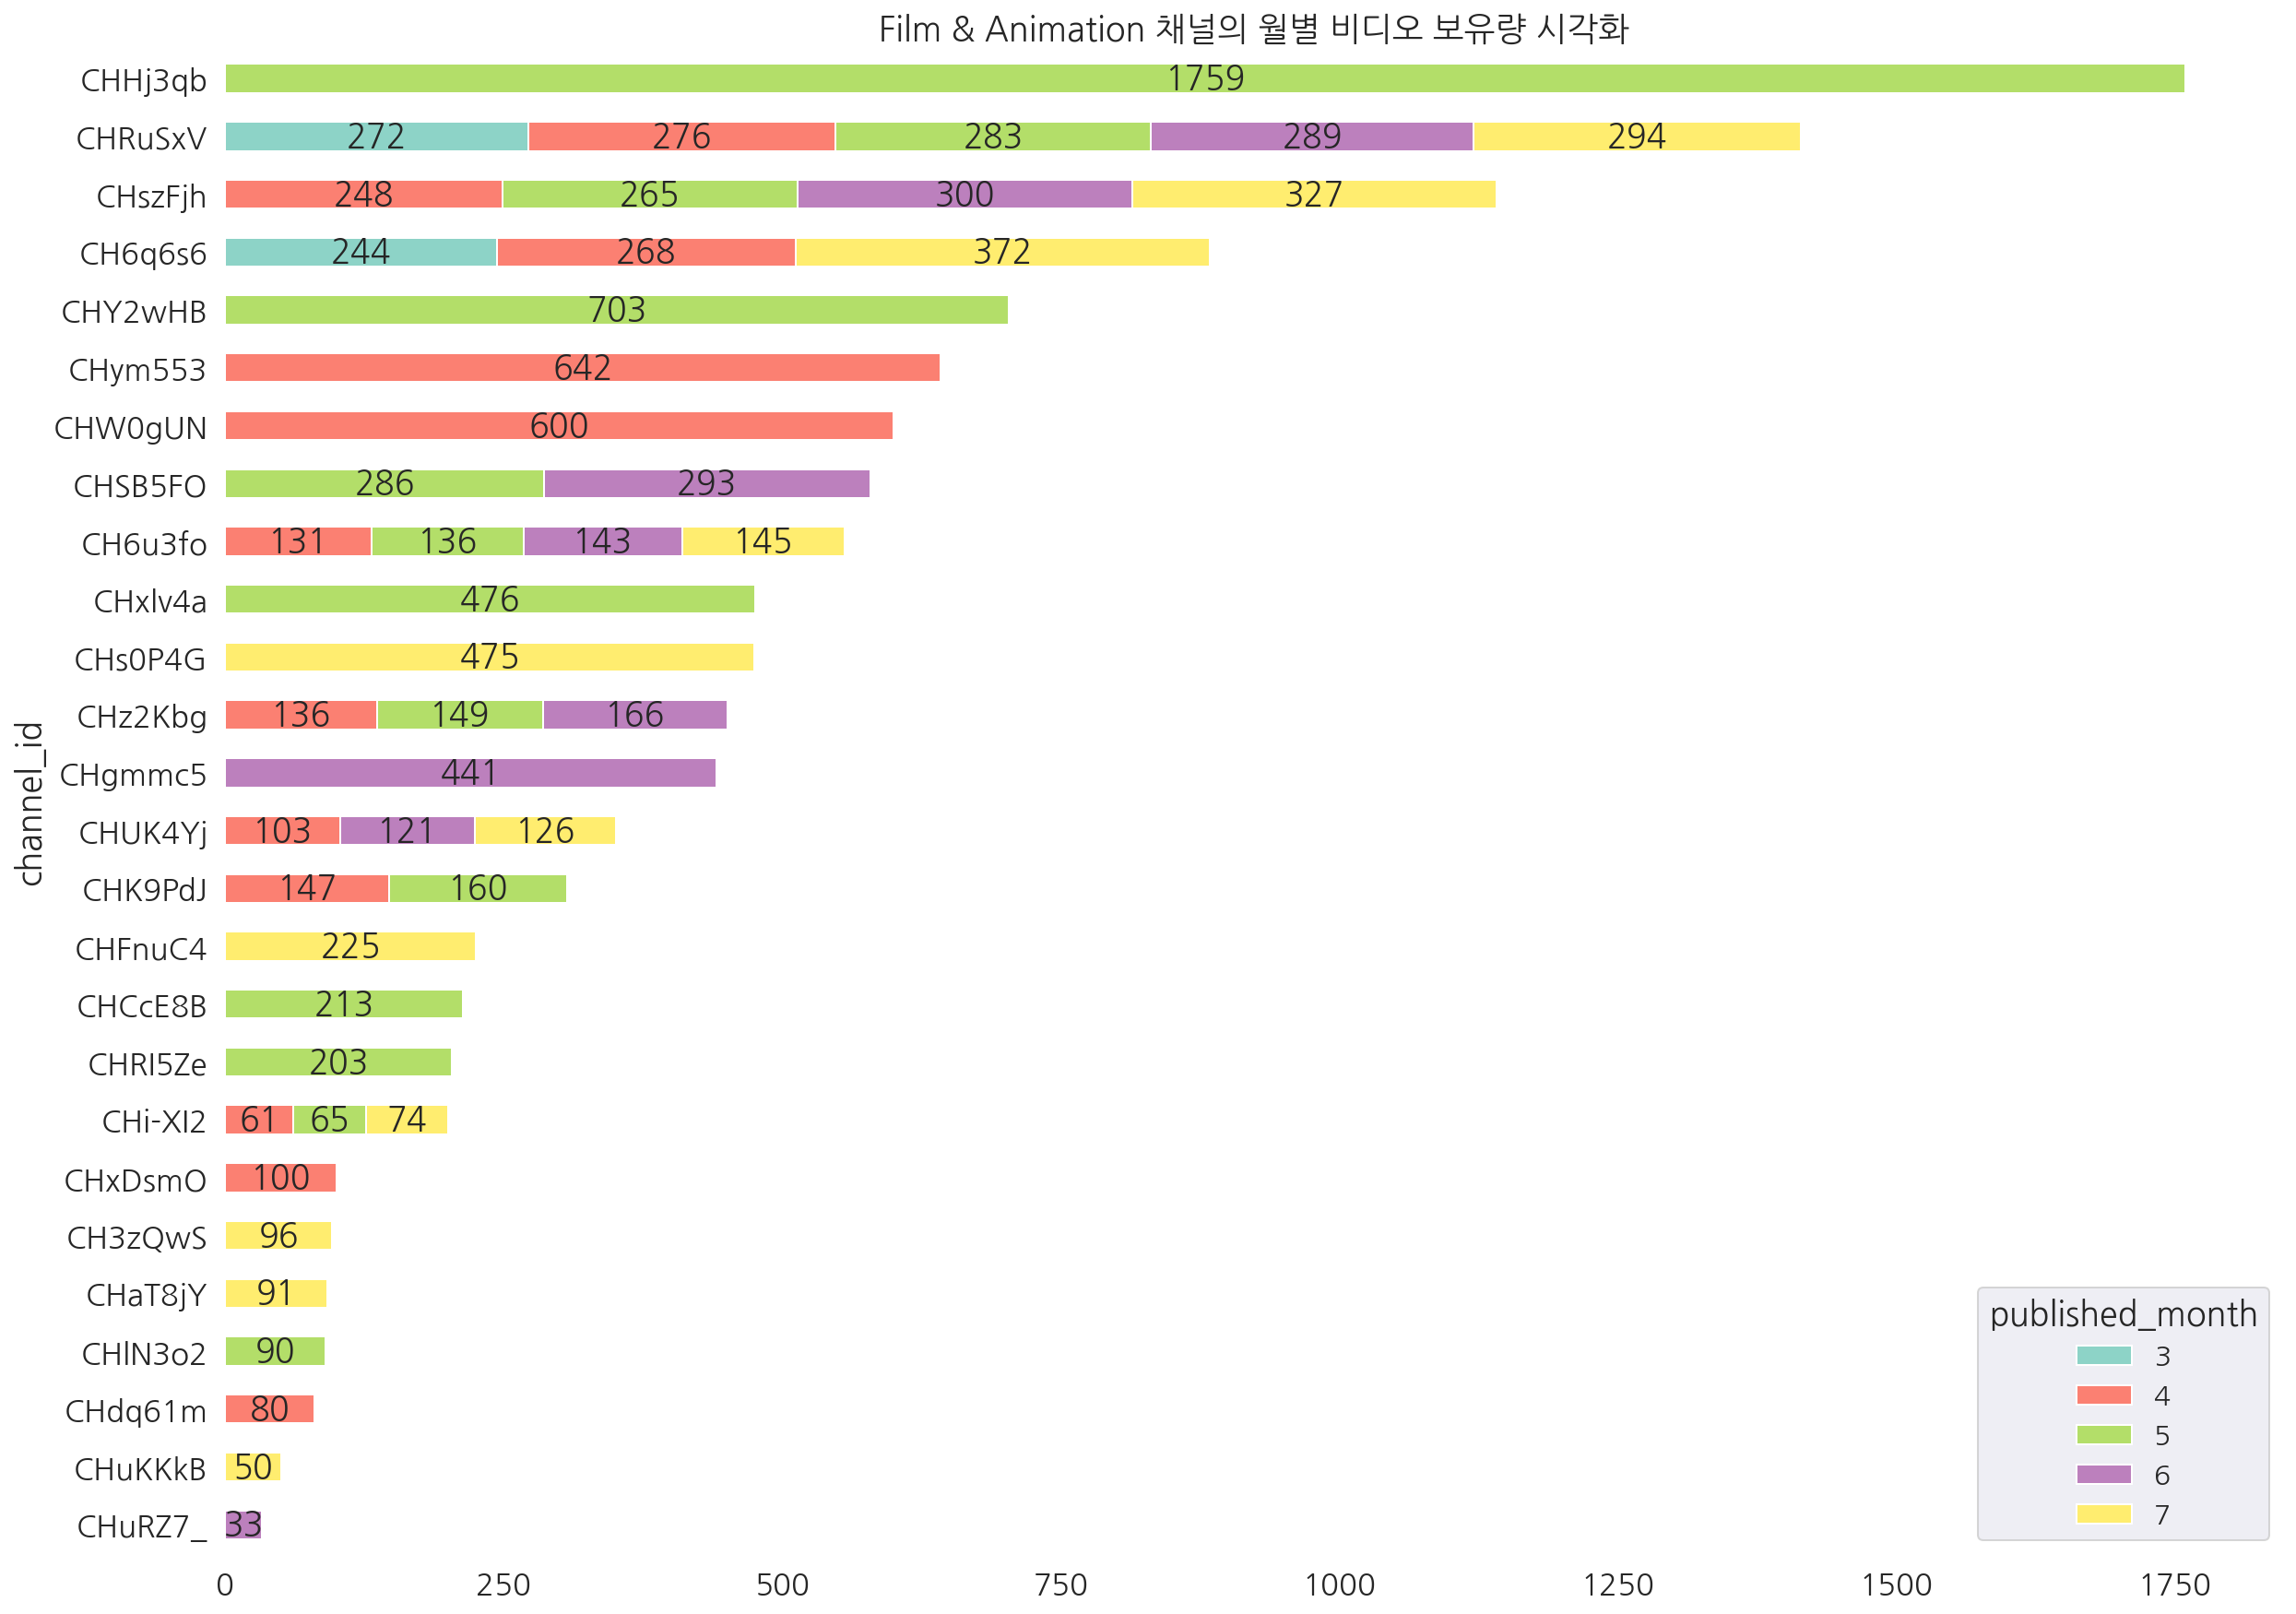

In [ ]:
# plot data in stack manner of bar type
ax = Film_df_loc[[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[8]} 채널의 월별 비디오 보유량 시각화", figsize =(20,15), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

### 9.Education

In [ ]:
category[9]

'Education'

In [ ]:
# Education	카테고리만 추출
Education = month_df[month_df['category_name']==category[9]]
Education_df = Education['on_channel_total_videos'].groupby([Education['channel_id'], Education['published_month']]).mean().unstack('published_month')

In [ ]:
# Education 카테고리에 속한 'channel_id'의 개수
Education['channel_id'].unique().shape

(27,)

Education 카테고리에서 채널별로 월별 비디오 보유량을 봅시다.

In [ ]:
Education_df

published_month      3       4            5       6           7
channel_id                                                     
CH-9RQC            NaN     NaN          NaN  2290.0         NaN
CH1-lwA            NaN    60.0          NaN    72.0         NaN
CH5YHB-          402.0     NaN          NaN     NaN         NaN
CH6xugt            NaN     NaN          NaN   298.0         NaN
CH7F6UD            NaN     NaN          NaN   268.0  270.666667
CHBJs8l            NaN     NaN   391.500000     NaN  418.000000
CHBM86J            NaN   287.0          NaN     NaN         NaN
CHCt6iN            NaN   293.0          NaN     NaN  358.000000
CHD902z            NaN     NaN          NaN   197.0  204.000000
CHHpIHu            NaN   907.0   921.500000     NaN         NaN
CHJ7LVh            NaN   182.0   197.000000     NaN         NaN
CHMFk5S            NaN     NaN          NaN     NaN  441.000000
CHO0OSA            NaN     NaN    57.000000     NaN         NaN
CHPvwqh            NaN     NaN          NaN   381.0         NaN
CHZ4T91            NaN     NaN          NaN     NaN  926.000000
CHcWXel            NaN     NaN   167.000000     NaN         NaN
CHgheNM            NaN  1937.0          NaN     NaN         NaN
CHiV4_c            NaN     NaN          NaN  5249.0         NaN
CHicKQU          573.5   577.4   583.333333     NaN         NaN
CHjPqSb            NaN     NaN          NaN  2376.0         NaN
CHl7MKZ            NaN   224.5   237.333333   250.5         NaN
CHma37f            NaN     NaN  5260.000000     NaN         NaN
CHnLO88            NaN     NaN    94.000000     NaN         NaN
CHnaGfD            NaN  1555.5          NaN  1581.0         NaN
CHuh6Br            NaN   152.5   159.000000   161.5         NaN
CHvW8no          155.0     NaN          NaN   174.0         NaN
CHznImS            NaN     NaN   336.000000     NaN         NaN

In [ ]:
Education_df.shape

(27, 5)

In [ ]:
Education_df['sum'] = Education_df.T.sum()

시각화할 채널수가 27밖에 되지 않아서 그대로 진행합니다.

In [ ]:
Education_df = Education_df.sort_values('sum')

In [ ]:
Education_df

published_month      3       4            5       6           7          sum
channel_id                                                                  
CHO0OSA            NaN     NaN    57.000000     NaN         NaN    57.000000
CHnLO88            NaN     NaN    94.000000     NaN         NaN    94.000000
CH1-lwA            NaN    60.0          NaN    72.0         NaN   132.000000
CHcWXel            NaN     NaN   167.000000     NaN         NaN   167.000000
CHBM86J            NaN   287.0          NaN     NaN         NaN   287.000000
CH6xugt            NaN     NaN          NaN   298.0         NaN   298.000000
CHvW8no          155.0     NaN          NaN   174.0         NaN   329.000000
CHznImS            NaN     NaN   336.000000     NaN         NaN   336.000000
CHJ7LVh            NaN   182.0   197.000000     NaN         NaN   379.000000
CHPvwqh            NaN     NaN          NaN   381.0         NaN   381.000000
CHD902z            NaN     NaN          NaN   197.0  204.000000   401.000000
CH5YHB-          402.0     NaN          NaN     NaN         NaN   402.000000
CHMFk5S            NaN     NaN          NaN     NaN  441.000000   441.000000
CHuh6Br            NaN   152.5   159.000000   161.5         NaN   473.000000
CH7F6UD            NaN     NaN          NaN   268.0  270.666667   538.666667
CHCt6iN            NaN   293.0          NaN     NaN  358.000000   651.000000
CHl7MKZ            NaN   224.5   237.333333   250.5         NaN   712.333333
CHBJs8l            NaN     NaN   391.500000     NaN  418.000000   809.500000
CHZ4T91            NaN     NaN          NaN     NaN  926.000000   926.000000
CHicKQU          573.5   577.4   583.333333     NaN         NaN  1734.233333
CHHpIHu            NaN   907.0   921.500000     NaN         NaN  1828.500000
CHgheNM            NaN  1937.0          NaN     NaN         NaN  1937.000000
CH-9RQC            NaN     NaN          NaN  2290.0         NaN  2290.000000
CHjPqSb            NaN     NaN          NaN  2376.0         NaN  2376.000000
CHnaGfD            NaN  1555.5          NaN  1581.0         NaN  3136.500000
CHiV4_c            NaN     NaN          NaN  5249.0         NaN  5249.000000
CHma37f            NaN     NaN  5260.000000     NaN         NaN  5260.000000

특별한 아웃라이어는 발견되지 않습니다. 그대로 진행합니다. 

In [ ]:
Education_df.shape

(27, 6)

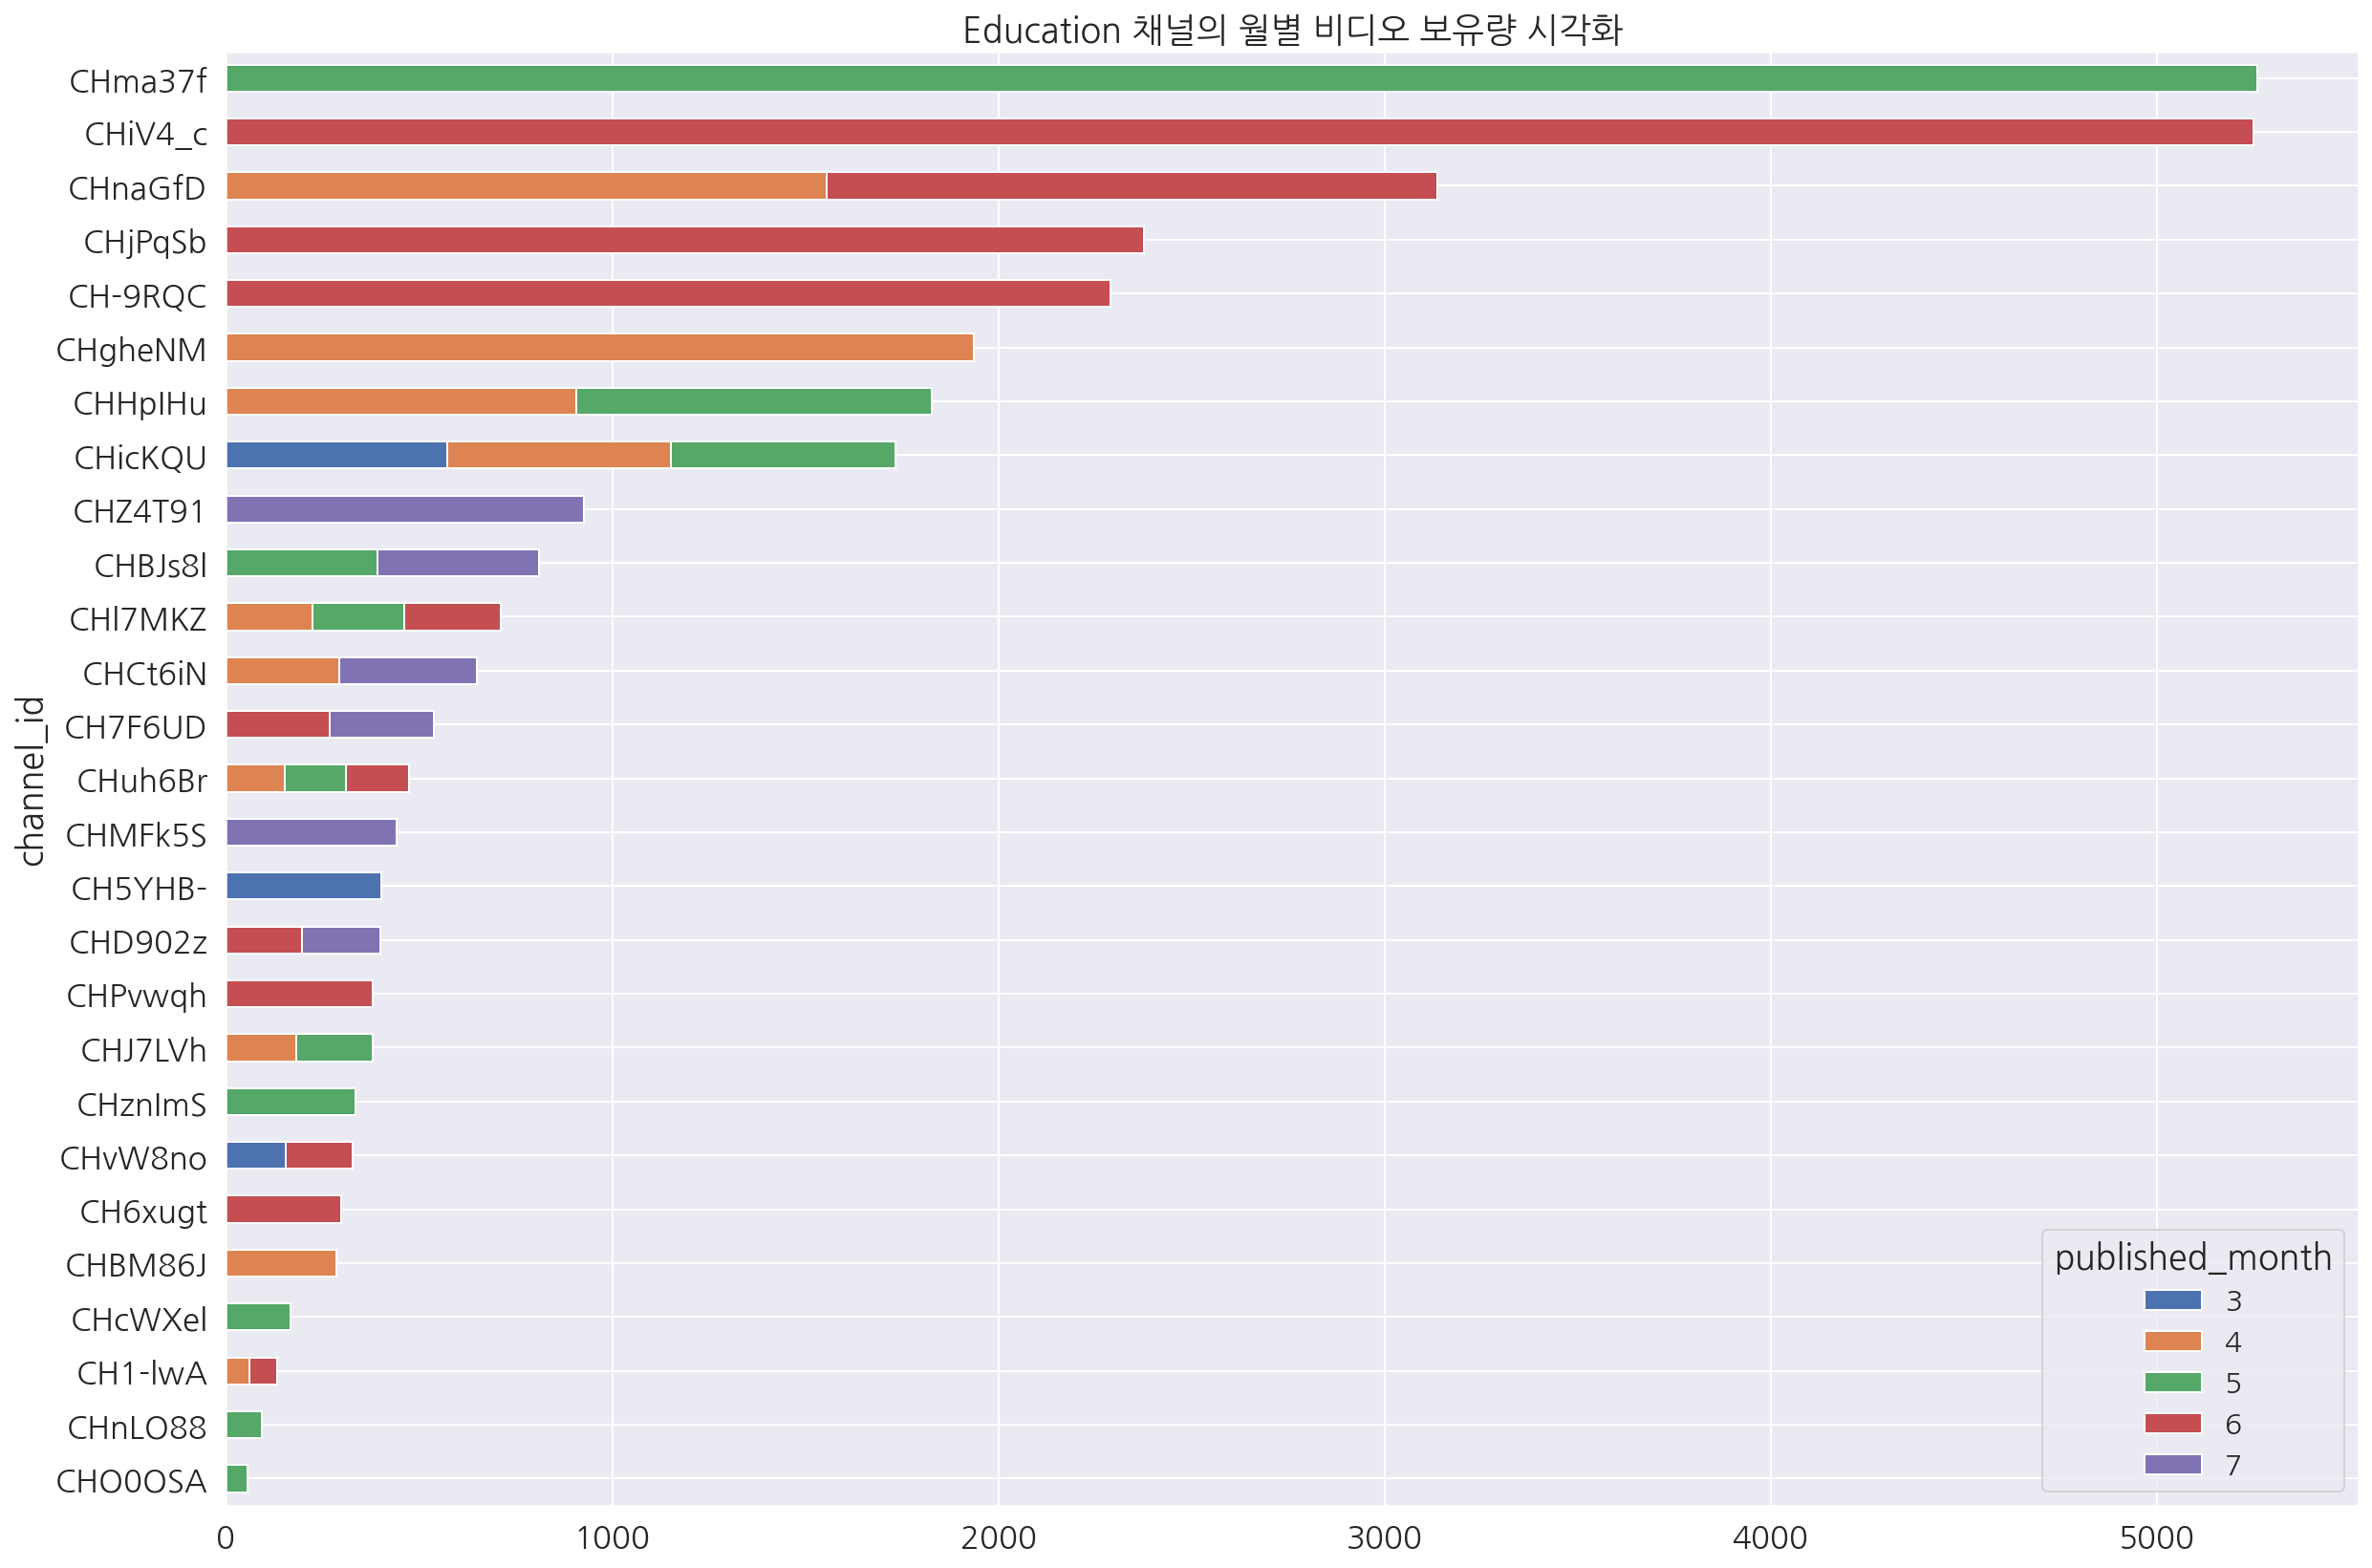

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot data in stack manner of bar type
ax = Education_df[[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[9]} 채널의 월별 비디오 보유량 시각화", figsize =(20,14))
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

plt.show();

비디오 보유량 순으로 잘라서 보겠습니다.

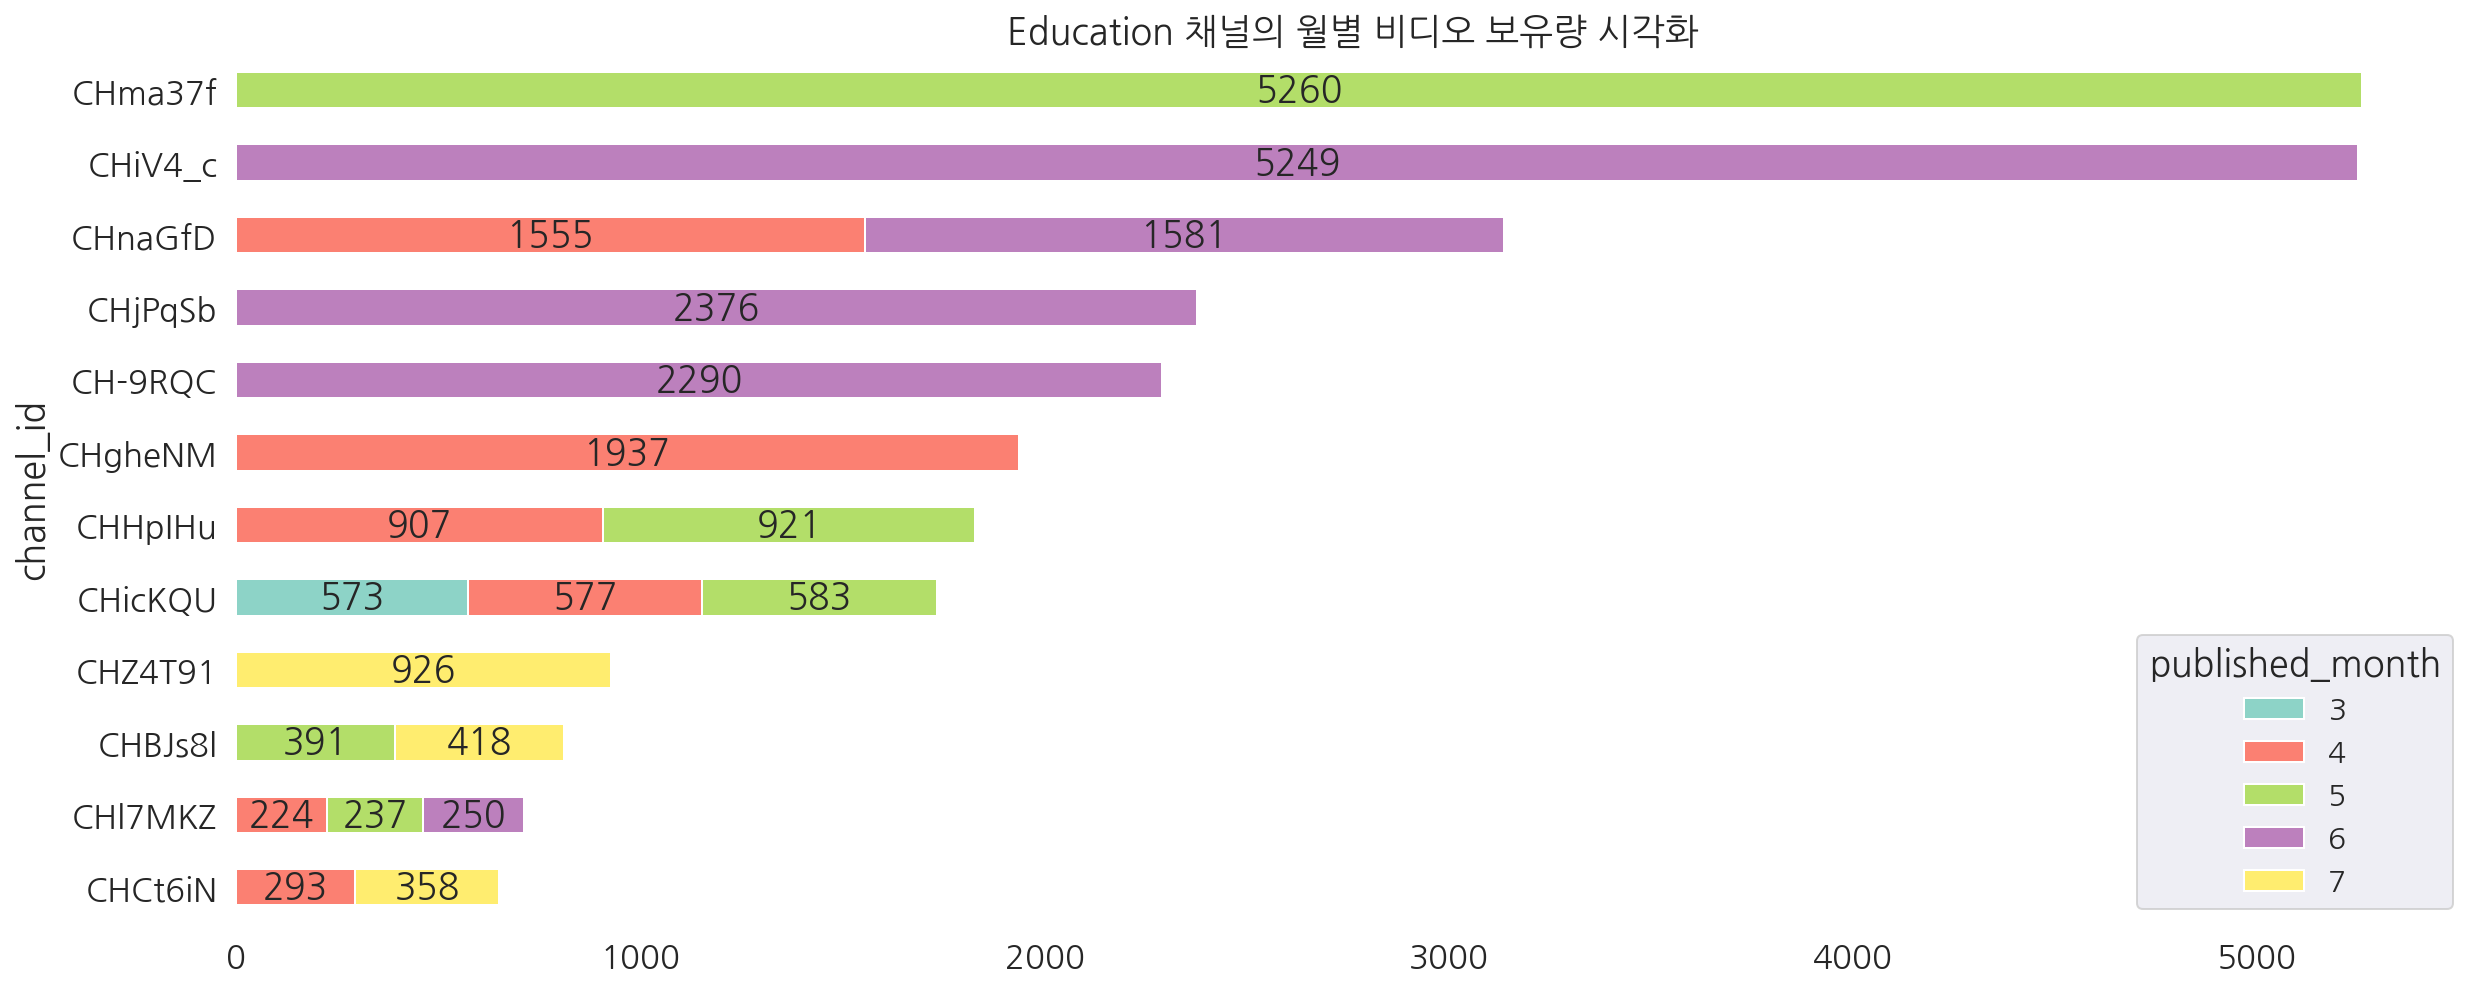

In [ ]:
# plot data in stack manner of bar type
ax = Education_df[Education_df['sum'] >600][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[9]} 채널의 월별 비디오 보유량 시각화", figsize =(20,8), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

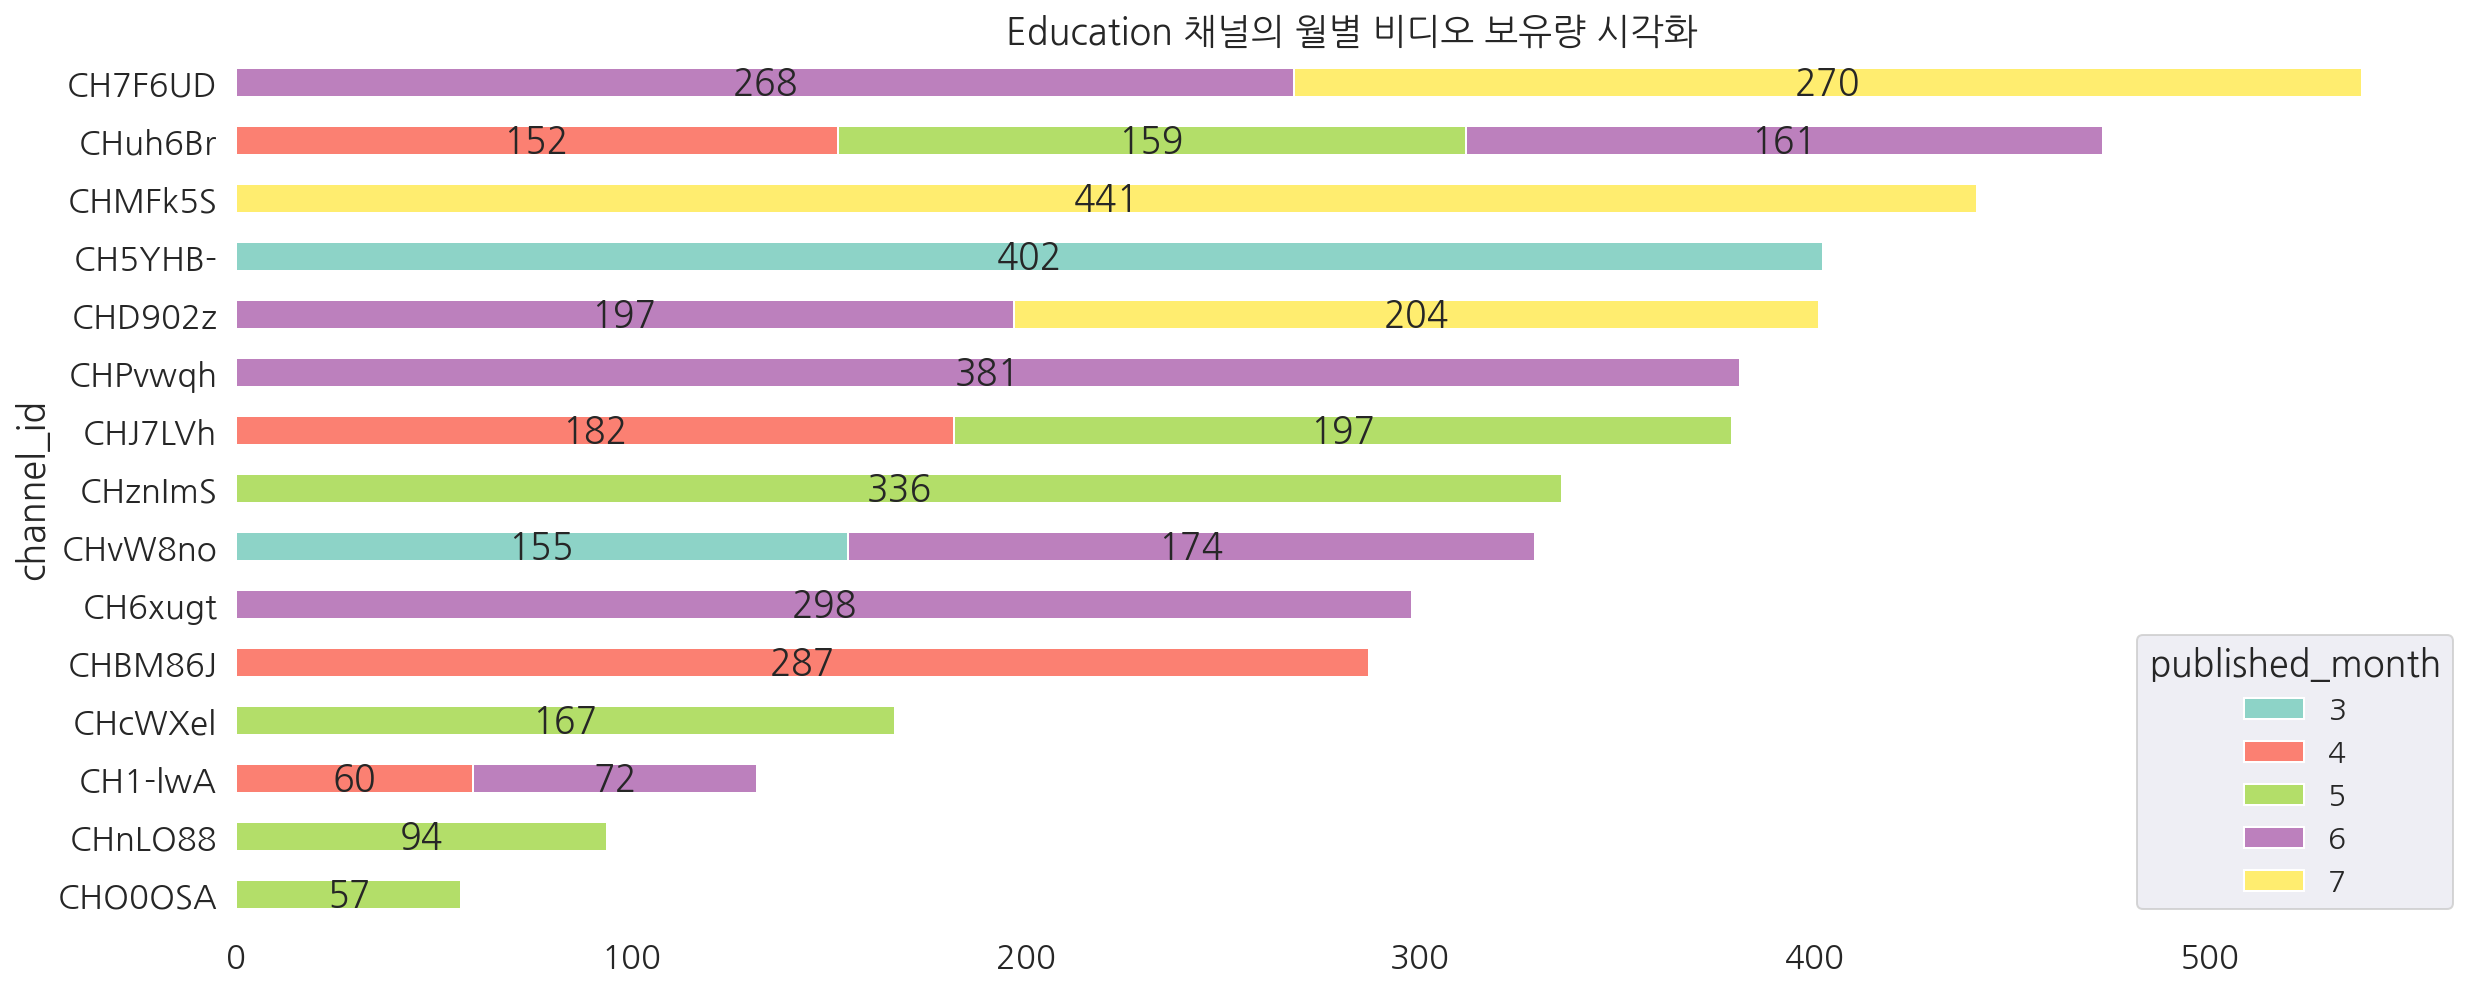

In [ ]:
# plot data in stack manner of bar type
ax = Education_df[Education_df['sum'] <600][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[9]} 채널의 월별 비디오 보유량 시각화", figsize =(20,8), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

### 10.Pets & Animals

In [ ]:
category[10]

'Pets & Animals'

In [ ]:
# Pets & Animals	카테고리만 추출
Pets = month_df[month_df['category_name']==category[10]]
Pets_df = Pets['on_channel_total_videos'].groupby([Pets['channel_id'], Pets['published_month']]).mean().unstack('published_month')

In [ ]:
# Pets & Animals 카테고리에 속한 'channel_id'의 개수
Pets['channel_id'].unique().shape

(27,)

Pets & Animals 카테고리에서 채널별로 월별 비디오 보유량을 봅시다.

In [ ]:
Pets_df

published_month      3       4       5       6            7
channel_id                                                 
CH-IYpd            NaN     NaN     NaN     NaN   372.000000
CH04-af            NaN     NaN     NaN    58.0          NaN
CH22go5            NaN  2810.0  2865.0     NaN          NaN
CH29-Il            NaN     NaN     NaN     NaN   265.833333
CH3PSZi            NaN     NaN     NaN   294.5   309.000000
CH5AAf4            NaN     NaN     NaN     NaN   434.000000
CH69l_r            NaN     NaN   176.5   186.5   193.000000
CH89A41            NaN     NaN     NaN     NaN    58.500000
CHAhKKb            NaN     NaN   934.0  1171.0  1318.333333
CHETBLy            NaN     NaN     NaN   368.0          NaN
CHHLDBh            NaN     NaN     NaN   321.5   328.000000
CHHXnna            NaN   204.0     NaN   243.0          NaN
CHHgL0B            NaN     NaN     NaN   206.0          NaN
CHOp66V          365.0     NaN     NaN   394.0   401.500000
CHOv1v2            NaN     NaN  1413.0  1419.0  1451.000000
CHP1CQH          293.0     NaN     NaN     NaN          NaN
CHPTM-N            NaN   443.0     NaN   476.0   501.000000
CHX2laR            NaN  1092.0     NaN     NaN          NaN
CHa2LU4            NaN     NaN     NaN     NaN   321.000000
CHd1TDy            NaN     NaN     NaN     NaN   531.000000
CHf0Mkc            NaN     NaN     NaN   127.0          NaN
CHgsgpE            NaN   247.0   260.0   264.0   278.000000
CHi_IoQ            NaN     NaN   131.0   133.0          NaN
CHj-rqv            NaN     NaN     NaN    91.0          NaN
CHkuA_g            NaN   220.0     NaN   249.5          NaN
CHtbOb9            NaN   767.0     NaN     NaN          NaN
CHzjDgV            NaN   428.0     NaN     NaN          NaN

In [ ]:
Pets_df.shape

(27, 5)

In [ ]:
Pets_df['sum'] = Pets_df.T.sum()

시각화할 채널수가 27밖에 되지 않아서 그대로 진행합니다.

In [ ]:
Pets_df = Pets_df.sort_values('sum')

In [ ]:
Pets_df

published_month      3       4       5       6            7          sum
channel_id                                                              
CH04-af            NaN     NaN     NaN    58.0          NaN    58.000000
CH89A41            NaN     NaN     NaN     NaN    58.500000    58.500000
CHj-rqv            NaN     NaN     NaN    91.0          NaN    91.000000
CHf0Mkc            NaN     NaN     NaN   127.0          NaN   127.000000
CHHgL0B            NaN     NaN     NaN   206.0          NaN   206.000000
CHi_IoQ            NaN     NaN   131.0   133.0          NaN   264.000000
CH29-Il            NaN     NaN     NaN     NaN   265.833333   265.833333
CHP1CQH          293.0     NaN     NaN     NaN          NaN   293.000000
CHa2LU4            NaN     NaN     NaN     NaN   321.000000   321.000000
CHETBLy            NaN     NaN     NaN   368.0          NaN   368.000000
CH-IYpd            NaN     NaN     NaN     NaN   372.000000   372.000000
CHzjDgV            NaN   428.0     NaN     NaN          NaN   428.000000
CH5AAf4            NaN     NaN     NaN     NaN   434.000000   434.000000
CHHXnna            NaN   204.0     NaN   243.0          NaN   447.000000
CHkuA_g            NaN   220.0     NaN   249.5          NaN   469.500000
CHd1TDy            NaN     NaN     NaN     NaN   531.000000   531.000000
CH69l_r            NaN     NaN   176.5   186.5   193.000000   556.000000
CH3PSZi            NaN     NaN     NaN   294.5   309.000000   603.500000
CHHLDBh            NaN     NaN     NaN   321.5   328.000000   649.500000
CHtbOb9            NaN   767.0     NaN     NaN          NaN   767.000000
CHgsgpE            NaN   247.0   260.0   264.0   278.000000  1049.000000
CHX2laR            NaN  1092.0     NaN     NaN          NaN  1092.000000
CHOp66V          365.0     NaN     NaN   394.0   401.500000  1160.500000
CHPTM-N            NaN   443.0     NaN   476.0   501.000000  1420.000000
CHAhKKb            NaN     NaN   934.0  1171.0  1318.333333  3423.333333
CHOv1v2            NaN     NaN  1413.0  1419.0  1451.000000  4283.000000
CH22go5            NaN  2810.0  2865.0     NaN          NaN  5675.000000

특별한 아웃라이어는 발견되지 않습니다. 그대로 진행합니다. 

In [ ]:
Pets_df.shape

(27, 6)

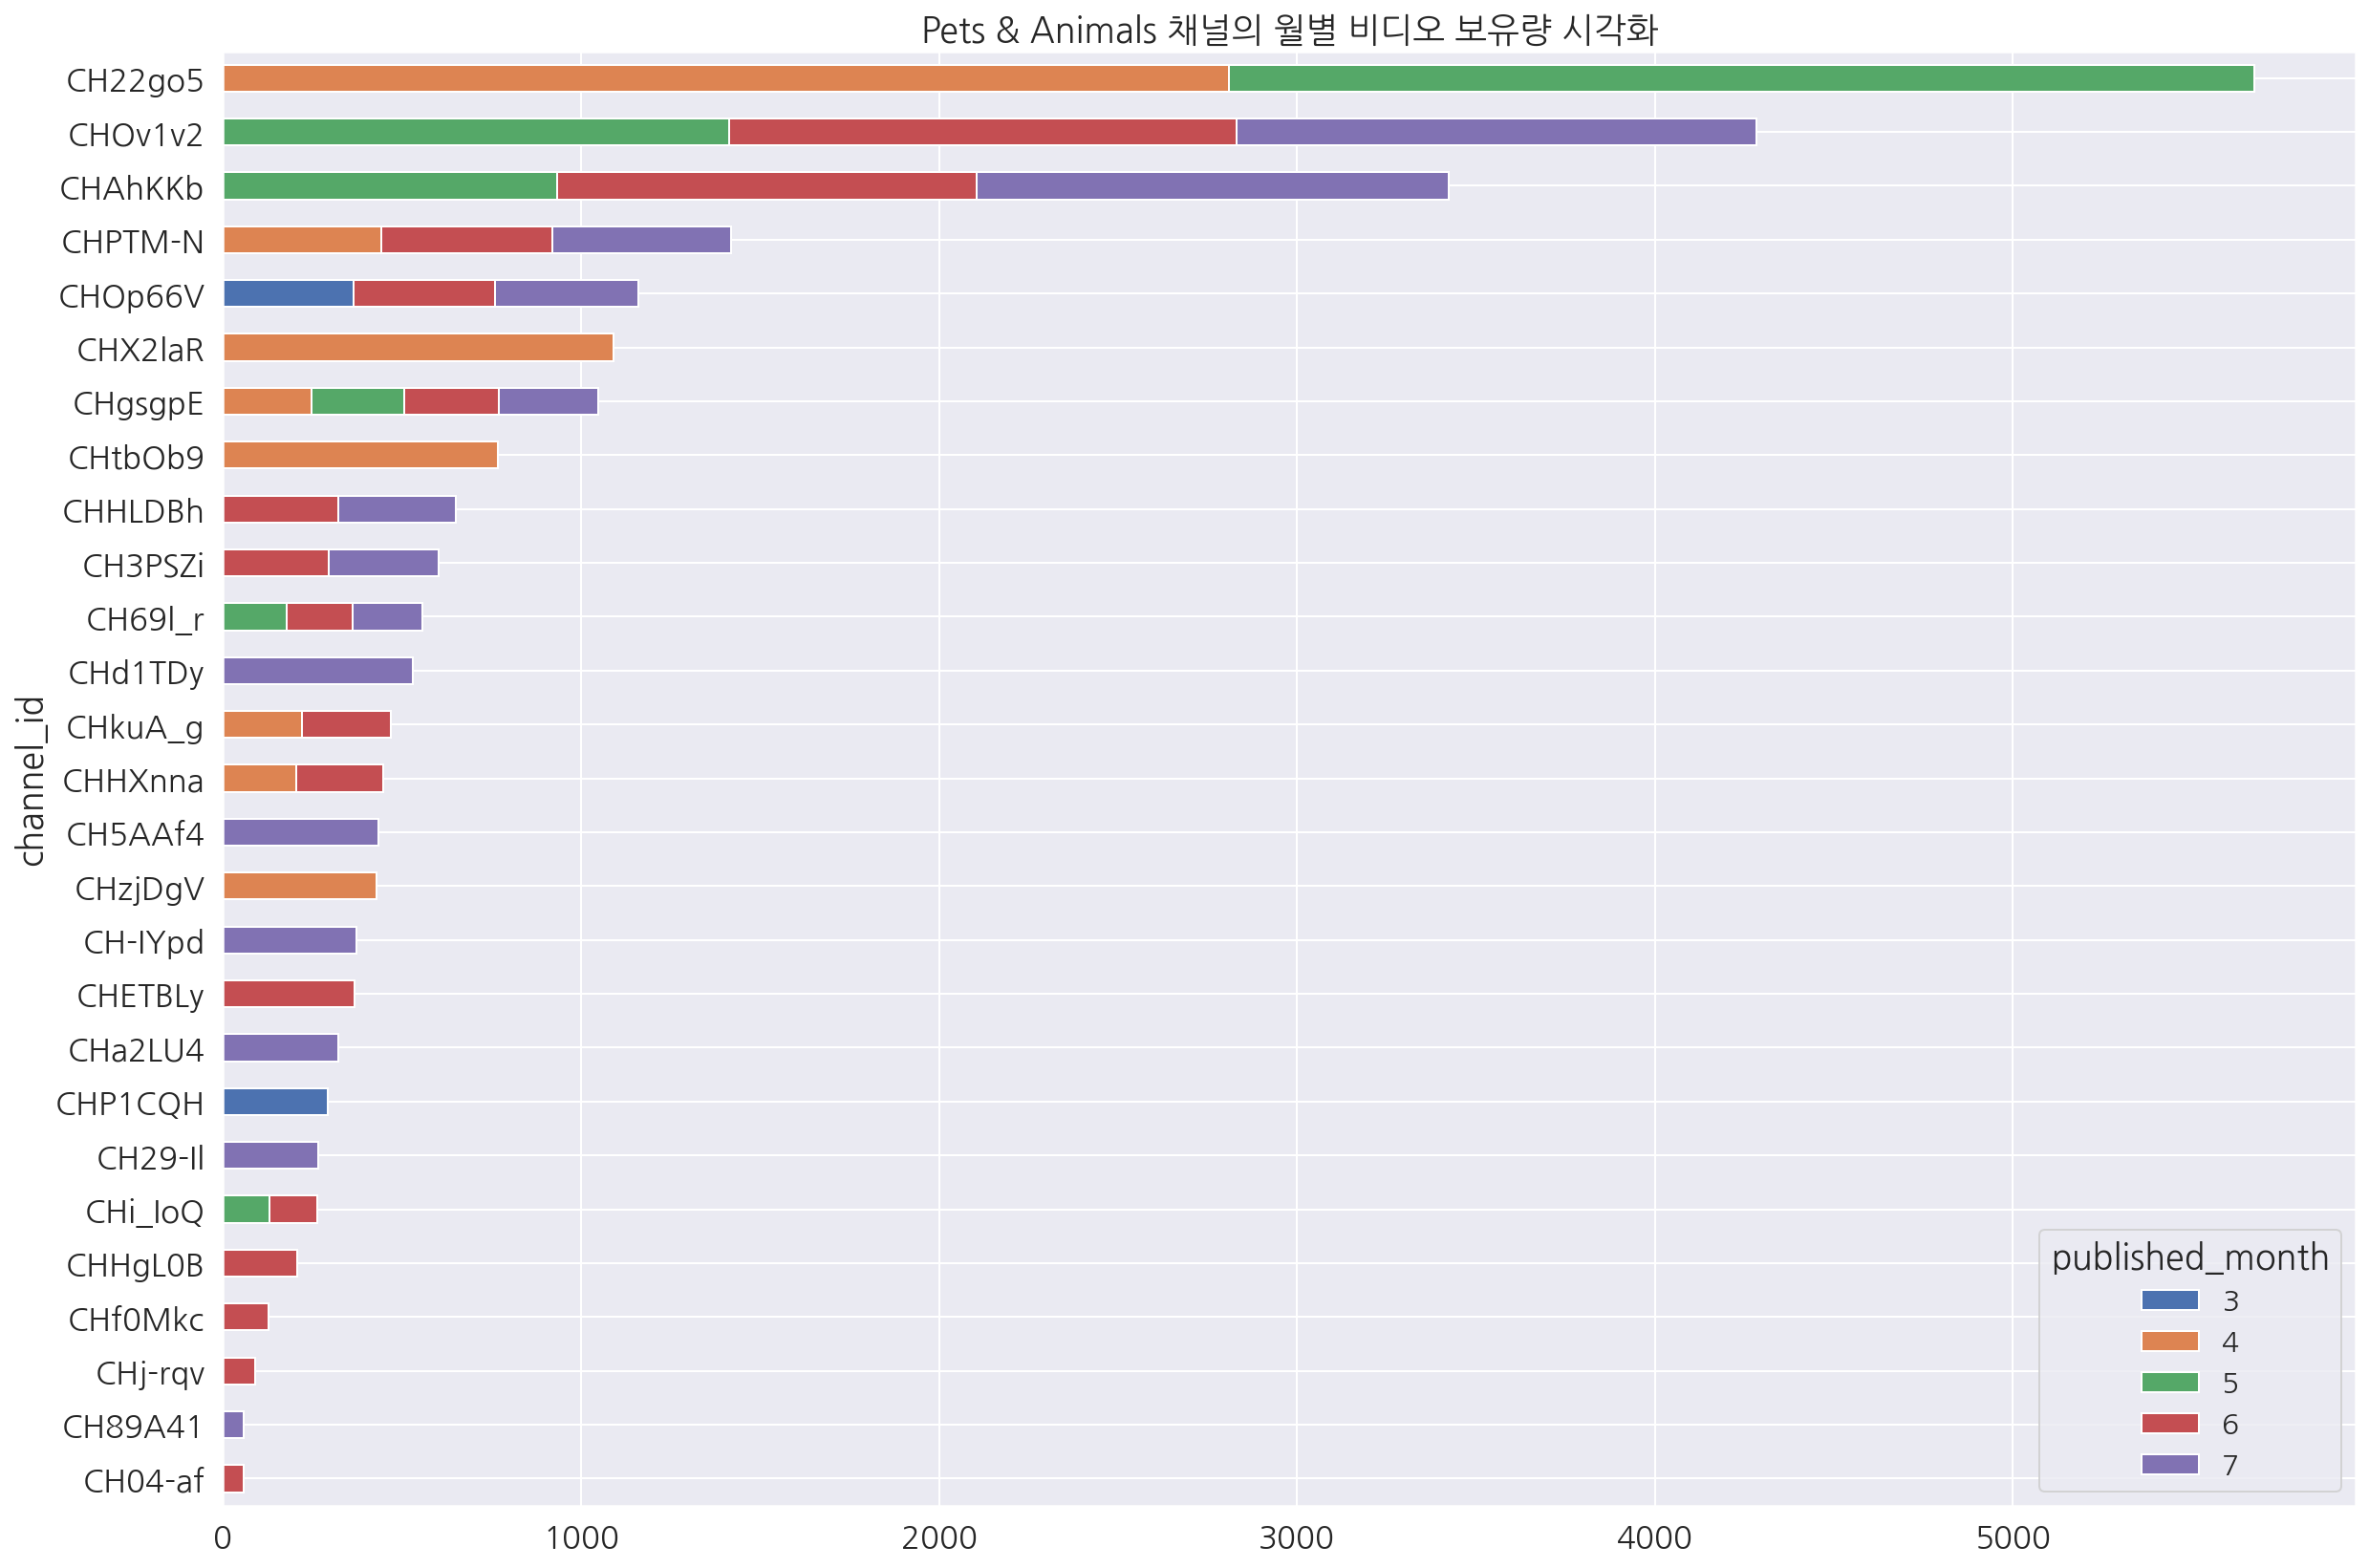

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot data in stack manner of bar type
ax = Pets_df[[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[10]} 채널의 월별 비디오 보유량 시각화", figsize =(20,14))
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

plt.show();

비디오 보유량 순으로 잘라서 보겠습니다.

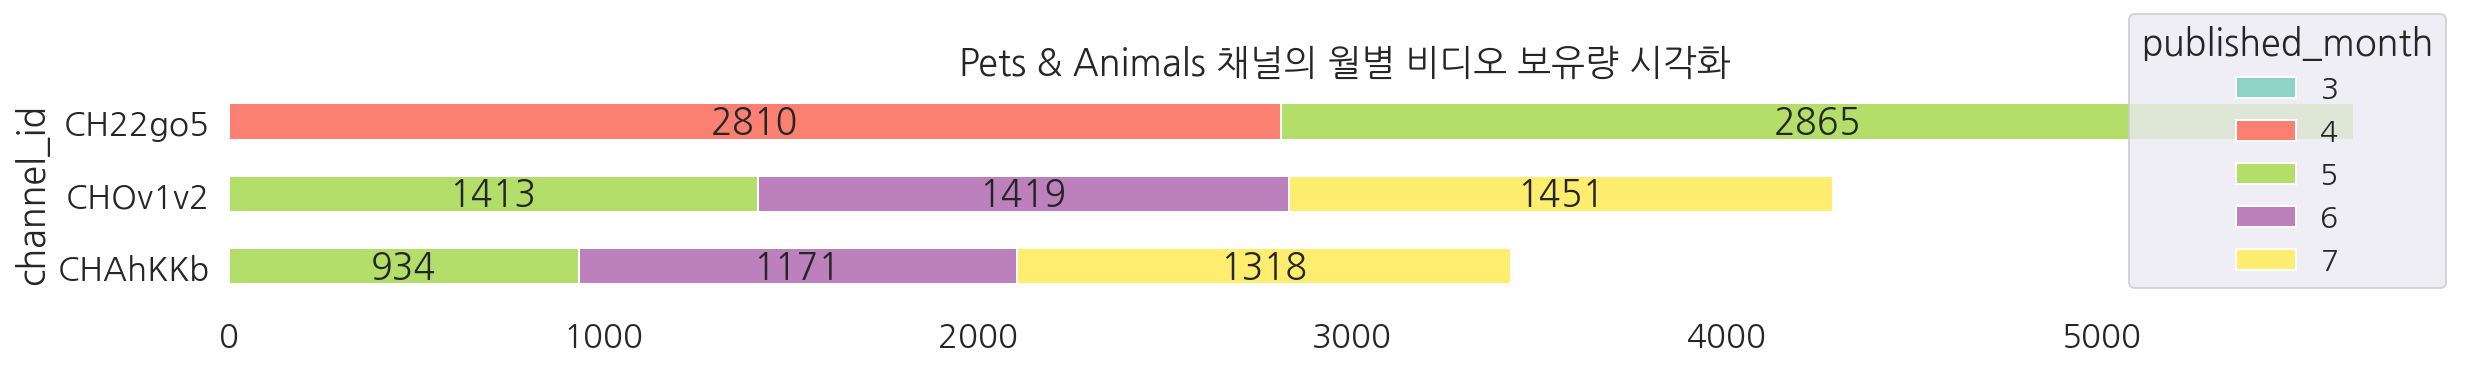

In [ ]:
# plot data in stack manner of bar type
ax = Pets_df[Pets_df['sum']>2000][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[10]} 채널의 월별 비디오 보유량 시각화", figsize =(20,2), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

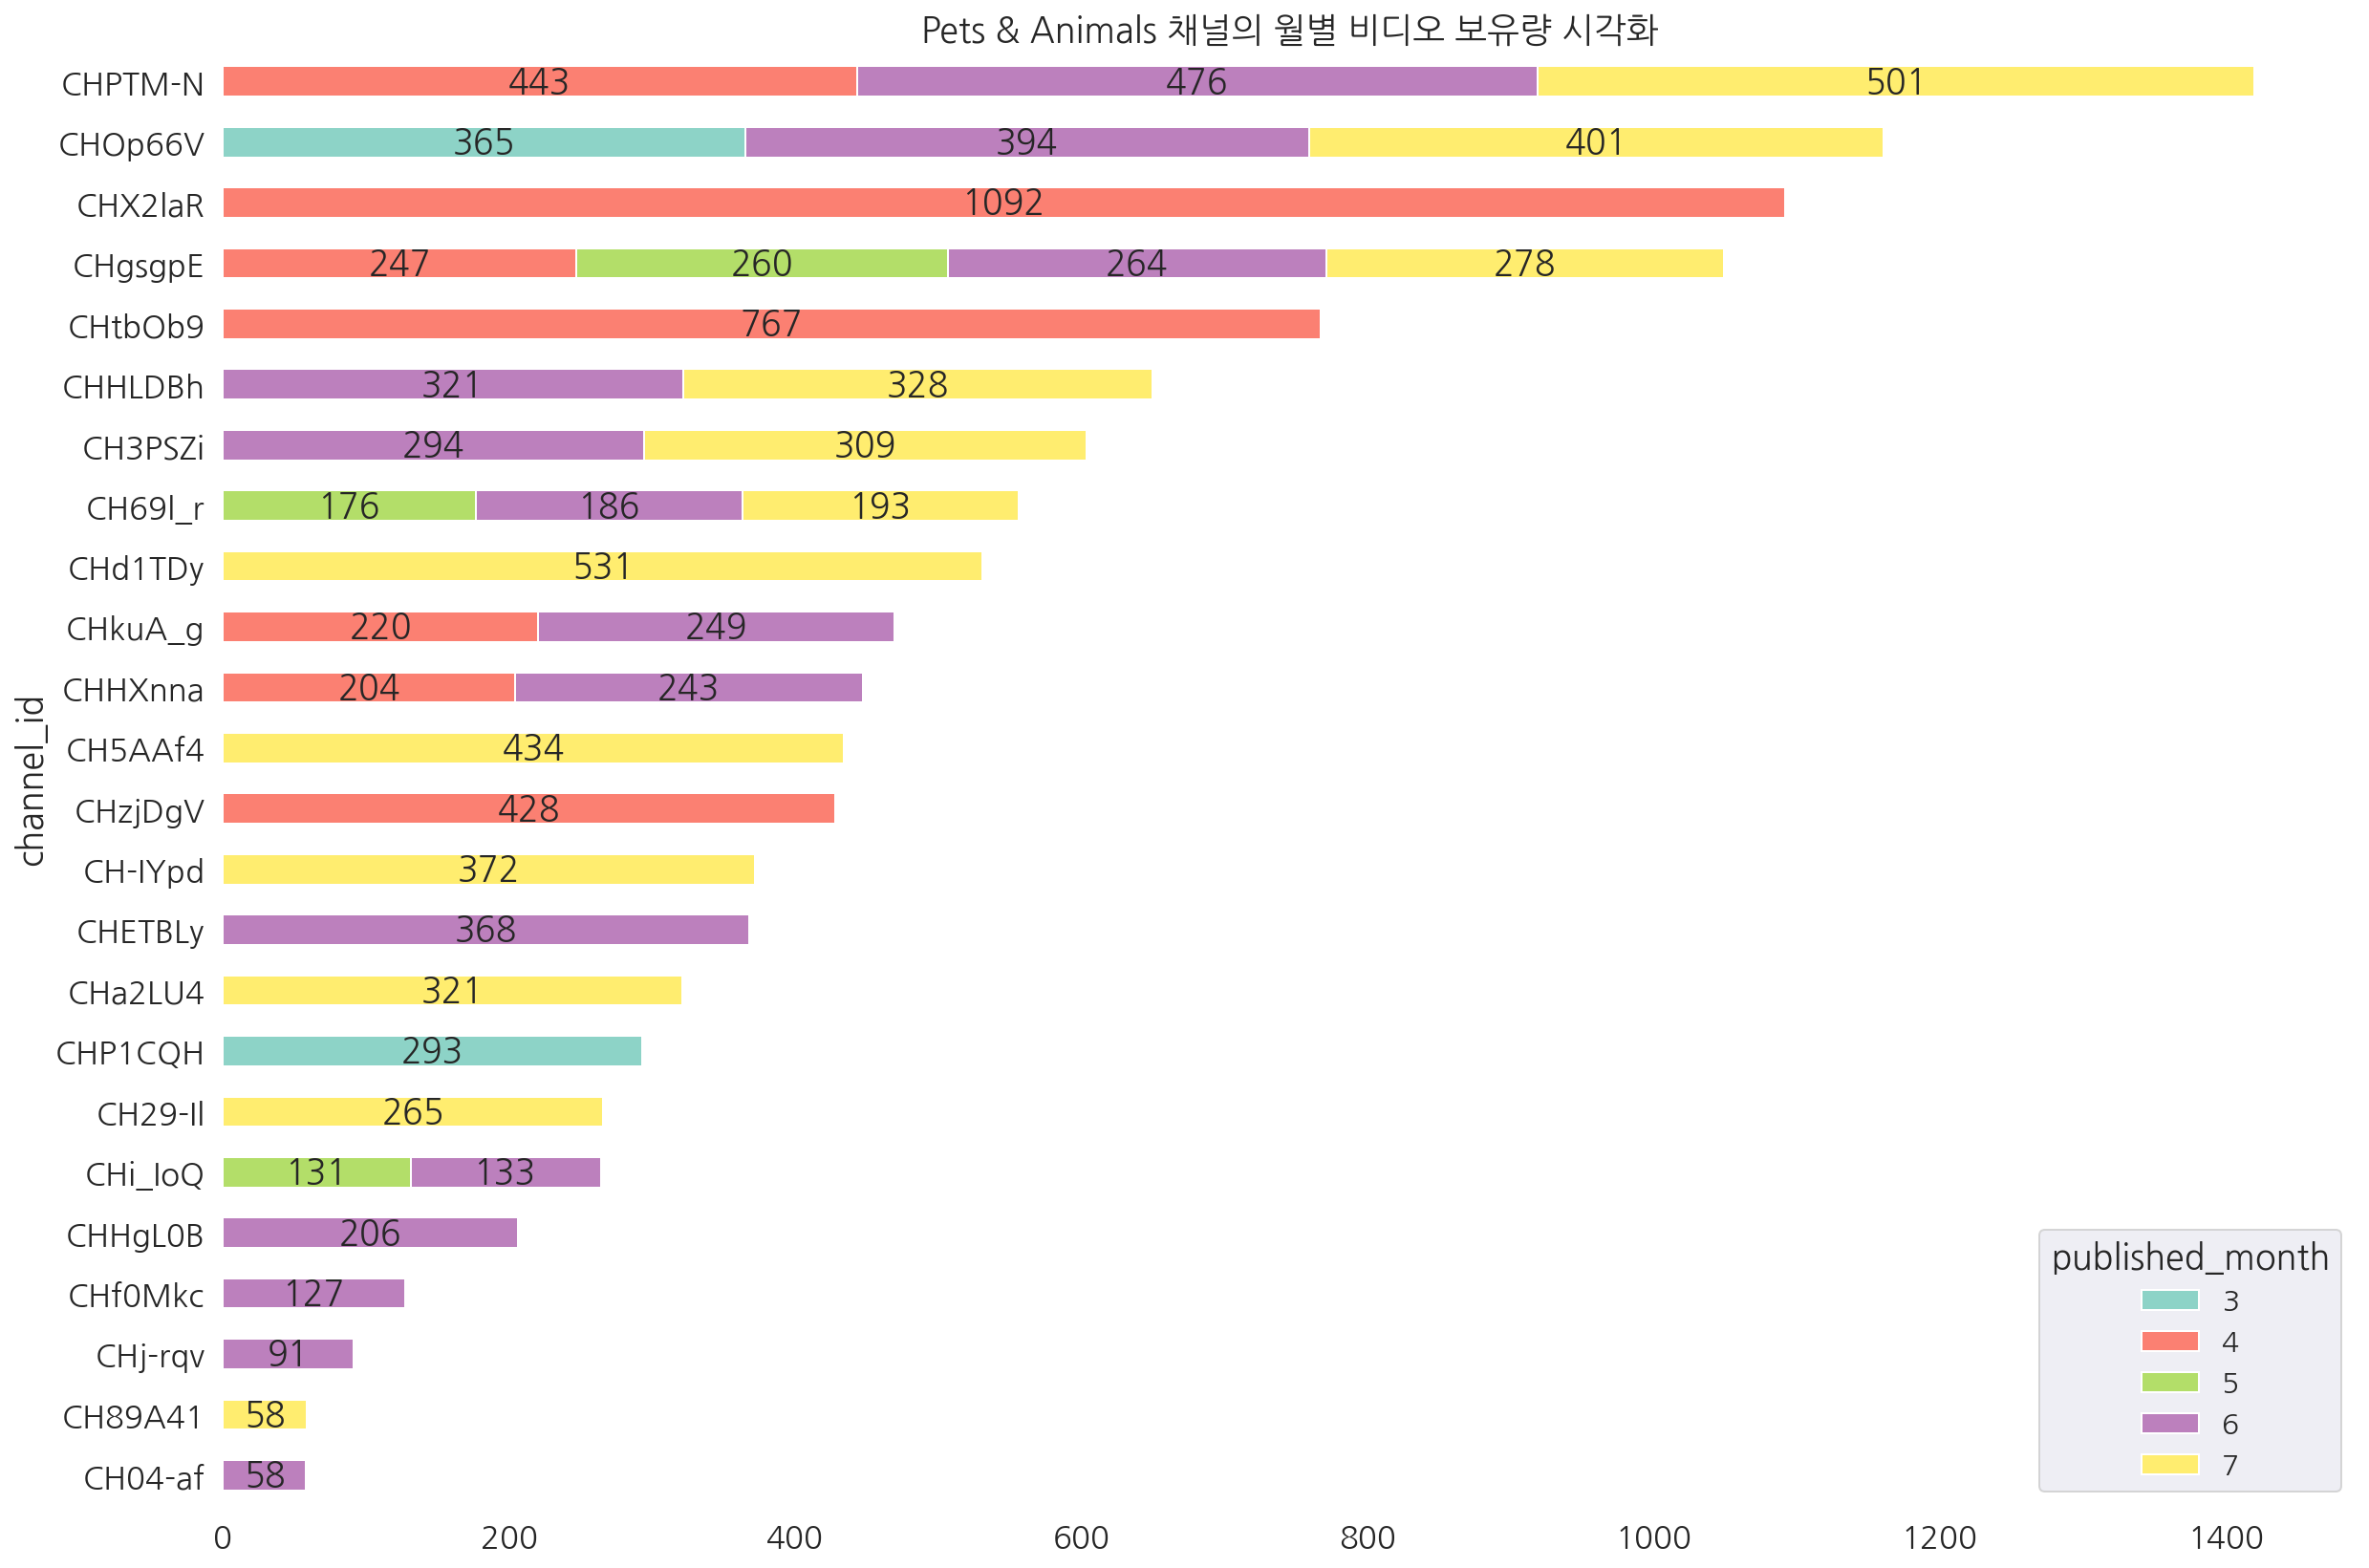

In [ ]:
# plot data in stack manner of bar type
ax = Pets_df[Pets_df['sum']<2000][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[10]} 채널의 월별 비디오 보유량 시각화", figsize =(20,14), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

### 11.Science & Technology

In [ ]:
category[11]

'Science & Technology'

In [ ]:
# Science & Technology	카테고리만 추출
Science = month_df[month_df['category_name']==category[11]]
Science_df = Science['on_channel_total_videos'].groupby([Science['channel_id'], Science['published_month']]).mean().unstack('published_month')

In [ ]:
# Science & Technology 카테고리에 속한 'channel_id'의 개수
Science['channel_id'].unique().shape

(20,)

Science & Technology 카테고리에서 채널별로 월별 비디오 보유량을 봅시다.

In [ ]:
Science_df

published_month        3        4       5       6           7
channel_id                                                   
CH3dJKw              NaN      NaN     NaN    22.0   24.000000
CH5aNQ6              NaN    388.0     NaN     NaN         NaN
CHB11SA              NaN    149.0     NaN     NaN  172.000000
CHE_M8A              NaN    195.0     NaN   200.0         NaN
CHFX6ad              NaN    306.0     NaN     NaN  334.000000
CHIk1-y              NaN     88.0    94.0     NaN         NaN
CHJJ_n7              NaN      NaN     NaN    72.0   73.500000
CHJKZoV              NaN      NaN     NaN   451.0         NaN
CHJiv3w              NaN      NaN     NaN  2146.0         NaN
CHO4RG1              NaN   1139.0     NaN     NaN         NaN
CHUkuuo          12071.0  12779.0     NaN     NaN         NaN
CHWnC1r              NaN      NaN   779.0     NaN         NaN
CHWwgaK              NaN      NaN  1458.0     NaN         NaN
CHYAvG7              NaN      NaN     NaN  1115.0         NaN
CH_0oo0              NaN   2236.0  2251.0     NaN         NaN
CHb-Abq              NaN      NaN   847.0     NaN         NaN
CHdUcjk              NaN    734.0   749.0     NaN  768.333333
CHdpbqw              NaN      NaN     2.0     NaN         NaN
CHj-MI9              NaN      NaN     NaN     NaN   42.000000
CHrBpV_              NaN      NaN   434.0     NaN         NaN

In [ ]:
Science_df.shape

(20, 5)

In [ ]:
Science_df['sum'] = Science_df.T.sum()

In [ ]:
Science_df = Science_df.sort_values('sum')

In [ ]:
Science_df

published_month        3        4       5       6           7           sum
channel_id                                                                 
CHdpbqw              NaN      NaN     2.0     NaN         NaN      2.000000
CHj-MI9              NaN      NaN     NaN     NaN   42.000000     42.000000
CH3dJKw              NaN      NaN     NaN    22.0   24.000000     46.000000
CHJJ_n7              NaN      NaN     NaN    72.0   73.500000    145.500000
CHIk1-y              NaN     88.0    94.0     NaN         NaN    182.000000
CHB11SA              NaN    149.0     NaN     NaN  172.000000    321.000000
CH5aNQ6              NaN    388.0     NaN     NaN         NaN    388.000000
CHE_M8A              NaN    195.0     NaN   200.0         NaN    395.000000
CHrBpV_              NaN      NaN   434.0     NaN         NaN    434.000000
CHJKZoV              NaN      NaN     NaN   451.0         NaN    451.000000
CHFX6ad              NaN    306.0     NaN     NaN  334.000000    640.000000
CHWnC1r              NaN      NaN   779.0     NaN         NaN    779.000000
CHb-Abq              NaN      NaN   847.0     NaN         NaN    847.000000
CHYAvG7              NaN      NaN     NaN  1115.0         NaN   1115.000000
CHO4RG1              NaN   1139.0     NaN     NaN         NaN   1139.000000
CHWwgaK              NaN      NaN  1458.0     NaN         NaN   1458.000000
CHJiv3w              NaN      NaN     NaN  2146.0         NaN   2146.000000
CHdUcjk              NaN    734.0   749.0     NaN  768.333333   2251.333333
CH_0oo0              NaN   2236.0  2251.0     NaN         NaN   4487.000000
CHUkuuo          12071.0  12779.0     NaN     NaN         NaN  24850.000000

아웃라이어  CHUkuuo 는 제외 후 시각화합니다.

In [ ]:
Science_df_loc = Science_df.iloc[:-1]

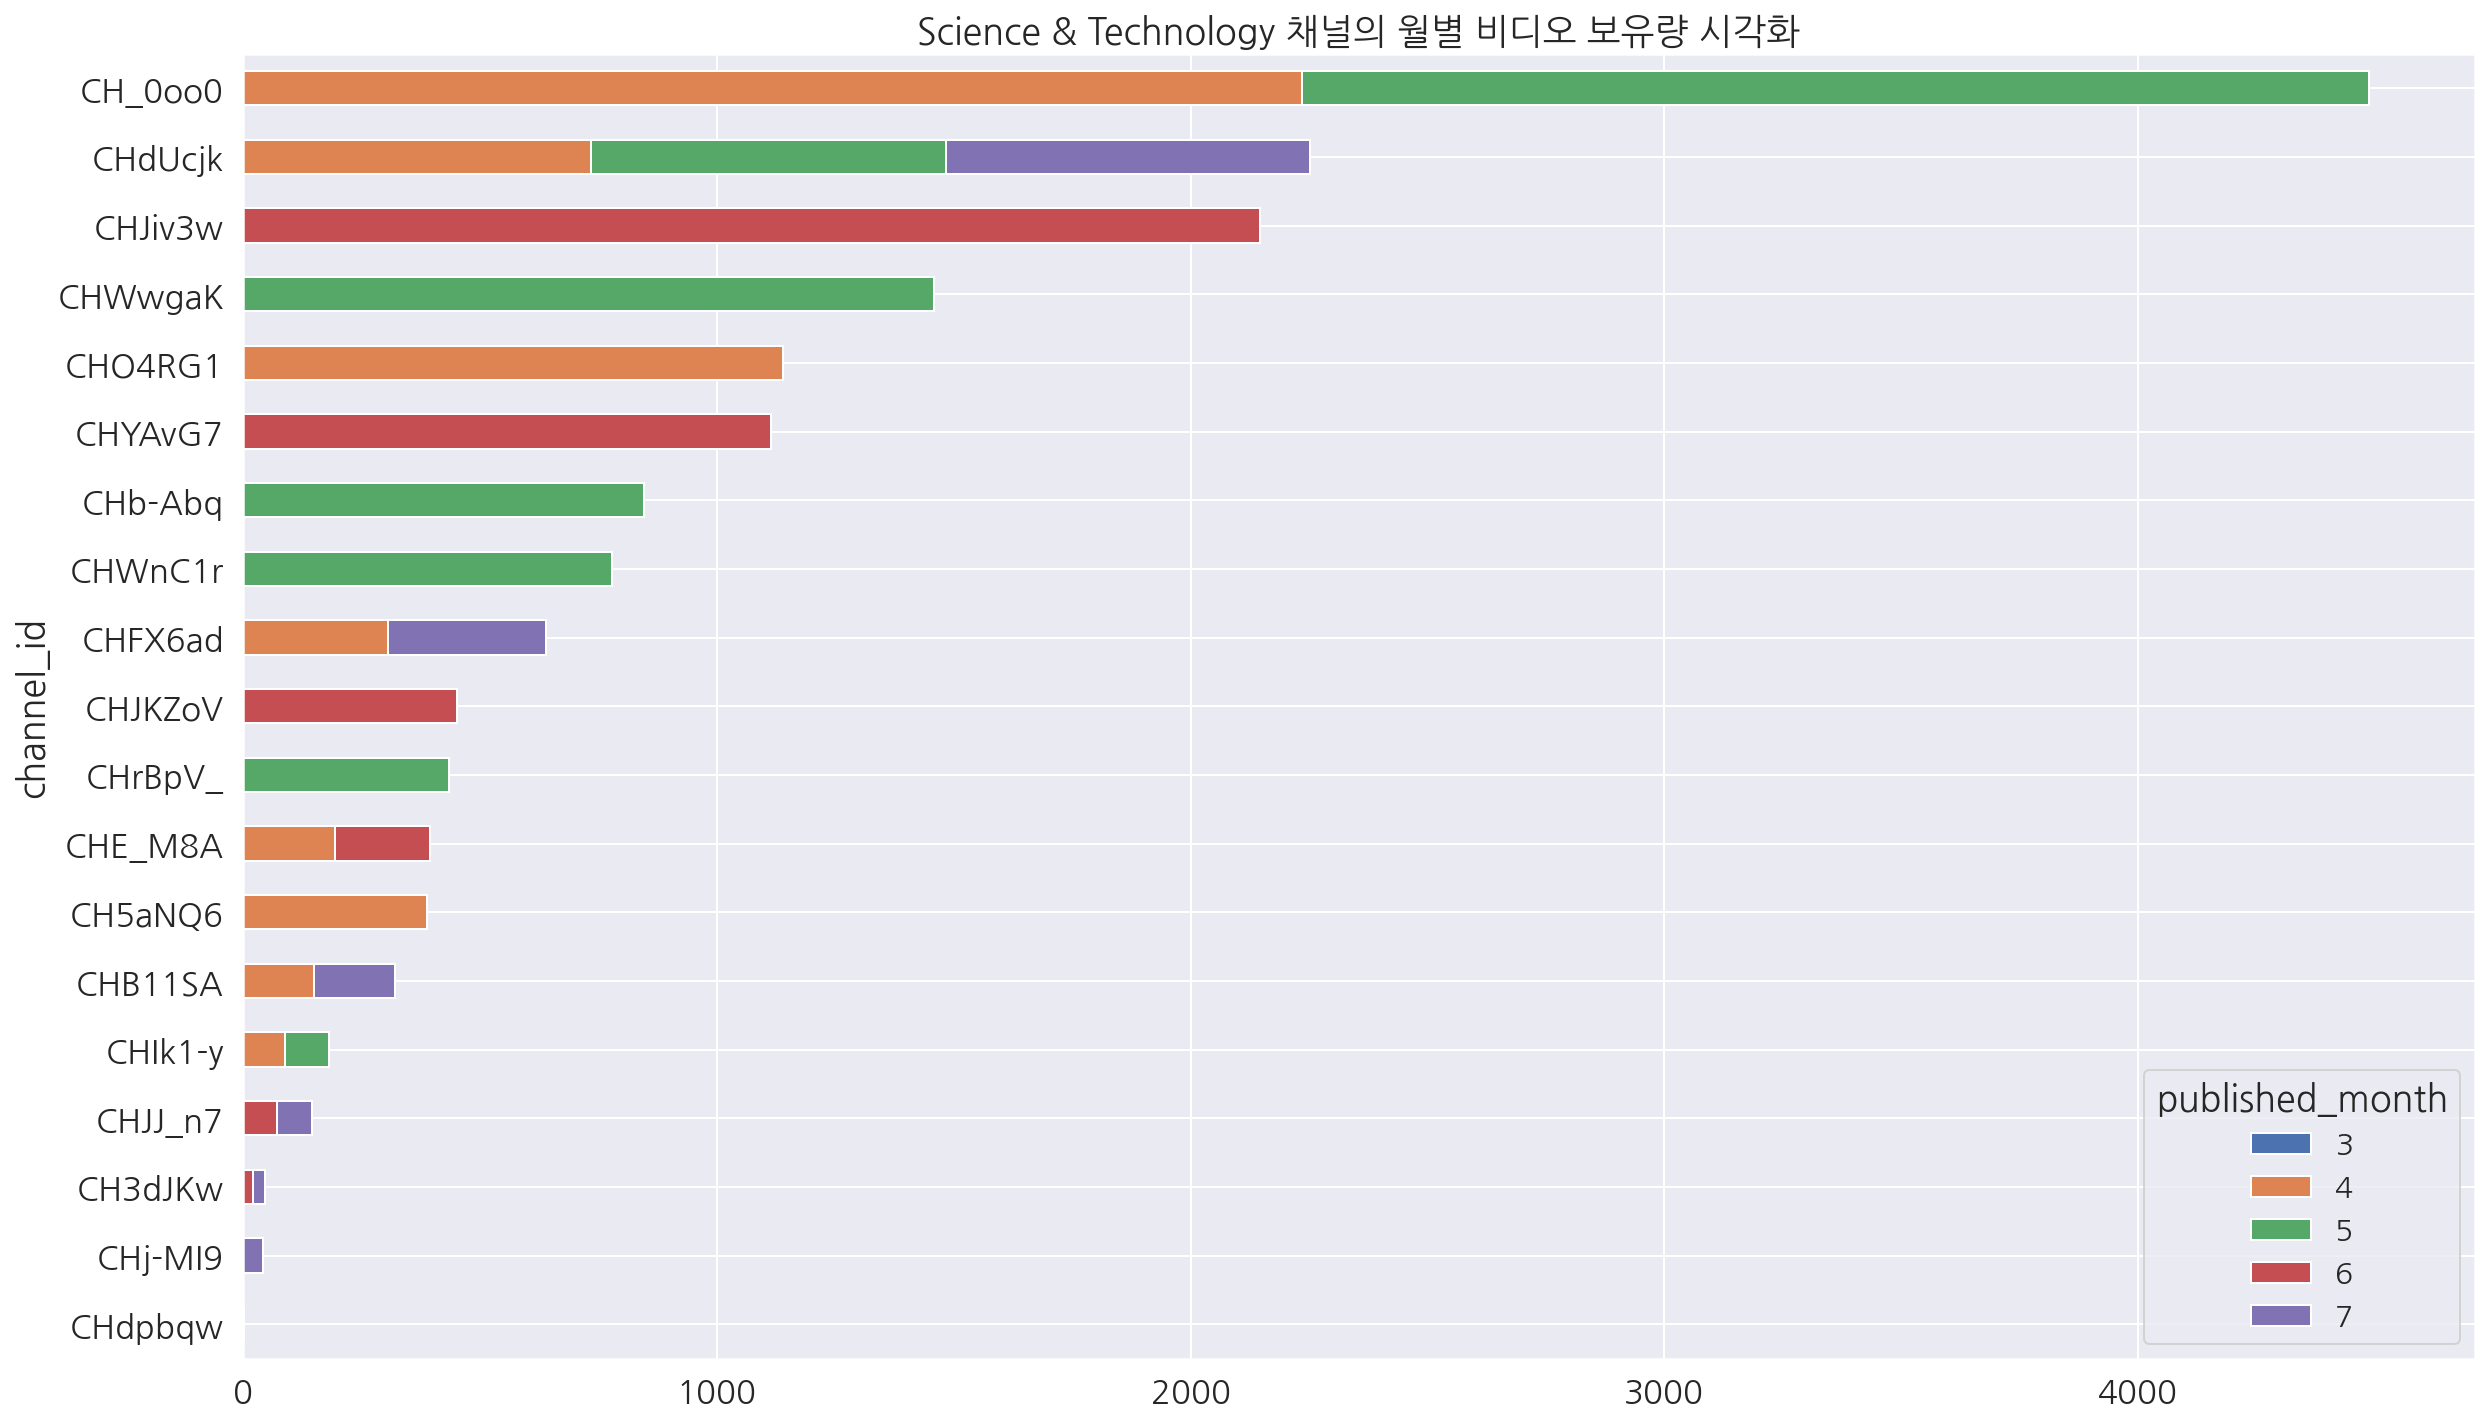

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot data in stack manner of bar type
ax = Science_df_loc[[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[11]} 채널의 월별 비디오 보유량 시각화", figsize =(20,12))
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

plt.show();

비디오 보유량 순으로 잘라서 보겠습니다.

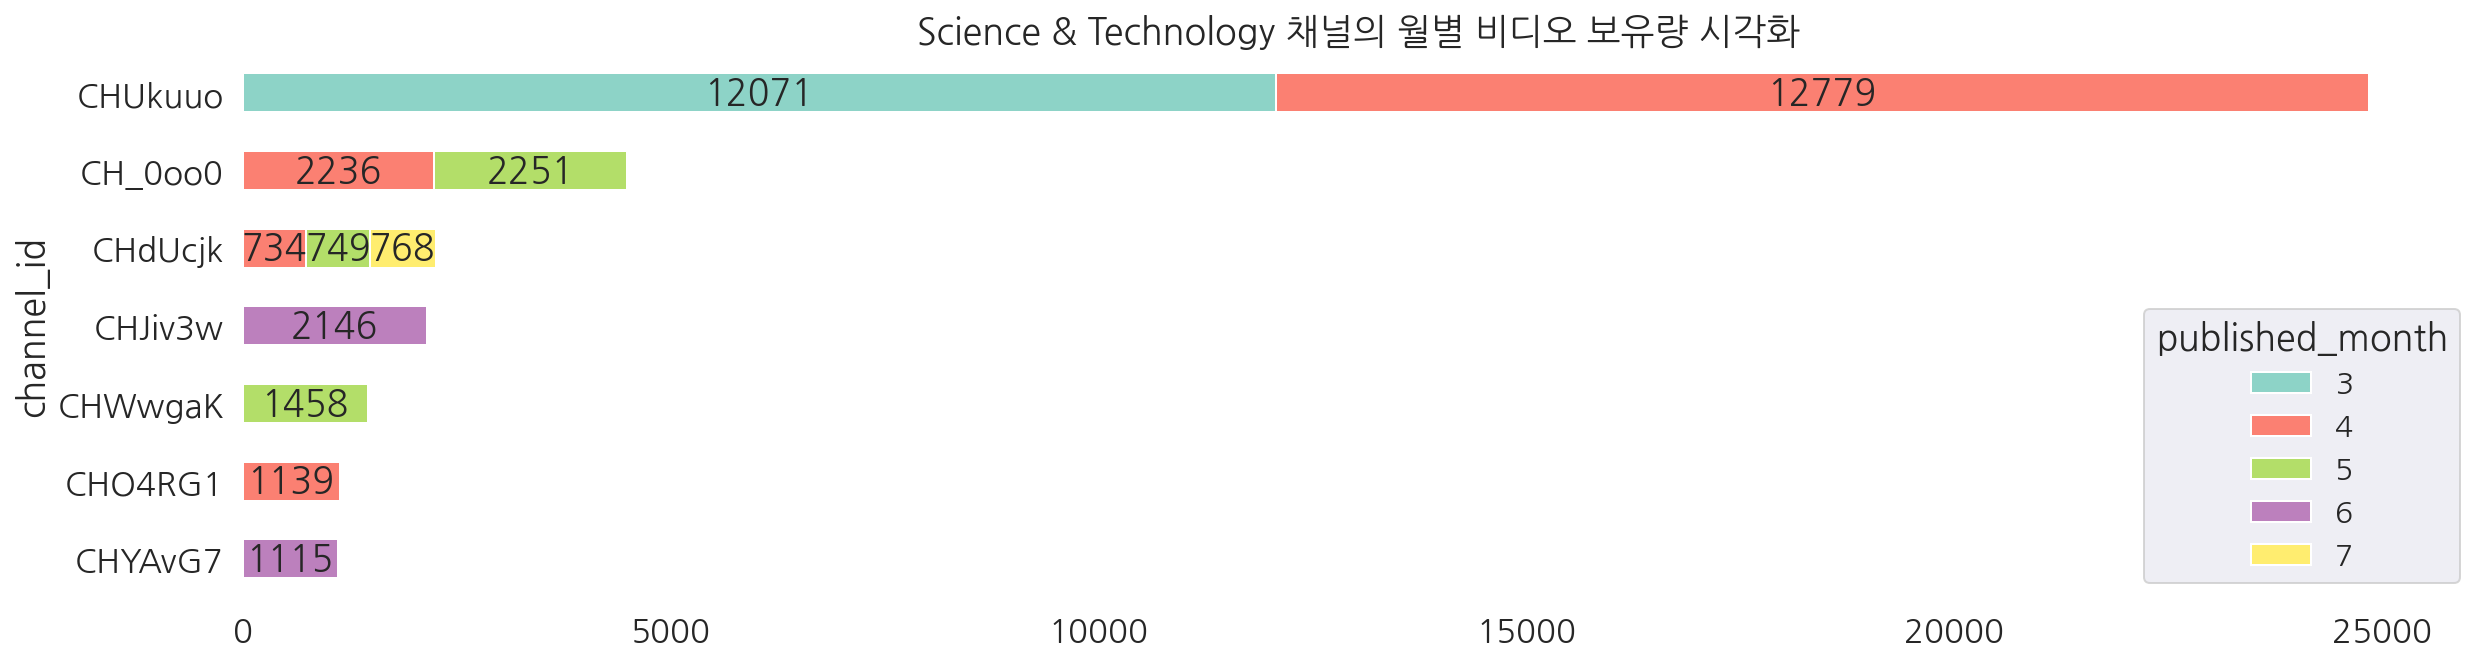

In [ ]:
# plot data in stack manner of bar type
ax = Science_df[Science_df['sum']>1000][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[11]} 채널의 월별 비디오 보유량 시각화", figsize =(20,5), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

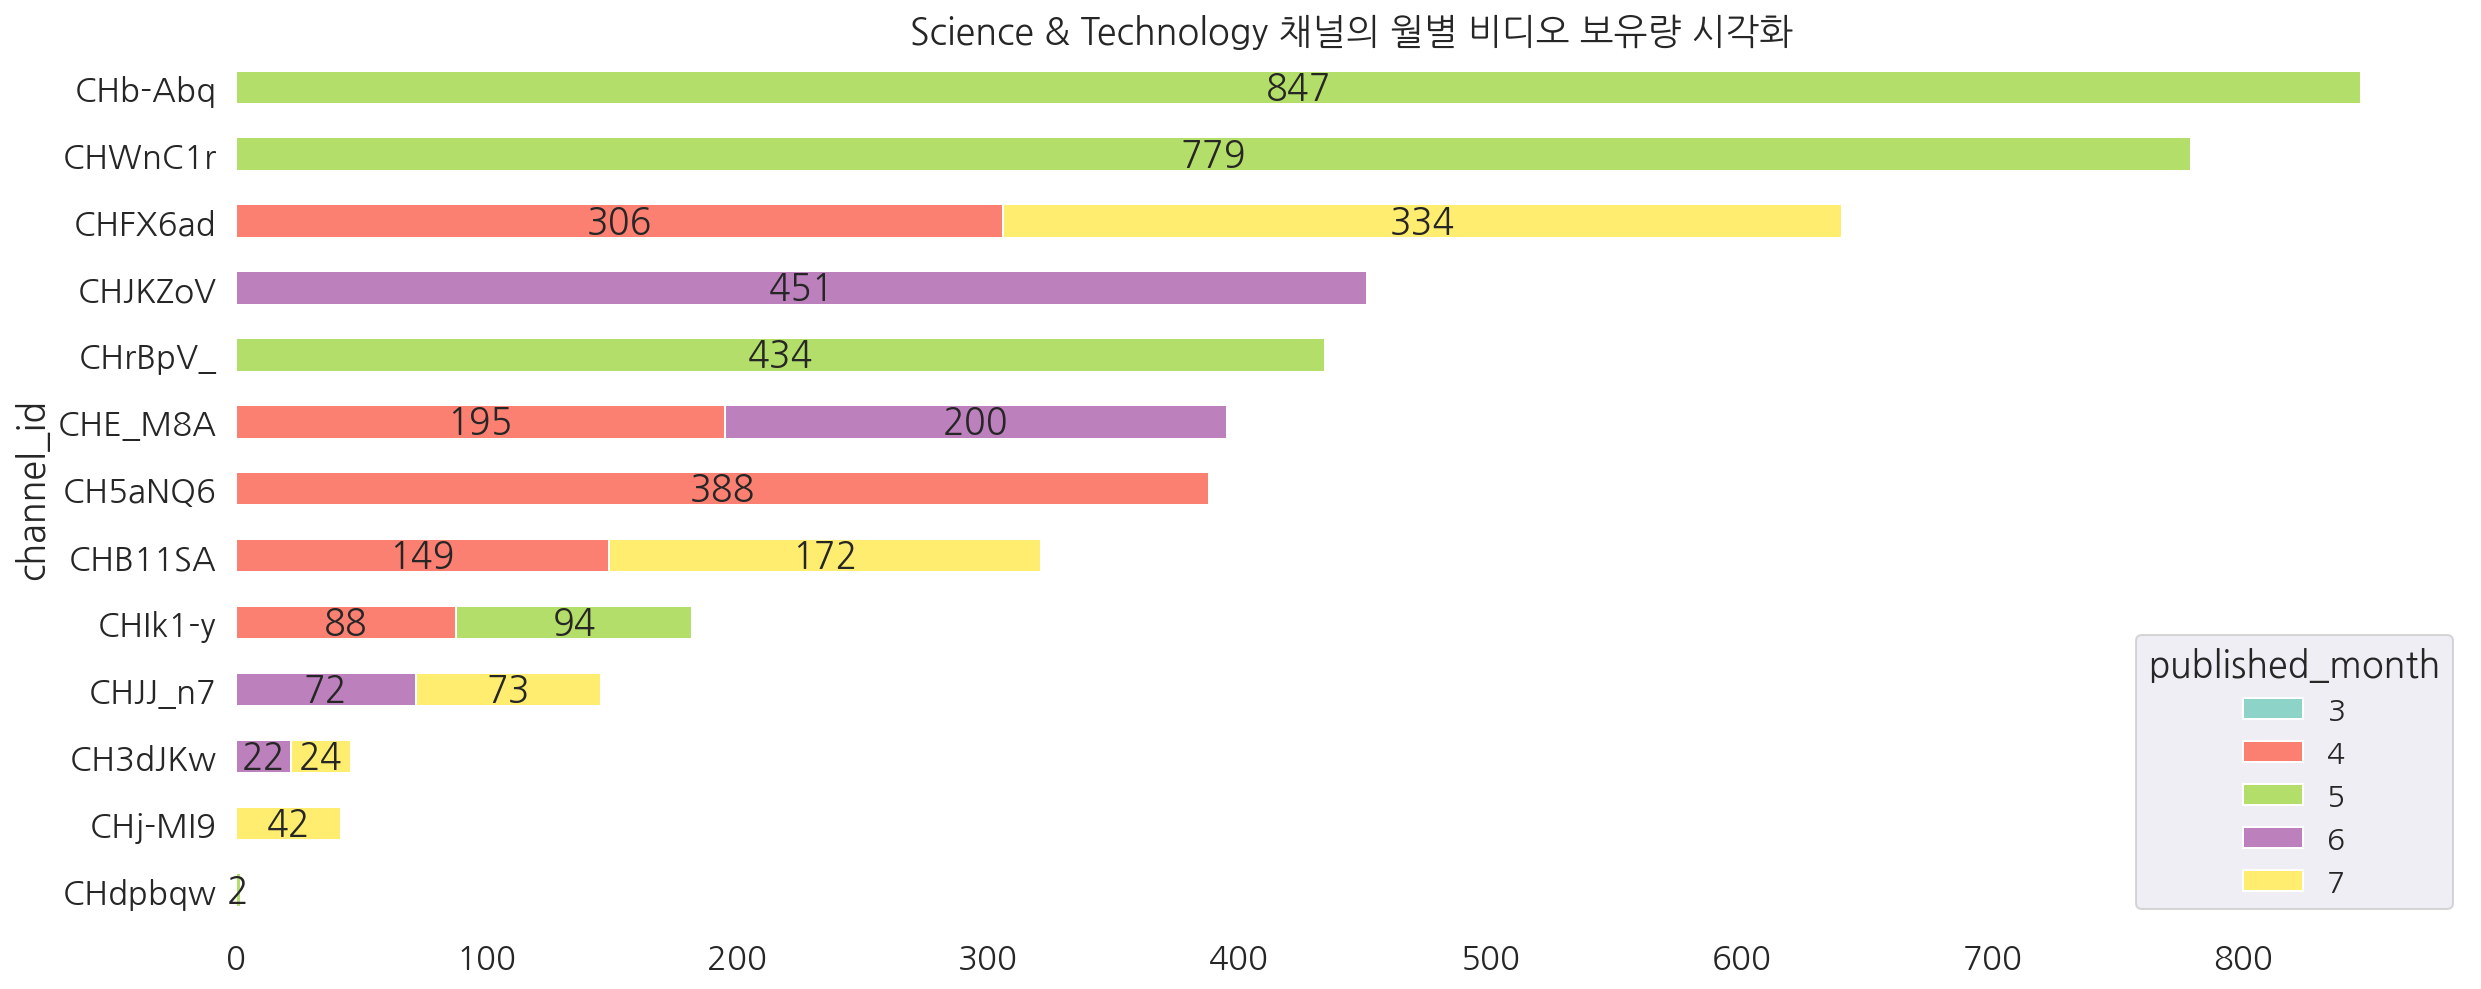

In [ ]:
# plot data in stack manner of bar type
ax = Science_df[Science_df['sum']<1000][[3,4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[11]} 채널의 월별 비디오 보유량 시각화", figsize =(20,8), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

### 12.Autos & Vehicles

In [ ]:
category[12]

'Autos & Vehicles'

In [ ]:
# Autos & Vehicles	카테고리만 추출
Autos = month_df[month_df['category_name']==category[12]]
Autos_df = Autos['on_channel_total_videos'].groupby([Autos['channel_id'], Autos['published_month']]).mean().unstack('published_month')

In [ ]:
# Autos & Vehicles 카테고리에 속한 'channel_id'의 개수
Autos['channel_id'].unique().shape

(19,)

Autos & Vehicles 카테고리에서 채널별로 월별 비디오 보유량을 봅시다.

In [ ]:
Autos_df

published_month       4        5       6       7
channel_id                                      
CH-IBt8          1927.0      NaN     NaN     NaN
CH2xkO7            87.0      NaN   108.0     NaN
CH5f97D           540.0      NaN   563.0     NaN
CHDpnvN             NaN      NaN     NaN   132.0
CHH5U89             NaN  11488.5     NaN     NaN
CHKnKi2             NaN      NaN    52.0     NaN
CHPbxBh           144.0    147.0     NaN   110.0
CHSkpiP             NaN     58.0     NaN     NaN
CHWY41Q           688.0      NaN     NaN     NaN
CHYVZ6z             NaN      NaN   227.0     NaN
CH_rBRr             NaN      NaN     NaN  1268.0
CHd5CdY           990.0      NaN  1058.0     NaN
CHiubh7           209.0      NaN   205.0   217.0
CHkGHfa             NaN      NaN     NaN   132.0
CHp0B9n             NaN      NaN     NaN  2001.0
CHrOl7I           204.0      NaN     NaN   262.0
CHrXkDA          1028.5      NaN     NaN     NaN
CHs2TmE             NaN     85.0     NaN     NaN
CHyF14S             NaN      NaN   249.0     NaN

In [ ]:
Autos_df.shape

(19, 4)

In [ ]:
Autos_df['sum'] = Autos_df.T.sum()

In [ ]:
Autos_df = Autos_df.sort_values('sum')

In [ ]:
Autos_df

published_month       4        5       6       7      sum
channel_id                                               
CHKnKi2             NaN      NaN    52.0     NaN     52.0
CHSkpiP             NaN     58.0     NaN     NaN     58.0
CHs2TmE             NaN     85.0     NaN     NaN     85.0
CHkGHfa             NaN      NaN     NaN   132.0    132.0
CHDpnvN             NaN      NaN     NaN   132.0    132.0
CH2xkO7            87.0      NaN   108.0     NaN    195.0
CHYVZ6z             NaN      NaN   227.0     NaN    227.0
CHyF14S             NaN      NaN   249.0     NaN    249.0
CHPbxBh           144.0    147.0     NaN   110.0    401.0
CHrOl7I           204.0      NaN     NaN   262.0    466.0
CHiubh7           209.0      NaN   205.0   217.0    631.0
CHWY41Q           688.0      NaN     NaN     NaN    688.0
CHrXkDA          1028.5      NaN     NaN     NaN   1028.5
CH5f97D           540.0      NaN   563.0     NaN   1103.0
CH_rBRr             NaN      NaN     NaN  1268.0   1268.0
CH-IBt8          1927.0      NaN     NaN     NaN   1927.0
CHp0B9n             NaN      NaN     NaN  2001.0   2001.0
CHd5CdY           990.0      NaN  1058.0     NaN   2048.0
CHH5U89             NaN  11488.5     NaN     NaN  11488.5

아웃라이어  CHH5U89 는 제외 후 시각화합니다.

In [ ]:
Autos_df_loc = Autos_df.iloc[:-1]

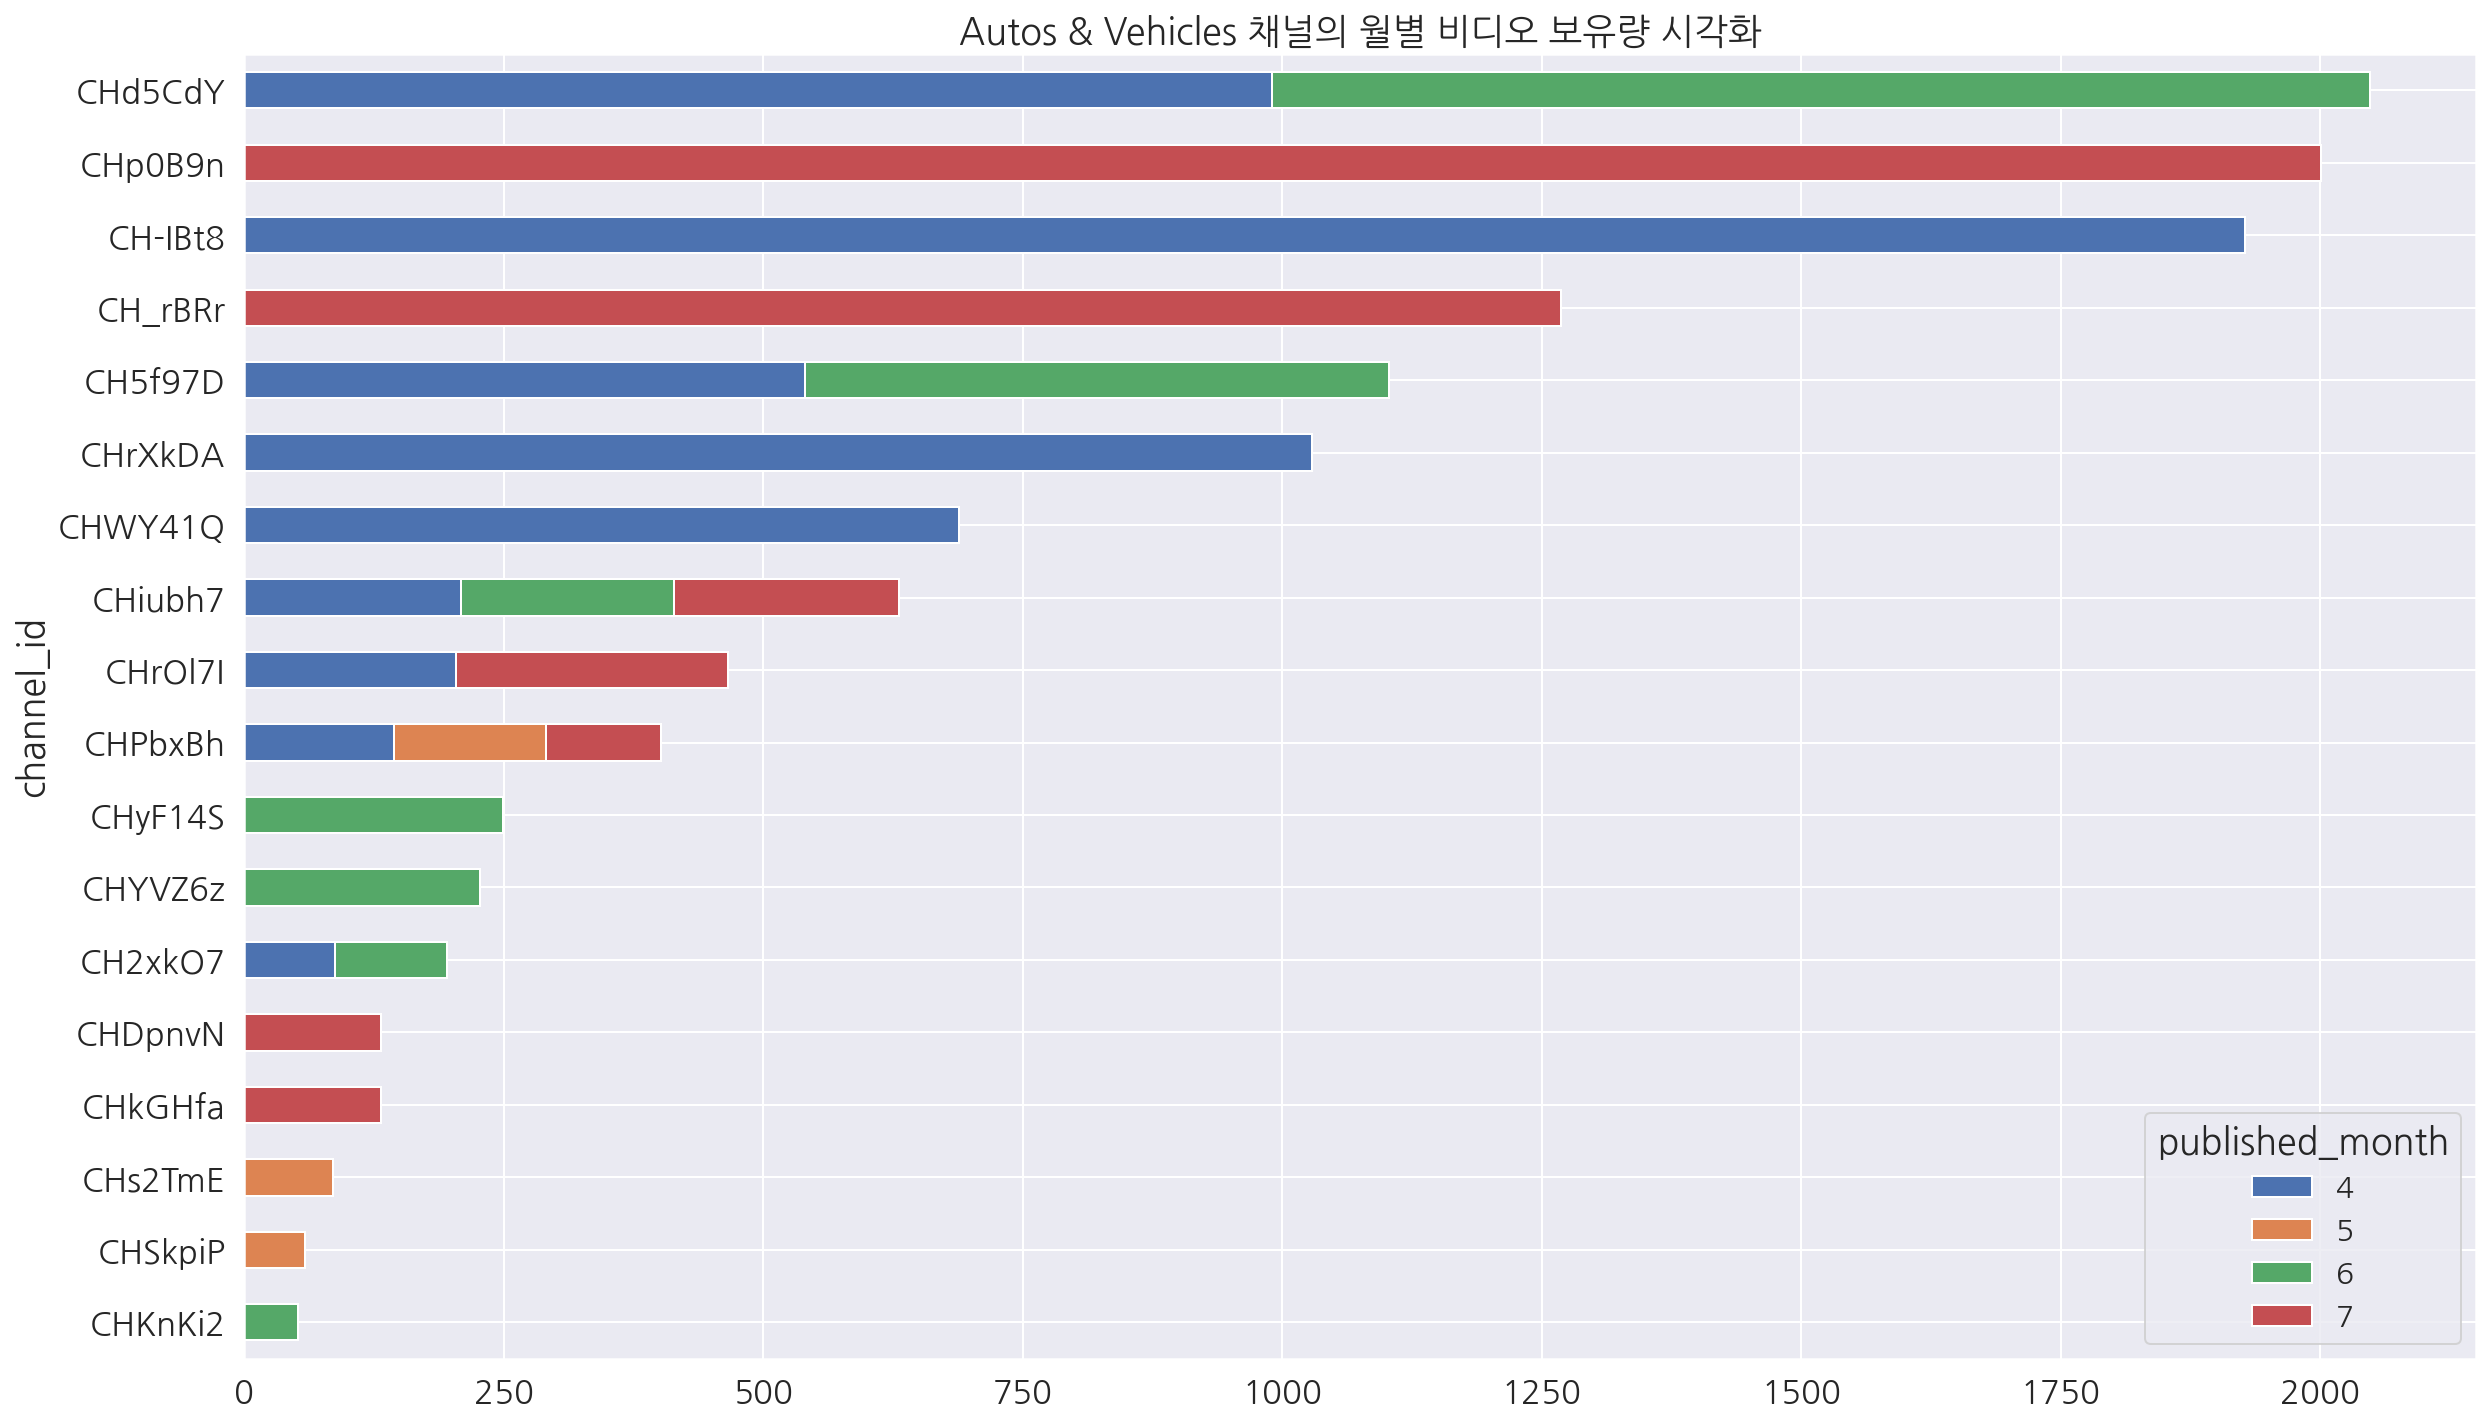

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot data in stack manner of bar type
ax = Autos_df_loc[[4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[12]} 채널의 월별 비디오 보유량 시각화", figsize =(20,12))
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

plt.show();

비디오 보유량 순으로 잘라서 보겠습니다.

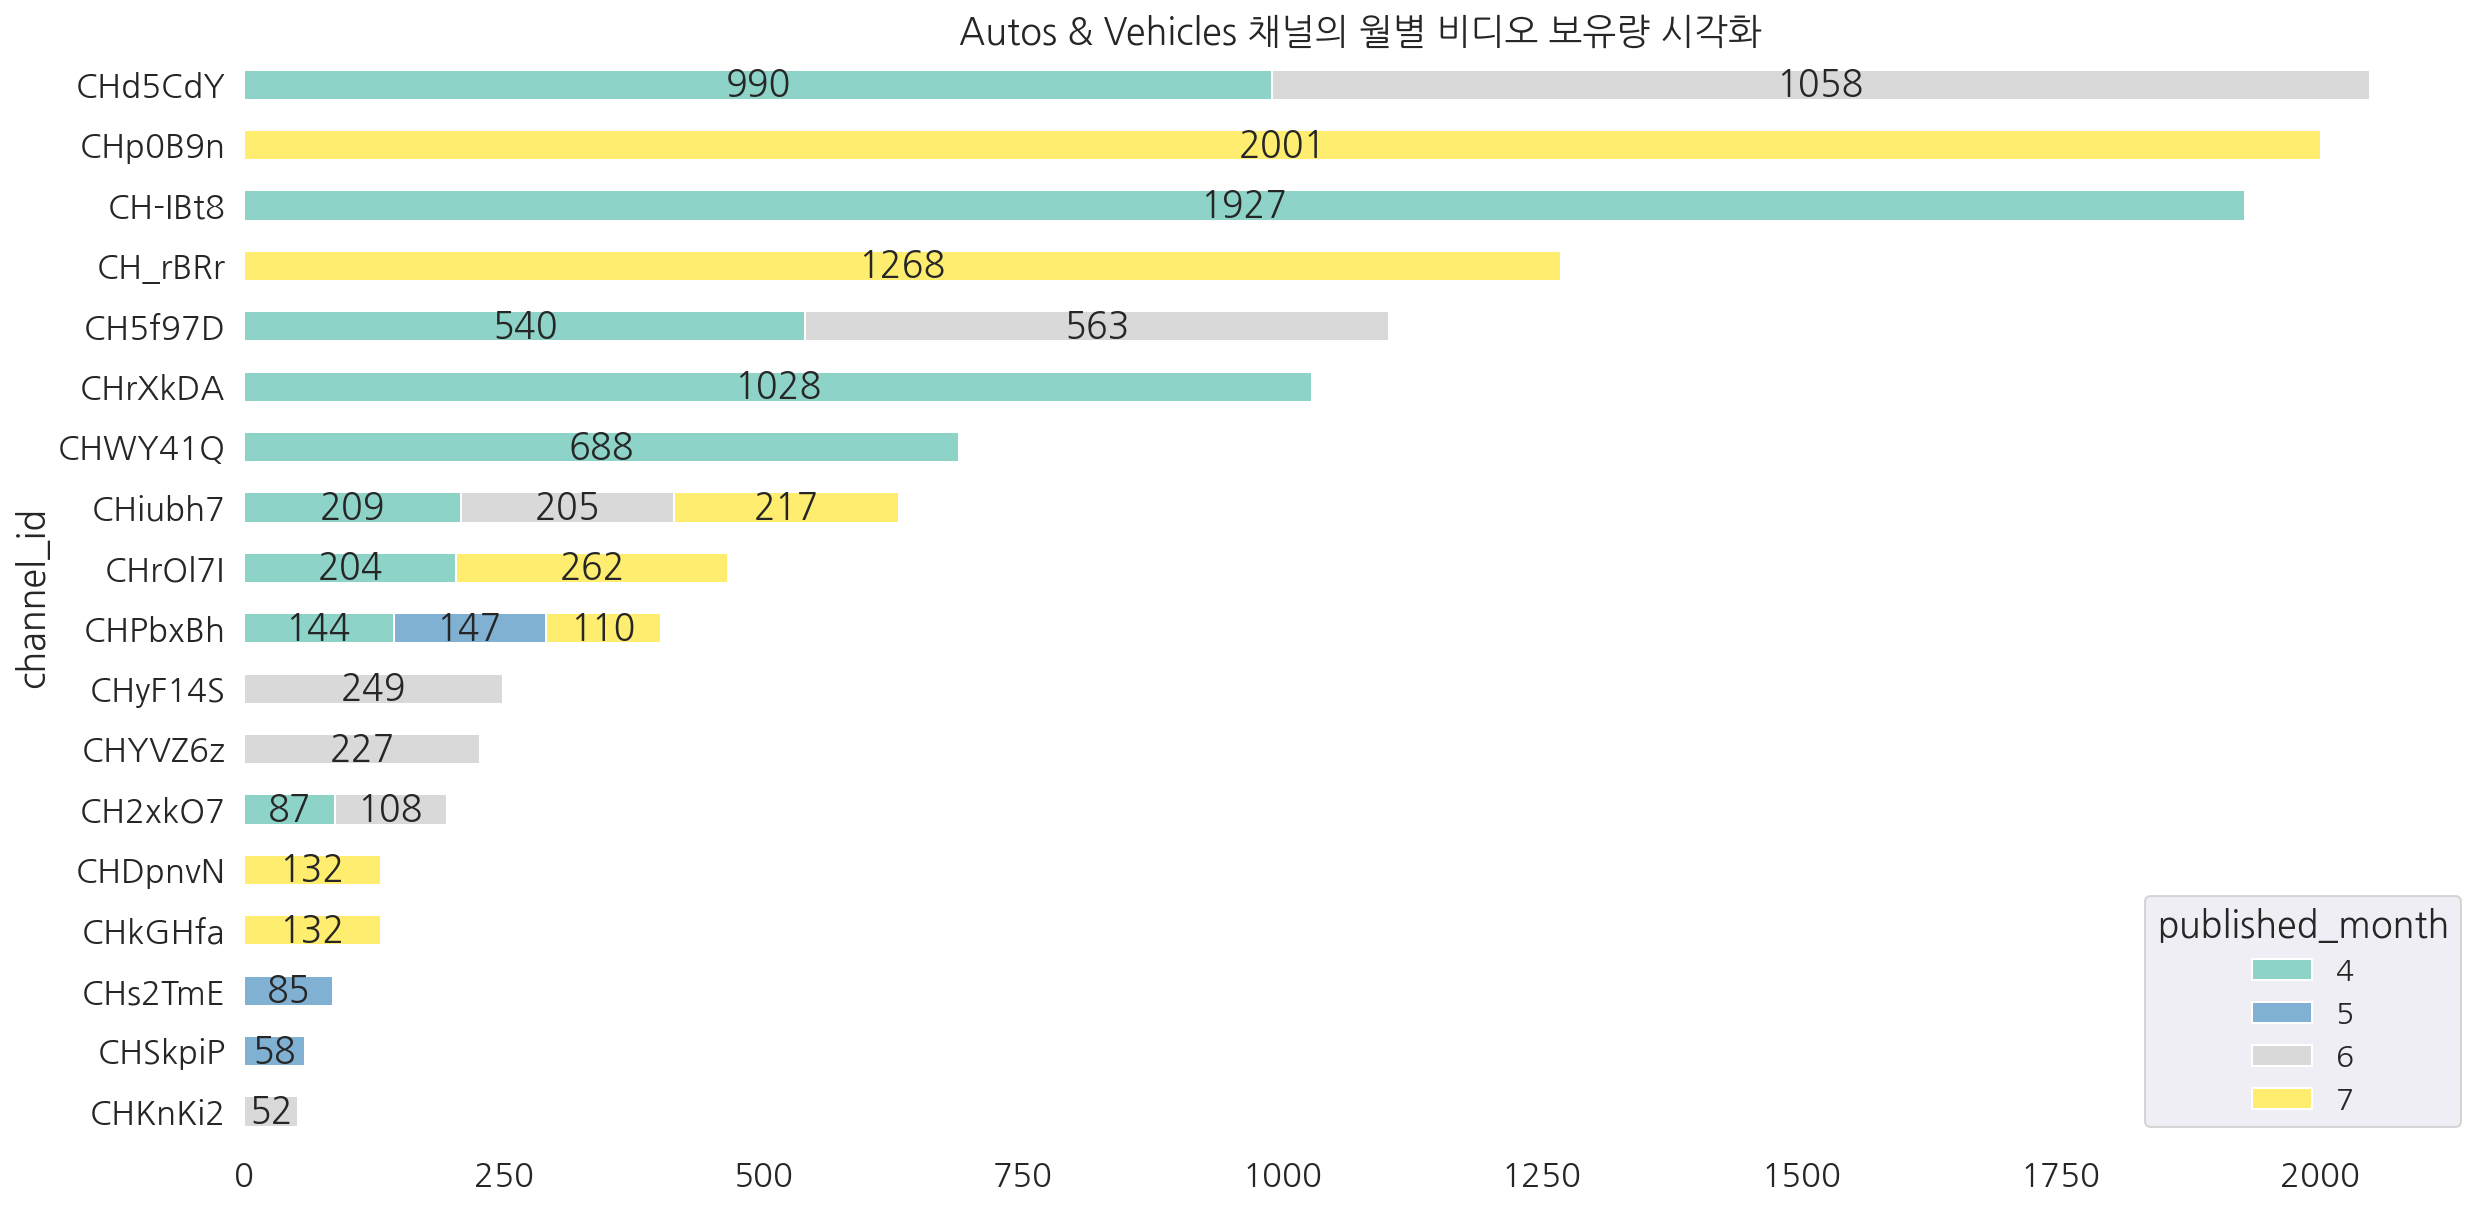

In [ ]:
# plot data in stack manner of bar type
ax = Autos_df_loc[[4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[12]} 채널의 월별 비디오 보유량 시각화", figsize =(20,10), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

### 13.Travel & Events

In [ ]:
category[13]

'Travel & Events'

In [ ]:
# Travel & Events	카테고리만 추출
Travel = month_df[month_df['category_name']==category[13]]
Travel_df = Travel['on_channel_total_videos'].groupby([Travel['channel_id'], Travel['published_month']]).mean().unstack('published_month')

In [ ]:
# Travel & Events 카테고리에 속한 'channel_id'의 개수
Travel['channel_id'].unique().shape

(10,)

Travel & Events 카테고리에서 채널별로 월별 비디오 보유량을 봅시다.

In [ ]:
Travel_df

published_month        4        5        6      7
channel_id                                       
CH4KYnI            121.5      NaN      NaN    NaN
CH673sG              NaN     68.0      NaN    NaN
CHFCtZJ              NaN  27498.0  27780.0    NaN
CHFw4M1          10093.0  10127.5      NaN    NaN
CHMZO-3             99.0      NaN      NaN    NaN
CHPDdt9            511.5      NaN      NaN    NaN
CHPll9Z              NaN      NaN    358.0    NaN
CHa0aTy              NaN    190.0      NaN    NaN
CHlRNDV            169.5      NaN      NaN  184.4
CHsLoTw              NaN   2795.0      NaN    NaN

In [ ]:
Travel_df.shape

(10, 4)

In [ ]:
Travel_df['sum'] = Travel_df.T.sum()

In [ ]:
Travel_df = Travel_df.sort_values('sum')

In [ ]:
Travel_df

published_month        4        5        6      7      sum
channel_id                                                
CH673sG              NaN     68.0      NaN    NaN     68.0
CHMZO-3             99.0      NaN      NaN    NaN     99.0
CH4KYnI            121.5      NaN      NaN    NaN    121.5
CHa0aTy              NaN    190.0      NaN    NaN    190.0
CHlRNDV            169.5      NaN      NaN  184.4    353.9
CHPll9Z              NaN      NaN    358.0    NaN    358.0
CHPDdt9            511.5      NaN      NaN    NaN    511.5
CHsLoTw              NaN   2795.0      NaN    NaN   2795.0
CHFw4M1          10093.0  10127.5      NaN    NaN  20220.5
CHFCtZJ              NaN  27498.0  27780.0    NaN  55278.0

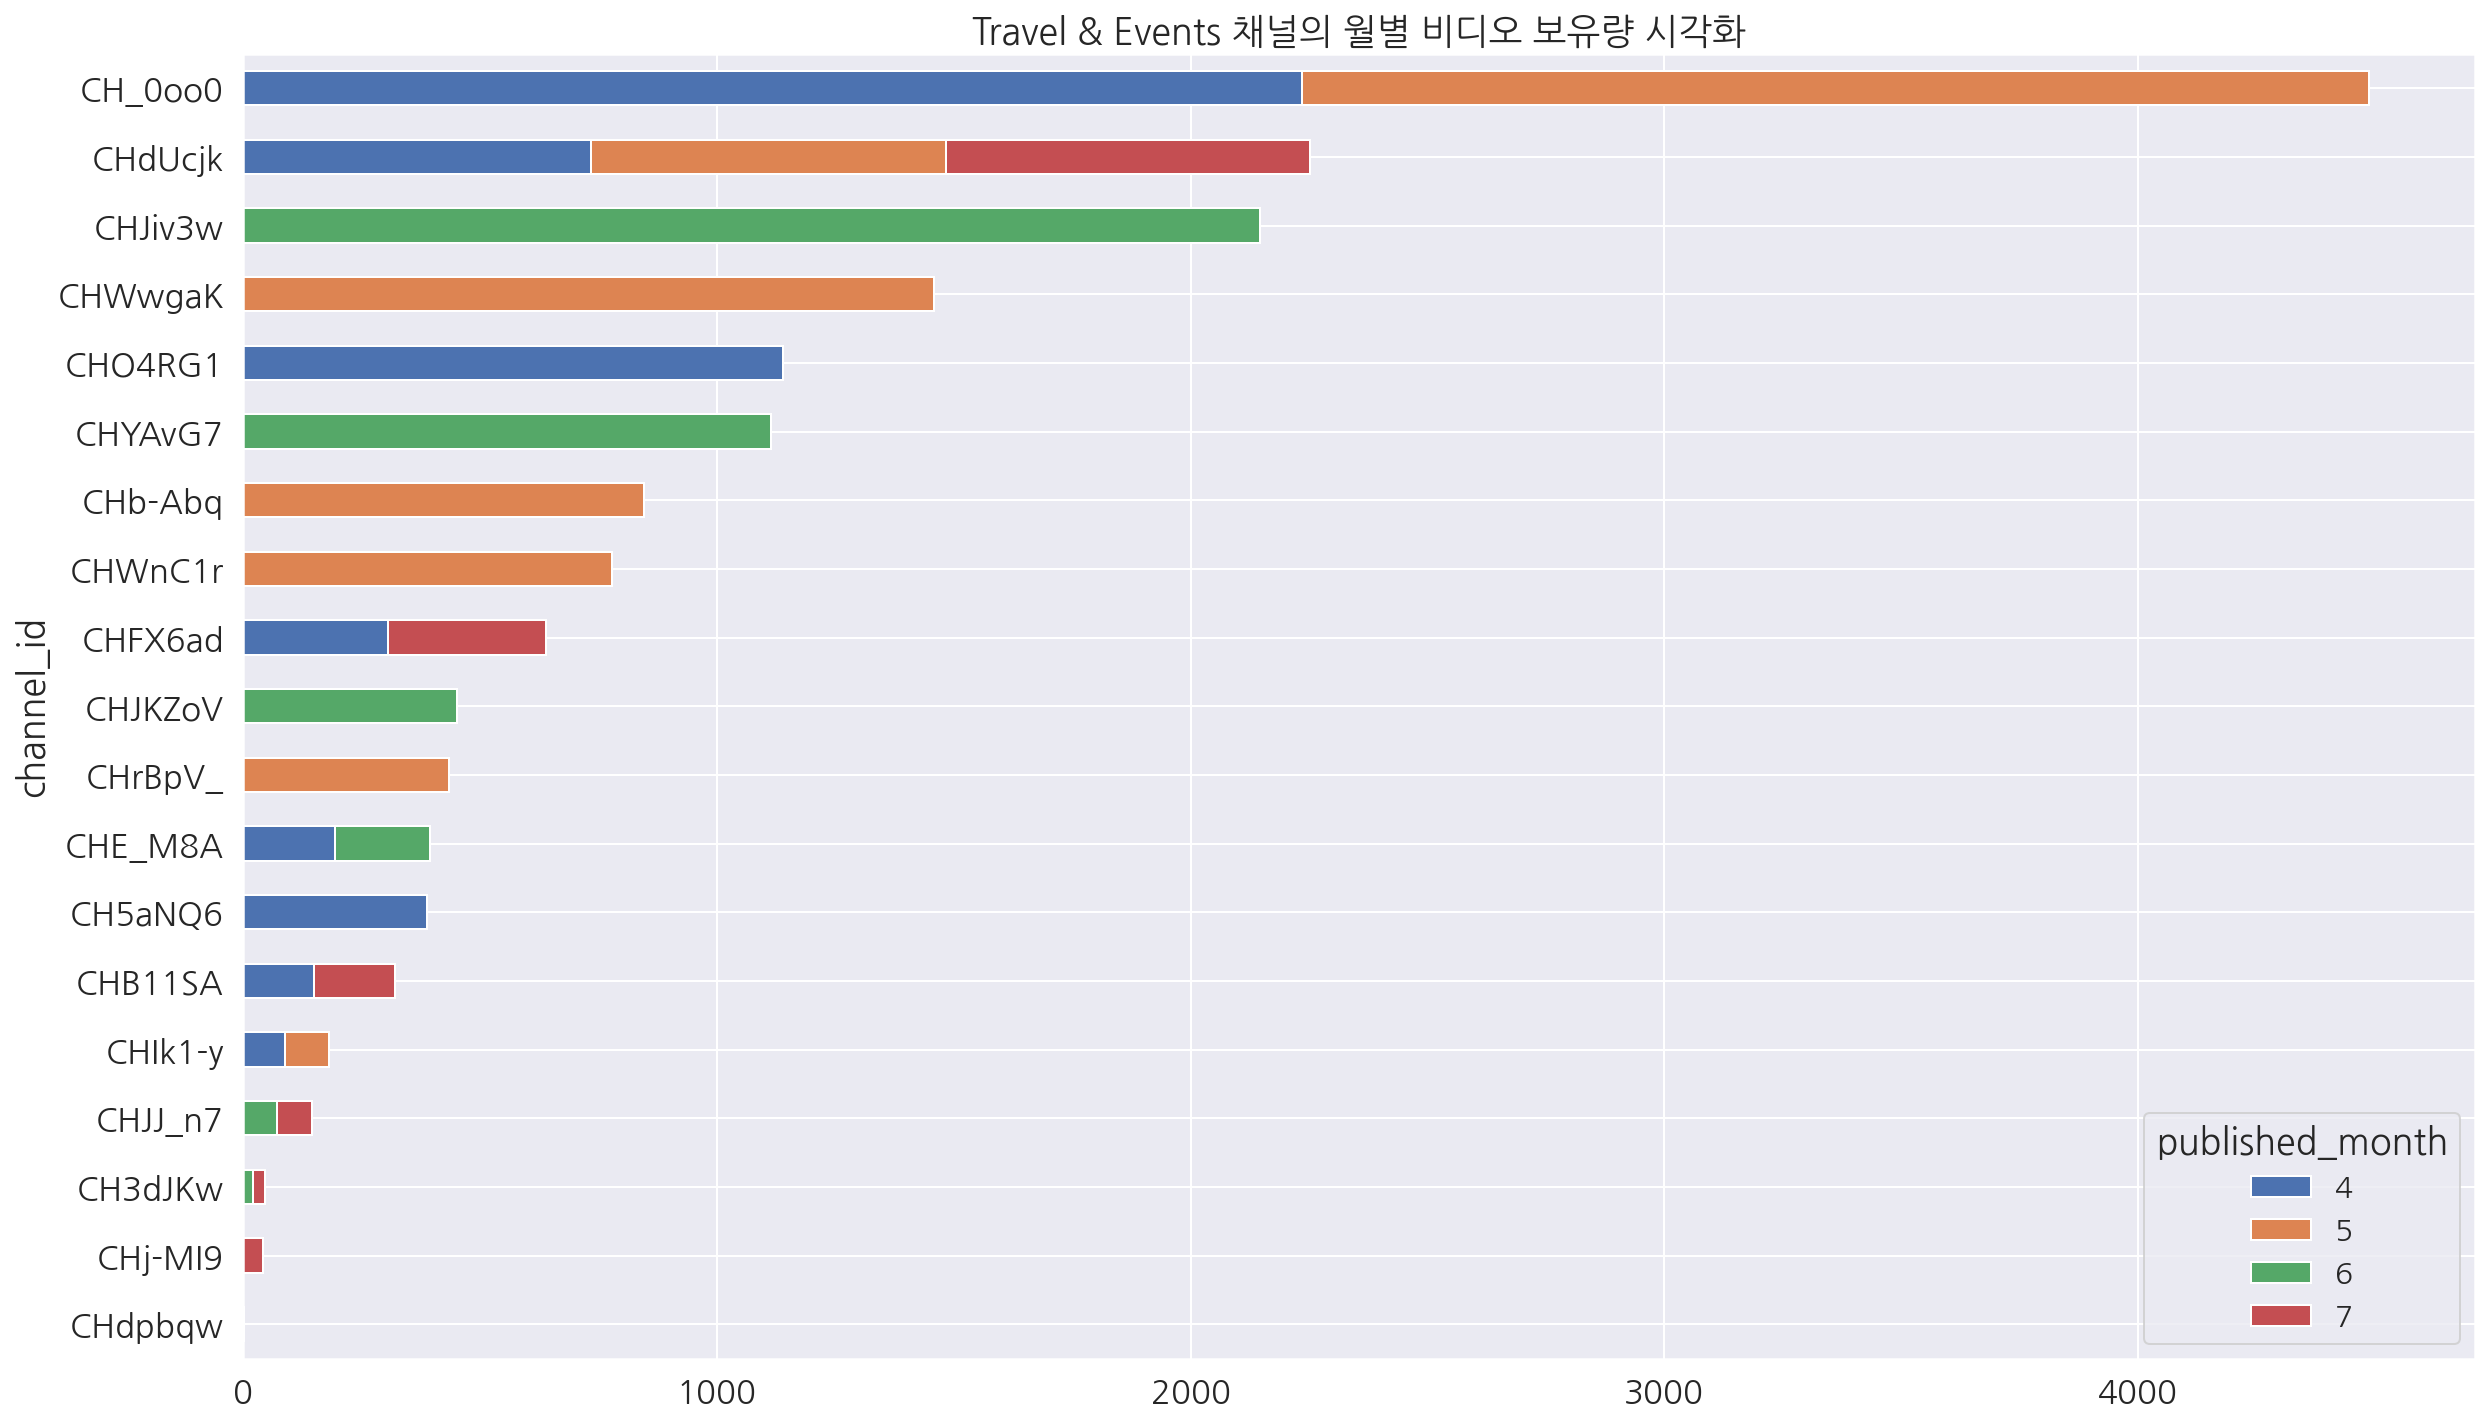

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot data in stack manner of bar type
ax = Travel_df_loc[[4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[13]} 채널의 월별 비디오 보유량 시각화", figsize =(20,12))
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

plt.show();

비디오 보유량 순으로 잘라서 보겠습니다.

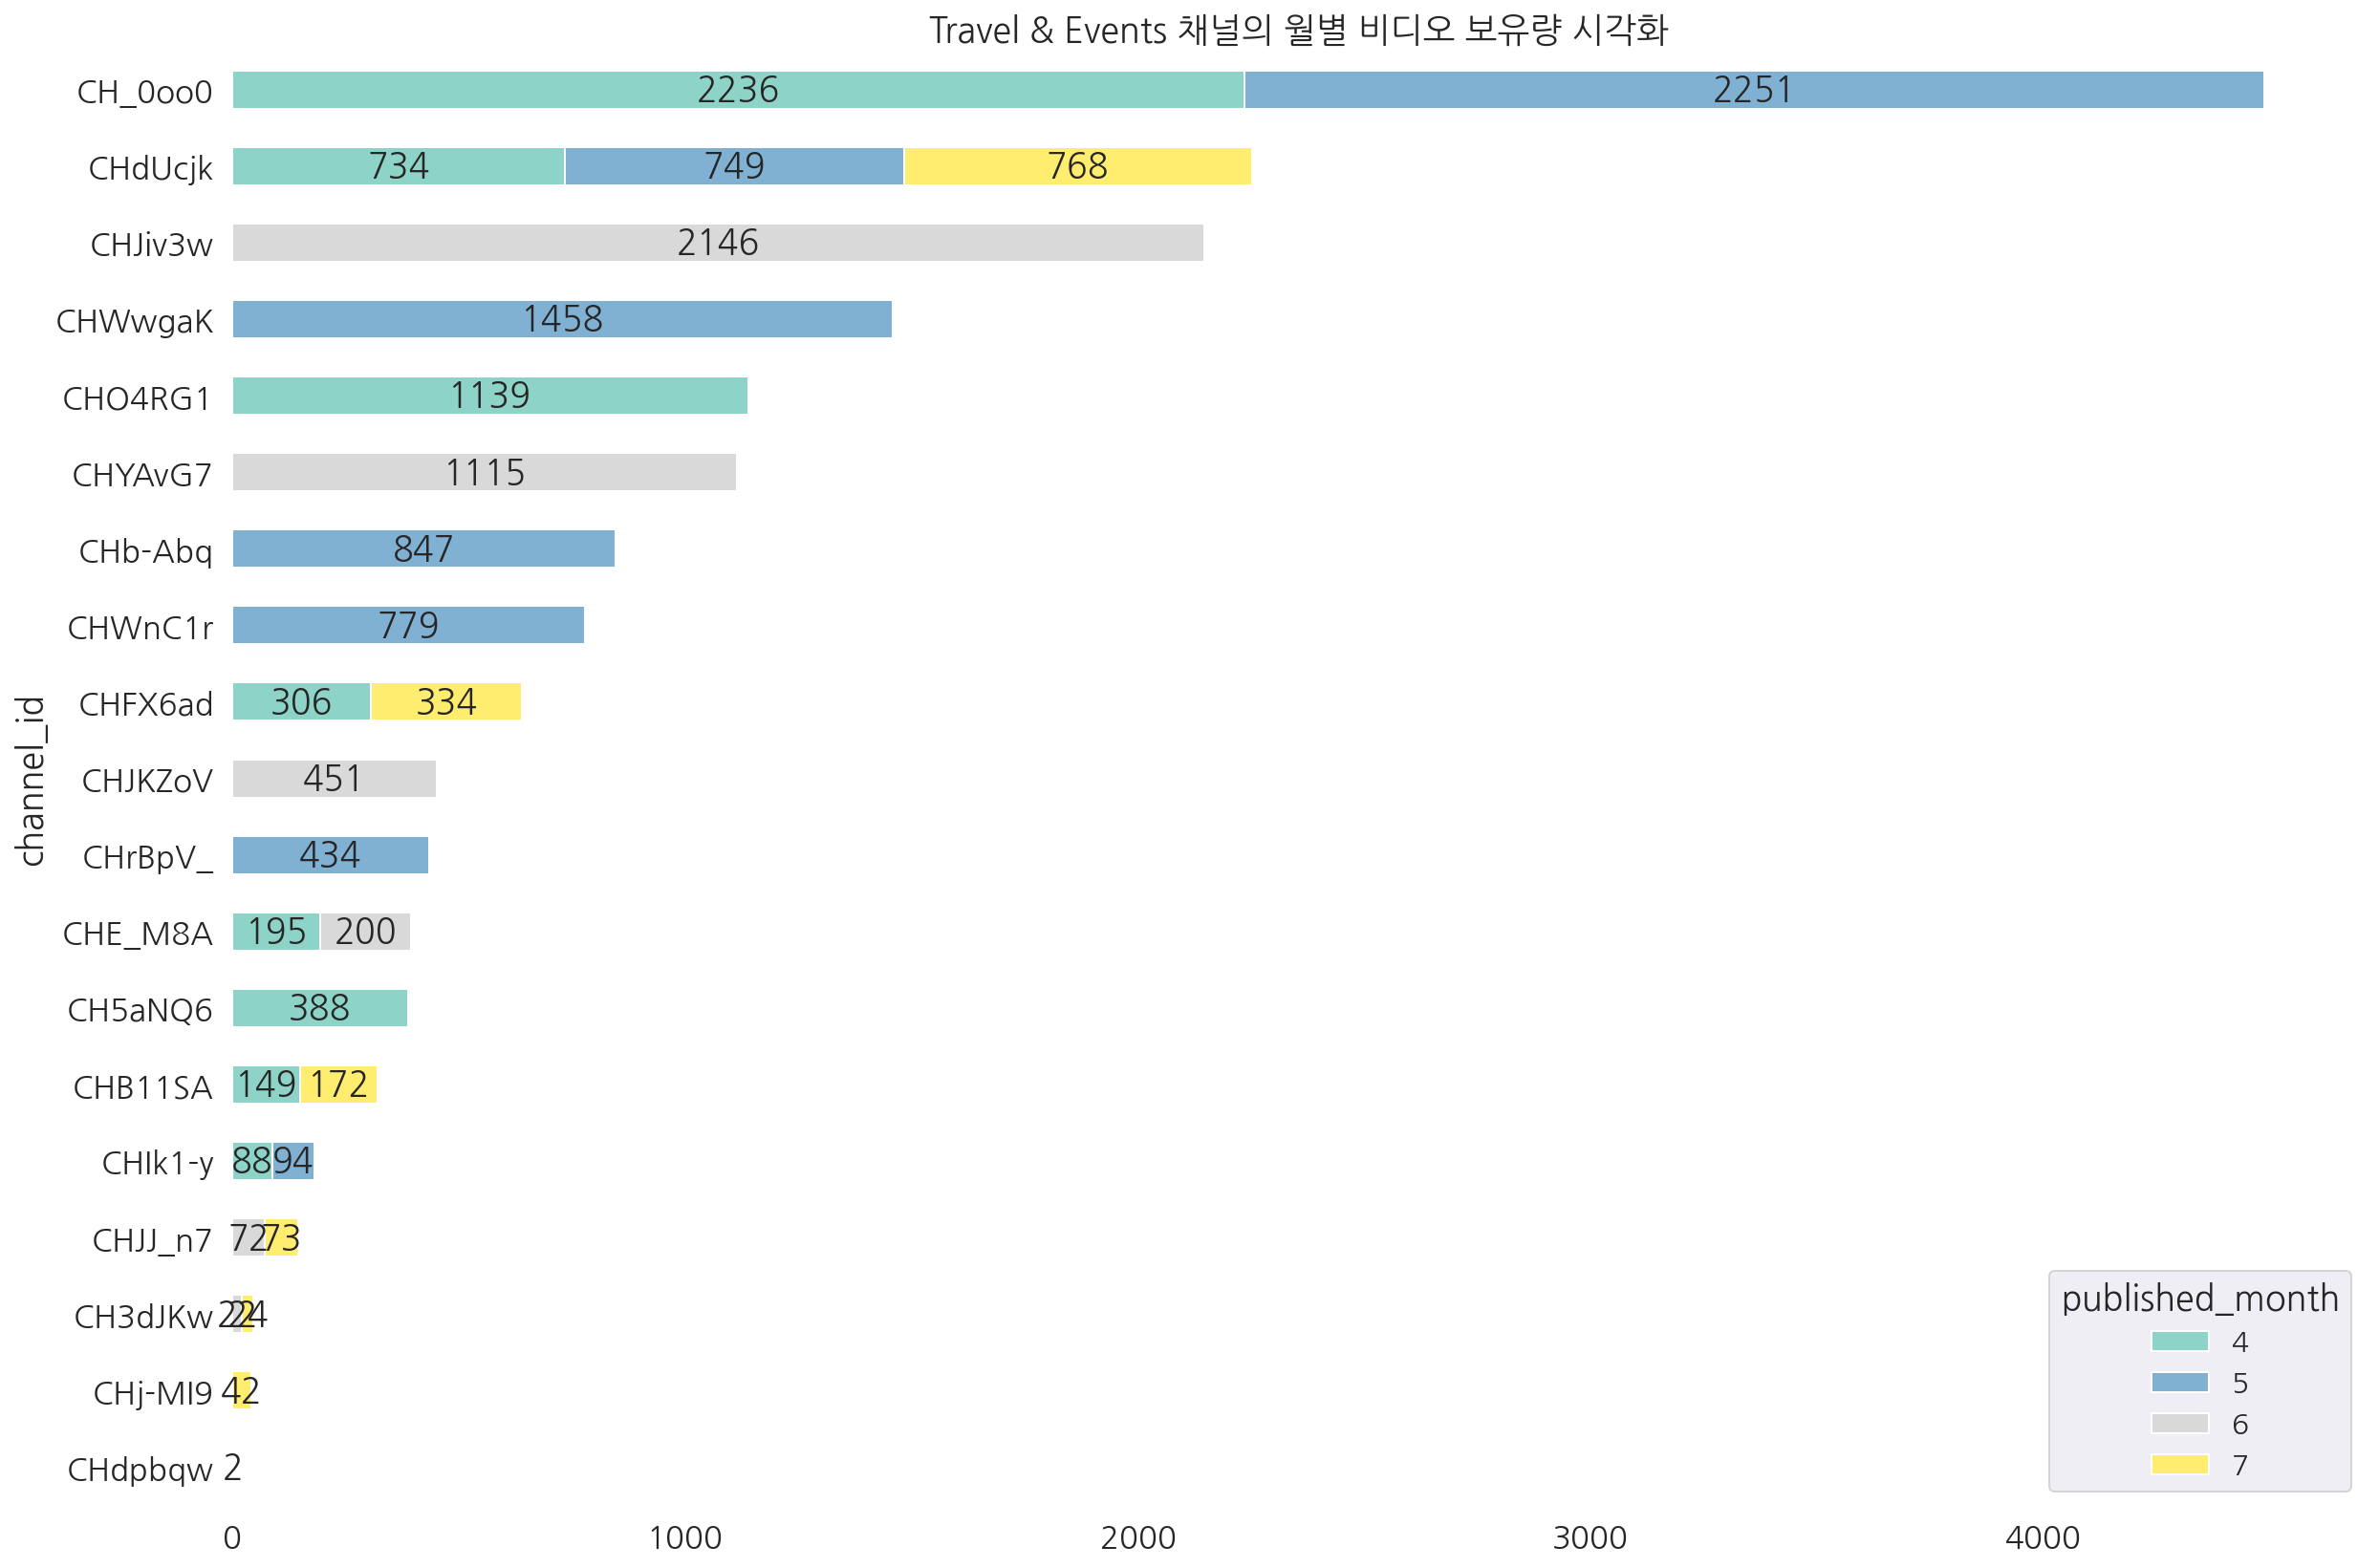

In [ ]:
# plot data in stack manner of bar type
ax = Travel_df_loc[[4,5,6,7]].plot( kind='barh', stacked=True, title=f"{category[13]} 채널의 월별 비디오 보유량 시각화", figsize =(20,14), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

### 14.Nonprofits & Activism

In [ ]:
category[14]

'Nonprofits & Activism'

In [ ]:
# Nonprofits & Activism	카테고리만 추출
Nonprofits = month_df[month_df['category_name']==category[14]]
Nonprofits_df = Nonprofits['on_channel_total_videos'].groupby([Nonprofits['channel_id'], Nonprofits['published_month']]).mean().unstack('published_month')

In [ ]:
# Nonprofits & Activism 카테고리에 속한 'channel_id'의 개수
Nonprofits['channel_id'].unique().shape

(1,)

Nonprofits & Activism 카테고리에서 채널별로 월별 비디오 보유량을 봅시다.

In [ ]:
Nonprofits_df

published_month       5
channel_id             
CHSsWdU          1759.0

In [ ]:
Nonprofits_df.shape

(1, 1)

In [ ]:
Nonprofits_df['sum'] = Nonprofits_df.T.sum()

In [ ]:
Nonprofits_df = Nonprofits_df.sort_values('sum')

In [ ]:
Nonprofits_df

published_month       5     sum
channel_id                     
CHSsWdU          1759.0  1759.0

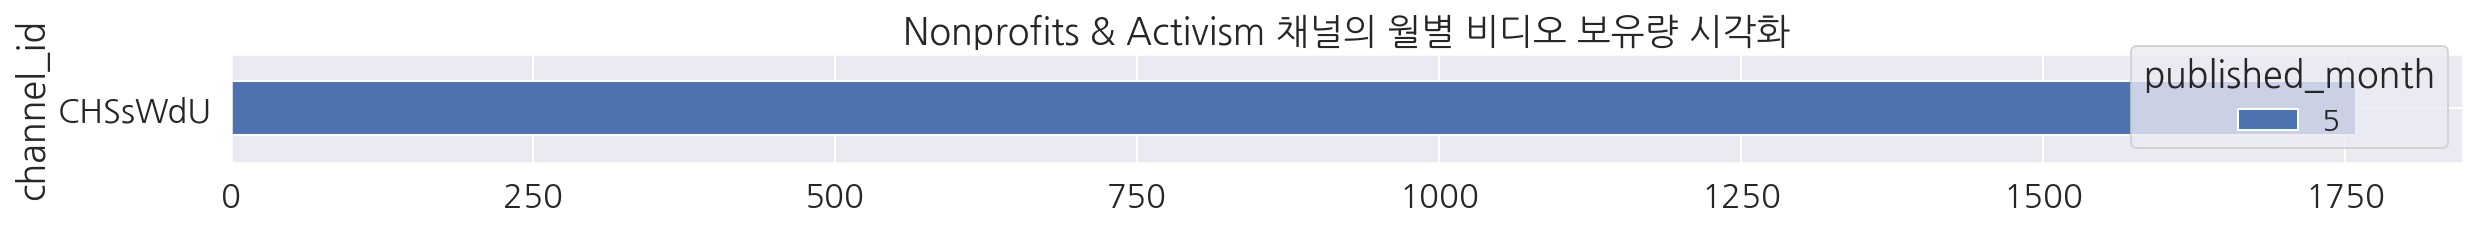

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot data in stack manner of bar type
ax = Nonprofits_df[[5]].plot( kind='barh', stacked=True, title=f"{category[14]} 채널의 월별 비디오 보유량 시각화", figsize =(20,1))
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

plt.show();

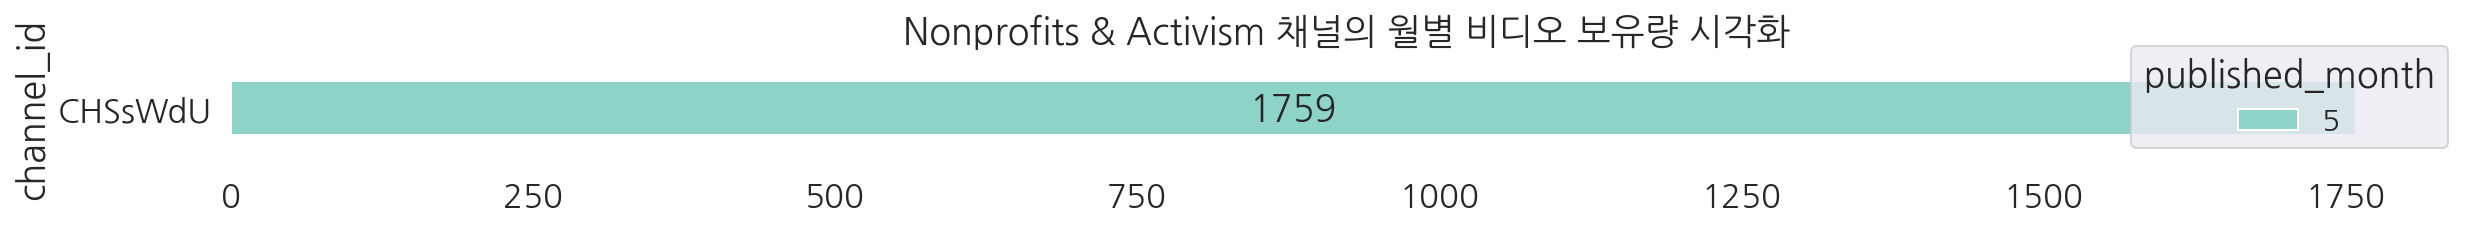

In [ ]:
# plot data in stack manner of bar type
ax = Nonprofits_df[[5]].plot( kind='barh', stacked=True, title=f"{category[14]} 채널의 월별 비디오 보유량 시각화", figsize =(20,1), colormap='Set3')
ax.legend(loc='lower right', prop={'size': 15}, title='published_month')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width == 0:
      continue
    else:
      ax.annotate("%.d"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.show();

In [ ]:
category

['Entertainment',
 'People & Blogs',
 'Music',
 'Sports',
 'Comedy',
 'News & Politics',
 'Howto & Style',
 'Gaming',
 'Film & Animation',
 'Education',
 'Pets & Animals',
 'Science & Technology',
 'Autos & Vehicles',
 'Travel & Events',
 'Nonprofits & Activism']

- 더 알아볼 문제 

1) 각 카테고리 인기비디오 선정 채널들의 월별 평균 비디오 제작량은 어떻게 될까요?

2) 전체 카테고리에서, 인기비디오 선정 채널들의 월별 평균 비디오 제작량은 어떻게 될까요?